#Compute the camera calibration matrix and distortion coefficients given a set of chessboard images.

In [1]:
import numpy as np
import cv2
import glob
import matplotlib.pyplot as plt
%matplotlib inline
import pickle

In [2]:
# Make a list of calibration images (Read in from the camera_cal directory)
images = glob.glob('camera_cal/calibration*.jpg')

#Previewed a few calibration images such as calibration3.jpg, to find the number of inside corners
nx = 9
ny = 6

# prepare object points
objp = np.zeros((ny*nx,3), np.float32)
objp[:,:2] = np.mgrid[0:nx, 0:ny].T.reshape(-1,2)

# Arrays to store object points and image points from all the calibration images.
objpoints = [] # 3d points in real world space
imgpoints = [] # 2d points in image plane.


# Step through the list and search for chessboard corners
for idx, fname in enumerate(images):
    img = cv2.imread(fname)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Find the chessboard corners
    ret, corners = cv2.findChessboardCorners(gray, (nx,ny), None)

    # If found, add object points, image points
    if ret == True:
        objpoints.append(objp)
        imgpoints.append(corners)

        # Draw and display the corners and save the images with corners
        """
        cv2.drawChessboardCorners(img, (nx,ny), corners, ret)
        write_name = 'corners_found'+str(idx)+'.jpg'
        path = './output_images/images_with_corners/'
        cv2.imwrite(path + write_name, img)
        cv2.imshow('img', img)
        cv2.waitKey(500)

cv2.destroyAllWindows()
"""

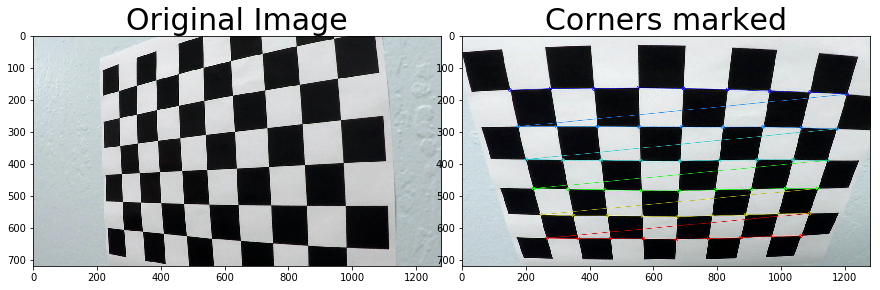

In [3]:
###Visualization of Inside corners marked on one of the Calibration images
img = cv2.imread('camera_cal/calibration4.jpg')
corners_marked_image  = cv2.imread('output_images/images_with_corners/corners_found11.jpg')
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,5))
f.subplots_adjust(hspace=0.3, wspace=0.05)
ax1.imshow(img)
ax1.set_title('Original Image', fontsize=30)
ax2.imshow(corners_marked_image)
ax2.set_title('Corners marked', fontsize=30)

#set the image size (parameter for cv2.calibrateCamera)
img_size = (img.shape[1],img.shape[2])

In [4]:
###Do camera calibration given object points and image points
ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, img_size,None,None)

In [5]:
###Save the camera calibration result
dist_pickle = {}
dist_pickle["mtx"] = mtx
dist_pickle["dist"] = dist
pickle.dump( dist_pickle, open( "camera_calibration_result.p", "wb" ) )

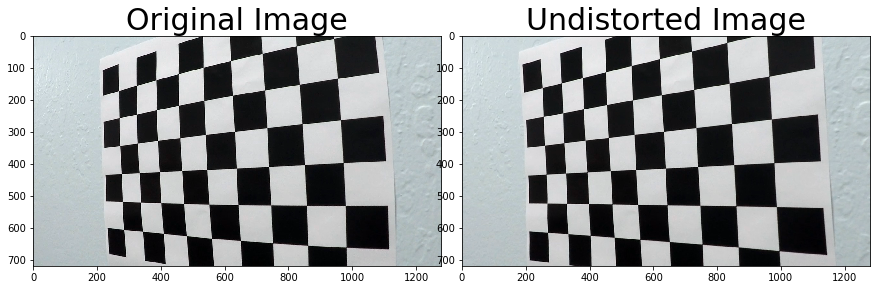

In [5]:
###Visualization of Undistortion
img = cv2.imread('camera_cal/calibration4.jpg')
corners_marked_image  = cv2.imread('output_images/images_with_corners/corners_found11.jpg')
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,5))
f.subplots_adjust(hspace=0.3, wspace=0.05)
ax1.imshow(img)
ax1.set_title('Original Image', fontsize=30)
dst = cv2.undistort(img, mtx, dist, None, mtx)
ax2.imshow(dst)
ax2.set_title('Undistorted Image', fontsize=30)

#set the image size (parameter for cv2.calibrateCamera)
img_size = (img.shape[1],img.shape[2])

#Apply a distortion correction to raw images.

In [6]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import pickle
%matplotlib inline


with open("camera_calibration_result.p", mode='rb') as f:
    camera_calib = pickle.load(f)
mtx = camera_calib["mtx"]
dist = camera_calib["dist"]

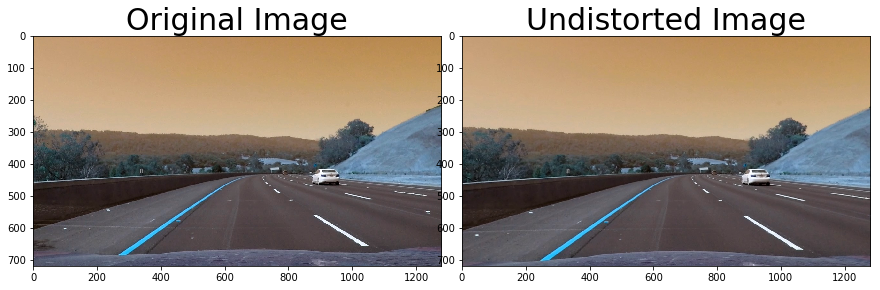

In [7]:
#Visualize raw input image and the original image

raw_image = cv2.imread("test_images/test3.jpg")
undistorted_image = cv2.undistort(raw_image, mtx, dist, None, mtx)
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,5))
f.subplots_adjust(hspace=0.3, wspace=0.05)
ax1.imshow(raw_image)
ax1.set_title('Original Image', fontsize=30)
dst = cv2.undistort(img, mtx, dist, None, mtx)
ax2.imshow(undistorted_image)
ax2.set_title('Undistorted Image', fontsize=30)

In [8]:
#Saving undistorted images

test_images = glob.glob('test_images/test*.jpg')

for idx, fname in enumerate(test_images):
    test_image = cv2.imread(fname)
    write_name = 'undistorted_image'+str(idx)+'.jpg'
    path = './output_images/undistorted_images/'
    cv2.imwrite(path + write_name,cv2.undistort(test_image, mtx, dist, None, mtx) )


In [18]:
#Saving undistorted images (Straight line images)

test_images = glob.glob('test_images/straight_lines*.jpg')

for idx, fname in enumerate(test_images):
    test_image = cv2.imread(fname)
    write_name = 'undistorted_image_straight_lines'+str(idx)+'.jpg'
    path = './output_images/undistorted_images/'
    cv2.imwrite(path + write_name,cv2.undistort(test_image, mtx, dist, None, mtx) )


In [9]:
# Parameters
imshape = raw_image.shape

height = raw_image.shape[0]
offset = 40
offset_height = height - offset
horizontal_offset = 50

blank_canvas = np.zeros((720, 1280))
colour_canvas = cv2.cvtColor(blank_canvas.astype(np.uint8), cv2.COLOR_GRAY2RGB)

#Use color transforms, gradients, etc., to create a thresholded binary image.


In [10]:
from helperfunctions import *

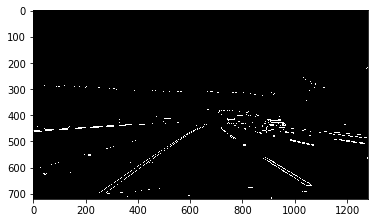

In [11]:
combined_binary = apply_thresholds(undistorted_image)
plt.imshow(combined_binary, cmap="gray")

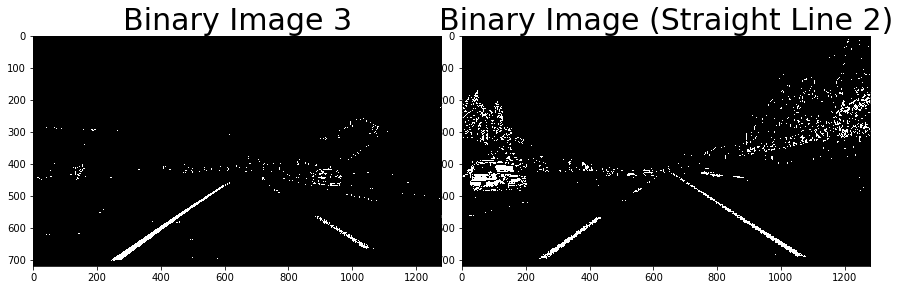

In [12]:
#Visualization of Binary Images

xgrad_thresh_temp = (50,100)
s_thresh_temp=(155,255)

combined_binary_1 = apply_threshold_rev(undistorted_image, xgrad_thresh=xgrad_thresh_temp, s_thresh=s_thresh_temp)
undistorted_image_2 = cv2.imread('output_images/undistorted_images/undistorted_image_straight_lines2.jpg')
combined_binary_2 = apply_threshold_rev(undistorted_image_2, xgrad_thresh=xgrad_thresh_temp, s_thresh=s_thresh_temp)

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,5))
f.subplots_adjust(hspace=0.3, wspace=0.05)
ax1.imshow(combined_binary_1, cmap="gray")
ax1.set_title('Binary Image 3', fontsize=30)
ax2.imshow(combined_binary_2, cmap="gray")
ax2.set_title('Binary Image (Straight Line 2)', fontsize=30)

#Apply a perspective transform to rectify binary image ("birds-eye view"). Select a Region of interest based on an approximation of a polygon to mask 

In [13]:



src = np.float32(
    [[240, 700],
     [550, 470],
     [700, 470],
     [1150, 700]])

dst = np.float32(
    [[200,720],
     [200,0],
     [1120,0],
     [1120,720]])


M = cv2.getPerspectiveTransform(src, dst)
Minv = cv2.getPerspectiveTransform(dst, src)


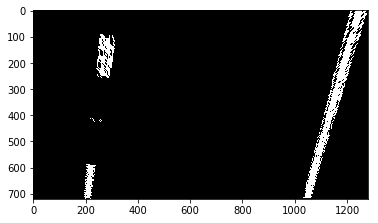

In [14]:

warped_2 = cv2.warpPerspective(combined_binary_2, M, (imshape[1], imshape[0]), flags=cv2.INTER_LINEAR)
plt.imshow(warped_2,cmap="gray" )

In [15]:
from scipy import signal

Left coeffs: [ -7.72025054e-05  -6.50670120e-02   2.90467750e+02]
righty[0]: , 711.0 , rightx[0]:  973
Right coeffs:  [  4.44338155e-06  -2.83715489e-01   1.24642420e+03]


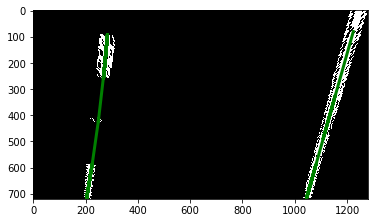

In [16]:
#  (Histogram)Detect lane pixels and fit to find the lane boundary.

leftx, lefty, rightx, righty = None, None, None, None
# Take a histogram of the bottom half of the image
leftx, lefty, rightx, righty = histogram_pixels(warped_2, horizontal_offset=horizontal_offset)

# Fit a second order polynomial to each fake lane line
left_fit, left_coeffs = fit_second_order_poly(lefty, leftx, return_coeffs=True)
print("Left coeffs:", left_coeffs)
print("righty[0]: ,", righty[0], ", rightx[0]: ", rightx[0])
right_fit, right_coeffs = fit_second_order_poly(righty, rightx, return_coeffs=True)
print("Right coeffs: ", right_coeffs)

# Plot data

plt.plot(left_fit, lefty, color='green', linewidth=3)
plt.plot(right_fit, righty, color='green', linewidth=3)
plt.imshow(warped_2, cmap="gray")

Left coeffs:  [ -7.72025054e-05  -6.50670120e-02   2.90467750e+02]
Right fit:  [  4.44338155e-06  -2.83715489e-01   1.24642420e+03]


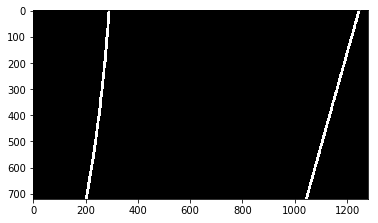

In [17]:
print("Left coeffs: ", left_coeffs)
print("Right fit: ", right_coeffs)
polyfit_left = None
polyfit_left = draw_poly(blank_canvas, lane_poly, left_coeffs, 30)
polyfit_drawn = None
polyfit_drawn = draw_poly(polyfit_left, lane_poly, right_coeffs, 30)
plt.imshow(polyfit_drawn, cmap="gray")

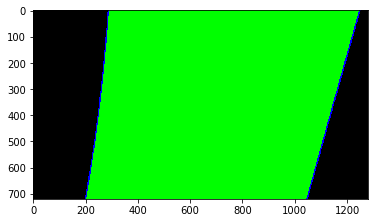

In [18]:
trace = colour_canvas
trace[polyfit_drawn > 1] = [0,0,255]
area = highlight_lane_line_area(blank_canvas, left_coeffs, right_coeffs)
trace[area == 1] = [0,255,0]
plt.imshow(trace)

#Determine the curvature of the lane and vehicle position with respect to center.

In [20]:
# Define y-value where we want radius of curvature (closest to the vehicle)

y_eval = 719 
left_curverad = np.absolute(((1 + (2 * left_coeffs[0] * y_eval + left_coeffs[1])**2) ** 1.5) \
                /(2 * left_coeffs[0]))
right_curverad = np.absolute(((1 + (2 * right_coeffs[0] * y_eval + right_coeffs[1]) ** 2) ** 1.5) \
                 /(2 * right_coeffs[0]))
print("Left lane curve radius: ", left_curverad, "pixels")
print("Right lane curve radius: ", right_curverad, "pixels")
curvature = (left_curverad + right_curverad) / 2
centre = center(719, left_coeffs, right_coeffs)
min_curvature = min(left_curverad, right_curverad)

Left lane curve radius:  6780.00756385 pixels
Right lane curve radius:  125755.012615 pixels


#Warp the detected lane boundaries back onto the original image.

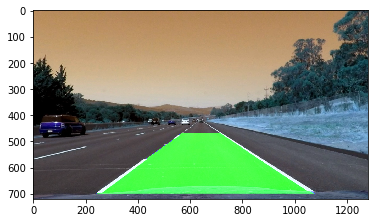

In [21]:
lane_lines = cv2.warpPerspective(trace, Minv, (imshape[1], imshape[0]), flags=cv2.INTER_LINEAR)

# Convert to colour
combined_img = cv2.add(lane_lines, undistorted_image_2)
plt.imshow(combined_img)

#Display of the lane boundaries and numerical estimation of lane curvature and vehicle position.

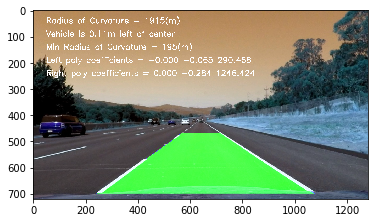

In [22]:
add_figures_to_image(combined_img, curvature=curvature, 
                     vehicle_position=centre, 
                     min_curvature=min_curvature,
                     left_coeffs=left_coeffs,
                     right_coeffs=right_coeffs)
plt.imshow(combined_img)

#streamlined pipeline for image

Left coeffs: [ -9.51216608e-05  -5.00750165e-02   2.88493314e+02]
Right coeffs:  [  1.31445013e-05  -2.92281221e-01   1.24832304e+03]
1727.07536897 m 12518.0841662 m
Left coeffs:  [ -9.51216608e-05  -5.00750165e-02   2.88493314e+02]
Right fit:  [  1.31445013e-05  -2.92281221e-01   1.24832304e+03]
polyfit shape:  (720, 1280)


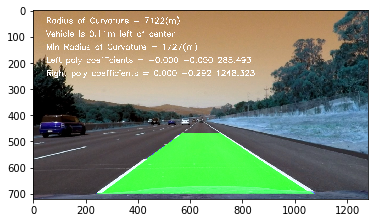

In [18]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import pickle
%matplotlib inline

from helperfunctions import *

with open("camera_calibration_result.p", mode='rb') as f:
    camera_calib = pickle.load(f)
mtx = camera_calib["mtx"]
dist = camera_calib["dist"]

prev_left_coeffs = None
prev_right_coeffs = None

def image_pipeline(file, filepath=False):
    global prev_left_coeffs
    global prev_right_coeffs
    
    plt.clf()
    
    if filepath == True:
        # Read in image
        raw = cv2.imread(file)
    else:
        raw = file

    # Parameters
    imshape = raw.shape
    
    src = np.float32(
    [[240, 700],
     [550, 470],
     [700, 470],
     [1150, 700]])

    dst = np.float32(
    [[200,720],
     [200,0],
     [1120,0],
     [1120,720]])


    M = cv2.getPerspectiveTransform(src, dst)
    Minv = cv2.getPerspectiveTransform(dst, src)

    height = raw.shape[0]
    offset = 50
    offset_height = height - offset

    blank_canvas = np.zeros((720, 1280))
    colour_canvas = cv2.cvtColor(blank_canvas.astype(np.uint8), cv2.COLOR_GRAY2RGB)

    # Apply distortion correction to raw image
    image = cv2.undistort(raw, mtx, dist, None, mtx)

    found_fit = False
    curvature_checked = False
    
    xgrad_thresh_temp = (40,100)
    s_thresh_temp=(150,255)
    
    while found_fit == False:
        combined_binary = apply_threshold_rev(image, xgrad_thresh=xgrad_thresh_temp, s_thresh=s_thresh_temp)
        
        # Warp onto birds-eye-view
        warped = cv2.warpPerspective(combined_binary, M, (imshape[1], imshape[0]), flags=cv2.INTER_LINEAR)
        #plt.imshow(warped, cmap="gray")
        # Histogram and get pixels in window

        leftx, lefty, rightx, righty = histogram_pixels(warped, horizontal_offset=40)

        if len(leftx) > 1 and len(rightx) > 1:
            found_fit = True
        xgrad_thresh_temp = (xgrad_thresh_temp[0] - 2, xgrad_thresh_temp[1] + 2)
        s_thresh_temp = (s_thresh_temp[0] - 2, s_thresh_temp[1] + 2)

    left_fit, left_coeffs = fit_second_order_poly(lefty, leftx, return_coeffs=True)
    print("Left coeffs:", left_coeffs)
    right_fit, right_coeffs = fit_second_order_poly(righty, rightx, return_coeffs=True)
    print("Right coeffs: ", right_coeffs)

    # Plot image
    
    """
    plt.plot(left_fit, lefty, color='green', linewidth=3)
    plt.plot(right_fit, righty, color='green', linewidth=3)
    plt.imshow(warped, cmap="gray")
    """

    # Determine curvature of the lane
    
    """
    y_eval = 719 # measure the radius of curvature closest to your vehicle, 
   
    left_curverad = np.absolute(((1 + (2 * left_coeffs[0] * y_eval + left_coeffs[1])**2) ** 1.5) \
                    /(2 * left_coeffs[0]))
    right_curverad = np.absolute(((1 + (2 * right_coeffs[0] * y_eval + right_coeffs[1]) ** 2) ** 1.5) \
                     /(2 * right_coeffs[0]))
    print("Left lane curve radius: ", left_curverad)
    print("Right lane curve radius: ", right_curverad)
    curvature = (left_curverad + right_curverad) / 2
    min_curverad = min(left_curverad, right_curverad)
    
    """
    
    #Revised to address low Curvature
    ym_per_pix = 30/720 # meters per pixel in y dimension
    xm_per_pix = 3.7/700 # meters per pixel in x dimension
    
     # Fit new polynomials to x,y in world space
    left_fit_cr = np.polyfit(lefty*ym_per_pix, leftx*xm_per_pix, 2)
    right_fit_cr = np.polyfit(righty*ym_per_pix, rightx*xm_per_pix, 2)
    
    y_eval = np.max(lefty)/2
    
    # Calculate the new radii of curvature
    left_curverad = ((1 + (2*left_fit_cr[0]*y_eval*ym_per_pix + left_fit_cr[1])**2)**1.5) / np.absolute(2*left_fit_cr[0])
    right_curverad = ((1 + (2*right_fit_cr[0]*y_eval*ym_per_pix + right_fit_cr[1])**2)**1.5) / np.absolute(2*right_fit_cr[0])
    # Now our radius of curvature is in meters
    print(left_curverad, 'm', right_curverad, 'm')
    curvature = (left_curverad + right_curverad) / 2
    min_curverad = min(left_curverad, right_curverad)


    if not plausible_curvature(left_curverad, right_curverad) or \
        not plausible_continuation_of_traces(left_coeffs, right_coeffs, prev_left_coeffs, prev_right_coeffs):
            if prev_left_coeffs is not None and prev_right_coeffs is not None:
                left_coeffs = prev_left_coeffs
                right_coeffs = prev_right_coeffs

    prev_left_coeffs = left_coeffs
    prev_right_coeffs = right_coeffs
    
    # center
    centre = center(719, left_coeffs, right_coeffs)
        
    ## 7. Warp the detected lane boundaries back onto the original image.

    print("Left coeffs: ", left_coeffs)
    print("Right fit: ", right_coeffs)
    polyfit_left = draw_poly(blank_canvas, lane_poly, left_coeffs, 30)
    polyfit_drawn = draw_poly(polyfit_left, lane_poly, right_coeffs, 30)
    
    # Convert to colour and highlight lane line area
    trace = colour_canvas
    trace[polyfit_drawn > 1] = [0,0,255]
    print("polyfit shape: ", polyfit_drawn.shape)
    area = highlight_lane_line_area(blank_canvas, left_coeffs, right_coeffs)
    trace[area == 1] = [0,255,0]

    lane_lines = cv2.warpPerspective(trace, Minv, (imshape[1], imshape[0]), flags=cv2.INTER_LINEAR)
 
    combined_img = cv2.add(lane_lines, image)
    add_figures_to_image(combined_img, curvature=curvature, 
                         vehicle_position=centre, 
                         min_curvature=min_curverad,
                         left_coeffs=left_coeffs,
                         right_coeffs=right_coeffs)
    plt.imshow(combined_img)
    return combined_img

combined_img = image_pipeline("test_images/straight_lines2.jpg", filepath=True)

In [20]:
# Import everything needed to edit/save/watch video clips
from moviepy.editor import VideoFileClip
from IPython.display import HTML

Left coeffs: [ -1.48182236e-04   6.46091518e-02   2.99678343e+02]
Right coeffs:  [ -1.65620172e-04   6.44029515e-03   1.21322514e+03]
1108.32243928 m 991.890211692 m
Left coeffs:  [ -1.48182236e-04   6.46091518e-02   2.99678343e+02]
Right fit:  [ -1.65620172e-04   6.44029515e-03   1.21322514e+03]
polyfit shape:  (720, 1280)
[MoviePy] >>>> Building video project_video_revised.mp4
[MoviePy] Writing video project_video_revised.mp4


  0%|          | 1/1261 [00:00<09:12,  2.28it/s]

Left coeffs: [ -1.48182236e-04   6.46091518e-02   2.99678343e+02]
Right coeffs:  [ -1.65620172e-04   6.44029515e-03   1.21322514e+03]
1108.32243928 m 991.890211692 m
Left coeffs:  [ -1.48182236e-04   6.46091518e-02   2.99678343e+02]
Right fit:  [ -1.65620172e-04   6.44029515e-03   1.21322514e+03]
polyfit shape:  (720, 1280)


  0%|          | 2/1261 [00:00<09:10,  2.29it/s]

Left coeffs: [ -1.72015587e-04   8.56071383e-02   2.96506239e+02]
Right coeffs:  [ -4.72702638e-05  -7.54067193e-02   1.21862892e+03]
954.753435182 m 3475.21161518 m
Left coeffs:  [ -1.72015587e-04   8.56071383e-02   2.96506239e+02]
Right fit:  [ -4.72702638e-05  -7.54067193e-02   1.21862892e+03]
polyfit shape:  (720, 1280)


  0%|          | 3/1261 [00:01<09:25,  2.22it/s]

Left coeffs: [ -2.12313204e-04   1.16053783e-01   2.93010898e+02]
Right coeffs:  [ -4.39404773e-05  -7.37249598e-02   1.21408725e+03]
773.536615798 m 3738.4823827 m
Left coeffs:  [ -2.12313204e-04   1.16053783e-01   2.93010898e+02]
Right fit:  [ -4.39404773e-05  -7.37249598e-02   1.21408725e+03]
polyfit shape:  (720, 1280)


  0%|          | 4/1261 [00:01<09:43,  2.15it/s]

Left coeffs: [ -2.18711125e-04   1.26457171e-01   2.91391328e+02]
Right coeffs:  [  3.75230510e-05  -1.43394507e-01   1.22244758e+03]
750.9013853 m 4378.12095073 m
Left coeffs:  [ -2.18711125e-04   1.26457171e-01   2.91391328e+02]
Right fit:  [  3.75230510e-05  -1.43394507e-01   1.22244758e+03]
polyfit shape:  (720, 1280)


  0%|          | 5/1261 [00:02<09:33,  2.19it/s]

Left coeffs: [ -2.23389895e-04   1.35836171e-01   2.88728168e+02]
Right coeffs:  [ -7.01313468e-06  -1.08912690e-01   1.21675247e+03]
735.168264443 m 23424.3624606 m
Left coeffs:  [ -2.23389895e-04   1.35836171e-01   2.88728168e+02]
Right fit:  [ -7.01313468e-06  -1.08912690e-01   1.21675247e+03]
polyfit shape:  (720, 1280)


  0%|          | 6/1261 [00:02<09:18,  2.25it/s]

Left coeffs: [ -2.03688700e-04   1.23972504e-01   2.90416012e+02]
Right coeffs:  [  7.76326021e-05  -1.92552642e-01   1.23288598e+03]
806.273151862 m 2116.38983713 m
Left coeffs:  [ -2.03688700e-04   1.23972504e-01   2.90416012e+02]
Right fit:  [  7.76326021e-05  -1.92552642e-01   1.23288598e+03]
polyfit shape:  (720, 1280)


  1%|          | 7/1261 [00:03<09:10,  2.28it/s]

Left coeffs: [ -1.88978405e-04   1.20022472e-01   2.87964883e+02]
Right coeffs:  [  2.05852915e-05  -1.48856367e-01   1.22946100e+03]
869.028922827 m 7981.32957174 m
Left coeffs:  [ -1.88978405e-04   1.20022472e-01   2.87964883e+02]
Right fit:  [  2.05852915e-05  -1.48856367e-01   1.22946100e+03]
polyfit shape:  (720, 1280)


  1%|          | 8/1261 [00:03<09:02,  2.31it/s]

Left coeffs: [ -1.90109220e-04   1.26420369e-01   2.86575385e+02]
Right coeffs:  [  7.66795526e-04  -6.47526647e-01   1.30830971e+03]
863.856811762 m 214.220623584 m
Left coeffs:  [ -1.88978405e-04   1.20022472e-01   2.87964883e+02]
Right fit:  [  2.05852915e-05  -1.48856367e-01   1.22946100e+03]
polyfit shape:  (720, 1280)


  1%|          | 9/1261 [00:03<08:56,  2.33it/s]

Left coeffs: [ -1.68482535e-04   1.10072883e-01   2.86673461e+02]
Right coeffs:  [ -2.52444270e-04   7.28413293e-02   1.18608091e+03]
974.743243208 m 650.731904383 m
Left coeffs:  [ -1.68482535e-04   1.10072883e-01   2.86673461e+02]
Right fit:  [ -2.52444270e-04   7.28413293e-02   1.18608091e+03]
polyfit shape:  (720, 1280)


  1%|          | 10/1261 [00:04<08:49,  2.36it/s]

Left coeffs: [ -1.69816808e-04   1.15286409e-01   2.82795229e+02]
Right coeffs:  [ -1.11987242e-04  -8.58876628e-03   1.19667082e+03]
967.082726551 m 1466.75748682 m
Left coeffs:  [ -1.69816808e-04   1.15286409e-01   2.82795229e+02]
Right fit:  [ -1.11987242e-04  -8.58876628e-03   1.19667082e+03]
polyfit shape:  (720, 1280)


  1%|          | 11/1261 [00:04<08:53,  2.34it/s]

Left coeffs: [ -1.89612528e-04   1.37922749e-01   2.76420338e+02]
Right coeffs:  [ -3.95057936e-04   2.34867560e-01   1.14276095e+03]
866.117544052 m 415.727162898 m
Left coeffs:  [ -1.69816808e-04   1.15286409e-01   2.82795229e+02]
Right fit:  [ -1.11987242e-04  -8.58876628e-03   1.19667082e+03]
polyfit shape:  (720, 1280)


  1%|          | 12/1261 [00:05<08:48,  2.36it/s]

Left coeffs: [ -1.80727041e-04   1.41280968e-01   2.66884122e+02]
Right coeffs:  [ -2.63818094e-04   1.16110868e-01   1.17737391e+03]
908.703268244 m 622.580620512 m
Left coeffs:  [ -1.80727041e-04   1.41280968e-01   2.66884122e+02]
Right fit:  [ -2.63818094e-04   1.16110868e-01   1.17737391e+03]
polyfit shape:  (720, 1280)


  1%|          | 13/1261 [00:05<08:46,  2.37it/s]

Left coeffs: [ -1.83834458e-04   1.46359253e-01   2.65129524e+02]
Right coeffs:  [ -2.54443966e-04   1.32104727e-01   1.16487321e+03]
893.344621398 m 645.474036722 m
Left coeffs:  [ -1.83834458e-04   1.46359253e-01   2.65129524e+02]
Right fit:  [ -2.54443966e-04   1.32104727e-01   1.16487321e+03]
polyfit shape:  (720, 1280)


  1%|          | 14/1261 [00:06<08:52,  2.34it/s]

Left coeffs: [ -2.02557993e-04   1.71159543e-01   2.58473015e+02]
Right coeffs:  [ -8.88625235e-05   3.94715726e-03   1.18293812e+03]
810.776738545 m 1848.25915048 m
Left coeffs:  [ -2.02557993e-04   1.71159543e-01   2.58473015e+02]
Right fit:  [ -8.88625235e-05   3.94715726e-03   1.18293812e+03]
polyfit shape:  (720, 1280)


  1%|          | 15/1261 [00:06<08:50,  2.35it/s]

Left coeffs: [ -2.09616132e-04   1.72928629e-01   2.60624336e+02]
Right coeffs:  [  2.33199872e-05  -6.64134314e-02   1.17868649e+03]
783.473494366 m 7042.7353222 m
Left coeffs:  [ -2.09616132e-04   1.72928629e-01   2.60624336e+02]
Right fit:  [  2.33199872e-05  -6.64134314e-02   1.17868649e+03]
polyfit shape:  (720, 1280)


  1%|▏         | 16/1261 [00:07<09:15,  2.24it/s]

Left coeffs: [ -2.10444636e-04   1.72572123e-01   2.61060911e+02]
Right coeffs:  [  1.41071069e-04  -1.67081783e-01   1.18533211e+03]
780.388240448 m 1164.2629135 m
Left coeffs:  [ -2.10444636e-04   1.72572123e-01   2.61060911e+02]
Right fit:  [  1.41071069e-04  -1.67081783e-01   1.18533211e+03]
polyfit shape:  (720, 1280)


  1%|▏         | 17/1261 [00:07<09:01,  2.30it/s]

Left coeffs: [ -1.87241688e-04   1.55974308e-01   2.62409701e+02]
Right coeffs:  [  6.80850797e-05  -1.21045849e-01   1.17972458e+03]
877.093853617 m 2412.38361908 m
Left coeffs:  [ -1.87241688e-04   1.55974308e-01   2.62409701e+02]
Right fit:  [  6.80850797e-05  -1.21045849e-01   1.17972458e+03]
polyfit shape:  (720, 1280)


  1%|▏         | 18/1261 [00:07<08:52,  2.34it/s]

Left coeffs: [ -1.72263283e-04   1.46063926e-01   2.62267837e+02]
Right coeffs:  [  1.54136146e-04  -2.02368034e-01   1.19223055e+03]
953.358598649 m 1065.68091854 m
Left coeffs:  [ -1.72263283e-04   1.46063926e-01   2.62267837e+02]
Right fit:  [  1.54136146e-04  -2.02368034e-01   1.19223055e+03]
polyfit shape:  (720, 1280)


  2%|▏         | 19/1261 [00:08<08:44,  2.37it/s]

Left coeffs: [ -1.41082052e-04   1.23666514e-01   2.61716056e+02]
Right coeffs:  [  8.85000687e-05  -1.60583974e-01   1.19401275e+03]
1164.0650505 m 1856.08885939 m
Left coeffs:  [ -1.41082052e-04   1.23666514e-01   2.61716056e+02]
Right fit:  [  8.85000687e-05  -1.60583974e-01   1.19401275e+03]
polyfit shape:  (720, 1280)


  2%|▏         | 20/1261 [00:08<08:39,  2.39it/s]

Left coeffs: [ -1.38890024e-04   1.27856980e-01   2.56648403e+02]
Right coeffs:  [  8.31223388e-05  -1.73246013e-01   1.20458505e+03]
1182.44536312 m 1976.33823046 m
Left coeffs:  [ -1.38890024e-04   1.27856980e-01   2.56648403e+02]
Right fit:  [  8.31223388e-05  -1.73246013e-01   1.20458505e+03]
polyfit shape:  (720, 1280)


  2%|▏         | 21/1261 [00:09<08:34,  2.41it/s]

Left coeffs: [ -1.00369561e-04   9.96341692e-02   2.56808900e+02]
Right coeffs:  [  5.02952711e-04  -5.08363562e-01   1.27800283e+03]
1636.25023025 m 326.694921366 m
Left coeffs:  [ -1.38890024e-04   1.27856980e-01   2.56648403e+02]
Right fit:  [  8.31223388e-05  -1.73246013e-01   1.20458505e+03]
polyfit shape:  (720, 1280)


  2%|▏         | 22/1261 [00:09<08:35,  2.40it/s]

Left coeffs: [ -7.24731619e-05   7.92896649e-02   2.55171299e+02]
Right coeffs:  [ -4.64125192e-05  -1.00520153e-01   1.21059985e+03]
2266.07548696 m 3539.94571756 m
Left coeffs:  [ -7.24731619e-05   7.92896649e-02   2.55171299e+02]
Right fit:  [ -4.64125192e-05  -1.00520153e-01   1.21059985e+03]
polyfit shape:  (720, 1280)


  2%|▏         | 23/1261 [00:09<08:37,  2.39it/s]

Left coeffs: [ -6.46283838e-05   7.40589617e-02   2.51708337e+02]
Right coeffs:  [ -2.50931071e-05  -1.25377345e-01   1.22187045e+03]
2541.13958859 m 6547.94459142 m
Left coeffs:  [ -6.46283838e-05   7.40589617e-02   2.51708337e+02]
Right fit:  [ -2.50931071e-05  -1.25377345e-01   1.22187045e+03]
polyfit shape:  (720, 1280)


  2%|▏         | 24/1261 [00:10<08:39,  2.38it/s]

Left coeffs: [ -5.80258990e-05   5.52047921e-02   2.59767564e+02]
Right coeffs:  [ -1.40564025e-04  -2.68103762e-02   1.19950448e+03]
2830.24391557 m 1168.80229892 m
Left coeffs:  [ -5.80258990e-05   5.52047921e-02   2.59767564e+02]
Right fit:  [ -1.40564025e-04  -2.68103762e-02   1.19950448e+03]
polyfit shape:  (720, 1280)


  2%|▏         | 25/1261 [00:10<08:37,  2.39it/s]

Left coeffs: [ -7.80154829e-05   6.43820221e-02   2.59544472e+02]
Right coeffs:  [ -7.25876484e-05  -7.45353706e-02   1.20618573e+03]
2105.05649595 m 2263.33816625 m
Left coeffs:  [ -7.80154829e-05   6.43820221e-02   2.59544472e+02]
Right fit:  [ -7.25876484e-05  -7.45353706e-02   1.20618573e+03]
polyfit shape:  (720, 1280)


  2%|▏         | 26/1261 [00:11<08:36,  2.39it/s]

Left coeffs: [ -7.92625871e-05   6.28323791e-02   2.57516675e+02]
Right coeffs:  [ -8.08650556e-05  -8.74747108e-02   1.22105396e+03]
2071.93416309 m 2031.91344157 m
Left coeffs:  [ -7.92625871e-05   6.28323791e-02   2.57516675e+02]
Right fit:  [ -8.08650556e-05  -8.74747108e-02   1.22105396e+03]
polyfit shape:  (720, 1280)


  2%|▏         | 27/1261 [00:11<08:36,  2.39it/s]

Left coeffs: [ -7.92163289e-05   6.06630517e-02   2.58566554e+02]
Right coeffs:  [ -1.09140381e-04  -2.40821951e-02   1.19674567e+03]
2073.14304284 m 1505.11131443 m
Left coeffs:  [ -7.92163289e-05   6.06630517e-02   2.58566554e+02]
Right fit:  [ -1.09140381e-04  -2.40821951e-02   1.19674567e+03]
polyfit shape:  (720, 1280)


  2%|▏         | 28/1261 [00:11<08:35,  2.39it/s]

Left coeffs: [ -8.54739049e-05   5.94301488e-02   2.56045171e+02]
Right coeffs:  [ -8.53381128e-05  -5.67617287e-02   1.21210338e+03]
1921.36703215 m 1925.072343 m
Left coeffs:  [ -8.54739049e-05   5.94301488e-02   2.56045171e+02]
Right fit:  [ -8.53381128e-05  -5.67617287e-02   1.21210338e+03]
polyfit shape:  (720, 1280)


  2%|▏         | 29/1261 [00:12<08:36,  2.39it/s]

Left coeffs: [ -1.18385884e-04   8.15053013e-02   2.55535559e+02]
Right coeffs:  [ -9.60921686e-05  -4.37604248e-02   1.20564858e+03]
1387.21588319 m 1709.5796455 m
Left coeffs:  [ -1.18385884e-04   8.15053013e-02   2.55535559e+02]
Right fit:  [ -9.60921686e-05  -4.37604248e-02   1.20564858e+03]
polyfit shape:  (720, 1280)


  2%|▏         | 30/1261 [00:12<08:36,  2.38it/s]

Left coeffs: [ -1.29205154e-04   8.15315755e-02   2.61226725e+02]
Right coeffs:  [ -4.51600360e-05  -8.11047408e-02   1.20493228e+03]
1271.05795642 m 3637.68234235 m
Left coeffs:  [ -1.29205154e-04   8.15315755e-02   2.61226725e+02]
Right fit:  [ -4.51600360e-05  -8.11047408e-02   1.20493228e+03]
polyfit shape:  (720, 1280)


  2%|▏         | 31/1261 [00:13<08:35,  2.39it/s]

Left coeffs: [ -1.46375132e-04   9.03963249e-02   2.63915497e+02]
Right coeffs:  [ -2.63956562e-05  -8.80738139e-02   1.20031785e+03]
1121.96380665 m 6223.45430468 m
Left coeffs:  [ -1.46375132e-04   9.03963249e-02   2.63915497e+02]
Right fit:  [ -2.63956562e-05  -8.80738139e-02   1.20031785e+03]
polyfit shape:  (720, 1280)


  3%|▎         | 32/1261 [00:13<08:32,  2.40it/s]

Left coeffs: [ -1.62430569e-04   9.36043277e-02   2.70268650e+02]
Right coeffs:  [ -2.63439751e-05  -8.46592448e-02   1.19412946e+03]
1011.07112046 m 6235.55392292 m
Left coeffs:  [ -1.62430569e-04   9.36043277e-02   2.70268650e+02]
Right fit:  [ -2.63439751e-05  -8.46592448e-02   1.19412946e+03]
polyfit shape:  (720, 1280)


  3%|▎         | 33/1261 [00:14<08:53,  2.30it/s]

Left coeffs: [ -1.44774729e-04   8.04339131e-02   2.70690576e+02]
Right coeffs:  [ -7.03071744e-05  -5.64747899e-02   1.19730389e+03]
1134.37577453 m 2336.49181688 m
Left coeffs:  [ -1.44774729e-04   8.04339131e-02   2.70690576e+02]
Right fit:  [ -7.03071744e-05  -5.64747899e-02   1.19730389e+03]
polyfit shape:  (720, 1280)


  3%|▎         | 34/1261 [00:14<08:44,  2.34it/s]

Left coeffs: [ -1.53654226e-04   8.60092592e-02   2.71825255e+02]
Right coeffs:  [  8.31379565e-04  -6.82647432e-01   1.30218367e+03]
1068.82254101 m 197.569557077 m
Left coeffs:  [ -1.44774729e-04   8.04339131e-02   2.70690576e+02]
Right fit:  [ -7.03071744e-05  -5.64747899e-02   1.19730389e+03]
polyfit shape:  (720, 1280)


  3%|▎         | 35/1261 [00:14<08:47,  2.33it/s]

Left coeffs: [ -1.75497265e-04   1.03124715e-01   2.71481912e+02]
Right coeffs:  [ -5.94298948e-05  -4.48746604e-02   1.18964741e+03]
935.791417381 m 2763.88091471 m
Left coeffs:  [ -1.75497265e-04   1.03124715e-01   2.71481912e+02]
Right fit:  [ -5.94298948e-05  -4.48746604e-02   1.18964741e+03]
polyfit shape:  (720, 1280)


  3%|▎         | 36/1261 [00:15<08:47,  2.32it/s]

Left coeffs: [ -1.73123056e-04   9.83762158e-02   2.76706496e+02]
Right coeffs:  [ -1.17909126e-04   1.24525130e-02   1.17354014e+03]
948.628282857 m 1393.00043677 m
Left coeffs:  [ -1.73123056e-04   9.83762158e-02   2.76706496e+02]
Right fit:  [ -1.17909126e-04   1.24525130e-02   1.17354014e+03]
polyfit shape:  (720, 1280)


  3%|▎         | 37/1261 [00:15<08:48,  2.32it/s]

Left coeffs: [ -1.81052140e-04   1.05573208e-01   2.75980655e+02]
Right coeffs:  [ -1.75568950e-04   6.02004720e-02   1.16161941e+03]
907.081939848 m 935.495789411 m
Left coeffs:  [ -1.81052140e-04   1.05573208e-01   2.75980655e+02]
Right fit:  [ -1.75568950e-04   6.02004720e-02   1.16161941e+03]
polyfit shape:  (720, 1280)


  3%|▎         | 38/1261 [00:16<08:42,  2.34it/s]

Left coeffs: [ -1.92903938e-04   1.12168501e-01   2.78172453e+02]
Right coeffs:  [ -2.75122445e-04   1.60287600e-01   1.13607435e+03]
851.35388545 m 596.942604385 m
Left coeffs:  [ -1.92903938e-04   1.12168501e-01   2.78172453e+02]
Right fit:  [ -2.75122445e-04   1.60287600e-01   1.13607435e+03]
polyfit shape:  (720, 1280)


  3%|▎         | 39/1261 [00:16<08:34,  2.37it/s]

Left coeffs: [ -2.02586039e-04   1.24480299e-01   2.76655273e+02]
Right coeffs:  [ -1.39044976e-04   7.49839367e-02   1.13814205e+03]
810.660525915 m 1181.12288277 m
Left coeffs:  [ -2.02586039e-04   1.24480299e-01   2.76655273e+02]
Right fit:  [ -1.39044976e-04   7.49839367e-02   1.13814205e+03]
polyfit shape:  (720, 1280)


  3%|▎         | 40/1261 [00:17<08:34,  2.37it/s]

Left coeffs: [ -2.17328597e-04   1.42758233e-01   2.71112848e+02]
Right coeffs:  [ -2.17488483e-05  -2.28517724e-02   1.15580136e+03]
755.664242647 m 7551.32398801 m
Left coeffs:  [ -2.17328597e-04   1.42758233e-01   2.71112848e+02]
Right fit:  [ -2.17488483e-05  -2.28517724e-02   1.15580136e+03]
polyfit shape:  (720, 1280)


  3%|▎         | 41/1261 [00:17<08:32,  2.38it/s]

Left coeffs: [ -2.33796735e-04   1.55571977e-01   2.69461794e+02]
Right coeffs:  [ -7.43733619e-07  -4.92741683e-02   1.16134480e+03]
702.436450145 m 220827.131792 m
Left coeffs:  [ -2.33796735e-04   1.55571977e-01   2.69461794e+02]
Right fit:  [ -7.43733619e-07  -4.92741683e-02   1.16134480e+03]
polyfit shape:  (720, 1280)


  3%|▎         | 42/1261 [00:17<08:32,  2.38it/s]

Left coeffs: [ -2.18948884e-04   1.47637571e-01   2.71155566e+02]
Right coeffs:  [ -8.92609512e-06  -5.90300627e-02   1.16874399e+03]
750.070533448 m 18400.3985657 m
Left coeffs:  [ -2.18948884e-04   1.47637571e-01   2.71155566e+02]
Right fit:  [ -8.92609512e-06  -5.90300627e-02   1.16874399e+03]
polyfit shape:  (720, 1280)


  3%|▎         | 43/1261 [00:18<08:36,  2.36it/s]

Left coeffs: [ -2.22881630e-04   1.57776261e-01   2.66714198e+02]
Right coeffs:  [  4.32915962e-06  -8.22081973e-02   1.17948114e+03]
736.83394655 m 37940.7420584 m
Left coeffs:  [ -2.22881630e-04   1.57776261e-01   2.66714198e+02]
Right fit:  [  4.32915962e-06  -8.22081973e-02   1.17948114e+03]
polyfit shape:  (720, 1280)


  3%|▎         | 44/1261 [00:18<08:38,  2.35it/s]

Left coeffs: [ -2.42619501e-04   1.84589510e-01   2.56662073e+02]
Right coeffs:  [  1.62192613e-06  -9.54185255e-02   1.19044503e+03]
676.891733281 m 101275.848403 m
Left coeffs:  [ -2.42619501e-04   1.84589510e-01   2.56662073e+02]
Right fit:  [  1.62192613e-06  -9.54185255e-02   1.19044503e+03]
polyfit shape:  (720, 1280)


  4%|▎         | 45/1261 [00:19<08:36,  2.36it/s]

Left coeffs: [ -2.27383163e-04   1.77094081e-01   2.55398325e+02]
Right coeffs:  [ -4.38693964e-06  -1.02753882e-01   1.19935742e+03]
722.249871598 m 37445.510482 m
Left coeffs:  [ -2.27383163e-04   1.77094081e-01   2.55398325e+02]
Right fit:  [ -4.38693964e-06  -1.02753882e-01   1.19935742e+03]
polyfit shape:  (720, 1280)


  4%|▎         | 46/1261 [00:19<08:31,  2.38it/s]

Left coeffs: [ -2.35529235e-04   1.87986217e-01   2.51389064e+02]
Right coeffs:  [  8.07205834e-04  -6.47332544e-01   1.29111220e+03]
697.272692645 m 203.472881592 m
Left coeffs:  [ -2.27383163e-04   1.77094081e-01   2.55398325e+02]
Right fit:  [ -4.38693964e-06  -1.02753882e-01   1.19935742e+03]
polyfit shape:  (720, 1280)


  4%|▎         | 47/1261 [00:20<08:32,  2.37it/s]

Left coeffs: [ -2.34895962e-04   1.92098579e-01   2.47744763e+02]
Right coeffs:  [ -2.07070738e-04   6.82396885e-02   1.17118388e+03]
699.155748654 m 793.219316812 m
Left coeffs:  [ -2.34895962e-04   1.92098579e-01   2.47744763e+02]
Right fit:  [ -2.07070738e-04   6.82396885e-02   1.17118388e+03]
polyfit shape:  (720, 1280)


  4%|▍         | 48/1261 [00:20<08:28,  2.39it/s]

Left coeffs: [ -2.40040240e-04   1.99170515e-01   2.45704353e+02]
Right coeffs:  [ -1.52629301e-04   3.38659511e-02   1.17292959e+03]
684.174985127 m 1076.13379596 m
Left coeffs:  [ -2.40040240e-04   1.99170515e-01   2.45704353e+02]
Right fit:  [ -1.52629301e-04   3.38659511e-02   1.17292959e+03]
polyfit shape:  (720, 1280)


  4%|▍         | 49/1261 [00:20<08:49,  2.29it/s]

Left coeffs: [ -2.20984094e-04   1.90605311e-01   2.41976173e+02]
Right coeffs:  [ -1.17624575e-04   3.32489892e-03   1.18343422e+03]
743.178895767 m 1396.41648705 m
Left coeffs:  [ -2.20984094e-04   1.90605311e-01   2.41976173e+02]
Right fit:  [ -1.17624575e-04   3.32489892e-03   1.18343422e+03]
polyfit shape:  (720, 1280)


  4%|▍         | 50/1261 [00:21<08:41,  2.32it/s]

Left coeffs: [ -2.33519432e-04   2.08049156e-01   2.36037488e+02]
Right coeffs:  [  1.53137317e-04  -2.82816796e-01   1.25731768e+03]
703.295291793 m 1073.18709373 m
Left coeffs:  [ -2.33519432e-04   2.08049156e-01   2.36037488e+02]
Right fit:  [  1.53137317e-04  -2.82816796e-01   1.25731768e+03]
polyfit shape:  (720, 1280)


  4%|▍         | 51/1261 [00:21<08:37,  2.34it/s]

Left coeffs: [ -2.44063991e-04   2.24166824e-01   2.29995568e+02]
Right coeffs:  [ -7.79137595e-05  -3.50191639e-02   1.19117126e+03]
672.922385701 m 2108.2230589 m
Left coeffs:  [ -2.44063991e-04   2.24166824e-01   2.29995568e+02]
Right fit:  [ -7.79137595e-05  -3.50191639e-02   1.19117126e+03]
polyfit shape:  (720, 1280)


  4%|▍         | 52/1261 [00:22<08:34,  2.35it/s]

Left coeffs: [ -2.34963464e-04   2.21709565e-01   2.29944329e+02]
Right coeffs:  [ -1.26997374e-04   5.62899429e-02   1.15117530e+03]
698.992785341 m 1293.18885165 m
Left coeffs:  [ -2.34963464e-04   2.21709565e-01   2.29944329e+02]
Right fit:  [ -1.26997374e-04   5.62899429e-02   1.15117530e+03]
polyfit shape:  (720, 1280)


  4%|▍         | 53/1261 [00:22<08:26,  2.39it/s]

Left coeffs: [ -2.39108357e-04   2.21241265e-01   2.30876246e+02]
Right coeffs:  [ -1.04430626e-04   3.65044345e-02   1.15182524e+03]
686.870055702 m 1572.64812057 m
Left coeffs:  [ -2.39108357e-04   2.21241265e-01   2.30876246e+02]
Right fit:  [ -1.04430626e-04   3.65044345e-02   1.15182524e+03]
polyfit shape:  (720, 1280)


  4%|▍         | 54/1261 [00:23<08:26,  2.38it/s]

Left coeffs: [ -2.29151618e-04   2.16918187e-01   2.29063762e+02]
Right coeffs:  [ -6.21812511e-05   9.06155718e-04   1.15411395e+03]
716.719844066 m 2641.21949628 m
Left coeffs:  [ -2.29151618e-04   2.16918187e-01   2.29063762e+02]
Right fit:  [ -6.21812511e-05   9.06155718e-04   1.15411395e+03]
polyfit shape:  (720, 1280)


  4%|▍         | 55/1261 [00:23<08:27,  2.37it/s]

Left coeffs: [ -2.02754009e-04   2.01726877e-01   2.27809798e+02]
Right coeffs:  [ -5.67536489e-05  -1.48443610e-02   1.16070233e+03]
810.041368413 m 2893.89329776 m
Left coeffs:  [ -2.02754009e-04   2.01726877e-01   2.27809798e+02]
Right fit:  [ -5.67536489e-05  -1.48443610e-02   1.16070233e+03]
polyfit shape:  (720, 1280)


  4%|▍         | 56/1261 [00:23<08:28,  2.37it/s]

Left coeffs: [ -1.67795595e-04   1.74553830e-01   2.29825411e+02]
Right coeffs:  [ -8.96846342e-05   7.51209001e-03   1.16088551e+03]
978.799520089 m 1831.30137324 m
Left coeffs:  [ -1.67795595e-04   1.74553830e-01   2.29825411e+02]
Right fit:  [ -8.96846342e-05   7.51209001e-03   1.16088551e+03]
polyfit shape:  (720, 1280)


  5%|▍         | 57/1261 [00:24<08:27,  2.37it/s]

Left coeffs: [ -1.37502925e-04   1.50236366e-01   2.32625054e+02]
Right coeffs:  [  3.17569910e-06  -8.28938346e-02   1.17882304e+03]
1194.42687466 m 51721.6784725 m
Left coeffs:  [ -1.37502925e-04   1.50236366e-01   2.32625054e+02]
Right fit:  [  3.17569910e-06  -8.28938346e-02   1.17882304e+03]
polyfit shape:  (720, 1280)


  5%|▍         | 58/1261 [00:24<08:25,  2.38it/s]

Left coeffs: [ -1.22654174e-04   1.35231435e-01   2.34730891e+02]
Right coeffs:  [ -6.57975318e-05  -1.95173611e-02   1.16748724e+03]
1339.01272329 m 2496.20959493 m
Left coeffs:  [ -1.22654174e-04   1.35231435e-01   2.34730891e+02]
Right fit:  [ -6.57975318e-05  -1.95173611e-02   1.16748724e+03]
polyfit shape:  (720, 1280)


  5%|▍         | 59/1261 [00:25<08:22,  2.39it/s]

Left coeffs: [ -8.80815668e-05   9.50443177e-02   2.47095792e+02]
Right coeffs:  [ -1.45086188e-04   5.76352253e-02   1.14203972e+03]
1864.52988837 m 1131.9848429 m
Left coeffs:  [ -8.80815668e-05   9.50443177e-02   2.47095792e+02]
Right fit:  [ -1.45086188e-04   5.76352253e-02   1.14203972e+03]
polyfit shape:  (720, 1280)


  5%|▍         | 60/1261 [00:25<08:21,  2.39it/s]

Left coeffs: [ -6.85451271e-05   6.81895437e-02   2.56065767e+02]
Right coeffs:  [ -9.85938724e-05   3.17945999e-02   1.13781070e+03]
2395.91274371 m 1665.75043342 m
Left coeffs:  [ -6.85451271e-05   6.81895437e-02   2.56065767e+02]
Right fit:  [ -9.85938724e-05   3.17945999e-02   1.13781070e+03]
polyfit shape:  (720, 1280)


  5%|▍         | 61/1261 [00:25<08:21,  2.39it/s]

Left coeffs: [ -6.30402973e-05   5.56858648e-02   2.60091812e+02]
Right coeffs:  [  1.52326704e-04  -1.92987041e-01   1.18615040e+03]
2605.11386106 m 1078.30301534 m
Left coeffs:  [ -6.30402973e-05   5.56858648e-02   2.60091812e+02]
Right fit:  [  1.52326704e-04  -1.92987041e-01   1.18615040e+03]
polyfit shape:  (720, 1280)


  5%|▍         | 62/1261 [00:26<08:19,  2.40it/s]

Left coeffs: [ -5.72814229e-05   3.93415184e-02   2.67332870e+02]
Right coeffs:  [ -8.76942163e-05   3.32279056e-02   1.12975313e+03]
2867.01572564 m 1872.76037041 m
Left coeffs:  [ -5.72814229e-05   3.93415184e-02   2.67332870e+02]
Right fit:  [ -8.76942163e-05   3.32279056e-02   1.12975313e+03]
polyfit shape:  (720, 1280)


  5%|▍         | 63/1261 [00:26<08:15,  2.42it/s]

Left coeffs: [ -6.19894621e-05   3.92294111e-02   2.66393743e+02]
Right coeffs:  [ -1.84261440e-04   1.45393040e-01   1.09927785e+03]
2649.27028394 m 891.273764119 m
Left coeffs:  [ -6.19894621e-05   3.92294111e-02   2.66393743e+02]
Right fit:  [ -1.84261440e-04   1.45393040e-01   1.09927785e+03]
polyfit shape:  (720, 1280)


  5%|▌         | 64/1261 [00:27<08:21,  2.39it/s]

Left coeffs: [ -7.55149754e-05   4.01041881e-02   2.70241309e+02]
Right coeffs:  [ -2.64048164e-05   3.00236190e-02   1.11092714e+03]
2174.76764322 m 6219.59294294 m
Left coeffs:  [ -7.55149754e-05   4.01041881e-02   2.70241309e+02]
Right fit:  [ -2.64048164e-05   3.00236190e-02   1.11092714e+03]
polyfit shape:  (720, 1280)


  5%|▌         | 65/1261 [00:27<08:19,  2.40it/s]

Left coeffs: [ -9.85782300e-05   5.92163047e-02   2.65280879e+02]
Right coeffs:  [  6.92662268e-05  -6.44680951e-02   1.13224759e+03]
1665.95875991 m 2370.96182304 m
Left coeffs:  [ -9.85782300e-05   5.92163047e-02   2.65280879e+02]
Right fit:  [  6.92662268e-05  -6.44680951e-02   1.13224759e+03]
polyfit shape:  (720, 1280)


  5%|▌         | 66/1261 [00:28<08:18,  2.40it/s]

Left coeffs: [ -1.30022099e-04   7.62094251e-02   2.65451563e+02]
Right coeffs:  [  2.79612373e-05  -4.36644520e-02   1.12927282e+03]
1263.0769026 m 5873.4499368 m
Left coeffs:  [ -1.30022099e-04   7.62094251e-02   2.65451563e+02]
Right fit:  [  2.79612373e-05  -4.36644520e-02   1.12927282e+03]
polyfit shape:  (720, 1280)


  5%|▌         | 67/1261 [00:28<08:24,  2.37it/s]

Left coeffs: [ -1.41216473e-04   8.34796066e-02   2.63810695e+02]
Right coeffs:  [ -4.33979556e-05   3.49990224e-03   1.12388261e+03]
1162.95228162 m 3784.27432492 m
Left coeffs:  [ -1.41216473e-04   8.34796066e-02   2.63810695e+02]
Right fit:  [ -4.33979556e-05   3.49990224e-03   1.12388261e+03]
polyfit shape:  (720, 1280)


  5%|▌         | 68/1261 [00:28<08:23,  2.37it/s]

Left coeffs: [ -1.60914581e-04   1.02197845e-01   2.57945259e+02]
Right coeffs:  [  7.67263239e-05  -1.23221587e-01   1.15340567e+03]
1020.58774147 m 2140.6615035 m
Left coeffs:  [ -1.60914581e-04   1.02197845e-01   2.57945259e+02]
Right fit:  [  7.67263239e-05  -1.23221587e-01   1.15340567e+03]
polyfit shape:  (720, 1280)


  5%|▌         | 69/1261 [00:29<08:21,  2.37it/s]

Left coeffs: [ -1.86056367e-04   1.18950525e-01   2.57621503e+02]
Right coeffs:  [  1.00363858e-04  -1.49565806e-01   1.15697788e+03]
882.676580571 m 1636.55007223 m
Left coeffs:  [ -1.86056367e-04   1.18950525e-01   2.57621503e+02]
Right fit:  [  1.00363858e-04  -1.49565806e-01   1.15697788e+03]
polyfit shape:  (720, 1280)


  6%|▌         | 70/1261 [00:29<08:37,  2.30it/s]

Left coeffs: [ -2.08457887e-04   1.43321531e-01   2.48851391e+02]
Right coeffs:  [  6.87303832e-05  -1.40441924e-01   1.16476559e+03]
787.818102802 m 2389.91209435 m
Left coeffs:  [ -2.08457887e-04   1.43321531e-01   2.48851391e+02]
Right fit:  [  6.87303832e-05  -1.40441924e-01   1.16476559e+03]
polyfit shape:  (720, 1280)


  6%|▌         | 71/1261 [00:30<08:33,  2.32it/s]

Left coeffs: [ -2.15447858e-04   1.49688213e-01   2.47844957e+02]
Right coeffs:  [  2.80382870e-04  -2.89579928e-01   1.19057624e+03]
762.257913649 m 585.832565967 m
Left coeffs:  [ -2.15447858e-04   1.49688213e-01   2.47844957e+02]
Right fit:  [  2.80382870e-04  -2.89579928e-01   1.19057624e+03]
polyfit shape:  (720, 1280)


  6%|▌         | 72/1261 [00:30<08:25,  2.35it/s]

Left coeffs: [ -2.20931977e-04   1.61521726e-01   2.41395337e+02]
Right coeffs:  [  2.40940208e-05  -1.00475830e-01   1.15937017e+03]
743.336285281 m 6817.21574573 m
Left coeffs:  [ -2.20931977e-04   1.61521726e-01   2.41395337e+02]
Right fit:  [  2.40940208e-05  -1.00475830e-01   1.15937017e+03]
polyfit shape:  (720, 1280)


  6%|▌         | 73/1261 [00:31<08:22,  2.36it/s]

Left coeffs: [ -2.16085233e-04   1.63341254e-01   2.37452582e+02]
Right coeffs:  [  6.55803675e-06  -8.80257932e-02   1.15870985e+03]
760.010189108 m 25046.2521861 m
Left coeffs:  [ -2.16085233e-04   1.63341254e-01   2.37452582e+02]
Right fit:  [  6.55803675e-06  -8.80257932e-02   1.15870985e+03]
polyfit shape:  (720, 1280)


  6%|▌         | 74/1261 [00:31<08:22,  2.36it/s]

Left coeffs: [ -2.02300703e-04   1.56093826e-01   2.36465117e+02]
Right coeffs:  [  2.54702376e-05  -1.47892876e-01   1.18133824e+03]
811.797355111 m 6450.40293518 m
Left coeffs:  [ -2.02300703e-04   1.56093826e-01   2.36465117e+02]
Right fit:  [  2.54702376e-05  -1.47892876e-01   1.18133824e+03]
polyfit shape:  (720, 1280)


  6%|▌         | 75/1261 [00:31<08:19,  2.37it/s]

Left coeffs: [ -1.91559193e-04   1.54787615e-01   2.30846732e+02]
Right coeffs:  [ -1.66912353e-05  -1.04053609e-01   1.17421647e+03]
857.321839057 m 9842.29866132 m
Left coeffs:  [ -1.91559193e-04   1.54787615e-01   2.30846732e+02]
Right fit:  [ -1.66912353e-05  -1.04053609e-01   1.17421647e+03]
polyfit shape:  (720, 1280)


  6%|▌         | 76/1261 [00:32<08:18,  2.38it/s]

Left coeffs: [ -1.61903902e-04   1.30226895e-01   2.35411539e+02]
Right coeffs:  [ -2.42333813e-04   1.11165996e-01   1.12313918e+03]
1014.35161271 m 677.753118408 m
Left coeffs:  [ -1.61903902e-04   1.30226895e-01   2.35411539e+02]
Right fit:  [ -2.42333813e-04   1.11165996e-01   1.12313918e+03]
polyfit shape:  (720, 1280)


  6%|▌         | 77/1261 [00:32<08:16,  2.39it/s]

Left coeffs: [ -1.36318963e-04   1.19802026e-01   2.28171596e+02]
Right coeffs:  [ -1.77558440e-04   4.37222356e-02   1.14662703e+03]
1204.73780885 m 925.07380069 m
Left coeffs:  [ -1.36318963e-04   1.19802026e-01   2.28171596e+02]
Right fit:  [ -1.77558440e-04   4.37222356e-02   1.14662703e+03]
polyfit shape:  (720, 1280)


  6%|▌         | 78/1261 [00:33<08:17,  2.38it/s]

Left coeffs: [ -1.02999316e-04   9.55331590e-02   2.28770578e+02]
Right coeffs:  [ -7.06001989e-05  -4.29232165e-02   1.16243046e+03]
1594.46258314 m 2326.64389697 m
Left coeffs:  [ -1.02999316e-04   9.55331590e-02   2.28770578e+02]
Right fit:  [ -7.06001989e-05  -4.29232165e-02   1.16243046e+03]
polyfit shape:  (720, 1280)


  6%|▋         | 79/1261 [00:33<08:15,  2.39it/s]

Left coeffs: [ -9.06929487e-05   8.28033699e-02   2.28195890e+02]
Right coeffs:  [ -4.48621812e-05  -7.73629684e-02   1.17316739e+03]
1810.81281862 m 3661.75608819 m
Left coeffs:  [ -9.06929487e-05   8.28033699e-02   2.28195890e+02]
Right fit:  [ -4.48621812e-05  -7.73629684e-02   1.17316739e+03]
polyfit shape:  (720, 1280)


  6%|▋         | 80/1261 [00:33<08:16,  2.38it/s]

Left coeffs: [ -8.12744833e-05   7.01011072e-02   2.30202214e+02]
Right coeffs:  [  3.89113599e-06  -1.28993284e-01   1.18285400e+03]
2020.64977096 m 42221.5680732 m
Left coeffs:  [ -8.12744833e-05   7.01011072e-02   2.30202214e+02]
Right fit:  [  3.89113599e-06  -1.28993284e-01   1.18285400e+03]
polyfit shape:  (720, 1280)


  6%|▋         | 81/1261 [00:34<08:18,  2.37it/s]

Left coeffs: [ -4.78911590e-05   3.68890231e-02   2.37598791e+02]
Right coeffs:  [ -4.28788490e-05  -8.33010639e-02   1.17097500e+03]
3429.16634516 m 3831.22148918 m
Left coeffs:  [ -4.78911590e-05   3.68890231e-02   2.37598791e+02]
Right fit:  [ -4.28788490e-05  -8.33010639e-02   1.17097500e+03]
polyfit shape:  (720, 1280)


  7%|▋         | 82/1261 [00:34<08:18,  2.37it/s]

Left coeffs: [ -3.31508426e-05   2.27048673e-02   2.37638019e+02]
Right coeffs:  [ -1.85975602e-05  -1.18390691e-01   1.18337796e+03]
4953.92330646 m 8834.25324946 m
Left coeffs:  [ -3.31508426e-05   2.27048673e-02   2.37638019e+02]
Right fit:  [ -1.85975602e-05  -1.18390691e-01   1.18337796e+03]
polyfit shape:  (720, 1280)


  7%|▋         | 83/1261 [00:35<08:17,  2.37it/s]

Left coeffs: [ -4.34671524e-05   2.43166829e-02   2.37888179e+02]
Right coeffs:  [ -6.85829125e-06  -1.33739644e-01   1.18860398e+03]
3778.1844122 m 23956.8367814 m
Left coeffs:  [ -4.34671524e-05   2.43166829e-02   2.37888179e+02]
Right fit:  [ -6.85829125e-06  -1.33739644e-01   1.18860398e+03]
polyfit shape:  (720, 1280)


  7%|▋         | 84/1261 [00:35<08:14,  2.38it/s]

Left coeffs: [ -4.10957637e-05   2.84144516e-02   2.29707320e+02]
Right coeffs:  [  5.33346998e-04  -5.06520983e-01   1.26343873e+03]
3996.19613244 m 308.029762962 m
Left coeffs:  [ -4.34671524e-05   2.43166829e-02   2.37888179e+02]
Right fit:  [ -6.85829125e-06  -1.33739644e-01   1.18860398e+03]
polyfit shape:  (720, 1280)


  7%|▋         | 85/1261 [00:36<08:12,  2.39it/s]

Left coeffs: [ -3.08372161e-05   1.13028316e-02   2.34855815e+02]
Right coeffs:  [  3.51550413e-06  -1.53638410e-01   1.20719294e+03]
5325.61675998 m 46740.7379363 m
Left coeffs:  [ -3.08372161e-05   1.13028316e-02   2.34855815e+02]
Right fit:  [  3.51550413e-06  -1.53638410e-01   1.20719294e+03]
polyfit shape:  (720, 1280)


  7%|▋         | 86/1261 [00:36<08:15,  2.37it/s]

Left coeffs: [ -4.87169559e-05   1.75010918e-02   2.37153505e+02]
Right coeffs:  [ -8.54779677e-05  -8.08705938e-02   1.19313213e+03]
3371.0633478 m 1922.21509975 m
Left coeffs:  [ -4.87169559e-05   1.75010918e-02   2.37153505e+02]
Right fit:  [ -8.54779677e-05  -8.08705938e-02   1.19313213e+03]
polyfit shape:  (720, 1280)


  7%|▋         | 87/1261 [00:36<08:36,  2.27it/s]

Left coeffs: [ -5.12348056e-05  -1.51502704e-03   2.52580249e+02]
Right coeffs:  [ -2.88435557e-04   1.27518744e-01   1.13473221e+03]
3205.48806696 m 569.458272449 m
Left coeffs:  [ -5.12348056e-05  -1.51502704e-03   2.52580249e+02]
Right fit:  [ -2.88435557e-04   1.27518744e-01   1.13473221e+03]
polyfit shape:  (720, 1280)


  7%|▋         | 88/1261 [00:37<08:35,  2.28it/s]

Left coeffs: [ -7.80878866e-05   7.27816857e-03   2.59407808e+02]
Right coeffs:  [ -8.24263749e-05  -5.88718245e-02   1.17172215e+03]
2103.22241547 m 1993.07632344 m
Left coeffs:  [ -7.80878866e-05   7.27816857e-03   2.59407808e+02]
Right fit:  [ -8.24263749e-05  -5.88718245e-02   1.17172215e+03]
polyfit shape:  (720, 1280)


  7%|▋         | 89/1261 [00:37<08:25,  2.32it/s]

Left coeffs: [ -1.00892680e-04   1.49738856e-02   2.64668538e+02]
Right coeffs:  [ -2.15098675e-04   1.09109780e-01   1.11839595e+03]
1627.86700008 m 763.533064346 m
Left coeffs:  [ -1.00892680e-04   1.49738856e-02   2.64668538e+02]
Right fit:  [ -2.15098675e-04   1.09109780e-01   1.11839595e+03]
polyfit shape:  (720, 1280)


  7%|▋         | 90/1261 [00:38<08:21,  2.33it/s]

Left coeffs: [ -1.04553107e-04   9.12293769e-03   2.74925051e+02]
Right coeffs:  [  3.46597540e-05  -7.04555347e-02   1.13420666e+03]
1570.9147841 m 4738.49140821 m
Left coeffs:  [ -1.04553107e-04   9.12293769e-03   2.74925051e+02]
Right fit:  [  3.46597540e-05  -7.04555347e-02   1.13420666e+03]
polyfit shape:  (720, 1280)


  7%|▋         | 91/1261 [00:38<08:14,  2.37it/s]

Left coeffs: [ -1.25073236e-04   2.71776861e-02   2.70106097e+02]
Right coeffs:  [  5.47523306e-05  -1.12874282e-01   1.15158650e+03]
1313.16932642 m 2999.83846969 m
Left coeffs:  [ -1.25073236e-04   2.71776861e-02   2.70106097e+02]
Right fit:  [  5.47523306e-05  -1.12874282e-01   1.15158650e+03]
polyfit shape:  (720, 1280)


  7%|▋         | 92/1261 [00:39<08:11,  2.38it/s]

Left coeffs: [ -1.37777744e-04   4.03559380e-02   2.67776228e+02]
Right coeffs:  [  4.36397308e-05  -1.18798893e-01   1.15682081e+03]
1192.06763968 m 3763.93304896 m
Left coeffs:  [ -1.37777744e-04   4.03559380e-02   2.67776228e+02]
Right fit:  [  4.36397308e-05  -1.18798893e-01   1.15682081e+03]
polyfit shape:  (720, 1280)


  7%|▋         | 93/1261 [00:39<08:10,  2.38it/s]

Left coeffs: [ -1.44464016e-04   4.16303230e-02   2.72225706e+02]
Right coeffs:  [  1.29267846e-04  -2.04805063e-01   1.17136733e+03]
1136.90653469 m 1270.82131341 m
Left coeffs:  [ -1.44464016e-04   4.16303230e-02   2.72225706e+02]
Right fit:  [  1.29267846e-04  -2.04805063e-01   1.17136733e+03]
polyfit shape:  (720, 1280)


  7%|▋         | 94/1261 [00:39<08:12,  2.37it/s]

Left coeffs: [ -1.78773198e-04   7.10940688e-02   2.69324688e+02]
Right coeffs:  [  3.40006740e-05  -1.24548110e-01   1.15922396e+03]
918.704873839 m 4831.27045981 m
Left coeffs:  [ -1.78773198e-04   7.10940688e-02   2.69324688e+02]
Right fit:  [  3.40006740e-05  -1.24548110e-01   1.15922396e+03]
polyfit shape:  (720, 1280)


  8%|▊         | 95/1261 [00:40<08:15,  2.35it/s]

Left coeffs: [ -1.77737615e-04   7.37903652e-02   2.66558183e+02]
Right coeffs:  [  8.90670304e-05  -1.98034689e-01   1.18176311e+03]
924.049127259 m 1844.65462706 m
Left coeffs:  [ -1.77737615e-04   7.37903652e-02   2.66558183e+02]
Right fit:  [  8.90670304e-05  -1.98034689e-01   1.18176311e+03]
polyfit shape:  (720, 1280)


  8%|▊         | 96/1261 [00:40<08:11,  2.37it/s]

Left coeffs: [ -1.89226757e-04   8.60094385e-02   2.63909027e+02]
Right coeffs:  [  1.03090134e-03  -8.82891685e-01   1.30767979e+03]
867.935685777 m 159.381209807 m
Left coeffs:  [ -1.77737615e-04   7.37903652e-02   2.66558183e+02]
Right fit:  [  8.90670304e-05  -1.98034689e-01   1.18176311e+03]
polyfit shape:  (720, 1280)


  8%|▊         | 97/1261 [00:41<08:09,  2.38it/s]

Left coeffs: [ -1.85196103e-04   8.52073368e-02   2.64345533e+02]
Right coeffs:  [ -6.45120235e-05  -7.37810298e-02   1.16182332e+03]
886.821256412 m 2546.56363561 m
Left coeffs:  [ -1.85196103e-04   8.52073368e-02   2.64345533e+02]
Right fit:  [ -6.45120235e-05  -7.37810298e-02   1.16182332e+03]
polyfit shape:  (720, 1280)


  8%|▊         | 98/1261 [00:41<08:06,  2.39it/s]

Left coeffs: [ -1.75614221e-04   8.39915453e-02   2.61080455e+02]
Right coeffs:  [ -3.59811737e-05  -1.09528761e-01   1.17693978e+03]
935.196537859 m 4566.26040952 m
Left coeffs:  [ -1.75614221e-04   8.39915453e-02   2.61080455e+02]
Right fit:  [ -3.59811737e-05  -1.09528761e-01   1.17693978e+03]
polyfit shape:  (720, 1280)


  8%|▊         | 99/1261 [00:42<08:05,  2.39it/s]

Left coeffs: [ -1.74855904e-04   8.34353519e-02   2.63416827e+02]
Right coeffs:  [  4.24137332e-04  -5.49718761e-01   1.28004144e+03]
939.25233285 m 387.761863432 m
Left coeffs:  [ -1.75614221e-04   8.39915453e-02   2.61080455e+02]
Right fit:  [ -3.59811737e-05  -1.09528761e-01   1.17693978e+03]
polyfit shape:  (720, 1280)


  8%|▊         | 100/1261 [00:42<08:20,  2.32it/s]

Left coeffs: [ -1.69635349e-04   8.24104646e-02   2.61798295e+02]
Right coeffs:  [ -1.92836466e-04   4.46814769e-03   1.16144612e+03]
968.15275267 m 852.00745942 m
Left coeffs:  [ -1.69635349e-04   8.24104646e-02   2.61798295e+02]
Right fit:  [ -1.92836466e-04   4.46814769e-03   1.16144612e+03]
polyfit shape:  (720, 1280)


  8%|▊         | 101/1261 [00:42<08:32,  2.26it/s]

Left coeffs: [ -1.59872843e-04   7.41334403e-02   2.65110440e+02]
Right coeffs:  [ -2.73285822e-04   1.02083804e-01   1.13477690e+03]
1027.27472511 m 601.063239458 m
Left coeffs:  [ -1.59872843e-04   7.41334403e-02   2.65110440e+02]
Right fit:  [ -2.73285822e-04   1.02083804e-01   1.13477690e+03]
polyfit shape:  (720, 1280)


  8%|▊         | 102/1261 [00:43<08:45,  2.20it/s]

Left coeffs: [ -1.60119697e-04   7.49078197e-02   2.66835259e+02]
Right coeffs:  [ -1.87886156e-04   4.68209938e-02   1.13824821e+03]
1025.68979674 m 874.240117063 m
Left coeffs:  [ -1.60119697e-04   7.49078197e-02   2.66835259e+02]
Right fit:  [ -1.87886156e-04   4.68209938e-02   1.13824821e+03]
polyfit shape:  (720, 1280)


  8%|▊         | 103/1261 [00:43<08:54,  2.17it/s]

Left coeffs: [ -1.48742875e-04   6.56633342e-02   2.68932876e+02]
Right coeffs:  [ -1.12894995e-04  -1.45802171e-02   1.15148846e+03]
1104.14353153 m 1455.00758446 m
Left coeffs:  [ -1.48742875e-04   6.56633342e-02   2.68932876e+02]
Right fit:  [ -1.12894995e-04  -1.45802171e-02   1.15148846e+03]
polyfit shape:  (720, 1280)


  8%|▊         | 104/1261 [00:44<09:21,  2.06it/s]

Left coeffs: [ -1.53641813e-04   6.83879768e-02   2.70180725e+02]
Right coeffs:  [ -1.03220644e-04  -2.53632719e-02   1.15444666e+03]
1068.93913372 m 1591.40683008 m
Left coeffs:  [ -1.53641813e-04   6.83879768e-02   2.70180725e+02]
Right fit:  [ -1.03220644e-04  -2.53632719e-02   1.15444666e+03]
polyfit shape:  (720, 1280)


  8%|▊         | 105/1261 [00:44<09:24,  2.05it/s]

Left coeffs: [ -1.26724182e-04   5.24900813e-02   2.69008962e+02]
Right coeffs:  [ -7.73737204e-05  -6.49435752e-02   1.17269185e+03]
1295.98501532 m 2123.25791805 m
Left coeffs:  [ -1.26724182e-04   5.24900813e-02   2.69008962e+02]
Right fit:  [ -7.73737204e-05  -6.49435752e-02   1.17269185e+03]
polyfit shape:  (720, 1280)


  8%|▊         | 106/1261 [00:45<09:14,  2.08it/s]

Left coeffs: [ -1.32603841e-04   5.92232143e-02   2.66918399e+02]
Right coeffs:  [ -8.64736128e-05  -6.59624178e-02   1.18059913e+03]
1238.51539143 m 1899.90698414 m
Left coeffs:  [ -1.32603841e-04   5.92232143e-02   2.66918399e+02]
Right fit:  [ -8.64736128e-05  -6.59624178e-02   1.18059913e+03]
polyfit shape:  (720, 1280)


  8%|▊         | 107/1261 [00:45<09:04,  2.12it/s]

Left coeffs: [ -1.37950848e-04   6.66191737e-02   2.64051058e+02]
Right coeffs:  [ -9.52894205e-05  -6.97733873e-02   1.19141199e+03]
1190.50323731 m 1724.24747052 m
Left coeffs:  [ -1.37950848e-04   6.66191737e-02   2.64051058e+02]
Right fit:  [ -9.52894205e-05  -6.97733873e-02   1.19141199e+03]
polyfit shape:  (720, 1280)


  9%|▊         | 108/1261 [00:46<08:45,  2.19it/s]

Left coeffs: [ -1.49541673e-04   7.05407251e-02   2.69480564e+02]
Right coeffs:  [ -1.02730258e-04  -5.57136287e-02   1.18484582e+03]
1098.23666553 m 1599.26875359 m
Left coeffs:  [ -1.49541673e-04   7.05407251e-02   2.69480564e+02]
Right fit:  [ -1.02730258e-04  -5.57136287e-02   1.18484582e+03]
polyfit shape:  (720, 1280)


  9%|▊         | 109/1261 [00:46<08:33,  2.25it/s]

Left coeffs: [ -1.49154459e-04   6.91231609e-02   2.70743373e+02]
Right coeffs:  [  7.39564008e-04  -6.26496013e-01   1.28121306e+03]
1101.09002438 m 222.106965167 m
Left coeffs:  [ -1.49541673e-04   7.05407251e-02   2.69480564e+02]
Right fit:  [ -1.02730258e-04  -5.57136287e-02   1.18484582e+03]
polyfit shape:  (720, 1280)


  9%|▊         | 110/1261 [00:47<08:25,  2.28it/s]

Left coeffs: [ -1.35884442e-04   5.74195028e-02   2.73365104e+02]
Right coeffs:  [ -7.28338847e-05  -7.31718528e-02   1.19126123e+03]
1208.62371562 m 2255.66999563 m
Left coeffs:  [ -1.35884442e-04   5.74195028e-02   2.73365104e+02]
Right fit:  [ -7.28338847e-05  -7.31718528e-02   1.19126123e+03]
polyfit shape:  (720, 1280)


  9%|▉         | 111/1261 [00:47<08:19,  2.30it/s]

Left coeffs: [ -1.54949082e-04   6.97552820e-02   2.74333600e+02]
Right coeffs:  [ -4.91859093e-05  -9.87315677e-02   1.19765713e+03]
1059.9198306 m 3340.34724886 m
Left coeffs:  [ -1.54949082e-04   6.97552820e-02   2.74333600e+02]
Right fit:  [ -4.91859093e-05  -9.87315677e-02   1.19765713e+03]
polyfit shape:  (720, 1280)


  9%|▉         | 112/1261 [00:47<08:13,  2.33it/s]

Left coeffs: [ -1.49954324e-04   7.19990513e-02   2.69156454e+02]
Right coeffs:  [  1.17401529e-05  -1.62097757e-01   1.22217113e+03]
1095.21224887 m 13996.4389618 m
Left coeffs:  [ -1.49954324e-04   7.19990513e-02   2.69156454e+02]
Right fit:  [  1.17401529e-05  -1.62097757e-01   1.22217113e+03]
polyfit shape:  (720, 1280)


  9%|▉         | 113/1261 [00:48<08:10,  2.34it/s]

Left coeffs: [ -1.74518329e-04   8.80748296e-02   2.71061809e+02]
Right coeffs:  [ -2.15539012e-04   6.87400176e-02   1.16014764e+03]
941.060311218 m 762.071814932 m
Left coeffs:  [ -1.74518329e-04   8.80748296e-02   2.71061809e+02]
Right fit:  [ -2.15539012e-04   6.87400176e-02   1.16014764e+03]
polyfit shape:  (720, 1280)


  9%|▉         | 114/1261 [00:48<08:03,  2.37it/s]

Left coeffs: [ -1.66944530e-04   8.15532957e-02   2.74518311e+02]
Right coeffs:  [  8.55583730e-05  -2.35607728e-01   1.23701537e+03]
983.755481059 m 1920.87441903 m
Left coeffs:  [ -1.74518329e-04   8.80748296e-02   2.71061809e+02]
Right fit:  [ -2.15539012e-04   6.87400176e-02   1.16014764e+03]
polyfit shape:  (720, 1280)


  9%|▉         | 115/1261 [00:49<08:02,  2.37it/s]

Left coeffs: [ -1.82425852e-04   9.13234516e-02   2.77313258e+02]
Right coeffs:  [ -5.31494430e-05  -4.74571192e-02   1.17205121e+03]
900.272725533 m 3090.45240696 m
Left coeffs:  [ -1.82425852e-04   9.13234516e-02   2.77313258e+02]
Right fit:  [ -5.31494430e-05  -4.74571192e-02   1.17205121e+03]
polyfit shape:  (720, 1280)


  9%|▉         | 116/1261 [00:49<08:01,  2.38it/s]

Left coeffs: [ -2.03321875e-04   1.05003964e-01   2.77095560e+02]
Right coeffs:  [ -5.97440128e-05  -5.47747649e-02   1.17562983e+03]
807.751014165 m 2749.47370357 m
Left coeffs:  [ -2.03321875e-04   1.05003964e-01   2.77095560e+02]
Right fit:  [ -5.97440128e-05  -5.47747649e-02   1.17562983e+03]
polyfit shape:  (720, 1280)


  9%|▉         | 117/1261 [00:50<08:01,  2.37it/s]

Left coeffs: [ -2.04088657e-04   1.07510695e-01   2.76074679e+02]
Right coeffs:  [ -8.09479917e-05  -4.47314384e-02   1.17717641e+03]
804.71315501 m 2029.31200139 m
Left coeffs:  [ -2.04088657e-04   1.07510695e-01   2.76074679e+02]
Right fit:  [ -8.09479917e-05  -4.47314384e-02   1.17717641e+03]
polyfit shape:  (720, 1280)


  9%|▉         | 118/1261 [00:50<08:02,  2.37it/s]

Left coeffs: [ -1.89461248e-04   9.92694244e-02   2.77830858e+02]
Right coeffs:  [ -6.84402898e-05  -6.13444552e-02   1.18147517e+03]
866.837633021 m 2400.27009005 m
Left coeffs:  [ -1.89461248e-04   9.92694244e-02   2.77830858e+02]
Right fit:  [ -6.84402898e-05  -6.13444552e-02   1.18147517e+03]
polyfit shape:  (720, 1280)


  9%|▉         | 119/1261 [00:50<08:04,  2.36it/s]

Left coeffs: [ -1.85663110e-04   9.79588475e-02   2.78424293e+02]
Right coeffs:  [  1.56353452e-05  -1.42982406e-01   1.19825721e+03]
884.568463176 m 10507.9569482 m
Left coeffs:  [ -1.85663110e-04   9.79588475e-02   2.78424293e+02]
Right fit:  [  1.56353452e-05  -1.42982406e-01   1.19825721e+03]
polyfit shape:  (720, 1280)


 10%|▉         | 120/1261 [00:51<08:21,  2.28it/s]

Left coeffs: [ -1.85153649e-04   9.55443046e-02   2.82711012e+02]
Right coeffs:  [ -2.87518508e-05  -9.77952260e-02   1.18723027e+03]
887.005613165 m 5713.80145863 m
Left coeffs:  [ -1.85153649e-04   9.55443046e-02   2.82711012e+02]
Right fit:  [ -2.87518508e-05  -9.77952260e-02   1.18723027e+03]
polyfit shape:  (720, 1280)


 10%|▉         | 121/1261 [00:51<08:11,  2.32it/s]

Left coeffs: [ -1.92575594e-04   1.06454464e-01   2.79514427e+02]
Right coeffs:  [ -5.31017605e-05  -9.06630290e-02   1.19383455e+03]
852.812053977 m 3093.91890038 m
Left coeffs:  [ -1.92575594e-04   1.06454464e-01   2.79514427e+02]
Right fit:  [ -5.31017605e-05  -9.06630290e-02   1.19383455e+03]
polyfit shape:  (720, 1280)


 10%|▉         | 122/1261 [00:52<08:07,  2.34it/s]

Left coeffs: [ -1.99941384e-04   1.13610805e-01   2.79725115e+02]
Right coeffs:  [ -2.89651946e-04   9.19937692e-02   1.15992670e+03]
821.392380805 m 567.164557198 m
Left coeffs:  [ -1.99941384e-04   1.13610805e-01   2.79725115e+02]
Right fit:  [ -2.89651946e-04   9.19937692e-02   1.15992670e+03]
polyfit shape:  (720, 1280)


 10%|▉         | 123/1261 [00:52<08:06,  2.34it/s]

Left coeffs: [ -1.89010355e-04   1.01496654e-01   2.85095199e+02]
Right coeffs:  [ -1.73603226e-04   4.12541876e-02   1.15909308e+03]
868.901699947 m 946.14838423 m
Left coeffs:  [ -1.89010355e-04   1.01496654e-01   2.85095199e+02]
Right fit:  [ -1.73603226e-04   4.12541876e-02   1.15909308e+03]
polyfit shape:  (720, 1280)


 10%|▉         | 124/1261 [00:53<08:01,  2.36it/s]

Left coeffs: [ -2.12095290e-04   1.24016782e-01   2.81309667e+02]
Right coeffs:  [ -7.79219457e-07  -1.30709565e-01   1.20167826e+03]
774.321494541 m 210845.662988 m
Left coeffs:  [ -2.12095290e-04   1.24016782e-01   2.81309667e+02]
Right fit:  [ -7.79219457e-07  -1.30709565e-01   1.20167826e+03]
polyfit shape:  (720, 1280)


 10%|▉         | 125/1261 [00:53<07:59,  2.37it/s]

Left coeffs: [ -2.09108711e-04   1.22288426e-01   2.82405052e+02]
Right coeffs:  [ -2.73299924e-04   1.30900494e-01   1.14018049e+03]
785.380233734 m 600.965363012 m
Left coeffs:  [ -2.09108711e-04   1.22288426e-01   2.82405052e+02]
Right fit:  [ -2.73299924e-04   1.30900494e-01   1.14018049e+03]
polyfit shape:  (720, 1280)


 10%|▉         | 126/1261 [00:53<07:58,  2.37it/s]

Left coeffs: [ -2.07953867e-04   1.30534866e-01   2.76073566e+02]
Right coeffs:  [ -1.51117962e-04   4.42155582e-03   1.17966277e+03]
789.733597099 m 1087.03026312 m
Left coeffs:  [ -2.07953867e-04   1.30534866e-01   2.76073566e+02]
Right fit:  [ -1.51117962e-04   4.42155582e-03   1.17966277e+03]
polyfit shape:  (720, 1280)


 10%|█         | 127/1261 [00:54<07:57,  2.38it/s]

Left coeffs: [ -2.08182981e-04   1.32361213e-01   2.77043117e+02]
Right coeffs:  [ -2.38459909e-04   1.20392738e-01   1.14316939e+03]
788.863313908 m 688.740774288 m
Left coeffs:  [ -2.08182981e-04   1.32361213e-01   2.77043117e+02]
Right fit:  [ -2.38459909e-04   1.20392738e-01   1.14316939e+03]
polyfit shape:  (720, 1280)


 10%|█         | 128/1261 [00:54<07:52,  2.40it/s]

Left coeffs: [ -2.09283242e-04   1.36746916e-01   2.74253091e+02]
Right coeffs:  [ -1.67756332e-04   6.21693219e-02   1.15574765e+03]
784.713815576 m 979.040194939 m
Left coeffs:  [ -2.09283242e-04   1.36746916e-01   2.74253091e+02]
Right fit:  [ -1.67756332e-04   6.21693219e-02   1.15574765e+03]
polyfit shape:  (720, 1280)


 10%|█         | 129/1261 [00:55<07:55,  2.38it/s]

Left coeffs: [ -2.36169169e-04   1.56912055e-01   2.75041821e+02]
Right coeffs:  [ -7.20975275e-05   3.44608116e-03   1.15192177e+03]
695.380291951 m 2277.97007728 m
Left coeffs:  [ -2.36169169e-04   1.56912055e-01   2.75041821e+02]
Right fit:  [ -7.20975275e-05   3.44608116e-03   1.15192177e+03]
polyfit shape:  (720, 1280)


 10%|█         | 130/1261 [00:55<07:56,  2.37it/s]

Left coeffs: [ -2.21059704e-04   1.50545814e-01   2.72854348e+02]
Right coeffs:  [ -1.52298342e-04   5.94982049e-02   1.14722579e+03]
742.907925007 m 1078.38757238 m
Left coeffs:  [ -2.21059704e-04   1.50545814e-01   2.72854348e+02]
Right fit:  [ -1.52298342e-04   5.94982049e-02   1.14722579e+03]
polyfit shape:  (720, 1280)


 10%|█         | 131/1261 [00:55<07:56,  2.37it/s]

Left coeffs: [ -2.13484760e-04   1.47701599e-01   2.73200034e+02]
Right coeffs:  [ -1.40814819e-04   5.26698707e-02   1.14672951e+03]
769.2673253 m 1166.32629826 m
Left coeffs:  [ -2.13484760e-04   1.47701599e-01   2.73200034e+02]
Right fit:  [ -1.40814819e-04   5.26698707e-02   1.14672951e+03]
polyfit shape:  (720, 1280)


 10%|█         | 132/1261 [00:56<07:55,  2.38it/s]

Left coeffs: [ -2.06689091e-04   1.43082722e-01   2.75905156e+02]
Right coeffs:  [ -1.28980151e-04   4.55209304e-02   1.14552427e+03]
794.55982597 m 1273.33984144 m
Left coeffs:  [ -2.06689091e-04   1.43082722e-01   2.75905156e+02]
Right fit:  [ -1.28980151e-04   4.55209304e-02   1.14552427e+03]
polyfit shape:  (720, 1280)


 11%|█         | 133/1261 [00:56<07:54,  2.38it/s]

Left coeffs: [ -1.98613273e-04   1.37973444e-01   2.76264649e+02]
Right coeffs:  [ -1.03518633e-04   9.79023193e-03   1.15962521e+03]
826.867291101 m 1586.60606068 m
Left coeffs:  [ -1.98613273e-04   1.37973444e-01   2.76264649e+02]
Right fit:  [ -1.03518633e-04   9.79023193e-03   1.15962521e+03]
polyfit shape:  (720, 1280)


 11%|█         | 134/1261 [00:57<08:05,  2.32it/s]

Left coeffs: [ -1.78190468e-04   1.21068470e-01   2.80476464e+02]
Right coeffs:  [ -5.80548475e-05  -3.81490152e-03   1.15852912e+03]
921.636975729 m 2828.96194403 m
Left coeffs:  [ -1.78190468e-04   1.21068470e-01   2.80476464e+02]
Right fit:  [ -5.80548475e-05  -3.81490152e-03   1.15852912e+03]
polyfit shape:  (720, 1280)


 11%|█         | 135/1261 [00:57<08:12,  2.28it/s]

Left coeffs: [ -1.61665846e-04   1.08694140e-01   2.82433194e+02]
Right coeffs:  [ -1.45730826e-04   4.27952635e-02   1.15712440e+03]
1015.84197801 m 1127.02276179 m
Left coeffs:  [ -1.61665846e-04   1.08694140e-01   2.82433194e+02]
Right fit:  [ -1.45730826e-04   4.27952635e-02   1.15712440e+03]
polyfit shape:  (720, 1280)


 11%|█         | 136/1261 [00:58<08:24,  2.23it/s]

Left coeffs: [ -1.72683979e-04   1.18281618e-01   2.81208504e+02]
Right coeffs:  [ -1.78422092e-04   7.06909719e-02   1.15570657e+03]
951.025480423 m 920.513123739 m
Left coeffs:  [ -1.72683979e-04   1.18281618e-01   2.81208504e+02]
Right fit:  [ -1.78422092e-04   7.06909719e-02   1.15570657e+03]
polyfit shape:  (720, 1280)


 11%|█         | 137/1261 [00:58<08:54,  2.10it/s]

Left coeffs: [ -1.47941691e-04   1.02674454e-01   2.79604250e+02]
Right coeffs:  [ -6.72027995e-05  -3.17868397e-02   1.18313615e+03]
1110.07775902 m 2444.12683793 m
Left coeffs:  [ -1.47941691e-04   1.02674454e-01   2.79604250e+02]
Right fit:  [ -6.72027995e-05  -3.17868397e-02   1.18313615e+03]
polyfit shape:  (720, 1280)


 11%|█         | 138/1261 [00:59<08:59,  2.08it/s]

Left coeffs: [ -1.56126062e-04   1.10318010e-01   2.75514383e+02]
Right coeffs:  [  1.89997268e-06  -1.11321155e-01   1.21018326e+03]
1051.88550633 m 86461.5893185 m
Left coeffs:  [ -1.56126062e-04   1.10318010e-01   2.75514383e+02]
Right fit:  [  1.89997268e-06  -1.11321155e-01   1.21018326e+03]
polyfit shape:  (720, 1280)


 11%|█         | 139/1261 [00:59<08:51,  2.11it/s]

Left coeffs: [ -1.62081058e-04   1.14074516e-01   2.74843343e+02]
Right coeffs:  [ -2.92587693e-04   1.50154297e-01   1.15505342e+03]
1013.23839449 m 561.33974686 m
Left coeffs:  [ -1.62081058e-04   1.14074516e-01   2.74843343e+02]
Right fit:  [ -2.92587693e-04   1.50154297e-01   1.15505342e+03]
polyfit shape:  (720, 1280)


 11%|█         | 140/1261 [01:00<08:54,  2.10it/s]

Left coeffs: [ -1.34349411e-04   9.63440959e-02   2.72505418e+02]
Right coeffs:  [ -1.49881440e-04   3.64211548e-02   1.17830294e+03]
1222.38516305 m 1095.84552453 m
Left coeffs:  [ -1.34349411e-04   9.63440959e-02   2.72505418e+02]
Right fit:  [ -1.49881440e-04   3.64211548e-02   1.17830294e+03]
polyfit shape:  (720, 1280)


 11%|█         | 141/1261 [01:00<08:48,  2.12it/s]

Left coeffs: [ -1.41248711e-04   9.43779781e-02   2.74766043e+02]
Right coeffs:  [ -3.11656561e-05  -4.75500227e-02   1.18470376e+03]
1162.67914648 m 5270.1001549 m
Left coeffs:  [ -1.41248711e-04   9.43779781e-02   2.74766043e+02]
Right fit:  [ -3.11656561e-05  -4.75500227e-02   1.18470376e+03]
polyfit shape:  (720, 1280)


 11%|█▏        | 142/1261 [01:01<08:40,  2.15it/s]

Left coeffs: [ -1.27748909e-04   8.37612513e-02   2.75984404e+02]
Right coeffs:  [ -7.23179814e-05  -2.59339009e-02   1.18398190e+03]
1285.54511613 m 2271.23047263 m
Left coeffs:  [ -1.27748909e-04   8.37612513e-02   2.75984404e+02]
Right fit:  [ -7.23179814e-05  -2.59339009e-02   1.18398190e+03]
polyfit shape:  (720, 1280)


 11%|█▏        | 143/1261 [01:01<08:45,  2.13it/s]

Left coeffs: [ -1.39170281e-04   8.49109745e-02   2.80482702e+02]
Right coeffs:  [ -1.33070580e-04   3.64739061e-02   1.16484984e+03]
1180.04818302 m 1234.2369133 m
Left coeffs:  [ -1.39170281e-04   8.49109745e-02   2.80482702e+02]
Right fit:  [ -1.33070580e-04   3.64739061e-02   1.16484984e+03]
polyfit shape:  (720, 1280)


 11%|█▏        | 144/1261 [01:02<08:42,  2.14it/s]

Left coeffs: [ -1.58890911e-04   9.96550575e-02   2.77624052e+02]
Right coeffs:  [ -4.99110906e-05  -4.44582201e-02   1.17903239e+03]
1033.58693916 m 3290.8981918 m
Left coeffs:  [ -1.58890911e-04   9.96550575e-02   2.77624052e+02]
Right fit:  [ -4.99110906e-05  -4.44582201e-02   1.17903239e+03]
polyfit shape:  (720, 1280)


 11%|█▏        | 145/1261 [01:02<08:45,  2.12it/s]

Left coeffs: [ -1.52913406e-04   9.46040645e-02   2.77515434e+02]
Right coeffs:  [ -2.95401464e-05  -6.92670584e-02   1.18720807e+03]
1073.99124603 m 5560.54119385 m
Left coeffs:  [ -1.52913406e-04   9.46040645e-02   2.77515434e+02]
Right fit:  [ -2.95401464e-05  -6.92670584e-02   1.18720807e+03]
polyfit shape:  (720, 1280)


 12%|█▏        | 146/1261 [01:02<08:40,  2.14it/s]

Left coeffs: [ -1.82466349e-04   1.16523918e-01   2.76244496e+02]
Right coeffs:  [ -1.15780073e-04   1.65242772e-02   1.16669994e+03]
900.043106123 m 1418.5893149 m
Left coeffs:  [ -1.82466349e-04   1.16523918e-01   2.76244496e+02]
Right fit:  [ -1.15780073e-04   1.65242772e-02   1.16669994e+03]
polyfit shape:  (720, 1280)


 12%|█▏        | 147/1261 [01:03<08:33,  2.17it/s]

Left coeffs: [ -1.79469962e-04   1.14509000e-01   2.76122108e+02]
Right coeffs:  [ -4.27813741e-05  -5.41346483e-02   1.18575431e+03]
915.069917284 m 3839.41146773 m
Left coeffs:  [ -1.79469962e-04   1.14509000e-01   2.76122108e+02]
Right fit:  [ -4.27813741e-05  -5.41346483e-02   1.18575431e+03]
polyfit shape:  (720, 1280)


 12%|█▏        | 148/1261 [01:03<08:29,  2.19it/s]

Left coeffs: [ -1.76551888e-04   1.05342470e-01   2.84961041e+02]
Right coeffs:  [ -3.17387515e-05  -4.03208290e-02   1.17008559e+03]
930.200053493 m 5174.82648587 m
Left coeffs:  [ -1.76551888e-04   1.05342470e-01   2.84961041e+02]
Right fit:  [ -3.17387515e-05  -4.03208290e-02   1.17008559e+03]
polyfit shape:  (720, 1280)


 12%|█▏        | 149/1261 [01:04<08:20,  2.22it/s]

Left coeffs: [ -1.71024562e-04   1.01191390e-01   2.85484261e+02]
Right coeffs:  [ -2.47489777e-04   1.77237469e-01   1.11692261e+03]
960.263277254 m 663.569748 m
Left coeffs:  [ -1.71024562e-04   1.01191390e-01   2.85484261e+02]
Right fit:  [ -2.47489777e-04   1.77237469e-01   1.11692261e+03]
polyfit shape:  (720, 1280)


 12%|█▏        | 150/1261 [01:04<08:13,  2.25it/s]

Left coeffs: [ -1.48417540e-04   8.43941076e-02   2.86157800e+02]
Right coeffs:  [  1.35470970e-04  -2.11236169e-01   1.21745051e+03]
1106.53162138 m 1212.64429017 m
Left coeffs:  [ -1.71024562e-04   1.01191390e-01   2.85484261e+02]
Right fit:  [ -2.47489777e-04   1.77237469e-01   1.11692261e+03]
polyfit shape:  (720, 1280)


 12%|█▏        | 151/1261 [01:05<08:15,  2.24it/s]

Left coeffs: [ -1.28470953e-04   7.05071834e-02   2.86261178e+02]
Right coeffs:  [ -1.32414776e-04   2.23310222e-02   1.16850998e+03]
1278.33271616 m 1240.40371917 m
Left coeffs:  [ -1.28470953e-04   7.05071834e-02   2.86261178e+02]
Right fit:  [ -1.32414776e-04   2.23310222e-02   1.16850998e+03]
polyfit shape:  (720, 1280)


 12%|█▏        | 152/1261 [01:05<08:06,  2.28it/s]

Left coeffs: [ -1.16828012e-04   6.55331152e-02   2.82927110e+02]
Right coeffs:  [ -8.64693842e-05  -1.75283021e-02   1.17749872e+03]
1405.72518057 m 1899.538319 m
Left coeffs:  [ -1.16828012e-04   6.55331152e-02   2.82927110e+02]
Right fit:  [ -8.64693842e-05  -1.75283021e-02   1.17749872e+03]
polyfit shape:  (720, 1280)


 12%|█▏        | 153/1261 [01:06<08:01,  2.30it/s]

Left coeffs: [ -1.15668363e-04   5.79209533e-02   2.87045367e+02]
Right coeffs:  [ -9.67870019e-08  -7.61881098e-02   1.17810417e+03]
1419.82863317 m 1697023.12542 m
Left coeffs:  [ -1.15668363e-04   5.79209533e-02   2.87045367e+02]
Right fit:  [ -9.67870019e-08  -7.61881098e-02   1.17810417e+03]
polyfit shape:  (720, 1280)


 12%|█▏        | 154/1261 [01:06<07:55,  2.33it/s]

Left coeffs: [ -1.21920177e-04   6.78677606e-02   2.80218261e+02]
Right coeffs:  [ -2.00429702e-05  -8.25045351e-02   1.19141636e+03]
1347.01477698 m 8195.58985556 m
Left coeffs:  [ -1.21920177e-04   6.78677606e-02   2.80218261e+02]
Right fit:  [ -2.00429702e-05  -8.25045351e-02   1.19141636e+03]
polyfit shape:  (720, 1280)


 12%|█▏        | 155/1261 [01:06<07:53,  2.34it/s]

Left coeffs: [ -7.80747505e-05   3.46843784e-02   2.82327820e+02]
Right coeffs:  [ -5.67681923e-05  -6.11860820e-02   1.19255933e+03]
2103.4783964 m 2893.66224453 m
Left coeffs:  [ -7.80747505e-05   3.46843784e-02   2.82327820e+02]
Right fit:  [ -5.67681923e-05  -6.11860820e-02   1.19255933e+03]
polyfit shape:  (720, 1280)


 12%|█▏        | 156/1261 [01:07<08:12,  2.24it/s]

Left coeffs: [ -9.47979402e-05   4.89978611e-02   2.78494075e+02]
Right coeffs:  [ -1.01688411e-04  -2.39139984e-02   1.18578813e+03]
1732.4024332 m 1615.36646914 m
Left coeffs:  [ -9.47979402e-05   4.89978611e-02   2.78494075e+02]
Right fit:  [ -1.01688411e-04  -2.39139984e-02   1.18578813e+03]
polyfit shape:  (720, 1280)


 12%|█▏        | 157/1261 [01:07<08:06,  2.27it/s]

Left coeffs: [ -9.14450112e-05   4.60783268e-02   2.77533991e+02]
Right coeffs:  [ -1.30017248e-04   3.04708344e-03   1.17912335e+03]
1795.92367503 m 1263.36430168 m
Left coeffs:  [ -9.14450112e-05   4.60783268e-02   2.77533991e+02]
Right fit:  [ -1.30017248e-04   3.04708344e-03   1.17912335e+03]
polyfit shape:  (720, 1280)


 13%|█▎        | 158/1261 [01:08<08:01,  2.29it/s]

Left coeffs: [ -9.96246763e-05   4.39499370e-02   2.81909811e+02]
Right coeffs:  [ -1.82319716e-04   6.78563251e-02   1.15455720e+03]
1648.48479552 m 900.849239553 m
Left coeffs:  [ -9.96246763e-05   4.39499370e-02   2.81909811e+02]
Right fit:  [ -1.82319716e-04   6.78563251e-02   1.15455720e+03]
polyfit shape:  (720, 1280)


 13%|█▎        | 159/1261 [01:08<07:56,  2.32it/s]

Left coeffs: [ -1.05907290e-04   5.12193713e-02   2.76742418e+02]
Right coeffs:  [ -1.19671247e-04  -3.57118736e-03   1.17435751e+03]
1550.68824722 m 1372.58170621 m
Left coeffs:  [ -1.05907290e-04   5.12193713e-02   2.76742418e+02]
Right fit:  [ -1.19671247e-04  -3.57118736e-03   1.17435751e+03]
polyfit shape:  (720, 1280)


 13%|█▎        | 160/1261 [01:09<07:49,  2.34it/s]

Left coeffs: [ -1.30814871e-04   6.97205443e-02   2.73921293e+02]
Right coeffs:  [ -2.45477417e-04   1.14026824e-01   1.14339399e+03]
1255.43122892 m 669.072538175 m
Left coeffs:  [ -1.30814871e-04   6.97205443e-02   2.73921293e+02]
Right fit:  [ -2.45477417e-04   1.14026824e-01   1.14339399e+03]
polyfit shape:  (720, 1280)


 13%|█▎        | 161/1261 [01:09<07:46,  2.36it/s]

Left coeffs: [ -1.45237760e-04   8.98988035e-02   2.64448066e+02]
Right coeffs:  [ -2.02141469e-04   7.66735615e-02   1.15730289e+03]
1130.74976716 m 812.527087746 m
Left coeffs:  [ -1.45237760e-04   8.98988035e-02   2.64448066e+02]
Right fit:  [ -2.02141469e-04   7.66735615e-02   1.15730289e+03]
polyfit shape:  (720, 1280)


 13%|█▎        | 162/1261 [01:09<07:42,  2.38it/s]

Left coeffs: [ -1.52588095e-04   9.91992368e-02   2.59666706e+02]
Right coeffs:  [ -1.92614901e-04   7.44941593e-02   1.15679789e+03]
1076.27770878 m 852.701230036 m
Left coeffs:  [ -1.52588095e-04   9.91992368e-02   2.59666706e+02]
Right fit:  [ -1.92614901e-04   7.44941593e-02   1.15679789e+03]
polyfit shape:  (720, 1280)


 13%|█▎        | 163/1261 [01:10<07:41,  2.38it/s]

Left coeffs: [ -1.62316491e-04   1.10498151e-01   2.53938058e+02]
Right coeffs:  [ -1.17143951e-04   6.11403442e-03   1.17557683e+03]
1011.76952835 m 1402.12886715 m
Left coeffs:  [ -1.62316491e-04   1.10498151e-01   2.53938058e+02]
Right fit:  [ -1.17143951e-04   6.11403442e-03   1.17557683e+03]
polyfit shape:  (720, 1280)


 13%|█▎        | 164/1261 [01:10<07:37,  2.40it/s]

Left coeffs: [ -1.69535166e-04   1.15992518e-01   2.55021135e+02]
Right coeffs:  [ -1.24590875e-04   5.48567316e-02   1.14721371e+03]
968.689087221 m 1318.16641771 m
Left coeffs:  [ -1.69535166e-04   1.15992518e-01   2.55021135e+02]
Right fit:  [ -1.24590875e-04   5.48567316e-02   1.14721371e+03]
polyfit shape:  (720, 1280)


 13%|█▎        | 165/1261 [01:11<07:38,  2.39it/s]

Left coeffs: [ -1.75437427e-04   1.20258025e-01   2.56172619e+02]
Right coeffs:  [  1.06927135e-05  -4.05736888e-02   1.15019047e+03]
936.09936435 m 15359.1521368 m
Left coeffs:  [ -1.75437427e-04   1.20258025e-01   2.56172619e+02]
Right fit:  [  1.06927135e-05  -4.05736888e-02   1.15019047e+03]
polyfit shape:  (720, 1280)


 13%|█▎        | 166/1261 [01:11<07:38,  2.39it/s]

Left coeffs: [ -1.87757079e-04   1.31853269e-01   2.51430801e+02]
Right coeffs:  [  7.24277580e-05  -1.03851333e-01   1.16313722e+03]
874.676823943 m 2267.60234626 m
Left coeffs:  [ -1.87757079e-04   1.31853269e-01   2.51430801e+02]
Right fit:  [  7.24277580e-05  -1.03851333e-01   1.16313722e+03]
polyfit shape:  (720, 1280)


 13%|█▎        | 167/1261 [01:11<07:36,  2.39it/s]

Left coeffs: [ -1.91125250e-04   1.31032320e-01   2.54286066e+02]
Right coeffs:  [  6.32164273e-05  -9.73972291e-02   1.15540118e+03]
859.263173197 m 2598.01811891 m
Left coeffs:  [ -1.91125250e-04   1.31032320e-01   2.54286066e+02]
Right fit:  [  6.32164273e-05  -9.73972291e-02   1.15540118e+03]
polyfit shape:  (720, 1280)


 13%|█▎        | 168/1261 [01:12<07:37,  2.39it/s]

Left coeffs: [ -1.72453963e-04   1.29539818e-01   2.46612572e+02]
Right coeffs:  [  7.57687573e-05  -1.41330590e-01   1.17862032e+03]
952.293850662 m 2167.86757307 m
Left coeffs:  [ -1.72453963e-04   1.29539818e-01   2.46612572e+02]
Right fit:  [  7.57687573e-05  -1.41330590e-01   1.17862032e+03]
polyfit shape:  (720, 1280)


 13%|█▎        | 169/1261 [01:12<07:37,  2.39it/s]

Left coeffs: [ -1.71213929e-04   1.34626236e-01   2.41053126e+02]
Right coeffs:  [  1.05503301e-04  -1.84304850e-01   1.19331380e+03]
959.193294987 m 1557.04466604 m
Left coeffs:  [ -1.71213929e-04   1.34626236e-01   2.41053126e+02]
Right fit:  [  1.05503301e-04  -1.84304850e-01   1.19331380e+03]
polyfit shape:  (720, 1280)


 13%|█▎        | 170/1261 [01:13<07:35,  2.40it/s]

Left coeffs: [ -1.70911314e-04   1.40151054e-01   2.34236485e+02]
Right coeffs:  [  1.23839105e-04  -2.28573789e-01   1.21351679e+03]
960.89547483 m 1326.7530999 m
Left coeffs:  [ -1.70911314e-04   1.40151054e-01   2.34236485e+02]
Right fit:  [  1.23839105e-04  -2.28573789e-01   1.21351679e+03]
polyfit shape:  (720, 1280)


 14%|█▎        | 171/1261 [01:13<07:34,  2.40it/s]

Left coeffs: [ -1.81927344e-04   1.53241962e-01   2.29121199e+02]
Right coeffs:  [  6.31142870e-05  -1.82785945e-01   1.20785387e+03]
902.715990739 m 2603.23911629 m
Left coeffs:  [ -1.81927344e-04   1.53241962e-01   2.29121199e+02]
Right fit:  [  6.31142870e-05  -1.82785945e-01   1.20785387e+03]
polyfit shape:  (720, 1280)


 14%|█▎        | 172/1261 [01:14<07:33,  2.40it/s]

Left coeffs: [ -1.66340660e-04   1.39619668e-01   2.30038443e+02]
Right coeffs:  [  3.79686502e-04  -4.04569243e-01   1.24636036e+03]
987.301094799 m 432.713198787 m
Left coeffs:  [ -1.81927344e-04   1.53241962e-01   2.29121199e+02]
Right fit:  [  6.31142870e-05  -1.82785945e-01   1.20785387e+03]
polyfit shape:  (720, 1280)


 14%|█▎        | 173/1261 [01:14<07:53,  2.30it/s]

Left coeffs: [ -1.62368063e-04   1.34688383e-01   2.30547662e+02]
Right coeffs:  [ -8.33994846e-05  -5.31884177e-02   1.17767580e+03]
1011.45508496 m 1969.76620382 m
Left coeffs:  [ -1.62368063e-04   1.34688383e-01   2.30547662e+02]
Right fit:  [ -8.33994846e-05  -5.31884177e-02   1.17767580e+03]
polyfit shape:  (720, 1280)


 14%|█▍        | 174/1261 [01:14<07:45,  2.34it/s]

Left coeffs: [ -1.67901622e-04   1.37137150e-01   2.32439755e+02]
Right coeffs:  [  5.74813881e-04  -6.37531602e-01   1.30087735e+03]
978.119167764 m 286.051036282 m
Left coeffs:  [ -1.62368063e-04   1.34688383e-01   2.30547662e+02]
Right fit:  [ -8.33994846e-05  -5.31884177e-02   1.17767580e+03]
polyfit shape:  (720, 1280)


 14%|█▍        | 175/1261 [01:15<07:41,  2.35it/s]

Left coeffs: [ -1.57121451e-04   1.23629852e-01   2.36291670e+02]
Right coeffs:  [ -7.66645039e-05  -4.51822044e-02   1.16619963e+03]
1045.22441696 m 2142.66843436 m
Left coeffs:  [ -1.57121451e-04   1.23629852e-01   2.36291670e+02]
Right fit:  [ -7.66645039e-05  -4.51822044e-02   1.16619963e+03]
polyfit shape:  (720, 1280)


 14%|█▍        | 176/1261 [01:15<07:40,  2.36it/s]

Left coeffs: [ -1.33924600e-04   1.03859848e-01   2.39143550e+02]
Right coeffs:  [ -2.41265045e-04   1.28685633e-01   1.12090058e+03]
1226.26428261 m 680.723051345 m
Left coeffs:  [ -1.33924600e-04   1.03859848e-01   2.39143550e+02]
Right fit:  [ -2.41265045e-04   1.28685633e-01   1.12090058e+03]
polyfit shape:  (720, 1280)


 14%|█▍        | 177/1261 [01:16<07:39,  2.36it/s]

Left coeffs: [ -1.02003696e-04   8.41331002e-02   2.36229128e+02]
Right coeffs:  [ -1.81726362e-04   6.86439421e-02   1.14023999e+03]
1610.01212829 m 903.787277543 m
Left coeffs:  [ -1.02003696e-04   8.41331002e-02   2.36229128e+02]
Right fit:  [ -1.81726362e-04   6.86439421e-02   1.14023999e+03]
polyfit shape:  (720, 1280)


 14%|█▍        | 178/1261 [01:16<07:34,  2.38it/s]

Left coeffs: [ -8.63944590e-05   6.75662987e-02   2.38713057e+02]
Right coeffs:  [ -1.77922956e-04   5.31580620e-02   1.15114701e+03]
1900.89557051 m 923.146134152 m
Left coeffs:  [ -8.63944590e-05   6.75662987e-02   2.38713057e+02]
Right fit:  [ -1.77922956e-04   5.31580620e-02   1.15114701e+03]
polyfit shape:  (720, 1280)


 14%|█▍        | 179/1261 [01:17<07:35,  2.38it/s]

Left coeffs: [ -5.52324984e-05   3.72005308e-02   2.45372730e+02]
Right coeffs:  [ -1.15045776e-04   2.20475643e-04   1.16289035e+03]
2973.3717753 m 1427.7248049 m
Left coeffs:  [ -5.52324984e-05   3.72005308e-02   2.45372730e+02]
Right fit:  [ -1.15045776e-04   2.20475643e-04   1.16289035e+03]
polyfit shape:  (720, 1280)


 14%|█▍        | 180/1261 [01:17<07:33,  2.38it/s]

Left coeffs: [ -4.76099878e-05   2.63687599e-02   2.47666875e+02]
Right coeffs:  [ -1.27576589e-04  -5.56722816e-03   1.17484870e+03]
3449.42267959 m 1287.57366017 m
Left coeffs:  [ -4.76099878e-05   2.63687599e-02   2.47666875e+02]
Right fit:  [ -1.27576589e-04  -5.56722816e-03   1.17484870e+03]
polyfit shape:  (720, 1280)


 14%|█▍        | 181/1261 [01:17<07:33,  2.38it/s]

Left coeffs: [ -6.48151638e-05   2.82336398e-02   2.53663767e+02]
Right coeffs:  [ -1.85985446e-04   5.80601042e-02   1.15840067e+03]
2533.79077922 m 883.130514286 m
Left coeffs:  [ -6.48151638e-05   2.82336398e-02   2.53663767e+02]
Right fit:  [ -1.85985446e-04   5.80601042e-02   1.15840067e+03]
polyfit shape:  (720, 1280)


 14%|█▍        | 182/1261 [01:18<07:33,  2.38it/s]

Left coeffs: [ -5.37894031e-05   1.37567097e-02   2.55599110e+02]
Right coeffs:  [ -2.00880060e-04   6.23400535e-02   1.16538262e+03]
3053.18852148 m 817.669228529 m
Left coeffs:  [ -5.37894031e-05   1.37567097e-02   2.55599110e+02]
Right fit:  [ -2.00880060e-04   6.23400535e-02   1.16538262e+03]
polyfit shape:  (720, 1280)


 15%|█▍        | 183/1261 [01:18<07:28,  2.40it/s]

Left coeffs: [ -9.59294419e-05   3.63304622e-02   2.58769235e+02]
Right coeffs:  [ -1.87850022e-04   5.91066995e-02   1.16022515e+03]
1711.99735541 m 874.365610317 m
Left coeffs:  [ -9.59294419e-05   3.63304622e-02   2.58769235e+02]
Right fit:  [ -1.87850022e-04   5.91066995e-02   1.16022515e+03]
polyfit shape:  (720, 1280)


 15%|█▍        | 184/1261 [01:19<07:34,  2.37it/s]

Left coeffs: [ -1.21317155e-04   4.91446966e-02   2.61623233e+02]
Right coeffs:  [ -3.00648949e-04   1.84534358e-01   1.12478859e+03]
1353.74486625 m 546.254008273 m
Left coeffs:  [ -1.21317155e-04   4.91446966e-02   2.61623233e+02]
Right fit:  [ -3.00648949e-04   1.84534358e-01   1.12478859e+03]
polyfit shape:  (720, 1280)


 15%|█▍        | 185/1261 [01:19<07:53,  2.27it/s]

Left coeffs: [ -1.52601888e-04   6.67783985e-02   2.63847211e+02]
Right coeffs:  [ -3.36243604e-04   2.32057613e-01   1.10818948e+03]
1076.22545711 m 488.417022378 m
Left coeffs:  [ -1.21317155e-04   4.91446966e-02   2.61623233e+02]
Right fit:  [ -3.00648949e-04   1.84534358e-01   1.12478859e+03]
polyfit shape:  (720, 1280)


 15%|█▍        | 186/1261 [01:20<08:01,  2.23it/s]

Left coeffs: [ -2.25374096e-04   1.18560486e-01   2.64416699e+02]
Right coeffs:  [ -3.51490500e-04   2.91494643e-01   1.07503830e+03]
728.71827524 m 467.246444004 m
Left coeffs:  [ -1.21317155e-04   4.91446966e-02   2.61623233e+02]
Right fit:  [ -3.00648949e-04   1.84534358e-01   1.12478859e+03]
polyfit shape:  (720, 1280)


 15%|█▍        | 187/1261 [01:20<08:06,  2.21it/s]

Left coeffs: [ -2.48366040e-04   1.35660189e-01   2.63196244e+02]
Right coeffs:  [ -3.20030732e-04   2.71049063e-01   1.07780574e+03]
661.257987043 m 513.180007888 m
Left coeffs:  [ -2.48366040e-04   1.35660189e-01   2.63196244e+02]
Right fit:  [ -3.20030732e-04   2.71049063e-01   1.07780574e+03]
polyfit shape:  (720, 1280)


 15%|█▍        | 188/1261 [01:21<08:11,  2.18it/s]

Left coeffs: [ -2.72415421e-04   1.58789658e-01   2.62282833e+02]
Right coeffs:  [ -1.99340728e-04   1.99435234e-01   1.07899006e+03]
602.874007372 m 823.911948614 m
Left coeffs:  [ -2.72415421e-04   1.58789658e-01   2.62282833e+02]
Right fit:  [ -1.99340728e-04   1.99435234e-01   1.07899006e+03]
polyfit shape:  (720, 1280)


 15%|█▍        | 189/1261 [01:21<08:09,  2.19it/s]

Left coeffs: [ -2.76082706e-04   1.66341830e-01   2.61541013e+02]
Right coeffs:  [ -3.60476356e-05   6.49746929e-02   1.10083570e+03]
594.860974294 m 4555.99295142 m
Left coeffs:  [ -2.76082706e-04   1.66341830e-01   2.61541013e+02]
Right fit:  [ -3.60476356e-05   6.49746929e-02   1.10083570e+03]
polyfit shape:  (720, 1280)


 15%|█▌        | 190/1261 [01:22<08:29,  2.10it/s]

Left coeffs: [ -3.03598703e-04   1.93338269e-01   2.57305461e+02]
Right coeffs:  [ -9.36628930e-05   1.02911140e-01   1.09618203e+03]
540.941685769 m 1753.43443458 m
Left coeffs:  [ -3.03598703e-04   1.93338269e-01   2.57305461e+02]
Right fit:  [ -9.36628930e-05   1.02911140e-01   1.09618203e+03]
polyfit shape:  (720, 1280)


 15%|█▌        | 191/1261 [01:22<08:22,  2.13it/s]

Left coeffs: [ -2.87150272e-04   1.81006057e-01   2.62846710e+02]
Right coeffs:  [ -1.32217771e-04   1.30548861e-01   1.08856788e+03]
571.92805091 m 1242.1304437 m
Left coeffs:  [ -2.87150272e-04   1.81006057e-01   2.62846710e+02]
Right fit:  [ -1.32217771e-04   1.30548861e-01   1.08856788e+03]
polyfit shape:  (720, 1280)


 15%|█▌        | 192/1261 [01:22<08:17,  2.15it/s]

Left coeffs: [ -2.49673322e-04   1.61412291e-01   2.62885839e+02]
Right coeffs:  [ -1.11603187e-04   9.45112916e-02   1.10258681e+03]
657.771620593 m 1471.53086622 m
Left coeffs:  [ -2.49673322e-04   1.61412291e-01   2.62885839e+02]
Right fit:  [ -1.11603187e-04   9.45112916e-02   1.10258681e+03]
polyfit shape:  (720, 1280)


 15%|█▌        | 193/1261 [01:23<08:15,  2.15it/s]

Left coeffs: [ -2.42992411e-04   1.59825995e-01   2.65570490e+02]
Right coeffs:  [ -7.04882575e-05   6.06891241e-02   1.10598115e+03]
675.854872448 m 2329.85080857 m
Left coeffs:  [ -2.42992411e-04   1.59825995e-01   2.65570490e+02]
Right fit:  [ -7.04882575e-05   6.06891241e-02   1.10598115e+03]
polyfit shape:  (720, 1280)


 15%|█▌        | 194/1261 [01:23<08:17,  2.14it/s]

Left coeffs: [ -2.25730010e-04   1.51520686e-01   2.65966198e+02]
Right coeffs:  [ -9.33106741e-05   6.86159542e-02   1.10952773e+03]
727.538119667 m 1759.99945999 m
Left coeffs:  [ -2.25730010e-04   1.51520686e-01   2.65966198e+02]
Right fit:  [ -9.33106741e-05   6.86159542e-02   1.10952773e+03]
polyfit shape:  (720, 1280)


 15%|█▌        | 195/1261 [01:24<08:20,  2.13it/s]

Left coeffs: [ -2.18494193e-04   1.48178351e-01   2.65510320e+02]
Right coeffs:  [ -1.39860053e-04   1.08636139e-01   1.10298267e+03]
751.631152533 m 1174.22367043 m
Left coeffs:  [ -2.18494193e-04   1.48178351e-01   2.65510320e+02]
Right fit:  [ -1.39860053e-04   1.08636139e-01   1.10298267e+03]
polyfit shape:  (720, 1280)


 16%|█▌        | 196/1261 [01:24<08:19,  2.13it/s]

Left coeffs: [ -1.97284397e-04   1.44025679e-01   2.55077493e+02]
Right coeffs:  [ -5.17894655e-05   1.19174865e-02   1.14178071e+03]
832.436561731 m 3171.09409226 m
Left coeffs:  [ -1.97284397e-04   1.44025679e-01   2.55077493e+02]
Right fit:  [ -5.17894655e-05   1.19174865e-02   1.14178071e+03]
polyfit shape:  (720, 1280)


 16%|█▌        | 197/1261 [01:25<08:16,  2.14it/s]

Left coeffs: [ -1.79555388e-04   1.40125014e-01   2.45258492e+02]
Right coeffs:  [ -9.18652544e-05   6.79314384e-03   1.16284442e+03]
914.632583426 m 1787.84295127 m
Left coeffs:  [ -1.79555388e-04   1.40125014e-01   2.45258492e+02]
Right fit:  [ -9.18652544e-05   6.79314384e-03   1.16284442e+03]
polyfit shape:  (720, 1280)


 16%|█▌        | 198/1261 [01:25<08:09,  2.17it/s]

Left coeffs: [ -1.78196772e-04   1.51472721e-01   2.32288432e+02]
Right coeffs:  [ -1.05789263e-04  -1.62529412e-02   1.18615654e+03]
921.615391997 m 1552.7144072 m
Left coeffs:  [ -1.78196772e-04   1.51472721e-01   2.32288432e+02]
Right fit:  [ -1.05789263e-04  -1.62529412e-02   1.18615654e+03]
polyfit shape:  (720, 1280)


 16%|█▌        | 199/1261 [01:26<08:04,  2.19it/s]

Left coeffs: [ -1.70228580e-04   1.54495956e-01   2.21849133e+02]
Right coeffs:  [ -3.53000134e-05  -8.49700324e-02   1.21146428e+03]
964.766384575 m 4653.68104164 m
Left coeffs:  [ -1.70228580e-04   1.54495956e-01   2.21849133e+02]
Right fit:  [ -3.53000134e-05  -8.49700324e-02   1.21146428e+03]
polyfit shape:  (720, 1280)


 16%|█▌        | 200/1261 [01:26<07:54,  2.24it/s]

Left coeffs: [ -1.79917010e-04   1.62365061e-01   2.19917313e+02]
Right coeffs:  [ -1.93905353e-04   5.73312202e-02   1.17705894e+03]
912.8155519 m 847.080480818 m
Left coeffs:  [ -1.79917010e-04   1.62365061e-01   2.19917313e+02]
Right fit:  [ -1.93905353e-04   5.73312202e-02   1.17705894e+03]
polyfit shape:  (720, 1280)


 16%|█▌        | 201/1261 [01:27<07:47,  2.27it/s]

Left coeffs: [ -1.75363404e-04   1.63683446e-01   2.15127907e+02]
Right coeffs:  [ -1.97470790e-05  -1.14408303e-01   1.21984816e+03]
936.525677953 m 8319.82788974 m
Left coeffs:  [ -1.75363404e-04   1.63683446e-01   2.15127907e+02]
Right fit:  [ -1.97470790e-05  -1.14408303e-01   1.21984816e+03]
polyfit shape:  (720, 1280)


 16%|█▌        | 202/1261 [01:27<07:43,  2.28it/s]

Left coeffs: [ -1.77537329e-04   1.59122701e-01   2.18513259e+02]
Right coeffs:  [ -1.42825193e-04   2.59155680e-02   1.17435374e+03]
925.048575431 m 1150.00785853 m
Left coeffs:  [ -1.77537329e-04   1.59122701e-01   2.18513259e+02]
Right fit:  [ -1.42825193e-04   2.59155680e-02   1.17435374e+03]
polyfit shape:  (720, 1280)


 16%|█▌        | 203/1261 [01:27<07:41,  2.29it/s]

Left coeffs: [ -1.86384247e-04   1.56194564e-01   2.22511991e+02]
Right coeffs:  [ -1.16636119e-04   1.54275827e-02   1.16703564e+03]
881.129602858 m 1408.18550765 m
Left coeffs:  [ -1.86384247e-04   1.56194564e-01   2.22511991e+02]
Right fit:  [ -1.16636119e-04   1.54275827e-02   1.16703564e+03]
polyfit shape:  (720, 1280)


 16%|█▌        | 204/1261 [01:28<07:39,  2.30it/s]

Left coeffs: [ -1.84639210e-04   1.58307778e-01   2.19778414e+02]
Right coeffs:  [ -8.27345640e-05  -1.37425551e-02   1.17036085e+03]
889.460669792 m 1985.24023712 m
Left coeffs:  [ -1.84639210e-04   1.58307778e-01   2.19778414e+02]
Right fit:  [ -8.27345640e-05  -1.37425551e-02   1.17036085e+03]
polyfit shape:  (720, 1280)


 16%|█▋        | 205/1261 [01:28<07:46,  2.27it/s]

Left coeffs: [ -1.53021709e-04   1.24605420e-01   2.30481156e+02]
Right coeffs:  [ -6.26628916e-05  -2.35361659e-02   1.16347236e+03]
1073.23053129 m 2621.09477552 m
Left coeffs:  [ -1.53021709e-04   1.24605420e-01   2.30481156e+02]
Right fit:  [ -6.26628916e-05  -2.35361659e-02   1.16347236e+03]
polyfit shape:  (720, 1280)


 16%|█▋        | 206/1261 [01:29<08:04,  2.18it/s]

Left coeffs: [ -1.42916083e-04   1.12504556e-01   2.35291111e+02]
Right coeffs:  [ -8.93721729e-05   4.54304200e-04   1.15787150e+03]
1149.1156174 m 1837.74054365 m
Left coeffs:  [ -1.42916083e-04   1.12504556e-01   2.35291111e+02]
Right fit:  [ -8.93721729e-05   4.54304200e-04   1.15787150e+03]
polyfit shape:  (720, 1280)


 16%|█▋        | 207/1261 [01:29<07:55,  2.22it/s]

Left coeffs: [ -1.36318494e-04   9.36810610e-02   2.48302330e+02]
Right coeffs:  [ -1.01874660e-04   2.89758566e-02   1.14033213e+03]
1204.72869553 m 1612.12314583 m
Left coeffs:  [ -1.36318494e-04   9.36810610e-02   2.48302330e+02]
Right fit:  [ -1.01874660e-04   2.89758566e-02   1.14033213e+03]
polyfit shape:  (720, 1280)


 16%|█▋        | 208/1261 [01:30<07:49,  2.24it/s]

Left coeffs: [ -1.46160227e-04   9.72622098e-02   2.51612666e+02]
Right coeffs:  [  2.35739715e-04  -1.98223879e-01   1.17405632e+03]
1123.6091548 m 696.658169833 m
Left coeffs:  [ -1.46160227e-04   9.72622098e-02   2.51612666e+02]
Right fit:  [  2.35739715e-04  -1.98223879e-01   1.17405632e+03]
polyfit shape:  (720, 1280)


 17%|█▋        | 209/1261 [01:30<07:47,  2.25it/s]

Left coeffs: [ -1.20527132e-04   7.85024656e-02   2.52368065e+02]
Right coeffs:  [ -1.41598923e-04   6.68488244e-02   1.13400770e+03]
1362.57279519 m 1159.83631087 m
Left coeffs:  [ -1.20527132e-04   7.85024656e-02   2.52368065e+02]
Right fit:  [ -1.41598923e-04   6.68488244e-02   1.13400770e+03]
polyfit shape:  (720, 1280)


 17%|█▋        | 210/1261 [01:30<07:43,  2.27it/s]

Left coeffs: [ -1.43026957e-04   1.02956267e-01   2.44716672e+02]
Right coeffs:  [ -9.04452182e-05   2.10641705e-03   1.15638622e+03]
1148.22219339 m 1815.932632 m
Left coeffs:  [ -1.43026957e-04   1.02956267e-01   2.44716672e+02]
Right fit:  [ -9.04452182e-05   2.10641705e-03   1.15638622e+03]
polyfit shape:  (720, 1280)


 17%|█▋        | 211/1261 [01:31<07:38,  2.29it/s]

Left coeffs: [ -1.42602035e-04   1.09218895e-01   2.38110224e+02]
Right coeffs:  [ -1.20235455e-05  -4.82379679e-02   1.17202601e+03]
1151.64488363 m 13659.8271612 m
Left coeffs:  [ -1.42602035e-04   1.09218895e-01   2.38110224e+02]
Right fit:  [ -1.20235455e-05  -4.82379679e-02   1.17202601e+03]
polyfit shape:  (720, 1280)


 17%|█▋        | 212/1261 [01:31<07:35,  2.30it/s]

Left coeffs: [ -1.56889648e-04   1.18717311e-01   2.37775968e+02]
Right coeffs:  [  2.89999584e-04  -3.62458154e-01   1.24970589e+03]
1046.76673958 m 566.623880393 m
Left coeffs:  [ -1.42602035e-04   1.09218895e-01   2.38110224e+02]
Right fit:  [ -1.20235455e-05  -4.82379679e-02   1.17202601e+03]
polyfit shape:  (720, 1280)


 17%|█▋        | 213/1261 [01:32<07:29,  2.33it/s]

Left coeffs: [ -1.71307960e-04   1.30356151e-01   2.35439220e+02]
Right coeffs:  [ -7.13837570e-05  -1.47358450e-02   1.16570000e+03]
958.664918942 m 2300.85994704 m
Left coeffs:  [ -1.71307960e-04   1.30356151e-01   2.35439220e+02]
Right fit:  [ -7.13837570e-05  -1.47358450e-02   1.16570000e+03]
polyfit shape:  (720, 1280)


 17%|█▋        | 214/1261 [01:32<07:29,  2.33it/s]

Left coeffs: [ -1.88373481e-04   1.42922794e-01   2.34047885e+02]
Right coeffs:  [ -1.59181023e-04   8.97423854e-02   1.13133189e+03]
871.815648356 m 1031.71310185 m
Left coeffs:  [ -1.88373481e-04   1.42922794e-01   2.34047885e+02]
Right fit:  [ -1.59181023e-04   8.97423854e-02   1.13133189e+03]
polyfit shape:  (720, 1280)


 17%|█▋        | 215/1261 [01:33<07:43,  2.26it/s]

Left coeffs: [ -2.20884663e-04   1.69115711e-01   2.28943785e+02]
Right coeffs:  [ -8.15960552e-05   3.14127725e-02   1.13407195e+03]
743.497285216 m 2012.71582521 m
Left coeffs:  [ -2.20884663e-04   1.69115711e-01   2.28943785e+02]
Right fit:  [ -8.15960552e-05   3.14127725e-02   1.13407195e+03]
polyfit shape:  (720, 1280)


 17%|█▋        | 216/1261 [01:33<07:51,  2.22it/s]

Left coeffs: [ -2.40145787e-04   1.88128561e-01   2.23786572e+02]
Right coeffs:  [ -6.66955818e-05   1.36454994e-02   1.13517517e+03]
683.866567047 m 2462.40288583 m
Left coeffs:  [ -2.40145787e-04   1.88128561e-01   2.23786572e+02]
Right fit:  [ -6.66955818e-05   1.36454994e-02   1.13517517e+03]
polyfit shape:  (720, 1280)


 17%|█▋        | 217/1261 [01:34<07:43,  2.25it/s]

Left coeffs: [ -2.43067443e-04   1.93726962e-01   2.21745127e+02]
Right coeffs:  [ -1.41933068e-04   7.99358350e-02   1.11964502e+03]
675.648494526 m 1157.08528921 m
Left coeffs:  [ -2.43067443e-04   1.93726962e-01   2.21745127e+02]
Right fit:  [ -1.41933068e-04   7.99358350e-02   1.11964502e+03]
polyfit shape:  (720, 1280)


 17%|█▋        | 218/1261 [01:34<07:39,  2.27it/s]

Left coeffs: [ -2.36289654e-04   1.96925448e-01   2.14988761e+02]
Right coeffs:  [ -1.40670368e-04   6.42685023e-02   1.12878768e+03]
695.035187294 m 1167.49618003 m
Left coeffs:  [ -2.36289654e-04   1.96925448e-01   2.14988761e+02]
Right fit:  [ -1.40670368e-04   6.42685023e-02   1.12878768e+03]
polyfit shape:  (720, 1280)


 17%|█▋        | 219/1261 [01:34<07:35,  2.29it/s]

Left coeffs: [ -2.36443604e-04   1.96200915e-01   2.17244340e+02]
Right coeffs:  [ -1.00269258e-04   3.91276487e-02   1.12315823e+03]
694.581900287 m 1637.90017803 m
Left coeffs:  [ -2.36443604e-04   1.96200915e-01   2.17244340e+02]
Right fit:  [ -1.00269258e-04   3.91276487e-02   1.12315823e+03]
polyfit shape:  (720, 1280)


 17%|█▋        | 220/1261 [01:35<07:33,  2.30it/s]

Left coeffs: [ -2.02954233e-04   1.76506683e-01   2.14156524e+02]
Right coeffs:  [ -1.34470703e-04   5.57062590e-02   1.12735471e+03]
809.199356738 m 1221.33208163 m
Left coeffs:  [ -2.02954233e-04   1.76506683e-01   2.14156524e+02]
Right fit:  [ -1.34470703e-04   5.57062590e-02   1.12735471e+03]
polyfit shape:  (720, 1280)


 18%|█▊        | 221/1261 [01:35<07:28,  2.32it/s]

Left coeffs: [ -2.06324186e-04   1.86394795e-01   2.09733988e+02]
Right coeffs:  [ -1.72768500e-04   1.20972524e-01   1.10767753e+03]
795.99230948 m 950.559670585 m
Left coeffs:  [ -2.06324186e-04   1.86394795e-01   2.09733988e+02]
Right fit:  [ -1.72768500e-04   1.20972524e-01   1.10767753e+03]
polyfit shape:  (720, 1280)


 18%|█▊        | 222/1261 [01:36<07:23,  2.34it/s]

Left coeffs: [ -1.91750336e-04   1.77179514e-01   2.09625916e+02]
Right coeffs:  [ -8.30222997e-05   1.39538522e-02   1.13457679e+03]
856.493169631 m 1978.2036981 m
Left coeffs:  [ -1.91750336e-04   1.77179514e-01   2.09625916e+02]
Right fit:  [ -8.30222997e-05   1.39538522e-02   1.13457679e+03]
polyfit shape:  (720, 1280)


 18%|█▊        | 223/1261 [01:36<07:42,  2.25it/s]

Left coeffs: [ -1.81667302e-04   1.71972251e-01   2.08640716e+02]
Right coeffs:  [ -8.37550697e-05   1.07404649e-02   1.13739846e+03]
904.034488506 m 1960.91332535 m
Left coeffs:  [ -1.81667302e-04   1.71972251e-01   2.08640716e+02]
Right fit:  [ -8.37550697e-05   1.07404649e-02   1.13739846e+03]
polyfit shape:  (720, 1280)


 18%|█▊        | 224/1261 [01:37<07:34,  2.28it/s]

Left coeffs: [ -1.91620392e-04   1.72359672e-01   2.13952630e+02]
Right coeffs:  [  1.25530810e-04  -1.27984465e-01   1.14818531e+03]
857.066757605 m 1308.30327712 m
Left coeffs:  [ -1.91620392e-04   1.72359672e-01   2.13952630e+02]
Right fit:  [  1.25530810e-04  -1.27984465e-01   1.14818531e+03]
polyfit shape:  (720, 1280)


 18%|█▊        | 225/1261 [01:37<07:28,  2.31it/s]

Left coeffs: [ -1.84200019e-04   1.71590533e-01   2.10281169e+02]
Right coeffs:  [  9.16488427e-05  -1.32964499e-01   1.15852589e+03]
891.600357684 m 1792.10729344 m
Left coeffs:  [ -1.84200019e-04   1.71590533e-01   2.10281169e+02]
Right fit:  [  9.16488427e-05  -1.32964499e-01   1.15852589e+03]
polyfit shape:  (720, 1280)


 18%|█▊        | 226/1261 [01:38<07:45,  2.22it/s]

Left coeffs: [ -1.88271214e-04   1.68535418e-01   2.14104317e+02]
Right coeffs:  [  1.33227329e-06  -6.13343725e-03   1.10936054e+03]
872.3111979 m 123268.127116 m
Left coeffs:  [ -1.88271214e-04   1.68535418e-01   2.14104317e+02]
Right fit:  [  1.33227329e-06  -6.13343725e-03   1.10936054e+03]
polyfit shape:  (720, 1280)


 18%|█▊        | 227/1261 [01:38<07:43,  2.23it/s]

Left coeffs: [ -1.97654504e-04   1.79615187e-01   2.08402189e+02]
Right coeffs:  [  6.32884111e-05  -7.57377045e-02   1.12552601e+03]
830.905941808 m 2594.95138751 m
Left coeffs:  [ -1.97654504e-04   1.79615187e-01   2.08402189e+02]
Right fit:  [  6.32884111e-05  -7.57377045e-02   1.12552601e+03]
polyfit shape:  (720, 1280)


 18%|█▊        | 228/1261 [01:38<07:43,  2.23it/s]

Left coeffs: [ -1.74118539e-04   1.63977686e-01   2.07153699e+02]
Right coeffs:  [  1.91653611e-05  -5.89587452e-02   1.12846484e+03]
943.223459078 m 8569.35682796 m
Left coeffs:  [ -1.74118539e-04   1.63977686e-01   2.07153699e+02]
Right fit:  [  1.91653611e-05  -5.89587452e-02   1.12846484e+03]
polyfit shape:  (720, 1280)


 18%|█▊        | 229/1261 [01:39<07:52,  2.18it/s]

Left coeffs: [ -1.72650070e-04   1.63237463e-01   2.05519535e+02]
Right coeffs:  [ -8.56323847e-06  -5.01908989e-02   1.12937244e+03]
951.246575371 m 19179.5796047 m
Left coeffs:  [ -1.72650070e-04   1.63237463e-01   2.05519535e+02]
Right fit:  [ -8.56323847e-06  -5.01908989e-02   1.12937244e+03]
polyfit shape:  (720, 1280)


 18%|█▊        | 230/1261 [01:39<07:45,  2.21it/s]

Left coeffs: [ -1.51584334e-04   1.51639576e-01   2.00887473e+02]
Right coeffs:  [ -6.59007382e-09  -7.76393162e-02   1.14217809e+03]
1083.44928678 m 24923943.3799 m
Left coeffs:  [ -1.51584334e-04   1.51639576e-01   2.00887473e+02]
Right fit:  [ -6.59007382e-09  -7.76393162e-02   1.14217809e+03]
polyfit shape:  (720, 1280)


 18%|█▊        | 231/1261 [01:40<07:42,  2.23it/s]

Left coeffs: [ -1.65715791e-04   1.62582150e-01   1.99133188e+02]
Right coeffs:  [ -1.89356146e-06  -7.94581096e-02   1.14049553e+03]
991.059473618 m 86742.6937175 m
Left coeffs:  [ -1.65715791e-04   1.62582150e-01   1.99133188e+02]
Right fit:  [ -1.89356146e-06  -7.94581096e-02   1.14049553e+03]
polyfit shape:  (720, 1280)


 18%|█▊        | 232/1261 [01:40<07:48,  2.19it/s]

Left coeffs: [ -1.41695413e-04   1.48570768e-01   1.94539461e+02]
Right coeffs:  [  2.14139499e-05  -1.27841660e-01   1.15984619e+03]
1159.0732932 m 7671.48770751 m
Left coeffs:  [ -1.41695413e-04   1.48570768e-01   1.94539461e+02]
Right fit:  [  2.14139499e-05  -1.27841660e-01   1.15984619e+03]
polyfit shape:  (720, 1280)


 18%|█▊        | 233/1261 [01:41<07:50,  2.18it/s]

Left coeffs: [ -1.35033143e-04   1.41293947e-01   1.94355253e+02]
Right coeffs:  [  8.59038277e-05  -1.58639987e-01   1.16213096e+03]
1216.25306361 m 1912.18408461 m
Left coeffs:  [ -1.35033143e-04   1.41293947e-01   1.94355253e+02]
Right fit:  [  8.59038277e-05  -1.58639987e-01   1.16213096e+03]
polyfit shape:  (720, 1280)


 19%|█▊        | 234/1261 [01:41<07:50,  2.18it/s]

Left coeffs: [ -1.25515916e-04   1.32651606e-01   1.93907850e+02]
Right coeffs:  [ -2.91923841e-05  -7.28267510e-02   1.14506420e+03]
1308.47036148 m 5626.86552508 m
Left coeffs:  [ -1.25515916e-04   1.32651606e-01   1.93907850e+02]
Right fit:  [ -2.91923841e-05  -7.28267510e-02   1.14506420e+03]
polyfit shape:  (720, 1280)


 19%|█▊        | 235/1261 [01:42<08:08,  2.10it/s]

Left coeffs: [ -1.19923246e-04   1.24822901e-01   1.93846671e+02]
Right coeffs:  [ -8.68613904e-05  -2.07319286e-02   1.13386296e+03]
1369.4812152 m 1890.99159876 m
Left coeffs:  [ -1.19923246e-04   1.24822901e-01   1.93846671e+02]
Right fit:  [ -8.68613904e-05  -2.07319286e-02   1.13386296e+03]
polyfit shape:  (720, 1280)


 19%|█▊        | 236/1261 [01:42<08:06,  2.11it/s]

Left coeffs: [ -1.39931147e-04   1.30909257e-01   1.98429422e+02]
Right coeffs:  [ -1.55088472e-04   6.17533529e-02   1.10450132e+03]
1173.65125322 m 1058.98612705 m
Left coeffs:  [ -1.39931147e-04   1.30909257e-01   1.98429422e+02]
Right fit:  [ -1.55088472e-04   6.17533529e-02   1.10450132e+03]
polyfit shape:  (720, 1280)


 19%|█▉        | 237/1261 [01:43<07:57,  2.14it/s]

Left coeffs: [ -1.26666593e-04   1.18061911e-01   1.99620111e+02]
Right coeffs:  [ -1.24763628e-04   3.28475324e-02   1.11231704e+03]
1296.5503405 m 1316.40563449 m
Left coeffs:  [ -1.26666593e-04   1.18061911e-01   1.99620111e+02]
Right fit:  [ -1.24763628e-04   3.28475324e-02   1.11231704e+03]
polyfit shape:  (720, 1280)


 19%|█▉        | 238/1261 [01:43<07:52,  2.16it/s]

Left coeffs: [ -1.23884924e-04   1.11919804e-01   2.02341456e+02]
Right coeffs:  [ -2.31805187e-04   1.40984154e-01   1.08386282e+03]
1325.65602153 m 708.480011925 m
Left coeffs:  [ -1.23884924e-04   1.11919804e-01   2.02341456e+02]
Right fit:  [ -2.31805187e-04   1.40984154e-01   1.08386282e+03]
polyfit shape:  (720, 1280)


 19%|█▉        | 239/1261 [01:44<07:52,  2.16it/s]

Left coeffs: [ -1.30518403e-04   1.09305466e-01   2.05077894e+02]
Right coeffs:  [ -8.15463607e-05   3.62539671e-02   1.09234546e+03]
1258.27217372 m 2013.93061018 m
Left coeffs:  [ -1.30518403e-04   1.09305466e-01   2.05077894e+02]
Right fit:  [ -8.15463607e-05   3.62539671e-02   1.09234546e+03]
polyfit shape:  (720, 1280)


 19%|█▉        | 240/1261 [01:44<07:49,  2.18it/s]

Left coeffs: [ -1.19399490e-04   9.95218187e-02   2.05815779e+02]
Right coeffs:  [ -1.42482095e-04   7.05868971e-02   1.09387837e+03]
1375.44530974 m 1152.64132155 m
Left coeffs:  [ -1.19399490e-04   9.95218187e-02   2.05815779e+02]
Right fit:  [ -1.42482095e-04   7.05868971e-02   1.09387837e+03]
polyfit shape:  (720, 1280)


 19%|█▉        | 241/1261 [01:44<07:50,  2.17it/s]

Left coeffs: [ -1.23790071e-04   1.01197582e-01   2.05691985e+02]
Right coeffs:  [ -1.33153531e-04   5.63530390e-02   1.09668622e+03]
1326.65983984 m 1233.40984604 m
Left coeffs:  [ -1.23790071e-04   1.01197582e-01   2.05691985e+02]
Right fit:  [ -1.33153531e-04   5.63530390e-02   1.09668622e+03]
polyfit shape:  (720, 1280)


 19%|█▉        | 242/1261 [01:45<08:01,  2.12it/s]

Left coeffs: [ -1.19527031e-04   1.01612388e-01   2.00028336e+02]
Right coeffs:  [ -1.04794930e-04   1.67726120e-02   1.11323902e+03]
1373.9795874 m 1567.25452959 m
Left coeffs:  [ -1.19527031e-04   1.01612388e-01   2.00028336e+02]
Right fit:  [ -1.04794930e-04   1.67726120e-02   1.11323902e+03]
polyfit shape:  (720, 1280)


 19%|█▉        | 243/1261 [01:45<07:52,  2.15it/s]

Left coeffs: [ -1.37992705e-04   1.07456929e-01   2.05000261e+02]
Right coeffs:  [ -1.48362041e-04   6.78098398e-02   1.09653800e+03]
1190.11360567 m 1106.97259547 m
Left coeffs:  [ -1.37992705e-04   1.07456929e-01   2.05000261e+02]
Right fit:  [ -1.48362041e-04   6.78098398e-02   1.09653800e+03]
polyfit shape:  (720, 1280)


 19%|█▉        | 244/1261 [01:46<07:41,  2.20it/s]

Left coeffs: [ -1.46232954e-04   1.14583736e-01   2.02187703e+02]
Right coeffs:  [ -1.58136335e-04   6.61778736e-02   1.10134664e+03]
1123.05110505 m 1038.57016457 m
Left coeffs:  [ -1.46232954e-04   1.14583736e-01   2.02187703e+02]
Right fit:  [ -1.58136335e-04   6.61778736e-02   1.10134664e+03]
polyfit shape:  (720, 1280)


 19%|█▉        | 245/1261 [01:46<07:36,  2.22it/s]

Left coeffs: [ -1.55227592e-04   1.15599221e-01   2.05159906e+02]
Right coeffs:  [ -1.02400697e-04   4.33238624e-02   1.09575838e+03]
1057.97421861 m 1603.80125465 m
Left coeffs:  [ -1.55227592e-04   1.15599221e-01   2.05159906e+02]
Right fit:  [ -1.02400697e-04   4.33238624e-02   1.09575838e+03]
polyfit shape:  (720, 1280)


 20%|█▉        | 246/1261 [01:47<07:33,  2.24it/s]

Left coeffs: [ -1.53008175e-04   1.09201881e-01   2.07665190e+02]
Right coeffs:  [ -2.11460872e-04   1.21480467e-01   1.07959614e+03]
1073.3199678 m 776.646893394 m
Left coeffs:  [ -1.53008175e-04   1.09201881e-01   2.07665190e+02]
Right fit:  [ -2.11460872e-04   1.21480467e-01   1.07959614e+03]
polyfit shape:  (720, 1280)


 20%|█▉        | 247/1261 [01:47<07:31,  2.24it/s]

Left coeffs: [ -1.49926072e-04   1.06108478e-01   2.06728095e+02]
Right coeffs:  [ -2.75152111e-04   1.72078994e-01   1.07191716e+03]
1095.38478518 m 596.867514468 m
Left coeffs:  [ -1.49926072e-04   1.06108478e-01   2.06728095e+02]
Right fit:  [ -2.75152111e-04   1.72078994e-01   1.07191716e+03]
polyfit shape:  (720, 1280)


 20%|█▉        | 248/1261 [01:48<07:25,  2.27it/s]

Left coeffs: [ -1.62358789e-04   1.08704064e-01   2.12183212e+02]
Right coeffs:  [ -1.93776904e-05  -2.03368052e-02   1.10100030e+03]
1011.50657174 m 8475.28155949 m
Left coeffs:  [ -1.62358789e-04   1.08704064e-01   2.12183212e+02]
Right fit:  [ -1.93776904e-05  -2.03368052e-02   1.10100030e+03]
polyfit shape:  (720, 1280)


 20%|█▉        | 249/1261 [01:48<07:22,  2.29it/s]

Left coeffs: [ -1.60393829e-04   1.12991525e-01   2.07290000e+02]
Right coeffs:  [ -2.70225726e-04   1.77591453e-01   1.06881754e+03]
1023.8969237 m 607.743144867 m
Left coeffs:  [ -1.60393829e-04   1.12991525e-01   2.07290000e+02]
Right fit:  [ -2.70225726e-04   1.77591453e-01   1.06881754e+03]
polyfit shape:  (720, 1280)


 20%|█▉        | 250/1261 [01:48<07:22,  2.29it/s]

Left coeffs: [ -1.58248222e-04   1.08649158e-01   2.09764870e+02]
Right coeffs:  [ -2.62575910e-04   1.77324632e-01   1.06674403e+03]
1037.77994732 m 625.446744968 m
Left coeffs:  [ -1.58248222e-04   1.08649158e-01   2.09764870e+02]
Right fit:  [ -2.62575910e-04   1.77324632e-01   1.06674403e+03]
polyfit shape:  (720, 1280)


 20%|█▉        | 251/1261 [01:49<07:20,  2.29it/s]

Left coeffs: [ -1.63644772e-04   1.15404771e-01   2.05650013e+02]
Right coeffs:  [ -1.05070109e-04   5.58927437e-02   1.08667640e+03]
1003.55633278 m 1563.03500029 m
Left coeffs:  [ -1.63644772e-04   1.15404771e-01   2.05650013e+02]
Right fit:  [ -1.05070109e-04   5.58927437e-02   1.08667640e+03]
polyfit shape:  (720, 1280)


 20%|█▉        | 252/1261 [01:49<07:25,  2.27it/s]

Left coeffs: [ -1.63791295e-04   1.18702526e-01   2.03534062e+02]
Right coeffs:  [ -1.39784360e-04   6.99778489e-02   1.09042518e+03]
1002.65847512 m 1174.88409324 m
Left coeffs:  [ -1.63791295e-04   1.18702526e-01   2.03534062e+02]
Right fit:  [ -1.39784360e-04   6.99778489e-02   1.09042518e+03]
polyfit shape:  (720, 1280)


 20%|██        | 253/1261 [01:50<07:29,  2.24it/s]

Left coeffs: [ -1.63015065e-04   1.15199268e-01   2.05698573e+02]
Right coeffs:  [ -1.17071982e-04   4.67379967e-02   1.09359667e+03]
1007.43291709 m 1402.83166202 m
Left coeffs:  [ -1.63015065e-04   1.15199268e-01   2.05698573e+02]
Right fit:  [ -1.17071982e-04   4.67379967e-02   1.09359667e+03]
polyfit shape:  (720, 1280)


 20%|██        | 254/1261 [01:50<07:22,  2.27it/s]

Left coeffs: [ -1.59348725e-04   1.15933634e-01   2.02673056e+02]
Right coeffs:  [ -6.96154778e-05  -1.35499171e-02   1.11365837e+03]
1030.61216424 m 2359.28516521 m
Left coeffs:  [ -1.59348725e-04   1.15933634e-01   2.02673056e+02]
Right fit:  [ -6.96154778e-05  -1.35499171e-02   1.11365837e+03]
polyfit shape:  (720, 1280)


 20%|██        | 255/1261 [01:51<07:17,  2.30it/s]

Left coeffs: [ -1.65033933e-04   1.12073913e-01   2.09535253e+02]
Right coeffs:  [ -1.49546203e-04   6.41665295e-02   1.09659831e+03]
995.109887705 m 1098.21697768 m
Left coeffs:  [ -1.65033933e-04   1.12073913e-01   2.09535253e+02]
Right fit:  [ -1.49546203e-04   6.41665295e-02   1.09659831e+03]
polyfit shape:  (720, 1280)


 20%|██        | 256/1261 [01:51<07:11,  2.33it/s]

Left coeffs: [ -1.64763357e-04   1.10819822e-01   2.09771452e+02]
Right coeffs:  [ -4.51321960e-05  -4.67530267e-02   1.12275632e+03]
996.744429007 m 3639.34420435 m
Left coeffs:  [ -1.64763357e-04   1.10819822e-01   2.09771452e+02]
Right fit:  [ -4.51321960e-05  -4.67530267e-02   1.12275632e+03]
polyfit shape:  (720, 1280)


 20%|██        | 257/1261 [01:51<07:07,  2.35it/s]

Left coeffs: [ -1.65874570e-04   1.04888322e-01   2.15385549e+02]
Right coeffs:  [ -1.96387356e-04   7.92660257e-02   1.09800910e+03]
990.070663476 m 836.31623705 m
Left coeffs:  [ -1.65874570e-04   1.04888322e-01   2.15385549e+02]
Right fit:  [ -1.96387356e-04   7.92660257e-02   1.09800910e+03]
polyfit shape:  (720, 1280)


 20%|██        | 258/1261 [01:52<07:05,  2.36it/s]

Left coeffs: [ -1.57362657e-04   9.11069131e-02   2.21902279e+02]
Right coeffs:  [ -1.65872900e-04   6.17519840e-02   1.09979627e+03]
1043.6316688 m 990.154741404 m
Left coeffs:  [ -1.57362657e-04   9.11069131e-02   2.21902279e+02]
Right fit:  [ -1.65872900e-04   6.17519840e-02   1.09979627e+03]
polyfit shape:  (720, 1280)


 21%|██        | 259/1261 [01:52<07:22,  2.26it/s]

Left coeffs: [ -1.51568822e-04   8.60976438e-02   2.22609551e+02]
Right coeffs:  [ -2.44274383e-04   1.23147694e-01   1.09264161e+03]
1083.52627871 m 672.349041215 m
Left coeffs:  [ -1.51568822e-04   8.60976438e-02   2.22609551e+02]
Right fit:  [ -2.44274383e-04   1.23147694e-01   1.09264161e+03]
polyfit shape:  (720, 1280)


 21%|██        | 260/1261 [01:53<07:14,  2.30it/s]

Left coeffs: [ -1.45374609e-04   7.36792535e-02   2.30871496e+02]
Right coeffs:  [ -3.68611631e-04   2.48696314e-01   1.06096700e+03]
1129.70552353 m 445.530663358 m
Left coeffs:  [ -1.51568822e-04   8.60976438e-02   2.22609551e+02]
Right fit:  [ -2.44274383e-04   1.23147694e-01   1.09264161e+03]
polyfit shape:  (720, 1280)


 21%|██        | 261/1261 [01:53<07:04,  2.36it/s]

Left coeffs: [ -1.24314399e-04   6.13587928e-02   2.29579634e+02]
Right coeffs:  [ -1.00500122e-04  -1.93943531e-02   1.13443090e+03]
1321.08460978 m 1634.42617496 m
Left coeffs:  [ -1.24314399e-04   6.13587928e-02   2.29579634e+02]
Right fit:  [ -1.00500122e-04  -1.93943531e-02   1.13443090e+03]
polyfit shape:  (720, 1280)


 21%|██        | 262/1261 [01:54<06:58,  2.38it/s]

Left coeffs: [ -1.31761588e-04   6.38548408e-02   2.32360817e+02]
Right coeffs:  [ -1.43925359e-04   3.61810135e-02   1.11945613e+03]
1246.42173303 m 1141.17959289 m
Left coeffs:  [ -1.31761588e-04   6.38548408e-02   2.32360817e+02]
Right fit:  [ -1.43925359e-04   3.61810135e-02   1.11945613e+03]
polyfit shape:  (720, 1280)


 21%|██        | 263/1261 [01:54<06:56,  2.40it/s]

Left coeffs: [ -1.21594676e-04   5.16655653e-02   2.36417191e+02]
Right coeffs:  [ -1.46789368e-04   2.74479825e-02   1.12603988e+03]
1350.64956812 m 1118.95640675 m
Left coeffs:  [ -1.21594676e-04   5.16655653e-02   2.36417191e+02]
Right fit:  [ -1.46789368e-04   2.74479825e-02   1.12603988e+03]
polyfit shape:  (720, 1280)


 21%|██        | 264/1261 [01:54<06:53,  2.41it/s]

Left coeffs: [ -1.23571349e-04   4.97556103e-02   2.37267087e+02]
Right coeffs:  [ -9.93862929e-05  -1.65969867e-02   1.13777161e+03]
1329.05229057 m 1652.71750443 m
Left coeffs:  [ -1.23571349e-04   4.97556103e-02   2.37267087e+02]
Right fit:  [ -9.93862929e-05  -1.65969867e-02   1.13777161e+03]
polyfit shape:  (720, 1280)


 21%|██        | 265/1261 [01:55<06:54,  2.40it/s]

Left coeffs: [ -1.26825328e-04   5.19338404e-02   2.37213590e+02]
Right coeffs:  [ -9.92120869e-05  -2.52645985e-02   1.14255986e+03]
1294.95297372 m 1655.682535 m
Left coeffs:  [ -1.26825328e-04   5.19338404e-02   2.37213590e+02]
Right fit:  [ -9.92120869e-05  -2.52645985e-02   1.14255986e+03]
polyfit shape:  (720, 1280)


 21%|██        | 266/1261 [01:55<06:52,  2.41it/s]

Left coeffs: [ -1.27027696e-04   5.44324095e-02   2.33230858e+02]
Right coeffs:  [ -1.63807358e-04   1.46969542e-02   1.14673215e+03]
1292.88438953 m 1002.81729668 m
Left coeffs:  [ -1.27027696e-04   5.44324095e-02   2.33230858e+02]
Right fit:  [ -1.63807358e-04   1.46969542e-02   1.14673215e+03]
polyfit shape:  (720, 1280)


 21%|██        | 267/1261 [01:56<06:53,  2.40it/s]

Left coeffs: [ -1.38315952e-04   5.61458131e-02   2.38247093e+02]
Right coeffs:  [ -1.20727837e-04  -1.96021956e-02   1.15091968e+03]
1187.38408413 m 1360.67718248 m
Left coeffs:  [ -1.38315952e-04   5.61458131e-02   2.38247093e+02]
Right fit:  [ -1.20727837e-04  -1.96021956e-02   1.15091968e+03]
polyfit shape:  (720, 1280)


 21%|██▏       | 268/1261 [01:56<06:50,  2.42it/s]

Left coeffs: [ -1.45818837e-04   6.35494850e-02   2.35821821e+02]
Right coeffs:  [ -1.40339350e-04  -1.29110416e-02   1.15568398e+03]
1126.28443688 m 1170.57747312 m
Left coeffs:  [ -1.45818837e-04   6.35494850e-02   2.35821821e+02]
Right fit:  [ -1.40339350e-04  -1.29110416e-02   1.15568398e+03]
polyfit shape:  (720, 1280)


 21%|██▏       | 269/1261 [01:56<06:47,  2.43it/s]

Left coeffs: [ -1.38607244e-04   5.85766819e-02   2.34135584e+02]
Right coeffs:  [ -2.09640947e-04   4.86735633e-02   1.14952346e+03]
1184.88336069 m 783.568391875 m
Left coeffs:  [ -1.38607244e-04   5.85766819e-02   2.34135584e+02]
Right fit:  [ -2.09640947e-04   4.86735633e-02   1.14952346e+03]
polyfit shape:  (720, 1280)


 21%|██▏       | 270/1261 [01:57<06:47,  2.43it/s]

Left coeffs: [ -1.25033919e-04   4.16399680e-02   2.39055232e+02]
Right coeffs:  [ -1.87189941e-04   1.24502344e-02   1.15795521e+03]
1313.53124265 m 877.642616139 m
Left coeffs:  [ -1.25033919e-04   4.16399680e-02   2.39055232e+02]
Right fit:  [ -1.87189941e-04   1.24502344e-02   1.15795521e+03]
polyfit shape:  (720, 1280)


 21%|██▏       | 271/1261 [01:57<06:46,  2.44it/s]

Left coeffs: [ -1.40001413e-04   5.02469871e-02   2.41569443e+02]
Right coeffs:  [ -1.51035173e-04  -1.10299986e-02   1.16016703e+03]
1173.10817607 m 1087.71655746 m
Left coeffs:  [ -1.40001413e-04   5.02469871e-02   2.41569443e+02]
Right fit:  [ -1.51035173e-04  -1.10299986e-02   1.16016703e+03]
polyfit shape:  (720, 1280)


 22%|██▏       | 272/1261 [01:58<06:45,  2.44it/s]

Left coeffs: [ -1.50962397e-04   4.84513655e-02   2.51003393e+02]
Right coeffs:  [ -2.14081497e-04   1.25083010e-01   1.10684181e+03]
1087.95994901 m 767.137874413 m
Left coeffs:  [ -1.50962397e-04   4.84513655e-02   2.51003393e+02]
Right fit:  [ -2.14081497e-04   1.25083010e-01   1.10684181e+03]
polyfit shape:  (720, 1280)


 22%|██▏       | 273/1261 [01:58<06:44,  2.44it/s]

Left coeffs: [ -1.46766124e-04   4.58706800e-02   2.52920954e+02]
Right coeffs:  [ -7.96910220e-05  -3.06136698e-02   1.14939236e+03]
1119.06500968 m 2061.1777991 m
Left coeffs:  [ -1.46766124e-04   4.58706800e-02   2.52920954e+02]
Right fit:  [ -7.96910220e-05  -3.06136698e-02   1.14939236e+03]
polyfit shape:  (720, 1280)


 22%|██▏       | 274/1261 [01:59<06:51,  2.40it/s]

Left coeffs: [ -1.49711456e-04   4.00940044e-02   2.61228702e+02]
Right coeffs:  [ -1.02266551e-04   2.09081980e-02   1.12474148e+03]
1097.07580117 m 1605.97675774 m
Left coeffs:  [ -1.49711456e-04   4.00940044e-02   2.61228702e+02]
Right fit:  [ -1.02266551e-04   2.09081980e-02   1.12474148e+03]
polyfit shape:  (720, 1280)


 22%|██▏       | 275/1261 [01:59<07:02,  2.33it/s]

Left coeffs: [ -1.44345849e-04   3.95190041e-02   2.60158278e+02]
Right coeffs:  [ -1.64576308e-05  -6.26913953e-02   1.14525347e+03]
1137.84428927 m 9980.09658193 m
Left coeffs:  [ -1.44345849e-04   3.95190041e-02   2.60158278e+02]
Right fit:  [ -1.64576308e-05  -6.26913953e-02   1.14525347e+03]
polyfit shape:  (720, 1280)


 22%|██▏       | 276/1261 [02:00<08:19,  1.97it/s]

Left coeffs: [ -1.42200739e-04   4.08894611e-02   2.57831855e+02]
Right coeffs:  [ -5.05868127e-05  -5.51712532e-02   1.15568598e+03]
1154.99856355 m 3247.0903051 m
Left coeffs:  [ -1.42200739e-04   4.08894611e-02   2.57831855e+02]
Right fit:  [ -5.05868127e-05  -5.51712532e-02   1.15568598e+03]
polyfit shape:  (720, 1280)


 22%|██▏       | 277/1261 [02:00<08:23,  1.95it/s]

Left coeffs: [ -1.16987966e-04   2.20198460e-02   2.60538344e+02]
Right coeffs:  [ -2.02568679e-05  -9.63761300e-02   1.16766076e+03]
1403.92227736 m 8109.62096802 m
Left coeffs:  [ -1.16987966e-04   2.20198460e-02   2.60538344e+02]
Right fit:  [ -2.02568679e-05  -9.63761300e-02   1.16766076e+03]
polyfit shape:  (720, 1280)


 22%|██▏       | 278/1261 [02:01<08:03,  2.03it/s]

Left coeffs: [ -1.19786783e-04   2.62185002e-02   2.58719648e+02]
Right coeffs:  [ -5.57456260e-05  -8.08611795e-02   1.17332780e+03]
1371.11082915 m 2947.0422644 m
Left coeffs:  [ -1.19786783e-04   2.62185002e-02   2.58719648e+02]
Right fit:  [ -5.57456260e-05  -8.08611795e-02   1.17332780e+03]
polyfit shape:  (720, 1280)


 22%|██▏       | 279/1261 [02:01<07:47,  2.10it/s]

Left coeffs: [ -1.21937440e-04   2.18277503e-02   2.65370721e+02]
Right coeffs:  [ -7.80365530e-05  -6.01208873e-02   1.16726563e+03]
1346.95229187 m 2105.17094575 m
Left coeffs:  [ -1.21937440e-04   2.18277503e-02   2.65370721e+02]
Right fit:  [ -7.80365530e-05  -6.01208873e-02   1.16726563e+03]
polyfit shape:  (720, 1280)


 22%|██▏       | 280/1261 [02:02<07:39,  2.14it/s]

Left coeffs: [ -1.27034944e-04   2.44927739e-02   2.66837234e+02]
Right coeffs:  [ -8.40528642e-05  -6.07556578e-02   1.16902539e+03]
1292.90756902 m 1954.54319087 m
Left coeffs:  [ -1.27034944e-04   2.44927739e-02   2.66837234e+02]
Right fit:  [ -8.40528642e-05  -6.07556578e-02   1.16902539e+03]
polyfit shape:  (720, 1280)


 22%|██▏       | 281/1261 [02:02<07:29,  2.18it/s]

Left coeffs: [ -1.30973722e-04   2.61173964e-02   2.68797283e+02]
Right coeffs:  [  8.41229767e-05  -1.66818559e-01   1.18830329e+03]
1254.03083612 m 1952.75487315 m
Left coeffs:  [ -1.30973722e-04   2.61173964e-02   2.68797283e+02]
Right fit:  [  8.41229767e-05  -1.66818559e-01   1.18830329e+03]
polyfit shape:  (720, 1280)


 22%|██▏       | 282/1261 [02:02<07:21,  2.22it/s]

Left coeffs: [ -1.21756428e-04   1.35509562e-02   2.75533160e+02]
Right coeffs:  [ -1.78513940e-04   7.81012064e-03   1.15852154e+03]
1348.99186619 m 920.288532146 m
Left coeffs:  [ -1.21756428e-04   1.35509562e-02   2.75533160e+02]
Right fit:  [ -1.78513940e-04   7.81012064e-03   1.15852154e+03]
polyfit shape:  (720, 1280)


 22%|██▏       | 283/1261 [02:03<07:17,  2.23it/s]

Left coeffs: [ -1.23918506e-04   2.00346987e-02   2.73174110e+02]
Right coeffs:  [ -1.40346307e-04  -2.42803252e-02   1.17246911e+03]
1325.43266231 m 1170.59624696 m
Left coeffs:  [ -1.23918506e-04   2.00346987e-02   2.73174110e+02]
Right fit:  [ -1.40346307e-04  -2.42803252e-02   1.17246911e+03]
polyfit shape:  (720, 1280)


 23%|██▎       | 284/1261 [02:03<07:16,  2.24it/s]

Left coeffs: [ -1.25642171e-04   1.69771150e-02   2.77744262e+02]
Right coeffs:  [ -5.16350965e-05  -9.09464482e-02   1.18610535e+03]
1307.26857262 m 3181.78460616 m
Left coeffs:  [ -1.25642171e-04   1.69771150e-02   2.77744262e+02]
Right fit:  [ -5.16350965e-05  -9.09464482e-02   1.18610535e+03]
polyfit shape:  (720, 1280)


 23%|██▎       | 285/1261 [02:04<07:16,  2.24it/s]

Left coeffs: [ -1.23627819e-04   1.63707696e-02   2.77541197e+02]
Right coeffs:  [ -1.42025659e-04  -3.39832670e-02   1.18417735e+03]
1328.56485043 m 1156.83436725 m
Left coeffs:  [ -1.23627819e-04   1.63707696e-02   2.77541197e+02]
Right fit:  [ -1.42025659e-04  -3.39832670e-02   1.18417735e+03]
polyfit shape:  (720, 1280)


 23%|██▎       | 286/1261 [02:04<07:12,  2.25it/s]

Left coeffs: [ -1.25821110e-04   2.32353037e-02   2.74152863e+02]
Right coeffs:  [ -1.36096897e-04  -3.01845427e-02   1.18700188e+03]
1305.38225704 m 1207.16727341 m
Left coeffs:  [ -1.25821110e-04   2.32353037e-02   2.74152863e+02]
Right fit:  [ -1.36096897e-04  -3.01845427e-02   1.18700188e+03]
polyfit shape:  (720, 1280)


 23%|██▎       | 287/1261 [02:05<07:11,  2.26it/s]

Left coeffs: [ -1.15261814e-04   1.09123474e-02   2.79386517e+02]
Right coeffs:  [ -3.27331580e-05  -1.10414275e-01   1.19934739e+03]
1424.99281056 m 5019.30981063 m
Left coeffs:  [ -1.15261814e-04   1.09123474e-02   2.79386517e+02]
Right fit:  [ -3.27331580e-05  -1.10414275e-01   1.19934739e+03]
polyfit shape:  (720, 1280)


 23%|██▎       | 288/1261 [02:05<07:07,  2.27it/s]

Left coeffs: [ -1.19234379e-04   1.32351374e-02   2.78499505e+02]
Right coeffs:  [  3.25527355e-06  -1.55170539e-01   1.21621218e+03]
1377.51848774 m 50477.8865791 m
Left coeffs:  [ -1.19234379e-04   1.32351374e-02   2.78499505e+02]
Right fit:  [  3.25527355e-06  -1.55170539e-01   1.21621218e+03]
polyfit shape:  (720, 1280)


 23%|██▎       | 289/1261 [02:05<07:00,  2.31it/s]

Left coeffs: [ -1.14448682e-04   8.63665335e-05   2.89623118e+02]
Right coeffs:  [  1.66096129e-05  -1.67343937e-01   1.21309855e+03]
1435.17174257 m 9893.21505097 m
Left coeffs:  [ -1.14448682e-04   8.63665335e-05   2.89623118e+02]
Right fit:  [  1.66096129e-05  -1.67343937e-01   1.21309855e+03]
polyfit shape:  (720, 1280)


 23%|██▎       | 290/1261 [02:06<06:56,  2.33it/s]

Left coeffs: [ -1.18863194e-04   4.42281003e-03   2.88634921e+02]
Right coeffs:  [ -1.47554223e-05  -1.51512296e-01   1.21714935e+03]
1381.86394773 m 11136.9860541 m
Left coeffs:  [ -1.18863194e-04   4.42281003e-03   2.88634921e+02]
Right fit:  [ -1.47554223e-05  -1.51512296e-01   1.21714935e+03]
polyfit shape:  (720, 1280)


 23%|██▎       | 291/1261 [02:06<06:52,  2.35it/s]

Left coeffs: [ -1.07582781e-04  -1.54113869e-02   3.00049304e+02]
Right coeffs:  [ -3.91379306e-05  -1.22051748e-01   1.20684311e+03]
1526.83207417 m 4198.38650549 m
Left coeffs:  [ -1.07582781e-04  -1.54113869e-02   3.00049304e+02]
Right fit:  [ -3.91379306e-05  -1.22051748e-01   1.20684311e+03]
polyfit shape:  (720, 1280)


 23%|██▎       | 292/1261 [02:07<07:11,  2.25it/s]

Left coeffs: [ -1.04330792e-04  -2.10289038e-02   3.04540340e+02]
Right coeffs:  [ -1.13762974e-05  -1.51966374e-01   1.21296679e+03]
1574.44693028 m 14444.8058864 m
Left coeffs:  [ -1.04330792e-04  -2.10289038e-02   3.04540340e+02]
Right fit:  [ -1.13762974e-05  -1.51966374e-01   1.21296679e+03]
polyfit shape:  (720, 1280)


 23%|██▎       | 293/1261 [02:07<07:03,  2.29it/s]

Left coeffs: [ -8.85089979e-05  -3.25518507e-02   3.05835335e+02]
Right coeffs:  [  5.44773666e-05  -1.84884500e-01   1.22048488e+03]
1855.89501046 m 3016.13160954 m
Left coeffs:  [ -8.85089979e-05  -3.25518507e-02   3.05835335e+02]
Right fit:  [  5.44773666e-05  -1.84884500e-01   1.22048488e+03]
polyfit shape:  (720, 1280)


 23%|██▎       | 294/1261 [02:08<06:54,  2.33it/s]

Left coeffs: [ -8.51489789e-05  -3.87583683e-02   3.10660733e+02]
Right coeffs:  [ -1.21794973e-04  -5.00679321e-02   1.19289619e+03]
1929.16412911 m 1349.00340502 m
Left coeffs:  [ -8.51489789e-05  -3.87583683e-02   3.10660733e+02]
Right fit:  [ -1.21794973e-04  -5.00679321e-02   1.19289619e+03]
polyfit shape:  (720, 1280)


 23%|██▎       | 295/1261 [02:08<06:47,  2.37it/s]

Left coeffs: [ -7.65255824e-05  -4.36236295e-02   3.10190711e+02]
Right coeffs:  [ -8.26346639e-05  -8.41663263e-02   1.20362454e+03]
2146.54105596 m 1988.37208493 m
Left coeffs:  [ -7.65255824e-05  -4.36236295e-02   3.10190711e+02]
Right fit:  [ -8.26346639e-05  -8.41663263e-02   1.20362454e+03]
polyfit shape:  (720, 1280)


 23%|██▎       | 296/1261 [02:08<06:42,  2.40it/s]

Left coeffs: [ -6.90629624e-05  -5.29063437e-02   3.14212327e+02]
Right coeffs:  [ -5.65982635e-05  -9.19553477e-02   1.20020342e+03]
2378.5314669 m 2902.85384657 m
Left coeffs:  [ -6.90629624e-05  -5.29063437e-02   3.14212327e+02]
Right fit:  [ -5.65982635e-05  -9.19553477e-02   1.20020342e+03]
polyfit shape:  (720, 1280)


 24%|██▎       | 297/1261 [02:09<06:35,  2.44it/s]

Left coeffs: [ -6.92349923e-05  -5.03732174e-02   3.11503283e+02]
Right coeffs:  [ -4.98361938e-05  -1.37366161e-01   1.22188674e+03]
2372.59350153 m 3297.71694048 m
Left coeffs:  [ -6.92349923e-05  -5.03732174e-02   3.11503283e+02]
Right fit:  [ -4.98361938e-05  -1.37366161e-01   1.22188674e+03]
polyfit shape:  (720, 1280)


 24%|██▎       | 298/1261 [02:09<06:33,  2.44it/s]

Left coeffs: [ -6.22873852e-05  -5.24681669e-02   3.09753865e+02]
Right coeffs:  [ -1.27679903e-04  -3.94097732e-02   1.19390561e+03]
2637.19888606 m 1286.77245597 m
Left coeffs:  [ -6.22873852e-05  -5.24681669e-02   3.09753865e+02]
Right fit:  [ -1.27679903e-04  -3.94097732e-02   1.19390561e+03]
polyfit shape:  (720, 1280)


 24%|██▎       | 299/1261 [02:10<06:32,  2.45it/s]

Left coeffs: [ -6.42571340e-05  -4.86188823e-02   3.07385172e+02]
Right coeffs:  [ -1.01564406e-05  -1.27027267e-01   1.20513274e+03]
2556.32892149 m 16176.7563179 m
Left coeffs:  [ -6.42571340e-05  -4.86188823e-02   3.07385172e+02]
Right fit:  [ -1.01564406e-05  -1.27027267e-01   1.20513274e+03]
polyfit shape:  (720, 1280)


 24%|██▍       | 300/1261 [02:10<06:37,  2.42it/s]

Left coeffs: [ -6.61669318e-05  -4.37316730e-02   3.03024106e+02]
Right coeffs:  [ -5.41520092e-05  -1.07066485e-01   1.21085709e+03]
2482.50557557 m 3034.25932408 m
Left coeffs:  [ -6.61669318e-05  -4.37316730e-02   3.03024106e+02]
Right fit:  [ -5.41520092e-05  -1.07066485e-01   1.21085709e+03]
polyfit shape:  (720, 1280)


 24%|██▍       | 301/1261 [02:11<06:42,  2.39it/s]

Left coeffs: [ -6.69194923e-05  -4.39078383e-02   3.03715694e+02]
Right coeffs:  [ -2.66467051e-06  -1.50186333e-01   1.21497659e+03]
2454.59570357 m 61665.5788519 m
Left coeffs:  [ -6.69194923e-05  -4.39078383e-02   3.03715694e+02]
Right fit:  [ -2.66467051e-06  -1.50186333e-01   1.21497659e+03]
polyfit shape:  (720, 1280)


 24%|██▍       | 302/1261 [02:11<06:49,  2.34it/s]

Left coeffs: [ -5.84697215e-05  -4.10125750e-02   2.96064721e+02]
Right coeffs:  [ -4.83738859e-05  -1.27421452e-01   1.22122592e+03]
2809.21591152 m 3397.10224581 m
Left coeffs:  [ -5.84697215e-05  -4.10125750e-02   2.96064721e+02]
Right fit:  [ -4.83738859e-05  -1.27421452e-01   1.22122592e+03]
polyfit shape:  (720, 1280)


 24%|██▍       | 303/1261 [02:11<06:48,  2.34it/s]

Left coeffs: [ -7.12403735e-05  -3.13766116e-02   2.94631620e+02]
Right coeffs:  [ -2.14354520e-05  -1.47442101e-01   1.22225371e+03]
2305.62763572 m 7666.35927857 m
Left coeffs:  [ -7.12403735e-05  -3.13766116e-02   2.94631620e+02]
Right fit:  [ -2.14354520e-05  -1.47442101e-01   1.22225371e+03]
polyfit shape:  (720, 1280)


 24%|██▍       | 304/1261 [02:12<06:45,  2.36it/s]

Left coeffs: [ -7.27668235e-05  -3.15008084e-02   2.95038564e+02]
Right coeffs:  [ -2.71738739e-05  -1.45074846e-01   1.22200416e+03]
2257.27291566 m 6047.50579848 m
Left coeffs:  [ -7.27668235e-05  -3.15008084e-02   2.95038564e+02]
Right fit:  [ -2.71738739e-05  -1.45074846e-01   1.22200416e+03]
polyfit shape:  (720, 1280)


 24%|██▍       | 305/1261 [02:12<06:43,  2.37it/s]

Left coeffs: [ -6.99455284e-05  -2.90148446e-02   2.90971121e+02]
Right coeffs:  [  8.19063674e-04  -7.17933601e-01   1.32268847e+03]
2348.27964038 m 200.586027031 m
Left coeffs:  [ -7.27668235e-05  -3.15008084e-02   2.95038564e+02]
Right fit:  [ -2.71738739e-05  -1.45074846e-01   1.22200416e+03]
polyfit shape:  (720, 1280)


 24%|██▍       | 306/1261 [02:13<06:40,  2.38it/s]

Left coeffs: [ -7.13145133e-05  -3.84578807e-02   3.00645731e+02]
Right coeffs:  [ -1.50755596e-05  -1.23889939e-01   1.20961644e+03]
2303.29901549 m 10898.3477847 m
Left coeffs:  [ -7.13145133e-05  -3.84578807e-02   3.00645731e+02]
Right fit:  [ -1.50755596e-05  -1.23889939e-01   1.20961644e+03]
polyfit shape:  (720, 1280)


 24%|██▍       | 307/1261 [02:13<06:36,  2.40it/s]

Left coeffs: [ -6.81422354e-05  -3.49676544e-02   2.96210349e+02]
Right coeffs:  [ -1.25442861e-05  -1.57185534e-01   1.22901592e+03]
2410.4679464 m 13100.4863209 m
Left coeffs:  [ -6.81422354e-05  -3.49676544e-02   2.96210349e+02]
Right fit:  [ -1.25442861e-05  -1.57185534e-01   1.22901592e+03]
polyfit shape:  (720, 1280)


 24%|██▍       | 308/1261 [02:13<06:33,  2.42it/s]

Left coeffs: [ -7.03817558e-05  -5.12958474e-02   3.11666493e+02]
Right coeffs:  [ -3.07223711e-05  -1.01269080e-01   1.20195896e+03]
2333.95558804 m 5347.47320225 m
Left coeffs:  [ -7.03817558e-05  -5.12958474e-02   3.11666493e+02]
Right fit:  [ -3.07223711e-05  -1.01269080e-01   1.20195896e+03]
polyfit shape:  (720, 1280)


 25%|██▍       | 309/1261 [02:14<06:52,  2.31it/s]

Left coeffs: [ -5.69446554e-05  -6.34109421e-02   3.14801713e+02]
Right coeffs:  [ -2.20943811e-05  -1.27986196e-01   1.21469153e+03]
2884.72900009 m 7436.67770111 m
Left coeffs:  [ -5.69446554e-05  -6.34109421e-02   3.14801713e+02]
Right fit:  [ -2.20943811e-05  -1.27986196e-01   1.21469153e+03]
polyfit shape:  (720, 1280)


 25%|██▍       | 310/1261 [02:14<06:44,  2.35it/s]

Left coeffs: [ -4.29198397e-05  -7.99766263e-02   3.22022547e+02]
Right coeffs:  [ -1.26025479e-04  -2.11675721e-02   1.18571871e+03]
3827.49400015 m 1303.51626876 m
Left coeffs:  [ -4.29198397e-05  -7.99766263e-02   3.22022547e+02]
Right fit:  [ -1.26025479e-04  -2.11675721e-02   1.18571871e+03]
polyfit shape:  (720, 1280)


 25%|██▍       | 311/1261 [02:15<06:38,  2.38it/s]

Left coeffs: [ -3.52183173e-05  -9.69763656e-02   3.32345910e+02]
Right coeffs:  [  1.13223092e-04  -2.03300501e-01   1.20771377e+03]
4664.78913123 m 1450.99050691 m
Left coeffs:  [ -3.52183173e-05  -9.69763656e-02   3.32345910e+02]
Right fit:  [  1.13223092e-04  -2.03300501e-01   1.20771377e+03]
polyfit shape:  (720, 1280)


 25%|██▍       | 312/1261 [02:15<06:36,  2.39it/s]

Left coeffs: [ -5.10973778e-05  -8.74554364e-02   3.32249458e+02]
Right coeffs:  [  7.31228758e-05  -1.87758105e-01   1.21089939e+03]
3215.19192785 m 2246.89162021 m
Left coeffs:  [ -5.10973778e-05  -8.74554364e-02   3.32249458e+02]
Right fit:  [  7.31228758e-05  -1.87758105e-01   1.21089939e+03]
polyfit shape:  (720, 1280)


 25%|██▍       | 313/1261 [02:16<06:37,  2.38it/s]

Left coeffs: [ -4.18317548e-05  -1.09349697e-01   3.47251529e+02]
Right coeffs:  [  9.59502255e-05  -2.06462780e-01   1.20596314e+03]
3927.7290344 m 1712.36340054 m
Left coeffs:  [ -4.18317548e-05  -1.09349697e-01   3.47251529e+02]
Right fit:  [  9.59502255e-05  -2.06462780e-01   1.20596314e+03]
polyfit shape:  (720, 1280)


 25%|██▍       | 314/1261 [02:16<06:40,  2.37it/s]

Left coeffs: [ -4.86295332e-05  -1.00892918e-01   3.44599442e+02]
Right coeffs:  [  1.42984824e-04  -2.72613861e-01   1.22727072e+03]
3378.60331332 m 1149.36007746 m
Left coeffs:  [ -4.86295332e-05  -1.00892918e-01   3.44599442e+02]
Right fit:  [  1.42984824e-04  -2.72613861e-01   1.22727072e+03]
polyfit shape:  (720, 1280)


 25%|██▍       | 315/1261 [02:16<06:37,  2.38it/s]

Left coeffs: [ -4.58608260e-05  -1.04446587e-01   3.46159392e+02]
Right coeffs:  [  1.26872538e-04  -2.72994048e-01   1.23431317e+03]
3582.61308999 m 1295.45552088 m
Left coeffs:  [ -4.58608260e-05  -1.04446587e-01   3.46159392e+02]
Right fit:  [  1.26872538e-04  -2.72994048e-01   1.23431317e+03]
polyfit shape:  (720, 1280)


 25%|██▌       | 316/1261 [02:17<06:34,  2.40it/s]

Left coeffs: [ -4.15781926e-05  -1.06299284e-01   3.44835916e+02]
Right coeffs:  [  1.22443933e-04  -2.88531909e-01   1.24618698e+03]
3951.59709208 m 1342.54188991 m
Left coeffs:  [ -4.15781926e-05  -1.06299284e-01   3.44835916e+02]
Right fit:  [  1.22443933e-04  -2.88531909e-01   1.24618698e+03]
polyfit shape:  (720, 1280)


 25%|██▌       | 317/1261 [02:17<06:30,  2.42it/s]

Left coeffs: [ -4.13739022e-05  -1.04831775e-01   3.43492732e+02]
Right coeffs:  [  3.96366581e-04  -4.81530501e-01   1.28635034e+03]
3971.06686055 m 414.716818006 m
Left coeffs:  [ -4.15781926e-05  -1.06299284e-01   3.44835916e+02]
Right fit:  [  1.22443933e-04  -2.88531909e-01   1.24618698e+03]
polyfit shape:  (720, 1280)


 25%|██▌       | 318/1261 [02:18<06:30,  2.42it/s]

Left coeffs: [ -4.46885702e-05  -1.13706753e-01   3.53812908e+02]
Right coeffs:  [  7.37555837e-05  -2.43765138e-01   1.23726122e+03]
3676.80254989 m 2228.59015375 m
Left coeffs:  [ -4.46885702e-05  -1.13706753e-01   3.53812908e+02]
Right fit:  [  7.37555837e-05  -2.43765138e-01   1.23726122e+03]
polyfit shape:  (720, 1280)


 25%|██▌       | 319/1261 [02:18<06:28,  2.42it/s]

Left coeffs: [ -5.33019934e-05  -1.03116415e-01   3.50158779e+02]
Right coeffs:  [ -7.06061394e-05  -1.38107377e-01   1.22287324e+03]
3082.54963726 m 2327.95854123 m
Left coeffs:  [ -5.33019934e-05  -1.03116415e-01   3.50158779e+02]
Right fit:  [ -7.06061394e-05  -1.38107377e-01   1.22287324e+03]
polyfit shape:  (720, 1280)


 25%|██▌       | 320/1261 [02:18<06:29,  2.42it/s]

Left coeffs: [ -4.70142415e-05  -1.17644690e-01   3.58795265e+02]
Right coeffs:  [ -1.27538272e-04  -6.86071107e-02   1.20098720e+03]
3495.06142352 m 1288.46509998 m
Left coeffs:  [ -4.70142415e-05  -1.17644690e-01   3.58795265e+02]
Right fit:  [ -1.27538272e-04  -6.86071107e-02   1.20098720e+03]
polyfit shape:  (720, 1280)


 25%|██▌       | 321/1261 [02:19<06:30,  2.41it/s]

Left coeffs: [ -3.08758417e-05  -1.27710678e-01   3.58706177e+02]
Right coeffs:  [ -1.21447826e-04  -1.02182828e-01   1.22058447e+03]
5321.82494366 m 1353.41337068 m
Left coeffs:  [ -3.08758417e-05  -1.27710678e-01   3.58706177e+02]
Right fit:  [ -1.21447826e-04  -1.02182828e-01   1.22058447e+03]
polyfit shape:  (720, 1280)


 26%|██▌       | 322/1261 [02:19<06:32,  2.39it/s]

Left coeffs: [ -1.48575815e-05  -1.39282129e-01   3.60458947e+02]
Right coeffs:  [ -4.99504427e-05  -1.46411287e-01   1.22616271e+03]
11059.3967953 m 3290.43184907 m
Left coeffs:  [ -1.48575815e-05  -1.39282129e-01   3.60458947e+02]
Right fit:  [ -4.99504427e-05  -1.46411287e-01   1.22616271e+03]
polyfit shape:  (720, 1280)


 26%|██▌       | 323/1261 [02:20<06:30,  2.40it/s]

Left coeffs: [ -6.64118329e-06  -1.45832055e-01   3.62385215e+02]
Right coeffs:  [  5.26085671e-05  -2.26591477e-01   1.23790351e+03]
24742.0749792 m 3124.35813828 m
Left coeffs:  [ -6.64118329e-06  -1.45832055e-01   3.62385215e+02]
Right fit:  [  5.26085671e-05  -2.26591477e-01   1.23790351e+03]
polyfit shape:  (720, 1280)


 26%|██▌       | 324/1261 [02:20<06:32,  2.39it/s]

Left coeffs: [ -7.46870055e-06  -1.39444291e-01   3.55323268e+02]
Right coeffs:  [  5.24154199e-06  -2.14620421e-01   1.25148003e+03]
21999.7934593 m 31365.3891621 m
Left coeffs:  [ -7.46870055e-06  -1.39444291e-01   3.55323268e+02]
Right fit:  [  5.24154199e-06  -2.14620421e-01   1.25148003e+03]
polyfit shape:  (720, 1280)


 26%|██▌       | 325/1261 [02:21<06:29,  2.40it/s]

Left coeffs: [  7.10455006e-06  -1.57021837e-01   3.61789828e+02]
Right coeffs:  [  4.10418673e-05  -2.44099170e-01   1.25387481e+03]
23128.5895316 m 4005.89257706 m
Left coeffs:  [  7.10455006e-06  -1.57021837e-01   3.61789828e+02]
Right fit:  [  4.10418673e-05  -2.44099170e-01   1.25387481e+03]
polyfit shape:  (720, 1280)


 26%|██▌       | 326/1261 [02:21<06:37,  2.35it/s]

Left coeffs: [  1.11386019e-05  -1.61204755e-01   3.62604060e+02]
Right coeffs:  [  4.94680508e-05  -2.57870912e-01   1.25870027e+03]
14752.2798955 m 3323.81553582 m
Left coeffs:  [  1.11386019e-05  -1.61204755e-01   3.62604060e+02]
Right fit:  [  4.94680508e-05  -2.57870912e-01   1.25870027e+03]
polyfit shape:  (720, 1280)


 26%|██▌       | 327/1261 [02:21<06:37,  2.35it/s]

Left coeffs: [  1.05937622e-05  -1.58023844e-01   3.58368694e+02]
Right coeffs:  [  3.08765100e-05  -2.54580247e-01   1.26680110e+03]
15510.6763374 m 5325.75884846 m
Left coeffs:  [  1.05937622e-05  -1.58023844e-01   3.58368694e+02]
Right fit:  [  3.08765100e-05  -2.54580247e-01   1.26680110e+03]
polyfit shape:  (720, 1280)


 26%|██▌       | 328/1261 [02:22<06:49,  2.28it/s]

Left coeffs: [  1.32297485e-05  -1.62627911e-01   3.59210991e+02]
Right coeffs:  [ -7.22560250e-05  -1.55501385e-01   1.24759628e+03]
12420.4685748 m 2275.20635126 m
Left coeffs:  [  1.32297485e-05  -1.62627911e-01   3.59210991e+02]
Right fit:  [ -7.22560250e-05  -1.55501385e-01   1.24759628e+03]
polyfit shape:  (720, 1280)


 26%|██▌       | 329/1261 [02:22<06:41,  2.32it/s]

Left coeffs: [  1.97496199e-05  -1.59045111e-01   3.50462439e+02]
Right coeffs:  [  1.37947387e-03  -1.17646538e+00   1.43558253e+03]
8319.64895253 m 119.148231517 m
Left coeffs:  [  1.32297485e-05  -1.62627911e-01   3.59210991e+02]
Right fit:  [ -7.22560250e-05  -1.55501385e-01   1.24759628e+03]
polyfit shape:  (720, 1280)


 26%|██▌       | 330/1261 [02:23<06:39,  2.33it/s]

Left coeffs: [  3.11904288e-05  -1.78905562e-01   3.60330204e+02]
Right coeffs:  [  6.61857183e-05  -2.76852818e-01   1.27807666e+03]
5268.4048245 m 2484.45054321 m
Left coeffs:  [  3.11904288e-05  -1.78905562e-01   3.60330204e+02]
Right fit:  [  6.61857183e-05  -2.76852818e-01   1.27807666e+03]
polyfit shape:  (720, 1280)


 26%|██▌       | 331/1261 [02:23<06:36,  2.34it/s]

Left coeffs: [  2.51516859e-05  -1.81600729e-01   3.64666799e+02]
Right coeffs:  [  1.22289773e-05  -2.36146000e-01   1.26818017e+03]
6533.66676016 m 13446.0696939 m
Left coeffs:  [  2.51516859e-05  -1.81600729e-01   3.64666799e+02]
Right fit:  [  1.22289773e-05  -2.36146000e-01   1.26818017e+03]
polyfit shape:  (720, 1280)


 26%|██▋       | 332/1261 [02:24<06:33,  2.36it/s]

Left coeffs: [  2.24639404e-05  -1.94880661e-01   3.77402817e+02]
Right coeffs:  [ -4.36830842e-04   2.12093334e-01   1.14991559e+03]
7316.32008939 m 376.044792063 m
Left coeffs:  [  2.51516859e-05  -1.81600729e-01   3.64666799e+02]
Right fit:  [  1.22289773e-05  -2.36146000e-01   1.26818017e+03]
polyfit shape:  (720, 1280)


 26%|██▋       | 333/1261 [02:24<06:32,  2.36it/s]

Left coeffs: [  2.45137370e-05  -2.05097237e-01   3.83410687e+02]
Right coeffs:  [ -1.23160800e-04  -8.13991865e-02   1.21561541e+03]
6705.05986199 m 1334.36322591 m
Left coeffs:  [  2.45137370e-05  -2.05097237e-01   3.83410687e+02]
Right fit:  [ -1.23160800e-04  -8.13991865e-02   1.21561541e+03]
polyfit shape:  (720, 1280)


 26%|██▋       | 334/1261 [02:24<06:38,  2.32it/s]

Left coeffs: [  2.16395147e-05  -2.00524575e-01   3.81710802e+02]
Right coeffs:  [ -1.32074473e-05  -1.60587931e-01   1.22743915e+03]
7595.47408258 m 12443.0873991 m
Left coeffs:  [  2.16395147e-05  -2.00524575e-01   3.81710802e+02]
Right fit:  [ -1.32074473e-05  -1.60587931e-01   1.22743915e+03]
polyfit shape:  (720, 1280)


 27%|██▋       | 335/1261 [02:25<06:35,  2.34it/s]

Left coeffs: [  2.05377283e-05  -2.00054120e-01   3.82553397e+02]
Right coeffs:  [  6.93436923e-05  -2.28594931e-01   1.23931278e+03]
8002.97107026 m 2370.12746256 m
Left coeffs:  [  2.05377283e-05  -2.00054120e-01   3.82553397e+02]
Right fit:  [  6.93436923e-05  -2.28594931e-01   1.23931278e+03]
polyfit shape:  (720, 1280)


 27%|██▋       | 336/1261 [02:25<06:32,  2.36it/s]

Left coeffs: [  9.39330088e-06  -1.76867961e-01   3.69067750e+02]
Right coeffs:  [ -3.45203452e-05  -1.76824402e-01   1.25057374e+03]
17495.6028842 m 4762.05964688 m
Left coeffs:  [  9.39330088e-06  -1.76867961e-01   3.69067750e+02]
Right fit:  [ -3.45203452e-05  -1.76824402e-01   1.25057374e+03]
polyfit shape:  (720, 1280)


 27%|██▋       | 337/1261 [02:26<06:29,  2.37it/s]

Left coeffs: [ -1.69044985e-05  -1.56213566e-01   3.66045646e+02]
Right coeffs:  [  8.33430840e-05  -2.75308184e-01   1.26638234e+03]
9721.62041195 m 1972.6971721 m
Left coeffs:  [ -1.69044985e-05  -1.56213566e-01   3.66045646e+02]
Right fit:  [  8.33430840e-05  -2.75308184e-01   1.26638234e+03]
polyfit shape:  (720, 1280)


 27%|██▋       | 338/1261 [02:26<06:27,  2.38it/s]

Left coeffs: [  9.06556344e-07  -1.67533262e-01   3.67191677e+02]
Right coeffs:  [  5.51570299e-05  -2.63291619e-01   1.26911079e+03]
181276.258405 m 2981.03485706 m
Left coeffs:  [  9.06556344e-07  -1.67533262e-01   3.67191677e+02]
Right fit:  [  5.51570299e-05  -2.63291619e-01   1.26911079e+03]
polyfit shape:  (720, 1280)


 27%|██▋       | 339/1261 [02:27<06:23,  2.41it/s]

Left coeffs: [ -2.08956795e-05  -1.52172493e-01   3.66362685e+02]
Right coeffs:  [  5.62711264e-05  -2.66139278e-01   1.27015474e+03]
7864.66693307 m 2922.07898061 m
Left coeffs:  [ -2.08956795e-05  -1.52172493e-01   3.66362685e+02]
Right fit:  [  5.62711264e-05  -2.66139278e-01   1.27015474e+03]
polyfit shape:  (720, 1280)


 27%|██▋       | 340/1261 [02:27<06:25,  2.39it/s]

Left coeffs: [ -3.51010187e-05  -1.47652098e-01   3.71640801e+02]
Right coeffs:  [  9.46649535e-05  -2.97032927e-01   1.27083277e+03]
4682.06458871 m 1737.01669956 m
Left coeffs:  [ -3.51010187e-05  -1.47652098e-01   3.71640801e+02]
Right fit:  [  9.46649535e-05  -2.97032927e-01   1.27083277e+03]
polyfit shape:  (720, 1280)


 27%|██▋       | 341/1261 [02:27<06:21,  2.41it/s]

Left coeffs: [ -4.63226038e-05  -1.36962566e-01   3.70023901e+02]
Right coeffs:  [  1.83683824e-05  -2.19792668e-01   1.25470027e+03]
3547.76408984 m 8949.94121528 m
Left coeffs:  [ -4.63226038e-05  -1.36962566e-01   3.70023901e+02]
Right fit:  [  1.83683824e-05  -2.19792668e-01   1.25470027e+03]
polyfit shape:  (720, 1280)


 27%|██▋       | 342/1261 [02:28<06:20,  2.42it/s]

Left coeffs: [ -4.44361216e-05  -1.45680980e-01   3.78340003e+02]
Right coeffs:  [  1.23178719e-04  -3.10516781e-01   1.26778651e+03]
3698.60870679 m 1334.82517297 m
Left coeffs:  [ -4.44361216e-05  -1.45680980e-01   3.78340003e+02]
Right fit:  [  1.23178719e-04  -3.10516781e-01   1.26778651e+03]
polyfit shape:  (720, 1280)


 27%|██▋       | 343/1261 [02:28<06:17,  2.43it/s]

Left coeffs: [ -4.78164934e-05  -1.33106180e-01   3.70960250e+02]
Right coeffs:  [ -1.16166636e-04  -1.15906708e-01   1.23337841e+03]
3436.84641977 m 1415.07429954 m
Left coeffs:  [ -4.78164934e-05  -1.33106180e-01   3.70960250e+02]
Right fit:  [ -1.16166636e-04  -1.15906708e-01   1.23337841e+03]
polyfit shape:  (720, 1280)


 27%|██▋       | 344/1261 [02:29<06:17,  2.43it/s]

Left coeffs: [ -3.84902807e-05  -1.31670132e-01   3.65425866e+02]
Right coeffs:  [  5.01254591e-04  -6.65591133e-01   1.35769651e+03]
4269.32176534 m 328.368264405 m
Left coeffs:  [ -4.78164934e-05  -1.33106180e-01   3.70960250e+02]
Right fit:  [ -1.16166636e-04  -1.15906708e-01   1.23337841e+03]
polyfit shape:  (720, 1280)


 27%|██▋       | 345/1261 [02:29<06:35,  2.32it/s]

Left coeffs: [ -1.66461374e-05  -1.46899570e-01   3.66067359e+02]
Right coeffs:  [  1.65696832e-04  -3.96526157e-01   1.30709964e+03]
9871.76710358 m 992.969221558 m
Left coeffs:  [ -1.66461374e-05  -1.46899570e-01   3.66067359e+02]
Right fit:  [  1.65696832e-04  -3.96526157e-01   1.30709964e+03]
polyfit shape:  (720, 1280)


 27%|██▋       | 346/1261 [02:29<06:30,  2.35it/s]

Left coeffs: [ -8.18319290e-06  -1.45988178e-01   3.60893631e+02]
Right coeffs:  [ -6.71392628e-05  -1.70185323e-01   1.25646184e+03]
20079.9582452 m 2448.87936148 m
Left coeffs:  [ -8.18319290e-06  -1.45988178e-01   3.60893631e+02]
Right fit:  [ -6.71392628e-05  -1.70185323e-01   1.25646184e+03]
polyfit shape:  (720, 1280)


 28%|██▊       | 347/1261 [02:30<06:29,  2.35it/s]

Left coeffs: [  1.97915725e-05  -1.75149204e-01   3.70354246e+02]
Right coeffs:  [  1.08446514e-04  -2.88033627e-01   1.26533205e+03]
8302.99827675 m 1515.9701975 m
Left coeffs:  [  1.97915725e-05  -1.75149204e-01   3.70354246e+02]
Right fit:  [  1.08446514e-04  -2.88033627e-01   1.26533205e+03]
polyfit shape:  (720, 1280)


 28%|██▊       | 348/1261 [02:30<06:56,  2.19it/s]

Left coeffs: [  2.56125325e-05  -1.73212201e-01   3.64885627e+02]
Right coeffs:  [  7.84176612e-05  -2.85887836e-01   1.27674522e+03]
6415.6767025 m 2096.92024001 m
Left coeffs:  [  2.56125325e-05  -1.73212201e-01   3.64885627e+02]
Right fit:  [  7.84176612e-05  -2.85887836e-01   1.27674522e+03]
polyfit shape:  (720, 1280)


 28%|██▊       | 349/1261 [02:31<06:48,  2.23it/s]

Left coeffs: [  3.63514172e-05  -1.90978928e-01   3.72569124e+02]
Right coeffs:  [  1.55639945e-04  -3.50677456e-01   1.28351739e+03]
4520.71673289 m 1056.62329281 m
Left coeffs:  [  3.63514172e-05  -1.90978928e-01   3.72569124e+02]
Right fit:  [  1.55639945e-04  -3.50677456e-01   1.28351739e+03]
polyfit shape:  (720, 1280)


 28%|██▊       | 350/1261 [02:31<07:09,  2.12it/s]

Left coeffs: [  7.51914247e-05  -2.18965739e-01   3.73483776e+02]
Right coeffs:  [  1.13254539e-04  -3.34409256e-01   1.29013873e+03]
2185.54895098 m 1452.30823647 m
Left coeffs:  [  7.51914247e-05  -2.18965739e-01   3.73483776e+02]
Right fit:  [  1.13254539e-04  -3.34409256e-01   1.29013873e+03]
polyfit shape:  (720, 1280)


 28%|██▊       | 351/1261 [02:32<06:58,  2.17it/s]

Left coeffs: [  7.29857944e-05  -2.22661907e-01   3.76292400e+02]
Right coeffs:  [  1.19099040e-04  -3.43099886e-01   1.29312352e+03]
2251.69238656 m 1381.11598191 m
Left coeffs:  [  7.29857944e-05  -2.22661907e-01   3.76292400e+02]
Right fit:  [  1.19099040e-04  -3.43099886e-01   1.29312352e+03]
polyfit shape:  (720, 1280)


 28%|██▊       | 352/1261 [02:32<06:48,  2.23it/s]

Left coeffs: [  6.04306234e-05  -2.16338824e-01   3.76370463e+02]
Right coeffs:  [  8.05969044e-05  -3.10584469e-01   1.28806896e+03]
2719.56876882 m 2040.77081831 m
Left coeffs:  [  6.04306234e-05  -2.16338824e-01   3.76370463e+02]
Right fit:  [  8.05969044e-05  -3.10584469e-01   1.28806896e+03]
polyfit shape:  (720, 1280)


 28%|██▊       | 353/1261 [02:33<06:58,  2.17it/s]

Left coeffs: [  6.11606651e-05  -2.13821267e-01   3.71466490e+02]
Right coeffs:  [  9.79692369e-05  -3.49196073e-01   1.30694723e+03]
2687.03914904 m 1679.4544194 m
Left coeffs:  [  6.11606651e-05  -2.13821267e-01   3.71466490e+02]
Right fit:  [  9.79692369e-05  -3.49196073e-01   1.30694723e+03]
polyfit shape:  (720, 1280)


 28%|██▊       | 354/1261 [02:33<06:52,  2.20it/s]

Left coeffs: [  4.88465573e-05  -2.10411081e-01   3.74290670e+02]
Right coeffs:  [  1.17620789e-03  -1.15308878e+00   1.45417599e+03]
3364.58822272 m 139.942490695 m
Left coeffs:  [  6.11606651e-05  -2.13821267e-01   3.71466490e+02]
Right fit:  [  9.79692369e-05  -3.49196073e-01   1.30694723e+03]
polyfit shape:  (720, 1280)


 28%|██▊       | 355/1261 [02:34<06:45,  2.24it/s]

Left coeffs: [  2.40821370e-05  -1.91998027e-01   3.70839599e+02]
Right coeffs:  [  7.58408778e-05  -3.16140266e-01   1.29877836e+03]
6824.46528812 m 2168.99016149 m
Left coeffs:  [  2.40821370e-05  -1.91998027e-01   3.70839599e+02]
Right fit:  [  7.58408778e-05  -3.16140266e-01   1.29877836e+03]
polyfit shape:  (720, 1280)


 28%|██▊       | 356/1261 [02:34<06:37,  2.28it/s]

Left coeffs: [ -3.64058260e-08  -1.75645643e-01   3.70449811e+02]
Right coeffs:  [ -3.96283088e-04   9.19468071e-02   1.21193663e+03]
4514362.12893 m 414.790310696 m
Left coeffs:  [  2.40821370e-05  -1.91998027e-01   3.70839599e+02]
Right fit:  [  7.58408778e-05  -3.16140266e-01   1.29877836e+03]
polyfit shape:  (720, 1280)


 28%|██▊       | 357/1261 [02:34<06:30,  2.31it/s]

Left coeffs: [ -4.12526366e-05  -1.46829934e-01   3.70918717e+02]
Right coeffs:  [ -4.23146061e-05  -2.21271739e-01   1.27683519e+03]
3983.99324554 m 3887.02499438 m
Left coeffs:  [ -4.12526366e-05  -1.46829934e-01   3.70918717e+02]
Right fit:  [ -4.23146061e-05  -2.21271739e-01   1.27683519e+03]
polyfit shape:  (720, 1280)


 28%|██▊       | 358/1261 [02:35<06:25,  2.34it/s]

Left coeffs: [ -6.59494127e-05  -1.20515750e-01   3.64070424e+02]
Right coeffs:  [ -8.27572408e-05  -1.69252567e-01   1.26354675e+03]
2491.88782562 m 1986.94658416 m
Left coeffs:  [ -6.59494127e-05  -1.20515750e-01   3.64070424e+02]
Right fit:  [ -8.27572408e-05  -1.69252567e-01   1.26354675e+03]
polyfit shape:  (720, 1280)


 28%|██▊       | 359/1261 [02:35<06:22,  2.36it/s]

Left coeffs: [ -8.44077487e-05  -1.06014297e-01   3.65986314e+02]
Right coeffs:  [  4.97137647e-05  -2.59930062e-01   1.27055216e+03]
1946.94099995 m 3307.4543875 m
Left coeffs:  [ -8.44077487e-05  -1.06014297e-01   3.65986314e+02]
Right fit:  [  4.97137647e-05  -2.59930062e-01   1.27055216e+03]
polyfit shape:  (720, 1280)


 29%|██▊       | 360/1261 [02:36<06:29,  2.31it/s]

Left coeffs: [ -9.72763914e-05  -8.75937213e-02   3.59260351e+02]
Right coeffs:  [  4.62845508e-05  -2.68664040e-01   1.27797675e+03]
1689.26002988 m 3552.94410827 m
Left coeffs:  [ -9.72763914e-05  -8.75937213e-02   3.59260351e+02]
Right fit:  [  4.62845508e-05  -2.68664040e-01   1.27797675e+03]
polyfit shape:  (720, 1280)


 29%|██▊       | 361/1261 [02:36<06:34,  2.28it/s]

Left coeffs: [ -9.96749406e-05  -8.08722020e-02   3.56990841e+02]
Right coeffs:  [  5.90672579e-05  -2.86440969e-01   1.28245698e+03]
1648.54852495 m 2784.33013414 m
Left coeffs:  [ -9.96749406e-05  -8.08722020e-02   3.56990841e+02]
Right fit:  [  5.90672579e-05  -2.86440969e-01   1.28245698e+03]
polyfit shape:  (720, 1280)


 29%|██▊       | 362/1261 [02:37<06:53,  2.18it/s]

Left coeffs: [ -9.41374005e-05  -8.18854213e-02   3.58672758e+02]
Right coeffs:  [  7.00380324e-05  -2.98195947e-01   1.28156142e+03]
1745.48500259 m 2348.29968041 m
Left coeffs:  [ -9.41374005e-05  -8.18854213e-02   3.58672758e+02]
Right fit:  [  7.00380324e-05  -2.98195947e-01   1.28156142e+03]
polyfit shape:  (720, 1280)


 29%|██▉       | 363/1261 [02:37<06:49,  2.19it/s]

Left coeffs: [ -9.10504171e-05  -7.58468266e-02   3.55224575e+02]
Right coeffs:  [  8.32179384e-05  -3.18249930e-01   1.29013860e+03]
1804.55951332 m 1976.63546984 m
Left coeffs:  [ -9.10504171e-05  -7.58468266e-02   3.55224575e+02]
Right fit:  [  8.32179384e-05  -3.18249930e-01   1.29013860e+03]
polyfit shape:  (720, 1280)


 29%|██▉       | 364/1261 [02:38<06:48,  2.20it/s]

Left coeffs: [ -6.73413989e-05  -1.01595666e-01   3.66007254e+02]
Right coeffs:  [  6.82391182e-05  -2.92612240e-01   1.27655684e+03]
2440.04357799 m 2410.08283573 m
Left coeffs:  [ -6.73413989e-05  -1.01595666e-01   3.66007254e+02]
Right fit:  [  6.82391182e-05  -2.92612240e-01   1.27655684e+03]
polyfit shape:  (720, 1280)


 29%|██▉       | 365/1261 [02:38<06:47,  2.20it/s]

Left coeffs: [ -3.76381907e-05  -1.19455001e-01   3.65356153e+02]
Right coeffs:  [  3.79933504e-04  -5.11842013e-01   1.31921977e+03]
4365.56149652 m 432.84573592 m
Left coeffs:  [ -6.73413989e-05  -1.01595666e-01   3.66007254e+02]
Right fit:  [  6.82391182e-05  -2.92612240e-01   1.27655684e+03]
polyfit shape:  (720, 1280)


 29%|██▉       | 366/1261 [02:38<06:43,  2.22it/s]

Left coeffs: [ -7.89672074e-06  -1.43201368e-01   3.68926239e+02]
Right coeffs:  [  2.84694553e-05  -2.58718806e-01   1.27445204e+03]
20807.9541376 m 5776.42951983 m
Left coeffs:  [ -7.89672074e-06  -1.43201368e-01   3.68926239e+02]
Right fit:  [  2.84694553e-05  -2.58718806e-01   1.27445204e+03]
polyfit shape:  (720, 1280)


 29%|██▉       | 367/1261 [02:39<06:38,  2.24it/s]

Left coeffs: [  2.17540465e-05  -1.63065183e-01   3.68670794e+02]
Right coeffs:  [  2.60275218e-05  -2.70040810e-01   1.28305076e+03]
7553.21054817 m 6319.35674484 m
Left coeffs:  [  2.17540465e-05  -1.63065183e-01   3.68670794e+02]
Right fit:  [  2.60275218e-05  -2.70040810e-01   1.28305076e+03]
polyfit shape:  (720, 1280)


 29%|██▉       | 368/1261 [02:39<06:42,  2.22it/s]

Left coeffs: [  5.34325527e-05  -1.84802970e-01   3.67659123e+02]
Right coeffs:  [ -1.09101930e-04  -1.32242164e-01   1.25232228e+03]
3075.12320828 m 1506.87277853 m
Left coeffs:  [  5.34325527e-05  -1.84802970e-01   3.67659123e+02]
Right fit:  [ -1.09101930e-04  -1.32242164e-01   1.25232228e+03]
polyfit shape:  (720, 1280)


 29%|██▉       | 369/1261 [02:40<06:41,  2.22it/s]

Left coeffs: [  9.26255327e-05  -2.30171126e-01   3.81427268e+02]
Right coeffs:  [ -5.71477326e-05  -1.63792599e-01   1.24978582e+03]
1774.16315704 m 2876.63489583 m
Left coeffs:  [  9.26255327e-05  -2.30171126e-01   3.81427268e+02]
Right fit:  [ -5.71477326e-05  -1.63792599e-01   1.24978582e+03]
polyfit shape:  (720, 1280)


 29%|██▉       | 370/1261 [02:40<06:39,  2.23it/s]

Left coeffs: [  1.13704942e-04  -2.46191460e-01   3.80664398e+02]
Right coeffs:  [  2.08897651e-05  -2.32180993e-01   1.26621170e+03]
1445.2663992 m 7870.5391488 m
Left coeffs:  [  1.13704942e-04  -2.46191460e-01   3.80664398e+02]
Right fit:  [  2.08897651e-05  -2.32180993e-01   1.26621170e+03]
polyfit shape:  (720, 1280)


 29%|██▉       | 371/1261 [02:41<06:55,  2.14it/s]

Left coeffs: [  1.39648125e-04  -2.74275847e-01   3.85986416e+02]
Right coeffs:  [  3.45420802e-05  -2.38649814e-01   1.26495066e+03]
1176.86208595 m 4759.64365685 m
Left coeffs:  [  1.39648125e-04  -2.74275847e-01   3.85986416e+02]
Right fit:  [  3.45420802e-05  -2.38649814e-01   1.26495066e+03]
polyfit shape:  (720, 1280)


 30%|██▉       | 372/1261 [02:41<07:01,  2.11it/s]

Left coeffs: [  1.43593148e-04  -2.77073174e-01   3.82227981e+02]
Right coeffs:  [  3.49219934e-05  -2.53923680e-01   1.27358968e+03]
1144.52905213 m 4708.61796484 m
Left coeffs:  [  1.43593148e-04  -2.77073174e-01   3.82227981e+02]
Right fit:  [  3.49219934e-05  -2.53923680e-01   1.27358968e+03]
polyfit shape:  (720, 1280)


 30%|██▉       | 373/1261 [02:42<07:02,  2.10it/s]

Left coeffs: [  1.53849233e-04  -2.88527009e-01   3.82785263e+02]
Right coeffs:  [  7.42122309e-05  -2.95095951e-01   1.28278325e+03]
1068.2680424 m 2216.05576147 m
Left coeffs:  [  1.53849233e-04  -2.88527009e-01   3.82785263e+02]
Right fit:  [  7.42122309e-05  -2.95095951e-01   1.28278325e+03]
polyfit shape:  (720, 1280)


 30%|██▉       | 374/1261 [02:42<07:05,  2.08it/s]

Left coeffs: [  1.46406463e-04  -2.97421065e-01   3.89511959e+02]
Right coeffs:  [  7.88446499e-05  -2.94227558e-01   1.27554990e+03]
1122.71767353 m 2085.75293492 m
Left coeffs:  [  1.46406463e-04  -2.97421065e-01   3.89511959e+02]
Right fit:  [  7.88446499e-05  -2.94227558e-01   1.27554990e+03]
polyfit shape:  (720, 1280)


 30%|██▉       | 375/1261 [02:43<07:03,  2.09it/s]

Left coeffs: [  1.30076004e-04  -2.95060330e-01   3.92979994e+02]
Right coeffs:  [  1.47244451e-04  -3.62620155e-01   1.28878792e+03]
1263.78243034 m 1117.10917501 m
Left coeffs:  [  1.30076004e-04  -2.95060330e-01   3.92979994e+02]
Right fit:  [  1.47244451e-04  -3.62620155e-01   1.28878792e+03]
polyfit shape:  (720, 1280)


 30%|██▉       | 376/1261 [02:43<07:36,  1.94it/s]

Left coeffs: [  1.07125939e-04  -2.97430485e-01   4.04427173e+02]
Right coeffs:  [  9.85439854e-05  -3.02503851e-01   1.26662532e+03]
1534.82291913 m 1668.69143458 m
Left coeffs:  [  1.07125939e-04  -2.97430485e-01   4.04427173e+02]
Right fit:  [  9.85439854e-05  -3.02503851e-01   1.26662532e+03]
polyfit shape:  (720, 1280)


 30%|██▉       | 377/1261 [02:44<07:23,  1.99it/s]

Left coeffs: [  9.32835181e-05  -2.89537552e-01   4.03545715e+02]
Right coeffs:  [  4.14582063e-05  -2.62692351e-01   1.26182606e+03]
1762.61538372 m 3966.44696071 m
Left coeffs:  [  9.32835181e-05  -2.89537552e-01   4.03545715e+02]
Right fit:  [  4.14582063e-05  -2.62692351e-01   1.26182606e+03]
polyfit shape:  (720, 1280)


 30%|██▉       | 378/1261 [02:44<07:10,  2.05it/s]

Left coeffs: [  6.88218235e-05  -2.76113022e-01   4.04806096e+02]
Right coeffs:  [  9.09046779e-05  -2.96850344e-01   1.26734610e+03]
2389.21858048 m 1808.91910955 m
Left coeffs:  [  6.88218235e-05  -2.76113022e-01   4.04806096e+02]
Right fit:  [  9.09046779e-05  -2.96850344e-01   1.26734610e+03]
polyfit shape:  (720, 1280)


 30%|███       | 379/1261 [02:45<07:04,  2.08it/s]

Left coeffs: [  4.62928475e-05  -2.53345482e-01   3.98113214e+02]
Right coeffs:  [ -1.02918209e-04  -1.43659532e-01   1.24311685e+03]
3551.70940611 m 1597.52653409 m
Left coeffs:  [  4.62928475e-05  -2.53345482e-01   3.98113214e+02]
Right fit:  [ -1.02918209e-04  -1.43659532e-01   1.24311685e+03]
polyfit shape:  (720, 1280)


 30%|███       | 380/1261 [02:45<06:54,  2.13it/s]

Left coeffs: [  3.33498773e-05  -2.39812968e-01   3.94202574e+02]
Right coeffs:  [  4.96840990e-04  -6.77097319e-01   1.36441729e+03]
4929.89626673 m 331.358536683 m
Left coeffs:  [  4.62928475e-05  -2.53345482e-01   3.98113214e+02]
Right fit:  [ -1.02918209e-04  -1.43659532e-01   1.24311685e+03]
polyfit shape:  (720, 1280)


 30%|███       | 381/1261 [02:46<06:56,  2.11it/s]

Left coeffs: [  1.62167028e-05  -2.21990845e-01   3.89316720e+02]
Right coeffs:  [  4.07417324e-05  -2.86476934e-01   1.28536632e+03]
10137.8274601 m 4037.35919709 m
Left coeffs:  [  1.62167028e-05  -2.21990845e-01   3.89316720e+02]
Right fit:  [  4.07417324e-05  -2.86476934e-01   1.28536632e+03]
polyfit shape:  (720, 1280)


 30%|███       | 382/1261 [02:46<07:24,  1.98it/s]

Left coeffs: [ -1.43946581e-05  -1.94092178e-01   3.83769297e+02]
Right coeffs:  [ -5.54549363e-05  -1.93070362e-01   1.26283399e+03]
11420.378795 m 2965.32455895 m
Left coeffs:  [ -1.43946581e-05  -1.94092178e-01   3.83769297e+02]
Right fit:  [ -5.54549363e-05  -1.93070362e-01   1.26283399e+03]
polyfit shape:  (720, 1280)


 30%|███       | 383/1261 [02:47<07:43,  1.90it/s]

Left coeffs: [ -3.81251972e-05  -1.77300072e-01   3.84160878e+02]
Right coeffs:  [  5.47668086e-05  -2.68072906e-01   1.26894245e+03]
4311.9222556 m 3002.44095266 m
Left coeffs:  [ -3.81251972e-05  -1.77300072e-01   3.84160878e+02]
Right fit:  [  5.47668086e-05  -2.68072906e-01   1.26894245e+03]
polyfit shape:  (720, 1280)


 30%|███       | 384/1261 [02:47<07:44,  1.89it/s]

Left coeffs: [ -5.09832822e-05  -1.65218807e-01   3.82506629e+02]
Right coeffs:  [  9.05527348e-05  -2.99623939e-01   1.27463636e+03]
3224.35719867 m 1816.01144378 m
Left coeffs:  [ -5.09832822e-05  -1.65218807e-01   3.82506629e+02]
Right fit:  [  9.05527348e-05  -2.99623939e-01   1.27463636e+03]
polyfit shape:  (720, 1280)


 31%|███       | 385/1261 [02:48<07:32,  1.94it/s]

Left coeffs: [ -5.68457663e-05  -1.53022466e-01   3.78470695e+02]
Right coeffs:  [  1.19042694e-04  -3.26366278e-01   1.27927943e+03]
2891.61001231 m 1381.49258828 m
Left coeffs:  [ -5.68457663e-05  -1.53022466e-01   3.78470695e+02]
Right fit:  [  1.19042694e-04  -3.26366278e-01   1.27927943e+03]
polyfit shape:  (720, 1280)


 31%|███       | 386/1261 [02:48<07:27,  1.96it/s]

Left coeffs: [ -7.49066166e-05  -1.29072997e-01   3.69858658e+02]
Right coeffs:  [  1.52850104e-04  -3.68620451e-01   1.29104671e+03]
2194.19073593 m 1076.16645537 m
Left coeffs:  [ -7.49066166e-05  -1.29072997e-01   3.69858658e+02]
Right fit:  [  1.52850104e-04  -3.68620451e-01   1.29104671e+03]
polyfit shape:  (720, 1280)


 31%|███       | 387/1261 [02:49<07:27,  1.95it/s]

Left coeffs: [ -6.22733646e-05  -1.26616019e-01   3.62394986e+02]
Right coeffs:  [  1.10443258e-04  -3.48802621e-01   1.29846491e+03]
2639.06071667 m 1489.5840039 m
Left coeffs:  [ -6.22733646e-05  -1.26616019e-01   3.62394986e+02]
Right fit:  [  1.10443258e-04  -3.48802621e-01   1.29846491e+03]
polyfit shape:  (720, 1280)


 31%|███       | 388/1261 [02:49<07:26,  1.96it/s]

Left coeffs: [ -7.64967453e-05  -1.12618434e-01   3.61057740e+02]
Right coeffs:  [  1.04753897e-04  -3.37456147e-01   1.29174352e+03]
2148.30213491 m 1570.33980182 m
Left coeffs:  [ -7.64967453e-05  -1.12618434e-01   3.61057740e+02]
Right fit:  [  1.04753897e-04  -3.37456147e-01   1.29174352e+03]
polyfit shape:  (720, 1280)


 31%|███       | 389/1261 [02:50<07:27,  1.95it/s]

Left coeffs: [ -5.50836423e-05  -1.20603459e-01   3.56770595e+02]
Right coeffs:  [  1.21281099e-04  -3.69239330e-01   1.30572744e+03]
2983.25384814 m 1356.70083942 m
Left coeffs:  [ -5.50836423e-05  -1.20603459e-01   3.56770595e+02]
Right fit:  [  1.21281099e-04  -3.69239330e-01   1.30572744e+03]
polyfit shape:  (720, 1280)


 31%|███       | 390/1261 [02:50<07:24,  1.96it/s]

Left coeffs: [ -4.28138516e-05  -1.22655299e-01   3.52475240e+02]
Right coeffs:  [  7.55691719e-04  -8.22957001e-01   1.38804106e+03]
3838.01181069 m 217.730015089 m
Left coeffs:  [ -5.50836423e-05  -1.20603459e-01   3.56770595e+02]
Right fit:  [  1.21281099e-04  -3.69239330e-01   1.30572744e+03]
polyfit shape:  (720, 1280)


 31%|███       | 391/1261 [02:51<07:14,  2.00it/s]

Left coeffs: [ -2.86018686e-05  -1.29859201e-01   3.51213108e+02]
Right coeffs:  [  7.16947414e-05  -3.23343832e-01   1.29672004e+03]
5744.95458768 m 2294.72431436 m
Left coeffs:  [ -2.86018686e-05  -1.29859201e-01   3.51213108e+02]
Right fit:  [  7.16947414e-05  -3.23343832e-01   1.29672004e+03]
polyfit shape:  (720, 1280)


 31%|███       | 392/1261 [02:51<07:06,  2.04it/s]

Left coeffs: [ -1.78573583e-05  -1.30059685e-01   3.46147499e+02]
Right coeffs:  [  1.43388832e-04  -3.91057601e-01   1.31357181e+03]
9201.1193589 m 1147.6176991 m
Left coeffs:  [ -1.78573583e-05  -1.30059685e-01   3.46147499e+02]
Right fit:  [  1.43388832e-04  -3.91057601e-01   1.31357181e+03]
polyfit shape:  (720, 1280)


 31%|███       | 393/1261 [02:52<07:00,  2.06it/s]

Left coeffs: [  4.38970148e-06  -1.54277297e-01   3.54320485e+02]
Right coeffs:  [  6.03453739e-05  -3.11742511e-01   1.29049029e+03]
37432.4474447 m 2726.17903872 m
Left coeffs:  [  4.38970148e-06  -1.54277297e-01   3.54320485e+02]
Right fit:  [  6.03453739e-05  -3.11742511e-01   1.29049029e+03]
polyfit shape:  (720, 1280)


 31%|███       | 394/1261 [02:52<06:57,  2.08it/s]

Left coeffs: [  1.61846239e-05  -1.57189260e-01   3.49452100e+02]
Right coeffs:  [  1.02623517e-04  -3.72110673e-01   1.31162853e+03]
10152.2729423 m 1603.72270858 m
Left coeffs:  [  1.61846239e-05  -1.57189260e-01   3.49452100e+02]
Right fit:  [  1.02623517e-04  -3.72110673e-01   1.31162853e+03]
polyfit shape:  (720, 1280)
Left coeffs: [  2.96137316e-05  -1.68863793e-01   3.51284039e+02]
Right coeffs:  [  3.07816375e-05  -2.45265400e-01   1.26185126e+03]
5548.5430982 m 5341.63077202 m
Left coeffs:  [  2.96137316e-05  -1.68863793e-01   3.51284039e+02]
Right fit:  [  3.07816375e-05  -2.45265400e-01   1.26185126e+03]
polyfit shape:  (720, 1280)


 31%|███▏      | 396/1261 [02:54<08:06,  1.78it/s]

Left coeffs: [  2.26135807e-05  -1.63108649e-01   3.48896332e+02]
Right coeffs:  [  8.73470619e-05  -2.93728641e-01   1.26939621e+03]
7266.08604992 m 1882.58392928 m
Left coeffs:  [  2.26135807e-05  -1.63108649e-01   3.48896332e+02]
Right fit:  [  8.73470619e-05  -2.93728641e-01   1.26939621e+03]
polyfit shape:  (720, 1280)


 31%|███▏      | 397/1261 [02:54<07:46,  1.85it/s]

Left coeffs: [  2.39602333e-05  -1.59038722e-01   3.43904961e+02]
Right coeffs:  [  9.27822847e-05  -3.12003389e-01   1.27801225e+03]
6857.46481642 m 1772.59387981 m
Left coeffs:  [  2.39602333e-05  -1.59038722e-01   3.43904961e+02]
Right fit:  [  9.27822847e-05  -3.12003389e-01   1.27801225e+03]
polyfit shape:  (720, 1280)


 32%|███▏      | 398/1261 [02:54<07:32,  1.91it/s]

Left coeffs: [  2.42727295e-05  -1.61367710e-01   3.44188357e+02]
Right coeffs:  [  9.22225071e-05  -3.16296216e-01   1.27850346e+03]
6769.27746283 m 1783.45328903 m
Left coeffs:  [  2.42727295e-05  -1.61367710e-01   3.44188357e+02]
Right fit:  [  9.22225071e-05  -3.16296216e-01   1.27850346e+03]
polyfit shape:  (720, 1280)


 32%|███▏      | 399/1261 [02:55<07:23,  1.94it/s]

Left coeffs: [  6.59468811e-06  -1.45849731e-01   3.39336797e+02]
Right coeffs:  [  1.31063425e-04  -3.58781496e-01   1.28956024e+03]
24914.8504364 m 1255.14990432 m
Left coeffs:  [  6.59468811e-06  -1.45849731e-01   3.39336797e+02]
Right fit:  [  1.31063425e-04  -3.58781496e-01   1.28956024e+03]
polyfit shape:  (720, 1280)


 32%|███▏      | 400/1261 [02:55<07:10,  2.00it/s]

Left coeffs: [ -2.21821332e-05  -1.23794821e-01   3.36464903e+02]
Right coeffs:  [  1.25100643e-04  -3.58629171e-01   1.29084716e+03]
7407.04906594 m 1315.04512685 m
Left coeffs:  [ -2.21821332e-05  -1.23794821e-01   3.36464903e+02]
Right fit:  [  1.25100643e-04  -3.58629171e-01   1.29084716e+03]
polyfit shape:  (720, 1280)


 32%|███▏      | 401/1261 [02:56<06:58,  2.06it/s]

Left coeffs: [ -4.17143106e-05  -1.03885300e-01   3.30168577e+02]
Right coeffs:  [  7.51669926e-05  -3.18090477e-01   1.28644521e+03]
3938.64317583 m 2188.50307187 m
Left coeffs:  [ -4.17143106e-05  -1.03885300e-01   3.30168577e+02]
Right fit:  [  7.51669926e-05  -3.18090477e-01   1.28644521e+03]
polyfit shape:  (720, 1280)


 32%|███▏      | 402/1261 [02:56<06:45,  2.12it/s]

Left coeffs: [ -5.03547773e-05  -9.52077653e-02   3.27054058e+02]
Right coeffs:  [ -5.09526728e-04   9.82519180e-02   1.21361334e+03]
3262.75283151 m 322.871674593 m
Left coeffs:  [ -4.17143106e-05  -1.03885300e-01   3.30168577e+02]
Right fit:  [  7.51669926e-05  -3.18090477e-01   1.28644521e+03]
polyfit shape:  (720, 1280)


 32%|███▏      | 403/1261 [02:57<06:34,  2.17it/s]

Left coeffs: [ -6.89726108e-05  -7.82890988e-02   3.25086499e+02]
Right coeffs:  [  2.90358109e-05  -2.76702586e-01   1.27324758e+03]
2381.98262537 m 5664.94407646 m
Left coeffs:  [ -6.89726108e-05  -7.82890988e-02   3.25086499e+02]
Right fit:  [  2.90358109e-05  -2.76702586e-01   1.27324758e+03]
polyfit shape:  (720, 1280)


 32%|███▏      | 404/1261 [02:57<06:30,  2.20it/s]

Left coeffs: [ -7.78433993e-05  -6.44201205e-02   3.17768758e+02]
Right coeffs:  [  8.35779714e-05  -3.11802759e-01   1.28099042e+03]
2110.44466702 m 1967.95826943 m
Left coeffs:  [ -7.78433993e-05  -6.44201205e-02   3.17768758e+02]
Right fit:  [  8.35779714e-05  -3.11802759e-01   1.28099042e+03]
polyfit shape:  (720, 1280)


 32%|███▏      | 405/1261 [02:58<06:29,  2.20it/s]

Left coeffs: [ -7.69613627e-05  -6.60565400e-02   3.19535885e+02]
Right coeffs:  [ -3.37240172e-04   7.52053814e-02   1.18937607e+03]
2134.6444755 m 487.301545822 m
Left coeffs:  [ -7.78433993e-05  -6.44201205e-02   3.17768758e+02]
Right fit:  [  8.35779714e-05  -3.11802759e-01   1.28099042e+03]
polyfit shape:  (720, 1280)


 32%|███▏      | 406/1261 [02:58<06:25,  2.22it/s]

Left coeffs: [ -6.86293436e-05  -6.42816420e-02   3.13611593e+02]
Right coeffs:  [  1.37158235e-05  -2.60020208e-01   1.27004796e+03]
2393.69784423 m 11991.6147804 m
Left coeffs:  [ -6.86293436e-05  -6.42816420e-02   3.13611593e+02]
Right fit:  [  1.37158235e-05  -2.60020208e-01   1.27004796e+03]
polyfit shape:  (720, 1280)


 32%|███▏      | 407/1261 [02:59<06:35,  2.16it/s]

Left coeffs: [ -5.03546450e-05  -7.71698784e-02   3.13041317e+02]
Right coeffs:  [  4.78283964e-05  -2.72601270e-01   1.26598720e+03]
3262.41373844 m 3438.37019349 m
Left coeffs:  [ -5.03546450e-05  -7.71698784e-02   3.13041317e+02]
Right fit:  [  4.78283964e-05  -2.72601270e-01   1.26598720e+03]
polyfit shape:  (720, 1280)


 32%|███▏      | 408/1261 [02:59<06:39,  2.14it/s]

Left coeffs: [ -4.35811768e-05  -8.22290553e-02   3.12874077e+02]
Right coeffs:  [  5.54750928e-05  -2.90322941e-01   1.27124217e+03]
3769.46810573 m 2964.85169742 m
Left coeffs:  [ -4.35811768e-05  -8.22290553e-02   3.12874077e+02]
Right fit:  [  5.54750928e-05  -2.90322941e-01   1.27124217e+03]
polyfit shape:  (720, 1280)


 32%|███▏      | 409/1261 [03:00<07:03,  2.01it/s]

Left coeffs: [ -8.15058247e-06  -1.09090904e-01   3.15107118e+02]
Right coeffs:  [  1.17384943e-04  -3.45047067e-01   1.27939565e+03]
20155.5058561 m 1401.33919827 m
Left coeffs:  [ -8.15058247e-06  -1.09090904e-01   3.15107118e+02]
Right fit:  [  1.17384943e-04  -3.45047067e-01   1.27939565e+03]
polyfit shape:  (720, 1280)


 33%|███▎      | 410/1261 [03:00<07:52,  1.80it/s]

Left coeffs: [  1.68015136e-05  -1.35366664e-01   3.22299482e+02]
Right coeffs:  [  1.30027502e-04  -3.55493327e-01   1.27696487e+03]
9778.1062863 m 1265.10877718 m
Left coeffs:  [  1.68015136e-05  -1.35366664e-01   3.22299482e+02]
Right fit:  [  1.30027502e-04  -3.55493327e-01   1.27696487e+03]
polyfit shape:  (720, 1280)


 33%|███▎      | 411/1261 [03:01<07:43,  1.84it/s]

Left coeffs: [  2.63807085e-05  -1.43070587e-01   3.21172344e+02]
Right coeffs:  [  1.35415369e-04  -3.69231209e-01   1.28264064e+03]
6227.57295112 m 1214.92725038 m
Left coeffs:  [  2.63807085e-05  -1.43070587e-01   3.21172344e+02]
Right fit:  [  1.35415369e-04  -3.69231209e-01   1.28264064e+03]
polyfit shape:  (720, 1280)


 33%|███▎      | 412/1261 [03:01<07:41,  1.84it/s]

Left coeffs: [  2.76735672e-05  -1.48036982e-01   3.22888764e+02]
Right coeffs:  [  1.67966170e-04  -4.04559805e-01   1.29031896e+03]
5936.77795204 m 979.63837189 m
Left coeffs:  [  2.76735672e-05  -1.48036982e-01   3.22888764e+02]
Right fit:  [  1.67966170e-04  -4.04559805e-01   1.29031896e+03]
polyfit shape:  (720, 1280)


 33%|███▎      | 413/1261 [03:02<07:22,  1.92it/s]

Left coeffs: [  3.21501570e-05  -1.54751527e-01   3.23727117e+02]
Right coeffs:  [  1.38042498e-04  -3.87359031e-01   1.28938340e+03]
5110.2526236 m 1192.06690479 m
Left coeffs:  [  3.21501570e-05  -1.54751527e-01   3.23727117e+02]
Right fit:  [  1.38042498e-04  -3.87359031e-01   1.28938340e+03]
polyfit shape:  (720, 1280)


 33%|███▎      | 414/1261 [03:02<07:17,  1.93it/s]

Left coeffs: [  2.46163808e-05  -1.52161698e-01   3.24231302e+02]
Right coeffs:  [  4.88352000e-04  -6.35381747e-01   1.33449596e+03]
6674.35266352 m 336.943746151 m
Left coeffs:  [  3.21501570e-05  -1.54751527e-01   3.23727117e+02]
Right fit:  [  1.38042498e-04  -3.87359031e-01   1.28938340e+03]
polyfit shape:  (720, 1280)


 33%|███▎      | 415/1261 [03:03<07:03,  2.00it/s]

Left coeffs: [  2.29920987e-05  -1.65491876e-01   3.33367856e+02]
Right coeffs:  [  8.75073990e-06  -2.60329219e-01   1.25608494e+03]
7146.57245785 m 18796.4252481 m
Left coeffs:  [  2.29920987e-05  -1.65491876e-01   3.33367856e+02]
Right fit:  [  8.75073990e-06  -2.60329219e-01   1.25608494e+03]
polyfit shape:  (720, 1280)


 33%|███▎      | 416/1261 [03:03<06:58,  2.02it/s]

Left coeffs: [  1.59835028e-05  -1.51369205e-01   3.23758291e+02]
Right coeffs:  [  2.26876960e-05  -2.82949553e-01   1.26858664e+03]
10279.6175792 m 7251.00732518 m
Left coeffs:  [  1.59835028e-05  -1.51369205e-01   3.23758291e+02]
Right fit:  [  2.26876960e-05  -2.82949553e-01   1.26858664e+03]
polyfit shape:  (720, 1280)


 33%|███▎      | 417/1261 [03:04<07:01,  2.00it/s]

Left coeffs: [ -9.77345989e-06  -1.37356259e-01   3.24656541e+02]
Right coeffs:  [  2.79585249e-04  -5.20251624e-01   1.32089842e+03]
16811.7920611 m 588.839661366 m
Left coeffs:  [ -9.77345989e-06  -1.37356259e-01   3.24656541e+02]
Right fit:  [  2.79585249e-04  -5.20251624e-01   1.32089842e+03]
polyfit shape:  (720, 1280)


 33%|███▎      | 418/1261 [03:04<06:59,  2.01it/s]

Left coeffs: [ -1.38087791e-05  -1.34040065e-01   3.22479408e+02]
Right coeffs:  [  3.97876210e-05  -2.85811178e-01   1.26441351e+03]
11898.8724776 m 4134.17654141 m
Left coeffs:  [ -1.38087791e-05  -1.34040065e-01   3.22479408e+02]
Right fit:  [  3.97876210e-05  -2.85811178e-01   1.26441351e+03]
polyfit shape:  (720, 1280)


 33%|███▎      | 419/1261 [03:05<06:57,  2.02it/s]

Left coeffs: [ -2.87067509e-05  -1.15751196e-01   3.16271427e+02]
Right coeffs:  [ -1.58382459e-05  -2.23729873e-01   1.24821888e+03]
5723.40906807 m 10382.8368248 m
Left coeffs:  [ -2.87067509e-05  -1.15751196e-01   3.16271427e+02]
Right fit:  [ -1.58382459e-05  -2.23729873e-01   1.24821888e+03]
polyfit shape:  (720, 1280)


 33%|███▎      | 420/1261 [03:05<06:51,  2.04it/s]

Left coeffs: [ -3.34192203e-05  -1.19444724e-01   3.22152396e+02]
Right coeffs:  [  5.34382377e-05  -2.66370144e-01   1.24655423e+03]
4916.58197946 m 3077.06171303 m
Left coeffs:  [ -3.34192203e-05  -1.19444724e-01   3.22152396e+02]
Right fit:  [  5.34382377e-05  -2.66370144e-01   1.24655423e+03]
polyfit shape:  (720, 1280)


 33%|███▎      | 421/1261 [03:06<06:48,  2.05it/s]

Left coeffs: [ -3.13452254e-05  -1.20603228e-01   3.21583405e+02]
Right coeffs:  [  1.42227949e-04  -3.48694953e-01   1.26091596e+03]
5241.88154012 m 1156.3657801 m
Left coeffs:  [ -3.13452254e-05  -1.20603228e-01   3.21583405e+02]
Right fit:  [  1.42227949e-04  -3.48694953e-01   1.26091596e+03]
polyfit shape:  (720, 1280)


 33%|███▎      | 422/1261 [03:06<06:45,  2.07it/s]

Left coeffs: [ -4.58673027e-05  -1.15123724e-01   3.25843941e+02]
Right coeffs:  [  1.45342568e-04  -3.49458195e-01   1.25482240e+03]
3582.37085116 m 1131.56564719 m
Left coeffs:  [ -4.58673027e-05  -1.15123724e-01   3.25843941e+02]
Right fit:  [  1.45342568e-04  -3.49458195e-01   1.25482240e+03]
polyfit shape:  (720, 1280)


 34%|███▎      | 423/1261 [03:07<06:48,  2.05it/s]

Left coeffs: [ -4.22434395e-05  -1.11907253e-01   3.19996814e+02]
Right coeffs:  [  1.45769002e-04  -3.60699814e-01   1.26166070e+03]
3889.52668419 m 1128.40437149 m
Left coeffs:  [ -4.22434395e-05  -1.11907253e-01   3.19996814e+02]
Right fit:  [  1.45769002e-04  -3.60699814e-01   1.26166070e+03]
polyfit shape:  (720, 1280)


 34%|███▎      | 424/1261 [03:07<06:44,  2.07it/s]

Left coeffs: [ -5.30821120e-05  -9.86758549e-02   3.14571860e+02]
Right coeffs:  [  1.78893037e-04  -4.06167263e-01   1.27539795e+03]
3095.22285886 m 919.723843091 m
Left coeffs:  [ -5.30821120e-05  -9.86758549e-02   3.14571860e+02]
Right fit:  [  1.78893037e-04  -4.06167263e-01   1.27539795e+03]
polyfit shape:  (720, 1280)


 34%|███▎      | 425/1261 [03:08<06:42,  2.08it/s]

Left coeffs: [ -4.09830048e-05  -1.06135499e-01   3.13995858e+02]
Right coeffs:  [  1.13933281e-04  -3.45080460e-01   1.26286019e+03]
4008.96977102 m 1443.83929759 m
Left coeffs:  [ -4.09830048e-05  -1.06135499e-01   3.13995858e+02]
Right fit:  [  1.13933281e-04  -3.45080460e-01   1.26286019e+03]
polyfit shape:  (720, 1280)


 34%|███▍      | 426/1261 [03:08<06:39,  2.09it/s]

Left coeffs: [ -5.63736848e-05  -7.99938694e-02   3.00311765e+02]
Right coeffs:  [  4.85959657e-04  -6.41096372e-01   1.32731219e+03]
2914.2022289 m 338.637449492 m
Left coeffs:  [ -4.09830048e-05  -1.06135499e-01   3.13995858e+02]
Right fit:  [  1.13933281e-04  -3.45080460e-01   1.26286019e+03]
polyfit shape:  (720, 1280)


 34%|███▍      | 427/1261 [03:09<06:36,  2.10it/s]

Left coeffs: [ -5.11244636e-05  -8.62531954e-02   3.02708582e+02]
Right coeffs:  [  8.53156202e-06  -2.58492533e-01   1.24863819e+03]
3213.46584121 m 19278.9146302 m
Left coeffs:  [ -5.11244636e-05  -8.62531954e-02   3.02708582e+02]
Right fit:  [  8.53156202e-06  -2.58492533e-01   1.24863819e+03]
polyfit shape:  (720, 1280)


 34%|███▍      | 428/1261 [03:09<06:36,  2.10it/s]

Left coeffs: [ -4.80070389e-05  -8.73201634e-02   3.01111185e+02]
Right coeffs:  [  5.52557567e-05  -3.03780254e-01   1.25838174e+03]
3422.11436395 m 2977.12340871 m
Left coeffs:  [ -4.80070389e-05  -8.73201634e-02   3.01111185e+02]
Right fit:  [  5.52557567e-05  -3.03780254e-01   1.25838174e+03]
polyfit shape:  (720, 1280)


 34%|███▍      | 429/1261 [03:10<06:34,  2.11it/s]

Left coeffs: [ -4.61715909e-05  -9.07906266e-02   3.02560999e+02]
Right coeffs:  [  1.41021354e-04  -3.85718707e-01   1.27517366e+03]
3558.1982454 m 1166.82544852 m
Left coeffs:  [ -4.61715909e-05  -9.07906266e-02   3.02560999e+02]
Right fit:  [  1.41021354e-04  -3.85718707e-01   1.27517366e+03]
polyfit shape:  (720, 1280)


 34%|███▍      | 430/1261 [03:10<06:31,  2.12it/s]

Left coeffs: [ -3.79625227e-05  -9.66199654e-02   3.01670994e+02]
Right coeffs:  [ -4.72037040e-06  -2.45376312e-01   1.24107821e+03]
4327.62604061 m 34843.0547326 m
Left coeffs:  [ -3.79625227e-05  -9.66199654e-02   3.01670994e+02]
Right fit:  [ -4.72037040e-06  -2.45376312e-01   1.24107821e+03]
polyfit shape:  (720, 1280)


 34%|███▍      | 431/1261 [03:11<06:46,  2.04it/s]

Left coeffs: [ -3.79630215e-05  -8.46398570e-02   2.91502527e+02]
Right coeffs:  [  1.25525706e-05  -2.52892747e-01   1.24270909e+03]
4327.27410161 m 13101.901529 m
Left coeffs:  [ -3.79630215e-05  -8.46398570e-02   2.91502527e+02]
Right fit:  [  1.25525706e-05  -2.52892747e-01   1.24270909e+03]
polyfit shape:  (720, 1280)


 34%|███▍      | 432/1261 [03:11<06:48,  2.03it/s]

Left coeffs: [ -3.50499171e-05  -8.80545741e-02   2.92067341e+02]
Right coeffs:  [  2.71358660e-05  -2.65388475e-01   1.24412565e+03]
4686.96054163 m 6060.85132226 m
Left coeffs:  [ -3.50499171e-05  -8.80545741e-02   2.92067341e+02]
Right fit:  [  2.71358660e-05  -2.65388475e-01   1.24412565e+03]
polyfit shape:  (720, 1280)


 34%|███▍      | 433/1261 [03:12<06:40,  2.07it/s]

Left coeffs: [ -2.94140199e-05  -8.15662424e-02   2.82094227e+02]
Right coeffs:  [  9.83361217e-05  -3.37777083e-01   1.26314489e+03]
5584.70258922 m 1672.93127294 m
Left coeffs:  [ -2.94140199e-05  -8.15662424e-02   2.82094227e+02]
Right fit:  [  9.83361217e-05  -3.37777083e-01   1.26314489e+03]
polyfit shape:  (720, 1280)


 34%|███▍      | 434/1261 [03:12<06:39,  2.07it/s]

Left coeffs: [ -1.46368800e-05  -9.96702426e-02   2.87887583e+02]
Right coeffs:  [  1.31532990e-04  -3.71402334e-01   1.26811202e+03]
11223.3527157 m 1250.86962962 m
Left coeffs:  [ -1.46368800e-05  -9.96702426e-02   2.87887583e+02]
Right fit:  [  1.31532990e-04  -3.71402334e-01   1.26811202e+03]
polyfit shape:  (720, 1280)


 34%|███▍      | 435/1261 [03:12<06:36,  2.08it/s]

Left coeffs: [ -1.60922536e-05  -9.76602741e-02   2.86370964e+02]
Right coeffs:  [  1.12935781e-04  -3.56888174e-01   1.26603199e+03]
10208.2673919 m 1456.82898088 m
Left coeffs:  [ -1.60922536e-05  -9.76602741e-02   2.86370964e+02]
Right fit:  [  1.12935781e-04  -3.56888174e-01   1.26603199e+03]
polyfit shape:  (720, 1280)


 35%|███▍      | 436/1261 [03:13<06:33,  2.09it/s]

Left coeffs: [ -4.78598107e-06  -1.15098037e-01   2.92902408e+02]
Right coeffs:  [  1.12726979e-04  -3.59045959e-01   1.26611171e+03]
34325.7592577 m 1459.57240414 m
Left coeffs:  [ -4.78598107e-06  -1.15098037e-01   2.92902408e+02]
Right fit:  [  1.12726979e-04  -3.59045959e-01   1.26611171e+03]
polyfit shape:  (720, 1280)


 35%|███▍      | 437/1261 [03:13<06:24,  2.14it/s]

Left coeffs: [ -1.09897290e-05  -1.19479232e-01   3.00331133e+02]
Right coeffs:  [  7.83919732e-04  -8.00107528e-01   1.33293292e+03]
14949.5092649 m 209.777154017 m
Left coeffs:  [ -4.78598107e-06  -1.15098037e-01   2.92902408e+02]
Right fit:  [  1.12726979e-04  -3.59045959e-01   1.26611171e+03]
polyfit shape:  (720, 1280)


 35%|███▍      | 438/1261 [03:14<06:21,  2.16it/s]

Left coeffs: [ -1.47809807e-05  -1.10800918e-01   2.93425249e+02]
Right coeffs:  [  7.15626262e-04  -8.09891127e-01   1.35042729e+03]
11114.6335011 m 229.970141515 m
Left coeffs:  [ -4.78598107e-06  -1.15098037e-01   2.92902408e+02]
Right fit:  [  1.12726979e-04  -3.59045959e-01   1.26611171e+03]
polyfit shape:  (720, 1280)


 35%|███▍      | 439/1261 [03:14<06:23,  2.14it/s]

Left coeffs: [ -1.62125878e-05  -1.19912284e-01   3.02142229e+02]
Right coeffs:  [  5.86183841e-05  -3.04611473e-01   1.24851456e+03]
10133.8143657 m 2806.28502274 m
Left coeffs:  [ -1.62125878e-05  -1.19912284e-01   3.02142229e+02]
Right fit:  [  5.86183841e-05  -3.04611473e-01   1.24851456e+03]
polyfit shape:  (720, 1280)


 35%|███▍      | 440/1261 [03:15<06:26,  2.12it/s]

Left coeffs: [ -1.29474843e-05  -1.32931968e-01   3.10829727e+02]
Right coeffs:  [  3.69384174e-04  -5.71568432e-01   1.30231515e+03]
12690.2598764 m 445.601171269 m
Left coeffs:  [ -1.62125878e-05  -1.19912284e-01   3.02142229e+02]
Right fit:  [  5.86183841e-05  -3.04611473e-01   1.24851456e+03]
polyfit shape:  (720, 1280)


 35%|███▍      | 441/1261 [03:15<06:29,  2.11it/s]

Left coeffs: [  3.31471364e-06  -1.40486322e-01   3.07562539e+02]
Right coeffs:  [  1.17552672e-04  -3.49535944e-01   1.25668129e+03]
49567.5822977 m 1399.4171906 m
Left coeffs:  [  3.31471364e-06  -1.40486322e-01   3.07562539e+02]
Right fit:  [  1.17552672e-04  -3.49535944e-01   1.25668129e+03]
polyfit shape:  (720, 1280)


 35%|███▌      | 442/1261 [03:16<06:27,  2.11it/s]

Left coeffs: [  2.47699491e-05  -1.60886227e-01   3.10790424e+02]
Right coeffs:  [ -9.60581859e-05  -1.57258442e-01   1.21501906e+03]
6633.35581227 m 1711.77321745 m
Left coeffs:  [  2.47699491e-05  -1.60886227e-01   3.10790424e+02]
Right fit:  [ -9.60581859e-05  -1.57258442e-01   1.21501906e+03]
polyfit shape:  (720, 1280)


 35%|███▌      | 443/1261 [03:16<06:25,  2.12it/s]

Left coeffs: [  1.88303407e-05  -1.37299009e-01   2.92620370e+02]
Right coeffs:  [ -4.33468873e-05  -2.19036628e-01   1.23952717e+03]
8724.61375301 m 3794.38917316 m
Left coeffs:  [  1.88303407e-05  -1.37299009e-01   2.92620370e+02]
Right fit:  [ -4.33468873e-05  -2.19036628e-01   1.23952717e+03]
polyfit shape:  (720, 1280)


 35%|███▌      | 444/1261 [03:17<06:26,  2.12it/s]

Left coeffs: [  3.63790594e-05  -1.58621854e-01   2.97573256e+02]
Right coeffs:  [  3.43517057e-06  -2.46260190e-01   1.23904406e+03]
4516.23257771 m 47876.0491632 m
Left coeffs:  [  3.63790594e-05  -1.58621854e-01   2.97573256e+02]
Right fit:  [  3.43517057e-06  -2.46260190e-01   1.23904406e+03]
polyfit shape:  (720, 1280)


 35%|███▌      | 445/1261 [03:17<06:25,  2.12it/s]

Left coeffs: [  4.42779154e-05  -1.63007455e-01   2.94065771e+02]
Right coeffs:  [  8.73228498e-05  -3.21036952e-01   1.25221989e+03]
3710.5392075 m 1883.71305116 m
Left coeffs:  [  4.42779154e-05  -1.63007455e-01   2.94065771e+02]
Right fit:  [  8.73228498e-05  -3.21036952e-01   1.25221989e+03]
polyfit shape:  (720, 1280)


 35%|███▌      | 446/1261 [03:18<06:30,  2.09it/s]

Left coeffs: [  5.78379921e-05  -1.82339220e-01   3.00689895e+02]
Right coeffs:  [  1.17782313e-04  -3.52755086e-01   1.25720865e+03]
2840.78450446 m 1396.74356051 m
Left coeffs:  [  5.78379921e-05  -1.82339220e-01   3.00689895e+02]
Right fit:  [  1.17782313e-04  -3.52755086e-01   1.25720865e+03]
polyfit shape:  (720, 1280)


 35%|███▌      | 447/1261 [03:18<06:33,  2.07it/s]

Left coeffs: [  5.77845277e-05  -1.96514611e-01   3.10843901e+02]
Right coeffs:  [  9.75808845e-05  -3.27903884e-01   1.24704046e+03]
2843.70132291 m 1685.68005618 m
Left coeffs:  [  5.77845277e-05  -1.96514611e-01   3.10843901e+02]
Right fit:  [  9.75808845e-05  -3.27903884e-01   1.24704046e+03]
polyfit shape:  (720, 1280)


 36%|███▌      | 448/1261 [03:19<06:43,  2.01it/s]

Left coeffs: [  6.35688356e-05  -2.03950399e-01   3.11210512e+02]
Right coeffs:  [  1.71356941e-04  -4.12059471e-01   1.26981546e+03]
2585.00892844 m 960.320618754 m
Left coeffs:  [  6.35688356e-05  -2.03950399e-01   3.11210512e+02]
Right fit:  [  1.71356941e-04  -4.12059471e-01   1.26981546e+03]
polyfit shape:  (720, 1280)


 36%|███▌      | 449/1261 [03:19<06:36,  2.05it/s]

Left coeffs: [  5.77492370e-05  -2.11395240e-01   3.18384303e+02]
Right coeffs:  [  4.75972081e-04  -5.67972499e-01   1.28572141e+03]
2845.77157892 m 345.458912878 m
Left coeffs:  [  6.35688356e-05  -2.03950399e-01   3.11210512e+02]
Right fit:  [  1.71356941e-04  -4.12059471e-01   1.26981546e+03]
polyfit shape:  (720, 1280)


 36%|███▌      | 450/1261 [03:20<06:33,  2.06it/s]

Left coeffs: [  5.02619353e-05  -2.07745752e-01   3.17623691e+02]
Right coeffs:  [  1.56962941e-05  -2.49369978e-01   1.23269229e+03]
3269.74049774 m 10477.0902864 m
Left coeffs:  [  5.02619353e-05  -2.07745752e-01   3.17623691e+02]
Right fit:  [  1.56962941e-05  -2.49369978e-01   1.23269229e+03]
polyfit shape:  (720, 1280)


 36%|███▌      | 451/1261 [03:20<06:23,  2.11it/s]

Left coeffs: [  3.98741543e-05  -2.04640517e-01   3.19098315e+02]
Right coeffs:  [ -9.11781723e-05  -1.69394443e-01   1.21867495e+03]
4121.70495535 m 1803.56338088 m
Left coeffs:  [  3.98741543e-05  -2.04640517e-01   3.19098315e+02]
Right fit:  [ -9.11781723e-05  -1.69394443e-01   1.21867495e+03]
polyfit shape:  (720, 1280)


 36%|███▌      | 452/1261 [03:21<06:15,  2.16it/s]

Left coeffs: [  2.43363508e-05  -1.92425534e-01   3.17141180e+02]
Right coeffs:  [  4.25444712e-04  -6.25307077e-01   1.32029335e+03]
6753.19193458 m 386.962962274 m
Left coeffs:  [  3.98741543e-05  -2.04640517e-01   3.19098315e+02]
Right fit:  [ -9.11781723e-05  -1.69394443e-01   1.21867495e+03]
polyfit shape:  (720, 1280)


 36%|███▌      | 453/1261 [03:21<06:06,  2.20it/s]

Left coeffs: [ -8.87338986e-07  -1.67245335e-01   3.10059492e+02]
Right coeffs:  [ -5.12944589e-05  -2.09549979e-01   1.23396778e+03]
185203.709837 m 3206.34104587 m
Left coeffs:  [ -8.87338986e-07  -1.67245335e-01   3.10059492e+02]
Right fit:  [ -5.12944589e-05  -2.09549979e-01   1.23396778e+03]
polyfit shape:  (720, 1280)


 36%|███▌      | 454/1261 [03:21<06:02,  2.22it/s]

Left coeffs: [  1.01280384e-05  -1.90825079e-01   3.23938924e+02]
Right coeffs:  [ -1.67000657e-05  -2.07137108e-01   1.22102970e+03]
16228.2454526 m 9845.29930188 m
Left coeffs:  [  1.01280384e-05  -1.90825079e-01   3.23938924e+02]
Right fit:  [ -1.67000657e-05  -2.07137108e-01   1.22102970e+03]
polyfit shape:  (720, 1280)


 36%|███▌      | 455/1261 [03:22<06:01,  2.23it/s]

Left coeffs: [  1.54204289e-05  -1.99971812e-01   3.28224438e+02]
Right coeffs:  [  1.58609241e-05  -2.37230891e-01   1.22769873e+03]
10659.1187055 m 10366.9204166 m
Left coeffs:  [  1.54204289e-05  -1.99971812e-01   3.28224438e+02]
Right fit:  [  1.58609241e-05  -2.37230891e-01   1.22769873e+03]
polyfit shape:  (720, 1280)


 36%|███▌      | 456/1261 [03:22<05:58,  2.24it/s]

Left coeffs: [  1.92687376e-05  -2.06777085e-01   3.31527492e+02]
Right coeffs:  [  3.90603794e-05  -2.62053087e-01   1.23505722e+03]
8530.62093577 m 4209.98944478 m
Left coeffs:  [  1.92687376e-05  -2.06777085e-01   3.31527492e+02]
Right fit:  [  3.90603794e-05  -2.62053087e-01   1.23505722e+03]
polyfit shape:  (720, 1280)


 36%|███▌      | 457/1261 [03:23<06:00,  2.23it/s]

Left coeffs: [  3.19024993e-05  -2.17496189e-01   3.36143225e+02]
Right coeffs:  [  7.90541771e-05  -3.00192458e-01   1.24119057e+03]
5152.47435239 m 2080.36507799 m
Left coeffs:  [  3.19024993e-05  -2.17496189e-01   3.36143225e+02]
Right fit:  [  7.90541771e-05  -3.00192458e-01   1.24119057e+03]
polyfit shape:  (720, 1280)


 36%|███▋      | 458/1261 [03:23<05:59,  2.23it/s]

Left coeffs: [  2.21940982e-05  -2.12078197e-01   3.37354097e+02]
Right coeffs:  [  5.64160963e-05  -2.88617211e-01   1.24346357e+03]
7406.43880297 m 2915.31537004 m
Left coeffs:  [  2.21940982e-05  -2.12078197e-01   3.37354097e+02]
Right fit:  [  5.64160963e-05  -2.88617211e-01   1.24346357e+03]
polyfit shape:  (720, 1280)


 36%|███▋      | 459/1261 [03:24<05:56,  2.25it/s]

Left coeffs: [  1.88149499e-05  -2.22023815e-01   3.48403888e+02]
Right coeffs:  [  1.10927355e-04  -3.37714635e-01   1.24963150e+03]
8737.68398922 m 1482.86768905 m
Left coeffs:  [  1.88149499e-05  -2.22023815e-01   3.48403888e+02]
Right fit:  [  1.10927355e-04  -3.37714635e-01   1.24963150e+03]
polyfit shape:  (720, 1280)


 36%|███▋      | 460/1261 [03:24<05:54,  2.26it/s]

Left coeffs: [  1.13923744e-05  -2.12191172e-01   3.44342906e+02]
Right coeffs:  [  9.82255533e-05  -3.38316874e-01   1.25527642e+03]
14429.9797978 m 1674.82779608 m
Left coeffs:  [  1.13923744e-05  -2.12191172e-01   3.44342906e+02]
Right fit:  [  9.82255533e-05  -3.38316874e-01   1.25527642e+03]
polyfit shape:  (720, 1280)


 37%|███▋      | 461/1261 [03:25<05:56,  2.24it/s]

Left coeffs: [  1.86022971e-05  -2.18405756e-01   3.46142783e+02]
Right coeffs:  [  7.60741864e-04  -7.80231839e-01   1.32962941e+03]
8837.26363151 m 216.160667009 m
Left coeffs:  [  1.13923744e-05  -2.12191172e-01   3.44342906e+02]
Right fit:  [  9.82255533e-05  -3.38316874e-01   1.25527642e+03]
polyfit shape:  (720, 1280)


 37%|███▋      | 462/1261 [03:25<05:56,  2.24it/s]

Left coeffs: [  1.84092127e-05  -2.12925210e-01   3.40907947e+02]
Right coeffs:  [ -9.82907197e-05  -1.88675853e-01   1.23505539e+03]
8929.48729979 m 1673.5398861 m
Left coeffs:  [  1.84092127e-05  -2.12925210e-01   3.40907947e+02]
Right fit:  [ -9.82907197e-05  -1.88675853e-01   1.23505539e+03]
polyfit shape:  (720, 1280)


 37%|███▋      | 463/1261 [03:25<05:55,  2.25it/s]

Left coeffs: [  2.79854126e-06  -1.90971144e-01   3.31811414e+02]
Right coeffs:  [ -4.59094122e-05  -2.36418469e-01   1.25187218e+03]
58733.5610342 m 3583.4608786 m
Left coeffs:  [  2.79854126e-06  -1.90971144e-01   3.31811414e+02]
Right fit:  [ -4.59094122e-05  -2.36418469e-01   1.25187218e+03]
polyfit shape:  (720, 1280)


 37%|███▋      | 464/1261 [03:26<06:14,  2.13it/s]

Left coeffs: [ -1.84448800e-05  -1.83732152e-01   3.39029503e+02]
Right coeffs:  [ -3.03205947e-07  -2.42896359e-01   1.24034139e+03]
8911.99030263 m 542407.204951 m
Left coeffs:  [ -1.84448800e-05  -1.83732152e-01   3.39029503e+02]
Right fit:  [ -3.03205947e-07  -2.42896359e-01   1.24034139e+03]
polyfit shape:  (720, 1280)


 37%|███▋      | 465/1261 [03:26<06:13,  2.13it/s]

Left coeffs: [ -1.76272937e-05  -1.83210494e-01   3.38541673e+02]
Right coeffs:  [ -4.66972910e-05  -2.16096872e-01   1.23888008e+03]
9325.24672736 m 3522.12952086 m
Left coeffs:  [ -1.76272937e-05  -1.83210494e-01   3.38541673e+02]
Right fit:  [ -4.66972910e-05  -2.16096872e-01   1.23888008e+03]
polyfit shape:  (720, 1280)


 37%|███▋      | 466/1261 [03:27<06:11,  2.14it/s]

Left coeffs: [ -2.10388913e-05  -1.91154165e-01   3.46695680e+02]
Right coeffs:  [ -2.66984954e-06  -2.25215556e-01   1.22966648e+03]
7813.88339484 m 61588.2227688 m
Left coeffs:  [ -2.10388913e-05  -1.91154165e-01   3.46695680e+02]
Right fit:  [ -2.66984954e-06  -2.25215556e-01   1.22966648e+03]
polyfit shape:  (720, 1280)


 37%|███▋      | 467/1261 [03:27<06:15,  2.12it/s]

Left coeffs: [ -3.30634076e-05  -1.75353259e-01   3.41950901e+02]
Right coeffs:  [  5.90380116e-05  -2.74872544e-01   1.23716941e+03]
4971.77853669 m 2785.33987992 m
Left coeffs:  [ -3.30634076e-05  -1.75353259e-01   3.41950901e+02]
Right fit:  [  5.90380116e-05  -2.74872544e-01   1.23716941e+03]
polyfit shape:  (720, 1280)


 37%|███▋      | 468/1261 [03:28<06:15,  2.11it/s]

Left coeffs: [ -4.03709982e-05  -1.66634350e-01   3.40348726e+02]
Right coeffs:  [  1.23313084e-04  -3.31840445e-01   1.24727788e+03]
4071.69808073 m 1333.68826286 m
Left coeffs:  [ -4.03709982e-05  -1.66634350e-01   3.40348726e+02]
Right fit:  [  1.23313084e-04  -3.31840445e-01   1.24727788e+03]
polyfit shape:  (720, 1280)


 37%|███▋      | 469/1261 [03:28<06:06,  2.16it/s]

Left coeffs: [ -3.63381771e-05  -1.64473580e-01   3.39936322e+02]
Right coeffs:  [  1.62653947e-04  -3.77283308e-01   1.25619568e+03]
4523.36297869 m 1011.32176918 m
Left coeffs:  [ -3.63381771e-05  -1.64473580e-01   3.39936322e+02]
Right fit:  [  1.62653947e-04  -3.77283308e-01   1.25619568e+03]
polyfit shape:  (720, 1280)


 37%|███▋      | 470/1261 [03:29<06:01,  2.19it/s]

Left coeffs: [ -5.62949419e-05  -1.34954236e-01   3.26281202e+02]
Right coeffs:  [  9.42168881e-05  -3.37679866e-01   1.25996432e+03]
2919.42296131 m 1746.13785468 m
Left coeffs:  [ -5.62949419e-05  -1.34954236e-01   3.26281202e+02]
Right fit:  [  9.42168881e-05  -3.37679866e-01   1.25996432e+03]
polyfit shape:  (720, 1280)


 37%|███▋      | 471/1261 [03:29<05:56,  2.22it/s]

Left coeffs: [ -6.49580470e-05  -1.31944783e-01   3.30306346e+02]
Right coeffs:  [  1.50436049e-04  -3.82422598e-01   1.26229954e+03]
2530.14481701 m 1093.65410537 m
Left coeffs:  [ -6.49580470e-05  -1.31944783e-01   3.30306346e+02]
Right fit:  [  1.50436049e-04  -3.82422598e-01   1.26229954e+03]
polyfit shape:  (720, 1280)


 37%|███▋      | 472/1261 [03:30<05:53,  2.23it/s]

Left coeffs: [ -7.47372522e-05  -1.16970705e-01   3.24704468e+02]
Right coeffs:  [  1.49397815e-04  -3.91174570e-01   1.26755793e+03]
2198.93370352 m 1101.39514227 m
Left coeffs:  [ -7.47372522e-05  -1.16970705e-01   3.24704468e+02]
Right fit:  [  1.49397815e-04  -3.91174570e-01   1.26755793e+03]
polyfit shape:  (720, 1280)


 38%|███▊      | 473/1261 [03:30<05:51,  2.24it/s]

Left coeffs: [ -8.06083689e-05  -1.04263167e-01   3.20787248e+02]
Right coeffs:  [  5.12057703e-04  -6.63434283e-01   1.32081574e+03]
2038.6352206 m 321.394363374 m
Left coeffs:  [ -7.47372522e-05  -1.16970705e-01   3.24704468e+02]
Right fit:  [  1.49397815e-04  -3.91174570e-01   1.26755793e+03]
polyfit shape:  (720, 1280)


 38%|███▊      | 474/1261 [03:30<05:49,  2.25it/s]

Left coeffs: [ -7.67714718e-05  -1.07430159e-01   3.23157150e+02]
Right coeffs:  [  2.21490696e-05  -2.88684953e-01   1.24882562e+03]
2140.5293129 m 7427.93049724 m
Left coeffs:  [ -7.67714718e-05  -1.07430159e-01   3.23157150e+02]
Right fit:  [  2.21490696e-05  -2.88684953e-01   1.24882562e+03]
polyfit shape:  (720, 1280)


 38%|███▊      | 475/1261 [03:31<05:58,  2.19it/s]

Left coeffs: [ -7.79889452e-05  -9.08611975e-02   3.10814626e+02]
Right coeffs:  [  9.52237554e-05  -3.64508432e-01   1.27469340e+03]
2106.86684487 m 1728.29020635 m
Left coeffs:  [ -7.79889452e-05  -9.08611975e-02   3.10814626e+02]
Right fit:  [  9.52237554e-05  -3.64508432e-01   1.27469340e+03]
polyfit shape:  (720, 1280)


 38%|███▊      | 476/1261 [03:31<05:58,  2.19it/s]

Left coeffs: [ -7.61236786e-05  -9.10529160e-02   3.11833843e+02]
Right coeffs:  [  5.19263663e-04  -7.58948946e-01   1.36575312e+03]
2158.47410243 m 317.404288026 m
Left coeffs:  [ -7.79889452e-05  -9.08611975e-02   3.10814626e+02]
Right fit:  [  9.52237554e-05  -3.64508432e-01   1.27469340e+03]
polyfit shape:  (720, 1280)


 38%|███▊      | 477/1261 [03:32<05:59,  2.18it/s]

Left coeffs: [ -7.06815141e-05  -8.26454395e-02   3.03190643e+02]
Right coeffs:  [  1.53791800e-04  -4.25545380e-01   1.29500347e+03]
2324.47408246 m 1070.40923387 m
Left coeffs:  [ -7.06815141e-05  -8.26454395e-02   3.03190643e+02]
Right fit:  [  1.53791800e-04  -4.25545380e-01   1.29500347e+03]
polyfit shape:  (720, 1280)


 38%|███▊      | 478/1261 [03:32<06:07,  2.13it/s]

Left coeffs: [ -4.31302880e-05  -1.00674199e-01   3.03543988e+02]
Right coeffs:  [  9.70477346e-05  -3.92633793e-01   1.29615871e+03]
3809.28307316 m 1696.48599404 m
Left coeffs:  [ -4.31302880e-05  -1.00674199e-01   3.03543988e+02]
Right fit:  [  9.70477346e-05  -3.92633793e-01   1.29615871e+03]
polyfit shape:  (720, 1280)


 38%|███▊      | 479/1261 [03:33<06:09,  2.12it/s]

Left coeffs: [ -1.46508908e-05  -1.21845637e-01   3.05522728e+02]
Right coeffs:  [  7.62922730e-05  -3.47859018e-01   1.27875154e+03]
11214.0759873 m 2157.06229464 m
Left coeffs:  [ -1.46508908e-05  -1.21845637e-01   3.05522728e+02]
Right fit:  [  7.62922730e-05  -3.47859018e-01   1.27875154e+03]
polyfit shape:  (720, 1280)


 38%|███▊      | 480/1261 [03:33<06:10,  2.11it/s]

Left coeffs: [ -5.52756855e-06  -1.23653229e-01   3.00266122e+02]
Right coeffs:  [ -4.63577656e-05  -2.55474826e-01   1.27050693e+03]
29722.164981 m 3549.72877405 m
Left coeffs:  [ -5.52756855e-06  -1.23653229e-01   3.00266122e+02]
Right fit:  [ -4.63577656e-05  -2.55474826e-01   1.27050693e+03]
polyfit shape:  (720, 1280)


 38%|███▊      | 481/1261 [03:34<06:27,  2.02it/s]

Left coeffs: [  1.91252221e-05  -1.55039144e-01   3.11557192e+02]
Right coeffs:  [  4.27211294e-05  -3.37320235e-01   1.28620943e+03]
8591.0568131 m 3852.88347844 m
Left coeffs:  [  1.91252221e-05  -1.55039144e-01   3.11557192e+02]
Right fit:  [  4.27211294e-05  -3.37320235e-01   1.28620943e+03]
polyfit shape:  (720, 1280)


 38%|███▊      | 482/1261 [03:34<06:24,  2.03it/s]

Left coeffs: [  3.42977812e-05  -1.59249501e-01   3.05313461e+02]
Right coeffs:  [  9.29031791e-05  -3.93424106e-01   1.30301057e+03]
4790.35484318 m 1772.27345368 m
Left coeffs:  [  3.42977812e-05  -1.59249501e-01   3.05313461e+02]
Right fit:  [  9.29031791e-05  -3.93424106e-01   1.30301057e+03]
polyfit shape:  (720, 1280)


 38%|███▊      | 483/1261 [03:35<06:18,  2.05it/s]

Left coeffs: [  3.41645564e-05  -1.57138477e-01   3.02177012e+02]
Right coeffs:  [  9.34973567e-05  -4.01123751e-01   1.30902927e+03]
4808.97237054 m 1761.21447307 m
Left coeffs:  [  3.41645564e-05  -1.57138477e-01   3.02177012e+02]
Right fit:  [  9.34973567e-05  -4.01123751e-01   1.30902927e+03]
polyfit shape:  (720, 1280)


 38%|███▊      | 484/1261 [03:35<06:12,  2.09it/s]

Left coeffs: [  2.59595543e-05  -1.61150855e-01   3.08739051e+02]
Right coeffs:  [  6.56652702e-05  -3.72276613e-01   1.30136110e+03]
6329.35431316 m 2507.34969946 m
Left coeffs:  [  2.59595543e-05  -1.61150855e-01   3.08739051e+02]
Right fit:  [  6.56652702e-05  -3.72276613e-01   1.30136110e+03]
polyfit shape:  (720, 1280)


 38%|███▊      | 485/1261 [03:36<06:11,  2.09it/s]

Left coeffs: [  2.56281870e-05  -1.63998673e-01   3.09318011e+02]
Right coeffs:  [  1.17482587e-04  -4.04661045e-01   1.30889641e+03]
6411.32912421 m 1401.34232813 m
Left coeffs:  [  2.56281870e-05  -1.63998673e-01   3.09318011e+02]
Right fit:  [  1.17482587e-04  -4.04661045e-01   1.30889641e+03]
polyfit shape:  (720, 1280)


 39%|███▊      | 486/1261 [03:36<06:00,  2.15it/s]

Left coeffs: [  1.85199238e-05  -1.70088838e-01   3.18137016e+02]
Right coeffs:  [  8.20097202e-05  -3.82233160e-01   1.29981295e+03]
8872.83183983 m 2007.58126479 m
Left coeffs:  [  1.85199238e-05  -1.70088838e-01   3.18137016e+02]
Right fit:  [  8.20097202e-05  -3.82233160e-01   1.29981295e+03]
polyfit shape:  (720, 1280)


 39%|███▊      | 487/1261 [03:37<05:54,  2.18it/s]

Left coeffs: [  1.21938439e-05  -1.69361186e-01   3.20629599e+02]
Right coeffs:  [ -1.39649660e-05  -2.89551928e-01   1.28006673e+03]
13476.3884672 m 11785.3972887 m
Left coeffs:  [  1.21938439e-05  -1.69361186e-01   3.20629599e+02]
Right fit:  [ -1.39649660e-05  -2.89551928e-01   1.28006673e+03]
polyfit shape:  (720, 1280)


 39%|███▊      | 488/1261 [03:37<05:50,  2.20it/s]

Left coeffs: [  9.79022828e-06  -1.79874237e-01   3.30120935e+02]
Right coeffs:  [  1.44118446e-04  -4.07939607e-01   1.29784888e+03]
16786.6527017 m 1142.07444826 m
Left coeffs:  [  9.79022828e-06  -1.79874237e-01   3.30120935e+02]
Right fit:  [  1.44118446e-04  -4.07939607e-01   1.29784888e+03]
polyfit shape:  (720, 1280)


 39%|███▉      | 489/1261 [03:38<05:45,  2.24it/s]

Left coeffs: [ -2.14566322e-06  -1.76336219e-01   3.35481792e+02]
Right coeffs:  [ -6.31938982e-06  -2.51787377e-01   1.25580660e+03]
76597.3778555 m 26028.9799979 m
Left coeffs:  [ -2.14566322e-06  -1.76336219e-01   3.35481792e+02]
Right fit:  [ -6.31938982e-06  -2.51787377e-01   1.25580660e+03]
polyfit shape:  (720, 1280)


 39%|███▉      | 490/1261 [03:38<05:43,  2.24it/s]

Left coeffs: [  1.69409484e-06  -1.79218272e-01   3.35443056e+02]
Right coeffs:  [ -8.20416463e-06  -2.55525156e-01   1.25798623e+03]
97014.8444515 m 20050.5155259 m
Left coeffs:  [  1.69409484e-06  -1.79218272e-01   3.35443056e+02]
Right fit:  [ -8.20416463e-06  -2.55525156e-01   1.25798623e+03]
polyfit shape:  (720, 1280)


 39%|███▉      | 491/1261 [03:38<05:43,  2.24it/s]

Left coeffs: [ -5.30038649e-06  -1.76264554e-01   3.37470063e+02]
Right coeffs:  [  7.20394893e-05  -3.15103424e-01   1.26445967e+03]
31008.1716469 m 2283.49272405 m
Left coeffs:  [ -5.30038649e-06  -1.76264554e-01   3.37470063e+02]
Right fit:  [  7.20394893e-05  -3.15103424e-01   1.26445967e+03]
polyfit shape:  (720, 1280)


 39%|███▉      | 492/1261 [03:39<05:44,  2.23it/s]

Left coeffs: [ -1.38494339e-05  -1.62517277e-01   3.30690374e+02]
Right coeffs:  [  1.03539549e-04  -3.56976019e-01   1.27938586e+03]
11866.5261118 m 1589.18282641 m
Left coeffs:  [ -1.38494339e-05  -1.62517277e-01   3.30690374e+02]
Right fit:  [  1.03539549e-04  -3.56976019e-01   1.27938586e+03]
polyfit shape:  (720, 1280)


 39%|███▉      | 493/1261 [03:39<05:52,  2.18it/s]

Left coeffs: [ -1.86642436e-05  -1.57656546e-01   3.30000935e+02]
Right coeffs:  [  7.88400473e-05  -3.39722671e-01   1.27746555e+03]
8805.2195927 m 2087.06631667 m
Left coeffs:  [ -1.86642436e-05  -1.57656546e-01   3.30000935e+02]
Right fit:  [  7.88400473e-05  -3.39722671e-01   1.27746555e+03]
polyfit shape:  (720, 1280)


 39%|███▉      | 494/1261 [03:40<05:55,  2.16it/s]

Left coeffs: [ -1.15541840e-05  -1.50803866e-01   3.21482880e+02]
Right coeffs:  [  4.24188296e-05  -3.20380559e-01   1.28186456e+03]
14222.3024177 m 3879.40838221 m
Left coeffs:  [ -1.15541840e-05  -1.50803866e-01   3.21482880e+02]
Right fit:  [  4.24188296e-05  -3.20380559e-01   1.28186456e+03]
polyfit shape:  (720, 1280)


 39%|███▉      | 495/1261 [03:40<05:56,  2.15it/s]

Left coeffs: [  2.00475183e-06  -1.57158438e-01   3.18867650e+02]
Right coeffs:  [  1.06101524e-04  -3.85295691e-01   1.29642712e+03]
81966.6848907 m 1551.39532088 m
Left coeffs:  [  2.00475183e-06  -1.57158438e-01   3.18867650e+02]
Right fit:  [  1.06101524e-04  -3.85295691e-01   1.29642712e+03]
polyfit shape:  (720, 1280)


 39%|███▉      | 496/1261 [03:41<06:01,  2.12it/s]

Left coeffs: [ -5.02608224e-06  -1.54318222e-01   3.20263657e+02]
Right coeffs:  [  7.67195882e-05  -3.63545792e-01   1.29324499e+03]
32694.5736392 m 2145.52609314 m
Left coeffs:  [ -5.02608224e-06  -1.54318222e-01   3.20263657e+02]
Right fit:  [  7.67195882e-05  -3.63545792e-01   1.29324499e+03]
polyfit shape:  (720, 1280)


 39%|███▉      | 497/1261 [03:41<05:59,  2.12it/s]

Left coeffs: [ -1.16018628e-05  -1.47228138e-01   3.18409879e+02]
Right coeffs:  [  5.06011259e-04  -6.45879874e-01   1.34030972e+03]
14163.4737415 m 325.17500311 m
Left coeffs:  [ -5.02608224e-06  -1.54318222e-01   3.20263657e+02]
Right fit:  [  7.67195882e-05  -3.63545792e-01   1.29324499e+03]
polyfit shape:  (720, 1280)


 39%|███▉      | 498/1261 [03:42<06:01,  2.11it/s]

Left coeffs: [ -1.73560207e-05  -1.46263193e-01   3.21598338e+02]
Right coeffs:  [  2.17828812e-05  -3.06639818e-01   1.27728658e+03]
9467.99017389 m 7554.67047646 m
Left coeffs:  [ -1.73560207e-05  -1.46263193e-01   3.21598338e+02]
Right fit:  [  2.17828812e-05  -3.06639818e-01   1.27728658e+03]
polyfit shape:  (720, 1280)


 40%|███▉      | 499/1261 [03:42<05:59,  2.12it/s]

Left coeffs: [ -6.40373937e-06  -1.50226370e-01   3.17094005e+02]
Right coeffs:  [  2.39278646e-05  -3.23425597e-01   1.28835313e+03]
25660.2838387 m 6878.95082961 m
Left coeffs:  [ -6.40373937e-06  -1.50226370e-01   3.17094005e+02]
Right fit:  [  2.39278646e-05  -3.23425597e-01   1.28835313e+03]
polyfit shape:  (720, 1280)


 40%|███▉      | 500/1261 [03:43<06:22,  1.99it/s]

Left coeffs: [ -5.54394719e-06  -1.41590706e-01   3.08513621e+02]
Right coeffs:  [  5.69115167e-05  -3.35530764e-01   1.29307169e+03]
29637.8630507 m 2891.69820074 m
Left coeffs:  [ -5.54394719e-06  -1.41590706e-01   3.08513621e+02]
Right fit:  [  5.69115167e-05  -3.35530764e-01   1.29307169e+03]
polyfit shape:  (720, 1280)


 40%|███▉      | 501/1261 [03:43<06:14,  2.03it/s]

Left coeffs: [ -6.21601316e-06  -1.33076712e-01   3.01994516e+02]
Right coeffs:  [  4.75480630e-04  -7.80431288e-01   1.41448474e+03]
26432.0116587 m 346.995815935 m
Left coeffs:  [ -5.54394719e-06  -1.41590706e-01   3.08513621e+02]
Right fit:  [  5.69115167e-05  -3.35530764e-01   1.29307169e+03]
polyfit shape:  (720, 1280)


 40%|███▉      | 502/1261 [03:44<06:11,  2.04it/s]

Left coeffs: [ -8.63151790e-06  -1.17487040e-01   2.92317397e+02]
Right coeffs:  [  2.03355163e-04  -5.36049849e-01   1.36802700e+03]
19033.4291022 m 810.550160507 m
Left coeffs:  [ -8.63151790e-06  -1.17487040e-01   2.92317397e+02]
Right fit:  [  2.03355163e-04  -5.36049849e-01   1.36802700e+03]
polyfit shape:  (720, 1280)


 40%|███▉      | 503/1261 [03:44<06:09,  2.05it/s]

Left coeffs: [ -3.90169627e-06  -1.34179464e-01   3.04062822e+02]
Right coeffs:  [ -5.87479450e-05  -2.22426288e-01   1.27246683e+03]
42110.1772298 m 2800.17447119 m
Left coeffs:  [ -8.63151790e-06  -1.17487040e-01   2.92317397e+02]
Right fit:  [  2.03355163e-04  -5.36049849e-01   1.36802700e+03]
polyfit shape:  (720, 1280)


 40%|███▉      | 504/1261 [03:45<06:05,  2.07it/s]

Left coeffs: [  6.11019011e-06  -1.45112426e-01   3.06268023e+02]
Right coeffs:  [ -3.25678891e-05  -2.50474268e-01   1.28036157e+03]
26890.3635304 m 5051.73058599 m
Left coeffs:  [  6.11019011e-06  -1.45112426e-01   3.06268023e+02]
Right fit:  [ -3.25678891e-05  -2.50474268e-01   1.28036157e+03]
polyfit shape:  (720, 1280)


 40%|████      | 505/1261 [03:45<06:05,  2.07it/s]

Left coeffs: [  1.47592921e-06  -1.42155735e-01   3.06451141e+02]
Right coeffs:  [ -2.15659275e-05  -2.60415032e-01   1.28298260e+03]
111323.532333 m 7629.10057358 m
Left coeffs:  [  1.47592921e-06  -1.42155735e-01   3.06451141e+02]
Right fit:  [ -2.15659275e-05  -2.60415032e-01   1.28298260e+03]
polyfit shape:  (720, 1280)


 40%|████      | 506/1261 [03:46<06:03,  2.08it/s]

Left coeffs: [ -4.12537544e-06  -1.38183474e-01   3.06868354e+02]
Right coeffs:  [  7.91208282e-05  -3.51986713e-01   1.29826660e+03]
39828.0633123 m 2080.00945637 m
Left coeffs:  [ -4.12537544e-06  -1.38183474e-01   3.06868354e+02]
Right fit:  [  7.91208282e-05  -3.51986713e-01   1.29826660e+03]
polyfit shape:  (720, 1280)


 40%|████      | 507/1261 [03:46<06:01,  2.09it/s]

Left coeffs: [ -1.68897155e-05  -1.21934548e-01   2.99939585e+02]
Right coeffs:  [  6.94152172e-05  -3.46203898e-01   1.29957674e+03]
9727.69483458 m 2370.87604586 m
Left coeffs:  [ -1.68897155e-05  -1.21934548e-01   2.99939585e+02]
Right fit:  [  6.94152172e-05  -3.46203898e-01   1.29957674e+03]
polyfit shape:  (720, 1280)


 40%|████      | 508/1261 [03:47<05:58,  2.10it/s]

Left coeffs: [ -1.06529555e-05  -1.29284643e-01   3.02872937e+02]
Right coeffs:  [  1.23744079e-04  -3.99548230e-01   1.30830627e+03]
15423.0510563 m 1330.23948851 m
Left coeffs:  [ -1.06529555e-05  -1.29284643e-01   3.02872937e+02]
Right fit:  [  1.23744079e-04  -3.99548230e-01   1.30830627e+03]
polyfit shape:  (720, 1280)


 40%|████      | 509/1261 [03:47<05:57,  2.10it/s]

Left coeffs: [ -1.59697626e-05  -1.19995124e-01   2.96771422e+02]
Right coeffs:  [  3.09554855e-04  -5.16725246e-01   1.32875293e+03]
10287.8961848 m 531.633933259 m
Left coeffs:  [ -1.59697626e-05  -1.19995124e-01   2.96771422e+02]
Right fit:  [  3.09554855e-04  -5.16725246e-01   1.32875293e+03]
polyfit shape:  (720, 1280)


 40%|████      | 510/1261 [03:48<05:58,  2.10it/s]

Left coeffs: [ -1.60232451e-05  -1.20959663e-01   2.97880884e+02]
Right coeffs:  [  7.80234265e-05  -3.46282644e-01   1.29463804e+03]
10253.6226867 m 2109.11858619 m
Left coeffs:  [ -1.60232451e-05  -1.20959663e-01   2.97880884e+02]
Right fit:  [  7.80234265e-05  -3.46282644e-01   1.29463804e+03]
polyfit shape:  (720, 1280)


 41%|████      | 511/1261 [03:48<05:54,  2.11it/s]

Left coeffs: [ -3.54008123e-05  -1.03611804e-01   2.94441999e+02]
Right coeffs:  [  8.03152264e-05  -3.42680947e-01   1.29105539e+03]
4640.93213229 m 2048.78563892 m
Left coeffs:  [ -3.54008123e-05  -1.03611804e-01   2.94441999e+02]
Right fit:  [  8.03152264e-05  -3.42680947e-01   1.29105539e+03]
polyfit shape:  (720, 1280)


 41%|████      | 512/1261 [03:48<05:53,  2.12it/s]

Left coeffs: [ -3.46633280e-05  -1.05326465e-01   2.96123003e+02]
Right coeffs:  [  9.83167605e-05  -3.48590600e-01   1.28701123e+03]
4739.7060347 m 1673.49878485 m
Left coeffs:  [ -3.46633280e-05  -1.05326465e-01   2.96123003e+02]
Right fit:  [  9.83167605e-05  -3.48590600e-01   1.28701123e+03]
polyfit shape:  (720, 1280)


 41%|████      | 513/1261 [03:49<05:53,  2.12it/s]

Left coeffs: [ -4.69046987e-05  -1.02527962e-01   3.02188191e+02]
Right coeffs:  [  1.00875518e-04  -3.59798751e-01   1.28619316e+03]
3502.8543513 m 1631.25786878 m
Left coeffs:  [ -4.69046987e-05  -1.02527962e-01   3.02188191e+02]
Right fit:  [  1.00875518e-04  -3.59798751e-01   1.28619316e+03]
polyfit shape:  (720, 1280)


 41%|████      | 514/1261 [03:49<05:51,  2.12it/s]

Left coeffs: [ -3.67299147e-05  -1.01247209e-01   2.97216500e+02]
Right coeffs:  [  1.40727556e-04  -4.12874581e-01   1.30333764e+03]
4472.95711376 m 1169.72125702 m
Left coeffs:  [ -3.67299147e-05  -1.01247209e-01   2.97216500e+02]
Right fit:  [  1.40727556e-04  -4.12874581e-01   1.30333764e+03]
polyfit shape:  (720, 1280)


 41%|████      | 515/1261 [03:50<05:59,  2.07it/s]

Left coeffs: [ -2.03045183e-05  -1.14460966e-01   3.00245240e+02]
Right coeffs:  [  1.50024283e-05  -2.69248289e-01   1.26158795e+03]
8091.43856258 m 10964.3331492 m
Left coeffs:  [ -2.03045183e-05  -1.14460966e-01   3.00245240e+02]
Right fit:  [  1.50024283e-05  -2.69248289e-01   1.26158795e+03]
polyfit shape:  (720, 1280)


 41%|████      | 516/1261 [03:50<06:01,  2.06it/s]

Left coeffs: [ -2.24674320e-05  -1.07413759e-01   2.94550074e+02]
Right coeffs:  [  6.96412447e-06  -2.69850413e-01   1.26576870e+03]
7312.24026272 m 23621.7587136 m
Left coeffs:  [ -2.24674320e-05  -1.07413759e-01   2.94550074e+02]
Right fit:  [  6.96412447e-06  -2.69850413e-01   1.26576870e+03]
polyfit shape:  (720, 1280)


 41%|████      | 517/1261 [03:51<06:13,  1.99it/s]

Left coeffs: [  9.73839521e-07  -1.19708959e-01   2.92671822e+02]
Right coeffs:  [  3.51730150e-05  -3.01568587e-01   1.27532044e+03]
168696.04586 m 4677.71711061 m
Left coeffs:  [  9.73839521e-07  -1.19708959e-01   2.92671822e+02]
Right fit:  [  3.51730150e-05  -3.01568587e-01   1.27532044e+03]
polyfit shape:  (720, 1280)


 41%|████      | 518/1261 [03:51<06:10,  2.00it/s]

Left coeffs: [ -8.74406927e-06  -1.17309732e-01   2.95263133e+02]
Right coeffs:  [  6.60960934e-05  -3.34140159e-01   1.28137488e+03]
18788.4249818 m 2489.59491236 m
Left coeffs:  [ -8.74406927e-06  -1.17309732e-01   2.95263133e+02]
Right fit:  [  6.60960934e-05  -3.34140159e-01   1.28137488e+03]
polyfit shape:  (720, 1280)


 41%|████      | 519/1261 [03:52<06:04,  2.03it/s]

Left coeffs: [  1.07725214e-06  -1.20796190e-01   2.92822915e+02]
Right coeffs:  [  3.07621445e-05  -3.15654928e-01   1.28683106e+03]
152502.678022 m 5349.70582153 m
Left coeffs:  [  1.07725214e-06  -1.20796190e-01   2.92822915e+02]
Right fit:  [  3.07621445e-05  -3.15654928e-01   1.28683106e+03]
polyfit shape:  (720, 1280)


 41%|████      | 520/1261 [03:52<06:01,  2.05it/s]

Left coeffs: [ -4.28274082e-06  -1.26743144e-01   3.00972638e+02]
Right coeffs:  [  2.34349431e-05  -3.04055659e-01   1.28151565e+03]
38361.7761394 m 7021.729804 m
Left coeffs:  [ -4.28274082e-06  -1.26743144e-01   3.00972638e+02]
Right fit:  [  2.34349431e-05  -3.04055659e-01   1.28151565e+03]
polyfit shape:  (720, 1280)


 41%|████▏     | 521/1261 [03:53<05:57,  2.07it/s]

Left coeffs: [ -2.42424780e-06  -1.29962654e-01   3.02994947e+02]
Right coeffs:  [  1.66915100e-04  -3.96264822e-01   1.29673067e+03]
67771.7423504 m 985.706844931 m
Left coeffs:  [ -2.42424780e-06  -1.29962654e-01   3.02994947e+02]
Right fit:  [  1.66915100e-04  -3.96264822e-01   1.29673067e+03]
polyfit shape:  (720, 1280)


 41%|████▏     | 522/1261 [03:53<05:52,  2.09it/s]

Left coeffs: [ -1.42393259e-05  -1.22025982e-01   3.03420271e+02]
Right coeffs:  [  5.31668853e-05  -3.30327063e-01   1.29013236e+03]
11538.192436 m 3095.2553343 m
Left coeffs:  [ -1.42393259e-05  -1.22025982e-01   3.03420271e+02]
Right fit:  [  5.31668853e-05  -3.30327063e-01   1.29013236e+03]
polyfit shape:  (720, 1280)


 41%|████▏     | 523/1261 [03:54<05:51,  2.10it/s]

Left coeffs: [ -1.62326190e-05  -1.24456849e-01   3.06963590e+02]
Right coeffs:  [  8.33142026e-05  -3.57842383e-01   1.29693538e+03]
10121.6072114 m 1975.39853522 m
Left coeffs:  [ -1.62326190e-05  -1.24456849e-01   3.06963590e+02]
Right fit:  [  8.33142026e-05  -3.57842383e-01   1.29693538e+03]
polyfit shape:  (720, 1280)


 42%|████▏     | 524/1261 [03:54<05:47,  2.12it/s]

Left coeffs: [  2.54578367e-06  -1.50428594e-01   3.16456587e+02]
Right coeffs:  [  1.83985726e-04  -4.31242454e-01   1.30803470e+03]
64543.6897666 m 894.532235866 m
Left coeffs:  [  2.54578367e-06  -1.50428594e-01   3.16456587e+02]
Right fit:  [  1.83985726e-04  -4.31242454e-01   1.30803470e+03]
polyfit shape:  (720, 1280)


 42%|████▏     | 525/1261 [03:55<05:46,  2.13it/s]

Left coeffs: [ -1.37121362e-05  -1.44616227e-01   3.20084744e+02]
Right coeffs:  [  1.03520595e-04  -3.86517742e-01   1.30228498e+03]
11983.6422245 m 1590.14727047 m
Left coeffs:  [ -1.37121362e-05  -1.44616227e-01   3.20084744e+02]
Right fit:  [  1.03520595e-04  -3.86517742e-01   1.30228498e+03]
polyfit shape:  (720, 1280)


 42%|████▏     | 526/1261 [03:55<05:42,  2.15it/s]

Left coeffs: [ -2.28403256e-05  -1.26215872e-01   3.08556946e+02]
Right coeffs:  [  1.34067340e-04  -4.30770405e-01   1.32213341e+03]
7193.74111372 m 1228.26455555 m
Left coeffs:  [ -2.28403256e-05  -1.26215872e-01   3.08556946e+02]
Right fit:  [  1.34067340e-04  -4.30770405e-01   1.32213341e+03]
polyfit shape:  (720, 1280)


 42%|████▏     | 527/1261 [03:56<05:42,  2.14it/s]

Left coeffs: [  2.20928366e-05  -1.59856886e-01   3.10835661e+02]
Right coeffs:  [  2.71659033e-04  -5.84188057e-01   1.36572944e+03]
7437.20275737 m 606.740565937 m
Left coeffs:  [  2.20928366e-05  -1.59856886e-01   3.10835661e+02]
Right fit:  [  2.71659033e-04  -5.84188057e-01   1.36572944e+03]
polyfit shape:  (720, 1280)


 42%|████▏     | 528/1261 [03:56<05:42,  2.14it/s]

Left coeffs: [  1.82560245e-05  -1.47647117e-01   3.01299306e+02]
Right coeffs:  [ -7.58688074e-05  -2.29950015e-01   1.28090640e+03]
8999.68498987 m 2168.84522651 m
Left coeffs:  [  2.20928366e-05  -1.59856886e-01   3.10835661e+02]
Right fit:  [  2.71659033e-04  -5.84188057e-01   1.36572944e+03]
polyfit shape:  (720, 1280)


 42%|████▏     | 529/1261 [03:57<05:40,  2.15it/s]

Left coeffs: [  1.90971460e-05  -1.53523076e-01   3.06400627e+02]
Right coeffs:  [ -5.22423194e-05  -2.45478832e-01   1.28096555e+03]
8603.59983357 m 3149.63842838 m
Left coeffs:  [  2.20928366e-05  -1.59856886e-01   3.10835661e+02]
Right fit:  [  2.71659033e-04  -5.84188057e-01   1.36572944e+03]
polyfit shape:  (720, 1280)


 42%|████▏     | 530/1261 [03:57<05:41,  2.14it/s]

Left coeffs: [  1.98831223e-05  -1.71603231e-01   3.21437528e+02]
Right coeffs:  [  4.85102745e-05  -3.21797497e-01   1.28296334e+03]
8264.53878335 m 3392.13054654 m
Left coeffs:  [  1.98831223e-05  -1.71603231e-01   3.21437528e+02]
Right fit:  [  4.85102745e-05  -3.21797497e-01   1.28296334e+03]
polyfit shape:  (720, 1280)


 42%|████▏     | 531/1261 [03:58<05:41,  2.13it/s]

Left coeffs: [  1.61697190e-05  -1.78169315e-01   3.29336066e+02]
Right coeffs:  [  8.64237116e-05  -3.54355559e-01   1.28522460e+03]
10163.237528 m 1904.16904322 m
Left coeffs:  [  1.61697190e-05  -1.78169315e-01   3.29336066e+02]
Right fit:  [  8.64237116e-05  -3.54355559e-01   1.28522460e+03]
polyfit shape:  (720, 1280)


 42%|████▏     | 532/1261 [03:58<05:41,  2.13it/s]

Left coeffs: [  9.27468686e-06  -1.89946820e-01   3.43984793e+02]
Right coeffs:  [  6.76499513e-05  -3.18240338e-01   1.26499459e+03]
17721.3431804 m 2431.85617649 m
Left coeffs:  [  9.27468686e-06  -1.89946820e-01   3.43984793e+02]
Right fit:  [  6.76499513e-05  -3.18240338e-01   1.26499459e+03]
polyfit shape:  (720, 1280)


 42%|████▏     | 533/1261 [03:58<05:38,  2.15it/s]

Left coeffs: [ -2.29103755e-07  -1.83218260e-01   3.44377255e+02]
Right coeffs:  [  2.62099549e-04  -4.43175625e-01   1.28626524e+03]
717404.482104 m 627.563147814 m
Left coeffs:  [ -2.29103755e-07  -1.83218260e-01   3.44377255e+02]
Right fit:  [  2.62099549e-04  -4.43175625e-01   1.28626524e+03]
polyfit shape:  (720, 1280)


 42%|████▏     | 534/1261 [03:59<05:51,  2.07it/s]

Left coeffs: [  1.91059478e-05  -1.97854293e-01   3.46318716e+02]
Right coeffs:  [  1.74860276e-04  -4.10711952e-01   1.28836590e+03]
8602.61594505 m 941.030210158 m
Left coeffs:  [  1.91059478e-05  -1.97854293e-01   3.46318716e+02]
Right fit:  [  1.74860276e-04  -4.10711952e-01   1.28836590e+03]
polyfit shape:  (720, 1280)


 42%|████▏     | 535/1261 [03:59<05:45,  2.10it/s]

Left coeffs: [  1.12643840e-05  -1.82382707e-01   3.38698932e+02]
Right coeffs:  [  7.04207654e-05  -3.39382108e-01   1.28317931e+03]
14589.9815749 m 2336.77331039 m
Left coeffs:  [  1.12643840e-05  -1.82382707e-01   3.38698932e+02]
Right fit:  [  7.04207654e-05  -3.39382108e-01   1.28317931e+03]
polyfit shape:  (720, 1280)


 43%|████▎     | 536/1261 [04:00<05:41,  2.12it/s]

Left coeffs: [  3.72846591e-05  -1.97424849e-01   3.36700200e+02]
Right coeffs:  [ -1.61488269e-04  -1.57309883e-01   1.25668553e+03]
4407.76838194 m 1018.79338293 m
Left coeffs:  [  3.72846591e-05  -1.97424849e-01   3.36700200e+02]
Right fit:  [ -1.61488269e-04  -1.57309883e-01   1.25668553e+03]
polyfit shape:  (720, 1280)


 43%|████▎     | 537/1261 [04:00<05:37,  2.14it/s]

Left coeffs: [ -4.44043694e-05  -1.39956085e-01   3.29837666e+02]
Right coeffs:  [ -2.83793899e-05  -2.40425568e-01   1.26647051e+03]
3701.07407135 m 5796.33675894 m
Left coeffs:  [ -4.44043694e-05  -1.39956085e-01   3.29837666e+02]
Right fit:  [ -2.83793899e-05  -2.40425568e-01   1.26647051e+03]
polyfit shape:  (720, 1280)


 43%|████▎     | 538/1261 [04:01<05:38,  2.13it/s]

Left coeffs: [  4.91366601e-07  -1.62292669e-01   3.27302171e+02]
Right coeffs:  [ -1.49026235e-05  -2.65446259e-01   1.28001364e+03]
334436.036555 m 11040.2813191 m
Left coeffs:  [  4.91366601e-07  -1.62292669e-01   3.27302171e+02]
Right fit:  [ -1.49026235e-05  -2.65446259e-01   1.28001364e+03]
polyfit shape:  (720, 1280)


 43%|████▎     | 539/1261 [04:01<05:39,  2.13it/s]

Left coeffs: [  1.06666070e-05  -1.62014477e-01   3.28798979e+02]
Right coeffs:  [  6.40631199e-05  -3.21375450e-01   1.28421588e+03]
15405.1962624 m 2568.20621601 m
Left coeffs:  [  1.06666070e-05  -1.62014477e-01   3.28798979e+02]
Right fit:  [  6.40631199e-05  -3.21375450e-01   1.28421588e+03]
polyfit shape:  (720, 1280)


 43%|████▎     | 540/1261 [04:02<05:46,  2.08it/s]

Left coeffs: [ -2.86354839e-05  -1.32460333e-01   3.22396093e+02]
Right coeffs:  [ -2.17872541e-04  -9.67965739e-02   1.24891126e+03]
5738.32088002 m 754.943413873 m
Left coeffs:  [ -2.86354839e-05  -1.32460333e-01   3.22396093e+02]
Right fit:  [ -2.17872541e-04  -9.67965739e-02   1.24891126e+03]
polyfit shape:  (720, 1280)


 43%|████▎     | 541/1261 [04:02<05:41,  2.11it/s]

Left coeffs: [ -7.64262779e-06  -1.53140543e-01   3.28887350e+02]
Right coeffs:  [ -2.60612261e-04  -4.15418575e-02   1.23282819e+03]
21501.3086503 m 630.954658157 m
Left coeffs:  [ -7.64262779e-06  -1.53140543e-01   3.28887350e+02]
Right fit:  [ -2.60612261e-04  -4.15418575e-02   1.23282819e+03]
polyfit shape:  (720, 1280)


 43%|████▎     | 542/1261 [04:03<05:42,  2.10it/s]

Left coeffs: [ -4.03889401e-05  -1.28407740e-01   3.27063050e+02]
Right coeffs:  [ -8.07579593e-04   5.35148236e-01   1.09482144e+03]
4068.56454697 m 203.366870428 m
Left coeffs:  [ -7.64262779e-06  -1.53140543e-01   3.28887350e+02]
Right fit:  [ -2.60612261e-04  -4.15418575e-02   1.23282819e+03]
polyfit shape:  (720, 1280)


 43%|████▎     | 543/1261 [04:03<05:39,  2.12it/s]

Left coeffs: [  2.58312988e-05  -1.71695993e-01   3.31923551e+02]
Right coeffs:  [ -1.72705553e-04  -9.33879376e-02   1.23096458e+03]
6361.26300271 m 951.992593554 m
Left coeffs:  [  2.58312988e-05  -1.71695993e-01   3.31923551e+02]
Right fit:  [ -1.72705553e-04  -9.33879376e-02   1.23096458e+03]
polyfit shape:  (720, 1280)


 43%|████▎     | 544/1261 [04:04<05:35,  2.14it/s]

Left coeffs: [ -1.33871582e-05  -1.54497368e-01   3.34344010e+02]
Right coeffs:  [ -1.61333351e-05  -2.53115015e-01   1.26443844e+03]
12275.4597213 m 10196.5649129 m
Left coeffs:  [ -1.33871582e-05  -1.54497368e-01   3.34344010e+02]
Right fit:  [ -1.61333351e-05  -2.53115015e-01   1.26443844e+03]
polyfit shape:  (720, 1280)


 43%|████▎     | 545/1261 [04:04<05:33,  2.15it/s]

Left coeffs: [ -2.99062768e-05  -1.35922061e-01   3.27630339e+02]
Right coeffs:  [ -1.49557522e-03   1.32355852e+00   8.64739149e+02]
5494.66531021 m 109.971786553 m
Left coeffs:  [ -1.33871582e-05  -1.54497368e-01   3.34344010e+02]
Right fit:  [ -1.61333351e-05  -2.53115015e-01   1.26443844e+03]
polyfit shape:  (720, 1280)


 43%|████▎     | 546/1261 [04:05<05:39,  2.11it/s]

Left coeffs: [ -4.73848556e-05  -1.19233398e-01   3.24565848e+02]
Right coeffs:  [ -1.47831056e-03   1.29401412e+00   8.64573804e+02]
3467.77259605 m 111.234076448 m
Left coeffs:  [ -1.33871582e-05  -1.54497368e-01   3.34344010e+02]
Right fit:  [ -1.61333351e-05  -2.53115015e-01   1.26443844e+03]
polyfit shape:  (720, 1280)


 43%|████▎     | 547/1261 [04:05<05:34,  2.13it/s]

Left coeffs: [ -3.66503639e-05  -1.18044705e-01   3.20084128e+02]
Right coeffs:  [  4.39461294e-04  -5.53703520e-01   1.30277576e+03]
4483.158495 m 374.21002784 m
Left coeffs:  [ -1.33871582e-05  -1.54497368e-01   3.34344010e+02]
Right fit:  [ -1.61333351e-05  -2.53115015e-01   1.26443844e+03]
polyfit shape:  (720, 1280)


 43%|████▎     | 548/1261 [04:06<05:31,  2.15it/s]

Left coeffs: [ -5.45181782e-05  -1.01318560e-01   3.14840771e+02]
Right coeffs:  [  4.62984947e-04  -6.04616000e-01   1.31425034e+03]
3013.7655658 m 355.345300158 m
Left coeffs:  [ -1.33871582e-05  -1.54497368e-01   3.34344010e+02]
Right fit:  [ -1.61333351e-05  -2.53115015e-01   1.26443844e+03]
polyfit shape:  (720, 1280)


 44%|████▎     | 549/1261 [04:06<05:33,  2.14it/s]

Left coeffs: [  3.29155213e-05  -1.50953343e-01   3.17480636e+02]
Right coeffs:  [  3.56430763e-04  -5.58530898e-01   1.31916132e+03]
4991.29145065 m 461.770002689 m
Left coeffs:  [ -1.33871582e-05  -1.54497368e-01   3.34344010e+02]
Right fit:  [ -1.61333351e-05  -2.53115015e-01   1.26443844e+03]
polyfit shape:  (720, 1280)


 44%|████▎     | 550/1261 [04:07<05:45,  2.06it/s]

Left coeffs: [ -7.07445284e-05  -5.69416836e-02   2.88863063e+02]
Right coeffs:  [  5.76651434e-04  -7.89498777e-01   1.38221578e+03]
2322.05665778 m 285.760464436 m
Left coeffs:  [ -1.33871582e-05  -1.54497368e-01   3.34344010e+02]
Right fit:  [ -1.61333351e-05  -2.53115015e-01   1.26443844e+03]
polyfit shape:  (720, 1280)


 44%|████▎     | 551/1261 [04:07<05:42,  2.08it/s]

Left coeffs: [ -1.43585117e-04  -1.49018399e-02   2.85573650e+02]
Right coeffs:  [  4.67329923e-05  -3.54409963e-01   1.31315656e+03]
1144.14406325 m 3522.88363158 m
Left coeffs:  [ -1.43585117e-04  -1.49018399e-02   2.85573650e+02]
Right fit:  [  4.67329923e-05  -3.54409963e-01   1.31315656e+03]
polyfit shape:  (720, 1280)


 44%|████▍     | 552/1261 [04:07<05:39,  2.09it/s]

Left coeffs: [ -2.77359824e-05  -9.40206718e-02   2.92731593e+02]
Right coeffs:  [  2.81915677e-04  -5.88260929e-01   1.36473050e+03]
5922.92760125 m 584.630159111 m
Left coeffs:  [ -2.77359824e-05  -9.40206718e-02   2.92731593e+02]
Right fit:  [  2.81915677e-04  -5.88260929e-01   1.36473050e+03]
polyfit shape:  (720, 1280)


 44%|████▍     | 553/1261 [04:08<05:35,  2.11it/s]

Left coeffs: [  6.19777166e-06  -1.26810871e-01   3.00483541e+02]
Right coeffs:  [  3.64116779e-04  -6.90041623e-01   1.39427149e+03]
26507.281526 m 453.025750191 m
Left coeffs:  [ -2.77359824e-05  -9.40206718e-02   2.92731593e+02]
Right fit:  [  2.81915677e-04  -5.88260929e-01   1.36473050e+03]
polyfit shape:  (720, 1280)


 44%|████▍     | 554/1261 [04:08<05:32,  2.13it/s]

Left coeffs: [  1.90494731e-05  -1.35160225e-01   2.99536510e+02]
Right coeffs:  [  6.85999187e-05  -4.04563142e-01   1.33735464e+03]
8624.1344492 m 2401.27478451 m
Left coeffs:  [  1.90494731e-05  -1.35160225e-01   2.99536510e+02]
Right fit:  [  6.85999187e-05  -4.04563142e-01   1.33735464e+03]
polyfit shape:  (720, 1280)


 44%|████▍     | 555/1261 [04:09<05:27,  2.16it/s]

Left coeffs: [  4.22051989e-05  -1.58632314e-01   3.07073238e+02]
Right coeffs:  [  4.60652423e-05  -4.03272248e-01   1.33915246e+03]
3892.69515458 m 3576.88731453 m
Left coeffs:  [  4.22051989e-05  -1.58632314e-01   3.07073238e+02]
Right fit:  [  4.60652423e-05  -4.03272248e-01   1.33915246e+03]
polyfit shape:  (720, 1280)


 44%|████▍     | 556/1261 [04:09<05:26,  2.16it/s]

Left coeffs: [  5.27306098e-05  -1.81825966e-01   3.20115717e+02]
Right coeffs:  [ -3.26095799e-04  -2.11315682e-02   1.23973295e+03]
3116.00487491 m 504.409368211 m
Left coeffs:  [  4.22051989e-05  -1.58632314e-01   3.07073238e+02]
Right fit:  [  4.60652423e-05  -4.03272248e-01   1.33915246e+03]
polyfit shape:  (720, 1280)


 44%|████▍     | 557/1261 [04:10<05:26,  2.16it/s]

Left coeffs: [  2.47862892e-05  -1.65964829e-01   3.21422745e+02]
Right coeffs:  [ -5.65028904e-05  -2.98681946e-01   1.30947044e+03]
6629.21890301 m 2914.60035946 m
Left coeffs:  [  2.47862892e-05  -1.65964829e-01   3.21422745e+02]
Right fit:  [ -5.65028904e-05  -2.98681946e-01   1.30947044e+03]
polyfit shape:  (720, 1280)


 44%|████▍     | 558/1261 [04:10<05:20,  2.19it/s]

Left coeffs: [  1.61818544e-05  -1.53591332e-01   3.13001860e+02]
Right coeffs:  [  7.72071802e-04  -1.13654188e+00   1.52559561e+03]
10153.7571651 m 214.447259224 m
Left coeffs:  [  2.47862892e-05  -1.65964829e-01   3.21422745e+02]
Right fit:  [ -5.65028904e-05  -2.98681946e-01   1.30947044e+03]
polyfit shape:  (720, 1280)


 44%|████▍     | 559/1261 [04:11<05:20,  2.19it/s]

Left coeffs: [  2.46083780e-05  -1.34509753e-01   2.88539270e+02]
Right coeffs:  [ -1.92074665e-06  -3.49853292e-01   1.34273317e+03]
6675.8088177 m 85756.2478434 m
Left coeffs:  [  2.46083780e-05  -1.34509753e-01   2.88539270e+02]
Right fit:  [ -1.92074665e-06  -3.49853292e-01   1.34273317e+03]
polyfit shape:  (720, 1280)


 44%|████▍     | 560/1261 [04:11<05:16,  2.22it/s]

Left coeffs: [  1.08034476e-05  -6.40893093e-02   2.36972303e+02]
Right coeffs:  [  2.26981862e-04  -6.75854458e-01   1.47865541e+03]
15202.4898801 m 728.118531256 m
Left coeffs:  [  2.46083780e-05  -1.34509753e-01   2.88539270e+02]
Right fit:  [ -1.92074665e-06  -3.49853292e-01   1.34273317e+03]
polyfit shape:  (720, 1280)


 44%|████▍     | 561/1261 [04:12<05:17,  2.21it/s]

Left coeffs: [  1.36609695e-05  -5.73691417e-02   2.24227436e+02]
Right coeffs:  [  2.82439419e-04  -7.82771862e-01   1.52558367e+03]
12022.2572041 m 586.181361161 m
Left coeffs:  [  2.46083780e-05  -1.34509753e-01   2.88539270e+02]
Right fit:  [ -1.92074665e-06  -3.49853292e-01   1.34273317e+03]
polyfit shape:  (720, 1280)


 45%|████▍     | 562/1261 [04:12<05:18,  2.19it/s]

Left coeffs: [ -9.22238503e-06  -2.33013883e-02   2.06306462e+02]
Right coeffs:  [ -5.82984044e-04   2.75206791e-01   1.21231356e+03]
17807.7881219 m 281.84114413 m
Left coeffs:  [  2.46083780e-05  -1.34509753e-01   2.88539270e+02]
Right fit:  [ -1.92074665e-06  -3.49853292e-01   1.34273317e+03]
polyfit shape:  (720, 1280)


 45%|████▍     | 563/1261 [04:12<05:16,  2.20it/s]

Left coeffs: [ -4.29287301e-05  -4.69151830e-02   2.41831926e+02]
Right coeffs:  [ -8.92794552e-04   7.95061843e-01   9.92351389e+02]
3826.12554326 m 184.050975892 m
Left coeffs:  [  2.46083780e-05  -1.34509753e-01   2.88539270e+02]
Right fit:  [ -1.92074665e-06  -3.49853292e-01   1.34273317e+03]
polyfit shape:  (720, 1280)


 45%|████▍     | 564/1261 [04:13<05:14,  2.21it/s]

Left coeffs: [ -3.13974140e-05  -1.03897239e-01   2.81981812e+02]
Right coeffs:  [ -7.53250919e-05  -2.64622974e-01   1.32317522e+03]
5232.60100565 m 2185.58975467 m
Left coeffs:  [ -3.13974140e-05  -1.03897239e-01   2.81981812e+02]
Right fit:  [ -7.53250919e-05  -2.64622974e-01   1.32317522e+03]
polyfit shape:  (720, 1280)


 45%|████▍     | 565/1261 [04:13<05:11,  2.23it/s]

Left coeffs: [ -6.05767280e-05  -8.48510825e-02   2.88687677e+02]
Right coeffs:  [  3.44327755e-04  -5.88915566e-01   1.36646810e+03]
2712.13219545 m 478.290936407 m
Left coeffs:  [ -3.13974140e-05  -1.03897239e-01   2.81981812e+02]
Right fit:  [ -7.53250919e-05  -2.64622974e-01   1.32317522e+03]
polyfit shape:  (720, 1280)


 45%|████▍     | 566/1261 [04:14<05:09,  2.25it/s]

Left coeffs: [ -1.06706873e-04  -6.19313834e-02   2.99361082e+02]
Right coeffs:  [  2.16466003e-04  -4.92246451e-01   1.33574584e+03]
1539.75972841 m 760.748112679 m
Left coeffs:  [ -1.06706873e-04  -6.19313834e-02   2.99361082e+02]
Right fit:  [  2.16466003e-04  -4.92246451e-01   1.33574584e+03]
polyfit shape:  (720, 1280)


 45%|████▍     | 567/1261 [04:14<05:07,  2.25it/s]

Left coeffs: [ -7.48000454e-06  -1.70933265e-01   3.32355751e+02]
Right coeffs:  [  2.27717268e-04  -5.01115317e-01   1.33172603e+03]
21971.9084139 m 723.169517155 m
Left coeffs:  [ -7.48000454e-06  -1.70933265e-01   3.32355751e+02]
Right fit:  [  2.27717268e-04  -5.01115317e-01   1.33172603e+03]
polyfit shape:  (720, 1280)


 45%|████▌     | 568/1261 [04:15<05:06,  2.26it/s]

Left coeffs: [  1.01980658e-05  -1.81456927e-01   3.35142080e+02]
Right coeffs:  [  4.34528588e-04  -7.34196810e-01   1.39570784e+03]
16115.5007085 m 379.566373405 m
Left coeffs:  [ -7.48000454e-06  -1.70933265e-01   3.32355751e+02]
Right fit:  [  2.27717268e-04  -5.01115317e-01   1.33172603e+03]
polyfit shape:  (720, 1280)


 45%|████▌     | 569/1261 [04:15<05:11,  2.22it/s]

Left coeffs: [  2.65082751e-05  -1.82171445e-01   3.26067337e+02]
Right coeffs:  [  1.73730111e-03  -2.06803726e+00   1.74446371e+03]
6199.27963164 m 96.0641998844 m
Left coeffs:  [ -7.48000454e-06  -1.70933265e-01   3.32355751e+02]
Right fit:  [  2.27717268e-04  -5.01115317e-01   1.33172603e+03]
polyfit shape:  (720, 1280)


 45%|████▌     | 570/1261 [04:16<05:06,  2.26it/s]

Left coeffs: [  1.68628119e-05  -1.64936389e-01   3.18390416e+02]
Right coeffs:  [  5.31042165e-04  -8.83371485e-01   1.46284962e+03]
9744.47848052 m 311.133428551 m
Left coeffs:  [ -7.48000454e-06  -1.70933265e-01   3.32355751e+02]
Right fit:  [  2.27717268e-04  -5.01115317e-01   1.33172603e+03]
polyfit shape:  (720, 1280)


 45%|████▌     | 571/1261 [04:16<05:17,  2.18it/s]

Left coeffs: [ -1.68631414e-06  -1.34047000e-01   3.02442642e+02]
Right coeffs:  [  1.93735562e-03  -2.55135773e+00   1.96052783e+03]
97430.9920854 m 87.5290888004 m
Left coeffs:  [ -7.48000454e-06  -1.70933265e-01   3.32355751e+02]
Right fit:  [  2.27717268e-04  -5.01115317e-01   1.33172603e+03]
polyfit shape:  (720, 1280)


 45%|████▌     | 572/1261 [04:17<05:12,  2.20it/s]

Left coeffs: [  8.58050842e-06  -1.51947729e-01   3.11211149e+02]
Right coeffs:  [  3.83713651e-04  -8.15735701e-01   1.47979336e+03]
19149.3291836 m 431.007353255 m
Left coeffs:  [ -7.48000454e-06  -1.70933265e-01   3.32355751e+02]
Right fit:  [  2.27717268e-04  -5.01115317e-01   1.33172603e+03]
polyfit shape:  (720, 1280)


 45%|████▌     | 573/1261 [04:17<05:16,  2.18it/s]

Left coeffs: [ -3.04407852e-05  -9.96172986e-02   2.91159285e+02]
Right coeffs:  [ -6.45651109e-05  -2.67678038e-01   1.31652134e+03]
5396.87970294 m 2549.64317693 m
Left coeffs:  [ -3.04407852e-05  -9.96172986e-02   2.91159285e+02]
Right fit:  [ -6.45651109e-05  -2.67678038e-01   1.31652134e+03]
polyfit shape:  (720, 1280)


 46%|████▌     | 574/1261 [04:17<05:09,  2.22it/s]

Left coeffs: [ -5.23321821e-05  -7.73974108e-02   2.89044913e+02]
Right coeffs:  [  2.46985690e-03  -3.61959348e+00   2.42604023e+03]
3139.16165135 m 72.022748311 m
Left coeffs:  [ -3.04407852e-05  -9.96172986e-02   2.91159285e+02]
Right fit:  [ -6.45651109e-05  -2.67678038e-01   1.31652134e+03]
polyfit shape:  (720, 1280)


 46%|████▌     | 575/1261 [04:18<05:05,  2.25it/s]

Left coeffs: [ -6.71011505e-05  -6.54476122e-02   2.88530791e+02]
Right coeffs:  [ -8.57363027e-05  -2.38028884e-01   1.31010422e+03]
2448.21394578 m 1919.64032913 m
Left coeffs:  [ -6.71011505e-05  -6.54476122e-02   2.88530791e+02]
Right fit:  [ -8.57363027e-05  -2.38028884e-01   1.31010422e+03]
polyfit shape:  (720, 1280)


 46%|████▌     | 576/1261 [04:18<05:01,  2.27it/s]

Left coeffs: [ -1.44725886e-05  -1.25136205e-01   3.07217141e+02]
Right coeffs:  [  3.66774222e-05  -3.35772133e-01   1.32301111e+03]
11352.4655114 m 4487.94817872 m
Left coeffs:  [ -1.44725886e-05  -1.25136205e-01   3.07217141e+02]
Right fit:  [  3.66774222e-05  -3.35772133e-01   1.32301111e+03]
polyfit shape:  (720, 1280)


 46%|████▌     | 577/1261 [04:19<05:00,  2.28it/s]

Left coeffs: [  7.78662722e-06  -1.55060506e-01   3.18320651e+02]
Right coeffs:  [  2.49423347e-03  -2.00575667e+00   1.59856260e+03]
21102.2420541 m 65.9142817869 m
Left coeffs:  [ -1.44725886e-05  -1.25136205e-01   3.07217141e+02]
Right fit:  [  3.66774222e-05  -3.35772133e-01   1.32301111e+03]
polyfit shape:  (720, 1280)


 46%|████▌     | 578/1261 [04:19<04:58,  2.29it/s]

Left coeffs: [  1.41931491e-04  -3.03646241e-01   3.61124579e+02]
Right coeffs:  [ -7.94905451e-05  -2.53719161e-01   1.30172146e+03]
1158.21983025 m 2070.81221763 m
Left coeffs:  [  1.41931491e-04  -3.03646241e-01   3.61124579e+02]
Right fit:  [ -7.94905451e-05  -2.53719161e-01   1.30172146e+03]
polyfit shape:  (720, 1280)


 46%|████▌     | 579/1261 [04:20<04:54,  2.32it/s]

Left coeffs: [  4.53517357e-05  -2.17714670e-01   3.44924760e+02]
Right coeffs:  [  1.53766926e-03  -1.63794697e+00   1.59061108e+03]
3624.17396384 m 107.533869434 m
Left coeffs:  [  1.41931491e-04  -3.03646241e-01   3.61124579e+02]
Right fit:  [ -7.94905451e-05  -2.53719161e-01   1.30172146e+03]
polyfit shape:  (720, 1280)


 46%|████▌     | 580/1261 [04:20<04:52,  2.33it/s]

Left coeffs: [  7.94420909e-05  -2.53135924e-01   3.53870891e+02]
Right coeffs:  [  1.29449978e-03  -1.49875056e+00   1.58084531e+03]
2069.16845805 m 127.854314585 m
Left coeffs:  [  1.41931491e-04  -3.03646241e-01   3.61124579e+02]
Right fit:  [ -7.94905451e-05  -2.53719161e-01   1.30172146e+03]
polyfit shape:  (720, 1280)


 46%|████▌     | 581/1261 [04:20<04:48,  2.36it/s]

Left coeffs: [  7.55240585e-05  -2.51176255e-01   3.54128562e+02]
Right coeffs:  [  1.04046377e-03  -1.33215322e+00   1.56173527e+03]
2176.53033889 m 159.141438936 m
Left coeffs:  [  1.41931491e-04  -3.03646241e-01   3.61124579e+02]
Right fit:  [ -7.94905451e-05  -2.53719161e-01   1.30172146e+03]
polyfit shape:  (720, 1280)


 46%|████▌     | 582/1261 [04:21<04:48,  2.35it/s]

Left coeffs: [  6.00193384e-05  -2.27164682e-01   3.44164093e+02]
Right coeffs:  [  1.60887191e-03  -2.06869496e+00   1.79206663e+03]
2738.46696586 m 104.131593602 m
Left coeffs:  [  1.41931491e-04  -3.03646241e-01   3.61124579e+02]
Right fit:  [ -7.94905451e-05  -2.53719161e-01   1.30172146e+03]
polyfit shape:  (720, 1280)


 46%|████▌     | 583/1261 [04:21<04:47,  2.36it/s]

Left coeffs: [  2.95016526e-05  -1.99261498e-01   3.38053151e+02]
Right coeffs:  [ -1.00234588e-04  -1.61312297e-01   1.25958600e+03]
5570.95630942 m 1640.57836203 m
Left coeffs:  [  2.95016526e-05  -1.99261498e-01   3.38053151e+02]
Right fit:  [ -1.00234588e-04  -1.61312297e-01   1.25958600e+03]
polyfit shape:  (720, 1280)


 46%|████▋     | 584/1261 [04:22<04:46,  2.36it/s]

Left coeffs: [ -2.58075635e-05  -1.47220371e-01   3.29537278e+02]
Right coeffs:  [ -6.52108053e-05  -1.65179295e-01   1.24372439e+03]
6367.73340349 m 2521.13188657 m
Left coeffs:  [ -2.58075635e-05  -1.47220371e-01   3.29537278e+02]
Right fit:  [ -6.52108053e-05  -1.65179295e-01   1.24372439e+03]
polyfit shape:  (720, 1280)


 46%|████▋     | 585/1261 [04:22<04:47,  2.36it/s]

Left coeffs: [  2.69599755e-05  -1.86983503e-01   3.28411192e+02]
Right coeffs:  [ -5.20125050e-05  -1.90514256e-01   1.25591086e+03]
6095.63218148 m 3161.40683692 m
Left coeffs:  [  2.69599755e-05  -1.86983503e-01   3.28411192e+02]
Right fit:  [ -5.20125050e-05  -1.90514256e-01   1.25591086e+03]
polyfit shape:  (720, 1280)


 46%|████▋     | 586/1261 [04:23<04:44,  2.37it/s]

Left coeffs: [  1.15439766e-05  -1.73152011e-01   3.30729869e+02]
Right coeffs:  [ -5.29252891e-05  -1.70165217e-01   1.24263583e+03]
14235.516773 m 3106.2395844 m
Left coeffs:  [  1.15439766e-05  -1.73152011e-01   3.30729869e+02]
Right fit:  [ -5.29252891e-05  -1.70165217e-01   1.24263583e+03]
polyfit shape:  (720, 1280)


 47%|████▋     | 587/1261 [04:23<04:44,  2.37it/s]

Left coeffs: [  4.05662160e-05  -1.99447497e-01   3.32878860e+02]
Right coeffs:  [  3.80150463e-04  -4.90310068e-01   1.30165514e+03]
4051.19585993 m 432.495606512 m
Left coeffs:  [  1.15439766e-05  -1.73152011e-01   3.30729869e+02]
Right fit:  [ -5.29252891e-05  -1.70165217e-01   1.24263583e+03]
polyfit shape:  (720, 1280)


 47%|████▋     | 588/1261 [04:23<04:55,  2.28it/s]

Left coeffs: [  3.69234440e-05  -1.98659541e-01   3.36148557e+02]
Right coeffs:  [  1.33293008e-03  -1.16136112e+00   1.41410247e+03]
4450.94375468 m 123.329869706 m
Left coeffs:  [  1.15439766e-05  -1.73152011e-01   3.30729869e+02]
Right fit:  [ -5.29252891e-05  -1.70165217e-01   1.24263583e+03]
polyfit shape:  (720, 1280)


 47%|████▋     | 589/1261 [04:24<04:53,  2.29it/s]

Left coeffs: [  7.50776365e-05  -2.34626886e-01   3.42623872e+02]
Right coeffs:  [  1.12464271e-03  -1.04542179e+00   1.40228906e+03]
2189.14870014 m 146.223397972 m
Left coeffs:  [  1.15439766e-05  -1.73152011e-01   3.30729869e+02]
Right fit:  [ -5.29252891e-05  -1.70165217e-01   1.24263583e+03]
polyfit shape:  (720, 1280)


 47%|████▋     | 590/1261 [04:24<04:49,  2.32it/s]

Left coeffs: [  2.29566167e-04  -3.97381026e-01   3.79311997e+02]
Right coeffs:  [  2.86443535e-04  -4.92734045e-01   1.32346379e+03]
716.310872182 m 574.468789244 m
Left coeffs:  [  1.15439766e-05  -1.73152011e-01   3.30729869e+02]
Right fit:  [ -5.29252891e-05  -1.70165217e-01   1.24263583e+03]
polyfit shape:  (720, 1280)


 47%|████▋     | 591/1261 [04:25<04:47,  2.33it/s]

Left coeffs: [ -1.86727122e-05  -1.18169717e-01   2.96697383e+02]
Right coeffs:  [ -4.08841830e-04   8.44937102e-02   1.20723262e+03]
8798.68874219 m 402.113184938 m
Left coeffs:  [  1.15439766e-05  -1.73152011e-01   3.30729869e+02]
Right fit:  [ -5.29252891e-05  -1.70165217e-01   1.24263583e+03]
polyfit shape:  (720, 1280)


 47%|████▋     | 592/1261 [04:25<04:45,  2.34it/s]

Left coeffs: [ -1.02677274e-04  -3.13628912e-02   2.75122090e+02]
Right coeffs:  [  3.02186525e-04  -5.65413717e-01   1.35144661e+03]
1599.87293808 m 545.052240512 m
Left coeffs:  [  1.15439766e-05  -1.73152011e-01   3.30729869e+02]
Right fit:  [ -5.29252891e-05  -1.70165217e-01   1.24263583e+03]
polyfit shape:  (720, 1280)


 47%|████▋     | 593/1261 [04:26<04:43,  2.36it/s]

Left coeffs: [ -1.09394530e-04  -1.09056776e-02   2.62418884e+02]
Right coeffs:  [ -4.23488818e-04   1.52591885e-01   1.17439199e+03]
1501.5241159 m 388.010720761 m
Left coeffs:  [  1.15439766e-05  -1.73152011e-01   3.30729869e+02]
Right fit:  [ -5.29252891e-05  -1.70165217e-01   1.24263583e+03]
polyfit shape:  (720, 1280)


 47%|████▋     | 594/1261 [04:26<04:43,  2.35it/s]

Left coeffs: [ -1.16566486e-04   3.43058413e-03   2.53298046e+02]
Right coeffs:  [ -6.63988694e-04   4.33503339e-01   1.09372214e+03]
1409.0871797 m 247.345127772 m
Left coeffs:  [  1.15439766e-05  -1.73152011e-01   3.30729869e+02]
Right fit:  [ -5.29252891e-05  -1.70165217e-01   1.24263583e+03]
polyfit shape:  (720, 1280)


 47%|████▋     | 595/1261 [04:26<04:42,  2.36it/s]

Left coeffs: [ -1.02914474e-04  -1.02443977e-02   2.57300056e+02]
Right coeffs:  [ -5.55746569e-04   3.94057594e-01   1.07815507e+03]
1596.0326421 m 295.506723586 m
Left coeffs:  [  1.15439766e-05  -1.73152011e-01   3.30729869e+02]
Right fit:  [ -5.29252891e-05  -1.70165217e-01   1.24263583e+03]
polyfit shape:  (720, 1280)


 47%|████▋     | 596/1261 [04:27<04:41,  2.37it/s]

Left coeffs: [ -2.12013393e-05  -8.46184601e-02   2.69068250e+02]
Right coeffs:  [  2.75380944e-04  -5.86862687e-01   1.36938893e+03]
7747.9191039 m 598.540147226 m
Left coeffs:  [  1.15439766e-05  -1.73152011e-01   3.30729869e+02]
Right fit:  [ -5.29252891e-05  -1.70165217e-01   1.24263583e+03]
polyfit shape:  (720, 1280)


 47%|████▋     | 597/1261 [04:27<04:49,  2.30it/s]

Left coeffs: [ -1.74938769e-05  -7.68692710e-02   2.61084066e+02]
Right coeffs:  [  1.55397609e-04  -4.57108132e-01   1.33566202e+03]
9389.48220214 m 1059.86080966 m
Left coeffs:  [ -1.74938769e-05  -7.68692710e-02   2.61084066e+02]
Right fit:  [  1.55397609e-04  -4.57108132e-01   1.33566202e+03]
polyfit shape:  (720, 1280)


 47%|████▋     | 598/1261 [04:28<05:00,  2.20it/s]

Left coeffs: [  3.22533383e-05  -1.28841952e-01   2.71153122e+02]
Right coeffs:  [  1.82851522e-04  -4.86606404e-01   1.34251405e+03]
5093.14656465 m 900.878267688 m
Left coeffs:  [  3.22533383e-05  -1.28841952e-01   2.71153122e+02]
Right fit:  [  1.82851522e-04  -4.86606404e-01   1.34251405e+03]
polyfit shape:  (720, 1280)


 48%|████▊     | 599/1261 [04:28<04:58,  2.22it/s]

Left coeffs: [  6.88277615e-06  -9.71403108e-02   2.58663753e+02]
Right coeffs:  [ -2.91370011e-04  -1.25187193e-01   1.28157166e+03]
23865.4313264 m 565.161029232 m
Left coeffs:  [  3.22533383e-05  -1.28841952e-01   2.71153122e+02]
Right fit:  [  1.82851522e-04  -4.86606404e-01   1.34251405e+03]
polyfit shape:  (720, 1280)


 48%|████▊     | 600/1261 [04:29<05:05,  2.17it/s]

Left coeffs: [  3.18656923e-05  -1.26008265e-01   2.65782027e+02]
Right coeffs:  [  7.22463762e-04  -6.88776741e-01   1.35053961e+03]
5155.03832151 m 227.47217062 m
Left coeffs:  [  3.22533383e-05  -1.28841952e-01   2.71153122e+02]
Right fit:  [  1.82851522e-04  -4.86606404e-01   1.34251405e+03]
polyfit shape:  (720, 1280)


 48%|████▊     | 601/1261 [04:29<05:09,  2.13it/s]

Left coeffs: [ -1.05014288e-05  -5.88222259e-02   2.35578352e+02]
Right coeffs:  [ -1.77431987e-04  -1.24444054e-01   1.27080702e+03]
15640.1755954 m 926.995054147 m
Left coeffs:  [  3.22533383e-05  -1.28841952e-01   2.71153122e+02]
Right fit:  [  1.82851522e-04  -4.86606404e-01   1.34251405e+03]
polyfit shape:  (720, 1280)


 48%|████▊     | 602/1261 [04:30<05:05,  2.16it/s]

Left coeffs: [  2.47224383e-05  -9.19043013e-02   2.39364927e+02]
Right coeffs:  [ -3.46989655e-04   1.34250573e-02   1.24691328e+03]
6643.7019492 m 473.926763757 m
Left coeffs:  [  3.22533383e-05  -1.28841952e-01   2.71153122e+02]
Right fit:  [  1.82851522e-04  -4.86606404e-01   1.34251405e+03]
polyfit shape:  (720, 1280)


 48%|████▊     | 603/1261 [04:30<04:57,  2.21it/s]

Left coeffs: [ -5.08226506e-05  -2.29592895e-02   2.23254689e+02]
Right coeffs:  [ -1.41557246e-03   8.53995963e-01   1.08345739e+03]
3231.64494314 m 116.089502595 m
Left coeffs:  [  3.22533383e-05  -1.28841952e-01   2.71153122e+02]
Right fit:  [  1.82851522e-04  -4.86606404e-01   1.34251405e+03]
polyfit shape:  (720, 1280)


 48%|████▊     | 604/1261 [04:30<04:50,  2.26it/s]

Left coeffs: [  3.55080092e-05  -1.20432457e-01   2.49360379e+02]
Right coeffs:  [ -1.06844309e-03   6.68341008e-01   1.09229539e+03]
4626.06707507 m 153.743581472 m
Left coeffs:  [  3.22533383e-05  -1.28841952e-01   2.71153122e+02]
Right fit:  [  1.82851522e-04  -4.86606404e-01   1.34251405e+03]
polyfit shape:  (720, 1280)


 48%|████▊     | 605/1261 [04:31<04:56,  2.21it/s]

Left coeffs: [  7.71919243e-05  -1.91753413e-01   2.79860080e+02]
Right coeffs:  [  5.78942192e-04  -8.72311574e-01   1.43860277e+03]
2128.46524636 m 285.092233129 m
Left coeffs:  [  3.22533383e-05  -1.28841952e-01   2.71153122e+02]
Right fit:  [  1.82851522e-04  -4.86606404e-01   1.34251405e+03]
polyfit shape:  (720, 1280)


 48%|████▊     | 606/1261 [04:31<04:50,  2.25it/s]

Left coeffs: [  1.62940713e-04  -3.21796196e-01   3.29617880e+02]
Right coeffs:  [  2.94964332e-04  -5.86352775e-01   1.35857547e+03]
1008.91158261 m 558.651813116 m
Left coeffs:  [  1.62940713e-04  -3.21796196e-01   3.29617880e+02]
Right fit:  [  2.94964332e-04  -5.86352775e-01   1.35857547e+03]
polyfit shape:  (720, 1280)


 48%|████▊     | 607/1261 [04:32<04:46,  2.29it/s]

Left coeffs: [  1.47013109e-05  -1.83653882e-01   3.01808221e+02]
Right coeffs:  [  1.88809433e-04  -4.42292032e-01   1.30259760e+03]
11178.9692766 m 871.775159702 m
Left coeffs:  [  1.47013109e-05  -1.83653882e-01   3.01808221e+02]
Right fit:  [  1.88809433e-04  -4.42292032e-01   1.30259760e+03]
polyfit shape:  (720, 1280)


 48%|████▊     | 608/1261 [04:32<04:41,  2.32it/s]

Left coeffs: [  1.49820921e-05  -1.65048314e-01   2.85243273e+02]
Right coeffs:  [  4.32823806e-04  -7.79780910e-01   1.41511726e+03]
10967.8333844 m 381.443724407 m
Left coeffs:  [  1.47013109e-05  -1.83653882e-01   3.01808221e+02]
Right fit:  [  1.88809433e-04  -4.42292032e-01   1.30259760e+03]
polyfit shape:  (720, 1280)


 48%|████▊     | 609/1261 [04:33<04:41,  2.31it/s]

Left coeffs: [  5.76282996e-05  -1.82787343e-01   2.76157420e+02]
Right coeffs:  [  2.55815989e-04  -5.32983030e-01   1.32630125e+03]
2851.13291129 m 643.861082317 m
Left coeffs:  [  5.76282996e-05  -1.82787343e-01   2.76157420e+02]
Right fit:  [  2.55815989e-04  -5.32983030e-01   1.32630125e+03]
polyfit shape:  (720, 1280)


 48%|████▊     | 610/1261 [04:33<04:41,  2.31it/s]

Left coeffs: [ -3.75234152e-05  -1.06293698e-01   2.62342792e+02]
Right coeffs:  [  8.83248668e-05  -3.87839129e-01   1.29969767e+03]
4378.52320893 m 1864.07204785 m
Left coeffs:  [ -3.75234152e-05  -1.06293698e-01   2.62342792e+02]
Right fit:  [  8.83248668e-05  -3.87839129e-01   1.29969767e+03]
polyfit shape:  (720, 1280)


 48%|████▊     | 611/1261 [04:34<04:39,  2.32it/s]

Left coeffs: [  1.93847898e-05  -1.47441598e-01   2.62913229e+02]
Right coeffs:  [  2.02697323e-04  -4.33657099e-01   1.29922565e+03]
8475.58268048 m 811.828492923 m
Left coeffs:  [  1.93847898e-05  -1.47441598e-01   2.62913229e+02]
Right fit:  [  2.02697323e-04  -4.33657099e-01   1.29922565e+03]
polyfit shape:  (720, 1280)


 49%|████▊     | 612/1261 [04:34<04:40,  2.32it/s]

Left coeffs: [ -3.53841386e-05  -1.00960332e-01   2.58385572e+02]
Right coeffs:  [  1.77542748e-04  -4.50982195e-01   1.29954870e+03]
4643.04279318 m 927.333479578 m
Left coeffs:  [ -3.53841386e-05  -1.00960332e-01   2.58385572e+02]
Right fit:  [  1.77542748e-04  -4.50982195e-01   1.29954870e+03]
polyfit shape:  (720, 1280)


 49%|████▊     | 613/1261 [04:34<04:41,  2.30it/s]

Left coeffs: [  1.44305926e-04  -2.67239612e-01   2.89640059e+02]
Right coeffs:  [  1.78018479e-04  -4.89451366e-01   1.30971875e+03]
1138.77991906 m 925.437267626 m
Left coeffs:  [  1.44305926e-04  -2.67239612e-01   2.89640059e+02]
Right fit:  [  1.78018479e-04  -4.89451366e-01   1.30971875e+03]
polyfit shape:  (720, 1280)


 49%|████▊     | 614/1261 [04:35<04:44,  2.28it/s]

Left coeffs: [  3.71485033e-04  -4.99032780e-01   3.42876604e+02]
Right coeffs:  [ -1.70349770e-04  -3.50103909e-01   1.29728485e+03]
442.655861442 m 969.258092023 m
Left coeffs:  [  1.44305926e-04  -2.67239612e-01   2.89640059e+02]
Right fit:  [  1.78018479e-04  -4.89451366e-01   1.30971875e+03]
polyfit shape:  (720, 1280)


 49%|████▉     | 615/1261 [04:35<04:46,  2.26it/s]

Left coeffs: [  2.83636476e-04  -4.25584217e-01   3.31626007e+02]
Right coeffs:  [  2.28691746e-04  -5.58603735e-01   1.32931186e+03]
579.69104332 m 720.808946052 m
Left coeffs:  [  2.83636476e-04  -4.25584217e-01   3.31626007e+02]
Right fit:  [  2.28691746e-04  -5.58603735e-01   1.32931186e+03]
polyfit shape:  (720, 1280)


 49%|████▉     | 616/1261 [04:36<04:51,  2.21it/s]

Left coeffs: [  2.71910941e-04  -4.52676060e-01   3.49772783e+02]
Right coeffs:  [  1.19199642e-04  -4.76499542e-01   1.31191672e+03]
604.936983976 m 1382.82736575 m
Left coeffs:  [  2.71910941e-04  -4.52676060e-01   3.49772783e+02]
Right fit:  [  1.19199642e-04  -4.76499542e-01   1.31191672e+03]
polyfit shape:  (720, 1280)


 49%|████▉     | 617/1261 [04:36<04:59,  2.15it/s]

Left coeffs: [  2.86844226e-04  -4.92758448e-01   3.68370706e+02]
Right coeffs:  [ -8.35120340e-04   1.44159957e-01   1.21104871e+03]
573.664227492 m 197.639528088 m
Left coeffs:  [  2.71910941e-04  -4.52676060e-01   3.49772783e+02]
Right fit:  [  1.19199642e-04  -4.76499542e-01   1.31191672e+03]
polyfit shape:  (720, 1280)


 49%|████▉     | 618/1261 [04:37<05:02,  2.12it/s]

Left coeffs: [  2.34992126e-04  -4.49835341e-01   3.64799313e+02]
Right coeffs:  [  3.52030203e-04  -7.07994691e-01   1.36757243e+03]
700.191859295 m 468.845284113 m
Left coeffs:  [  2.71910941e-04  -4.52676060e-01   3.49772783e+02]
Right fit:  [  1.19199642e-04  -4.76499542e-01   1.31191672e+03]
polyfit shape:  (720, 1280)


 49%|████▉     | 619/1261 [04:37<04:55,  2.17it/s]

Left coeffs: [  2.43618185e-04  -4.88548561e-01   3.89158152e+02]
Right coeffs:  [ -2.25962707e-04  -2.67615869e-01   1.28263099e+03]
675.714002312 m 730.034411695 m
Left coeffs:  [  2.43618185e-04  -4.88548561e-01   3.89158152e+02]
Right fit:  [ -2.25962707e-04  -2.67615869e-01   1.28263099e+03]
polyfit shape:  (720, 1280)


 49%|████▉     | 620/1261 [04:38<04:51,  2.20it/s]

Left coeffs: [  7.19038666e-05  -3.46897985e-01   3.64579647e+02]
Right coeffs:  [ -9.76305788e-04   4.99251619e-01   1.09826635e+03]
2288.78241728 m 168.379269131 m
Left coeffs:  [  2.43618185e-04  -4.88548561e-01   3.89158152e+02]
Right fit:  [ -2.25962707e-04  -2.67615869e-01   1.28263099e+03]
polyfit shape:  (720, 1280)


 49%|████▉     | 621/1261 [04:38<05:13,  2.04it/s]

Left coeffs: [  1.23682081e-04  -4.13794707e-01   3.88362521e+02]
Right coeffs:  [  3.14657821e-04  -6.77315632e-01   1.36568096e+03]
1331.19760493 m 524.487203831 m
Left coeffs:  [  2.43618185e-04  -4.88548561e-01   3.89158152e+02]
Right fit:  [ -2.25962707e-04  -2.67615869e-01   1.28263099e+03]
polyfit shape:  (720, 1280)


 49%|████▉     | 622/1261 [04:39<05:12,  2.04it/s]

Left coeffs: [  1.34199325e-04  -4.11185935e-01   3.83682998e+02]
Right coeffs:  [  1.42206120e-04  -5.63708872e-01   1.36219882e+03]
1226.67891266 m 1160.79135835 m
Left coeffs:  [  1.34199325e-04  -4.11185935e-01   3.83682998e+02]
Right fit:  [  1.42206120e-04  -5.63708872e-01   1.36219882e+03]
polyfit shape:  (720, 1280)


 49%|████▉     | 623/1261 [04:39<05:10,  2.06it/s]

Left coeffs: [  1.67606096e-04  -4.44496395e-01   3.95610393e+02]
Right coeffs:  [  3.37610583e-04  -7.58748436e-01   1.41662180e+03]
982.321222993 m 489.568176815 m
Left coeffs:  [  1.34199325e-04  -4.11185935e-01   3.83682998e+02]
Right fit:  [  1.42206120e-04  -5.63708872e-01   1.36219882e+03]
polyfit shape:  (720, 1280)


 49%|████▉     | 624/1261 [04:40<05:07,  2.07it/s]

Left coeffs: [  1.63675249e-04  -4.45284624e-01   4.01351898e+02]
Right coeffs:  [  2.29062334e-04  -6.43082886e-01   1.39120011e+03]
1005.96987387 m 720.916451418 m
Left coeffs:  [  1.63675249e-04  -4.45284624e-01   4.01351898e+02]
Right fit:  [  2.29062334e-04  -6.43082886e-01   1.39120011e+03]
polyfit shape:  (720, 1280)


 50%|████▉     | 625/1261 [04:40<05:21,  1.98it/s]

Left coeffs: [  2.75674310e-04  -6.03102209e-01   4.70107396e+02]
Right coeffs:  [  1.37577681e-04  -5.11014612e-01   1.33888505e+03]
598.086386334 m 1198.59858984 m
Left coeffs:  [  2.75674310e-04  -6.03102209e-01   4.70107396e+02]
Right fit:  [  1.37577681e-04  -5.11014612e-01   1.33888505e+03]
polyfit shape:  (720, 1280)


 50%|████▉     | 626/1261 [04:41<05:32,  1.91it/s]

Left coeffs: [  3.39990117e-04  -6.71334729e-01   4.93622017e+02]
Right coeffs:  [  2.41076675e-04  -6.14360990e-01   1.36338726e+03]
485.160162503 m 684.422919469 m
Left coeffs:  [  2.75674310e-04  -6.03102209e-01   4.70107396e+02]
Right fit:  [  1.37577681e-04  -5.11014612e-01   1.33888505e+03]
polyfit shape:  (720, 1280)


 50%|████▉     | 627/1261 [04:41<05:15,  2.01it/s]

Left coeffs: [  4.03158238e-04  -7.35998081e-01   5.11399341e+02]
Right coeffs:  [  1.72100494e-04  -5.60278142e-01   1.36126228e+03]
409.309181126 m 958.641997379 m
Left coeffs:  [  2.75674310e-04  -6.03102209e-01   4.70107396e+02]
Right fit:  [  1.37577681e-04  -5.11014612e-01   1.33888505e+03]
polyfit shape:  (720, 1280)


 50%|████▉     | 628/1261 [04:42<05:01,  2.10it/s]

Left coeffs: [  3.09462033e-04  -6.80933802e-01   5.21281971e+02]
Right coeffs:  [  6.15434242e-04  -9.05473605e-01   1.42307941e+03]
533.379031618 m 268.2288067 m
Left coeffs:  [  2.75674310e-04  -6.03102209e-01   4.70107396e+02]
Right fit:  [  1.37577681e-04  -5.11014612e-01   1.33888505e+03]
polyfit shape:  (720, 1280)


 50%|████▉     | 629/1261 [04:42<04:51,  2.17it/s]

Left coeffs: [  2.56431549e-04  -6.29673306e-01   5.08363692e+02]
Right coeffs:  [  5.54371201e-04  -8.53511123e-01   1.42355663e+03]
643.498964941 m 297.720769525 m
Left coeffs:  [  2.75674310e-04  -6.03102209e-01   4.70107396e+02]
Right fit:  [  1.37577681e-04  -5.11014612e-01   1.33888505e+03]
polyfit shape:  (720, 1280)


 50%|████▉     | 630/1261 [04:42<04:43,  2.23it/s]

Left coeffs: [  2.24313011e-04  -5.60185217e-01   4.68868072e+02]
Right coeffs:  [  4.46991209e-04  -8.16902326e-01   1.44656715e+03]
734.945978015 m 369.58458737 m
Left coeffs:  [  2.75674310e-04  -6.03102209e-01   4.70107396e+02]
Right fit:  [  1.37577681e-04  -5.11014612e-01   1.33888505e+03]
polyfit shape:  (720, 1280)


 50%|█████     | 631/1261 [04:43<04:38,  2.26it/s]

Left coeffs: [  1.72952404e-04  -4.86334549e-01   4.34158940e+02]
Right coeffs:  [  3.59292187e-04  -8.04677901e-01   1.46962660e+03]
952.553653347 m 460.381470521 m
Left coeffs:  [  2.75674310e-04  -6.03102209e-01   4.70107396e+02]
Right fit:  [  1.37577681e-04  -5.11014612e-01   1.33888505e+03]
polyfit shape:  (720, 1280)


 50%|█████     | 632/1261 [04:43<04:36,  2.28it/s]

Left coeffs: [  1.46048558e-04  -4.42129986e-01   4.12055203e+02]
Right coeffs:  [ -2.61819765e-04  -2.98696526e-01   1.37666490e+03]
1127.5529059 m 630.844718149 m
Left coeffs:  [  1.46048558e-04  -4.42129986e-01   4.12055203e+02]
Right fit:  [ -2.61819765e-04  -2.98696526e-01   1.37666490e+03]
polyfit shape:  (720, 1280)


 50%|█████     | 633/1261 [04:44<04:35,  2.28it/s]

Left coeffs: [  1.61046425e-04  -4.55668749e-01   4.12960671e+02]
Right coeffs:  [  3.09352417e-04  -7.96390508e-01   1.48634806e+03]
1022.59257161 m 535.099872244 m
Left coeffs:  [  1.46048558e-04  -4.42129986e-01   4.12055203e+02]
Right fit:  [ -2.61819765e-04  -2.98696526e-01   1.37666490e+03]
polyfit shape:  (720, 1280)


 50%|█████     | 634/1261 [04:44<04:37,  2.26it/s]

Left coeffs: [  1.45092891e-04  -4.64640910e-01   4.29091303e+02]
Right coeffs:  [  3.93091896e-04  -8.43058523e-01   1.48168853e+03]
1135.42212112 m 420.953446661 m
Left coeffs:  [  1.46048558e-04  -4.42129986e-01   4.12055203e+02]
Right fit:  [ -2.61819765e-04  -2.98696526e-01   1.37666490e+03]
polyfit shape:  (720, 1280)


 50%|█████     | 635/1261 [04:45<04:39,  2.24it/s]

Left coeffs: [  1.46758593e-04  -5.01231876e-01   4.60553894e+02]
Right coeffs:  [  1.17833768e-03  -1.70962444e+00   1.70931154e+03]
1123.25878629 m 141.881146795 m
Left coeffs:  [  1.46048558e-04  -4.42129986e-01   4.12055203e+02]
Right fit:  [ -2.61819765e-04  -2.98696526e-01   1.37666490e+03]
polyfit shape:  (720, 1280)


 50%|█████     | 636/1261 [04:45<04:47,  2.17it/s]

Left coeffs: [  1.61521202e-04  -5.48798615e-01   4.95354938e+02]
Right coeffs:  [ -4.98767519e-05  -3.20191214e-01   1.31110577e+03]
1021.34823636 m 3302.73209282 m
Left coeffs:  [  1.61521202e-04  -5.48798615e-01   4.95354938e+02]
Right fit:  [ -4.98767519e-05  -3.20191214e-01   1.31110577e+03]
polyfit shape:  (720, 1280)


 51%|█████     | 637/1261 [04:46<04:53,  2.13it/s]

Left coeffs: [  1.80375838e-04  -6.01380392e-01   5.33878811e+02]
Right coeffs:  [  1.85380876e-04  -5.11071523e-01   1.33323042e+03]
915.36393189 m 888.941930248 m
Left coeffs:  [  1.80375838e-04  -6.01380392e-01   5.33878811e+02]
Right fit:  [  1.85380876e-04  -5.11071523e-01   1.33323042e+03]
polyfit shape:  (720, 1280)


 51%|█████     | 638/1261 [04:46<04:59,  2.08it/s]

Left coeffs: [  1.77858940e-04  -6.01871463e-01   5.39896824e+02]
Right coeffs:  [  3.30433128e-04  -6.51497678e-01   1.36253617e+03]
928.365912597 m 499.061288227 m
Left coeffs:  [  1.80375838e-04  -6.01380392e-01   5.33878811e+02]
Right fit:  [  1.85380876e-04  -5.11071523e-01   1.33323042e+03]
polyfit shape:  (720, 1280)


 51%|█████     | 639/1261 [04:47<04:52,  2.12it/s]

Left coeffs: [  1.65499725e-04  -5.68765360e-01   5.23669395e+02]
Right coeffs:  [  2.55275123e-04  -6.00137580e-01   1.36703787e+03]
997.157731446 m 646.029316868 m
Left coeffs:  [  1.65499725e-04  -5.68765360e-01   5.23669395e+02]
Right fit:  [  2.55275123e-04  -6.00137580e-01   1.36703787e+03]
polyfit shape:  (720, 1280)


 51%|█████     | 640/1261 [04:47<04:44,  2.18it/s]

Left coeffs: [  1.54081612e-04  -5.17587938e-01   4.92266641e+02]
Right coeffs:  [  3.91635742e-04  -7.16321097e-01   1.40615642e+03]
1070.10308937 m 421.249919025 m
Left coeffs:  [  1.65499725e-04  -5.68765360e-01   5.23669395e+02]
Right fit:  [  2.55275123e-04  -6.00137580e-01   1.36703787e+03]
polyfit shape:  (720, 1280)


 51%|█████     | 641/1261 [04:47<04:39,  2.21it/s]

Left coeffs: [  1.51990430e-04  -4.77828190e-01   4.63242914e+02]
Right coeffs:  [ -1.07670487e-04  -3.43089136e-01   1.35753099e+03]
1084.05165986 m 1531.78656136 m
Left coeffs:  [  1.51990430e-04  -4.77828190e-01   4.63242914e+02]
Right fit:  [ -1.07670487e-04  -3.43089136e-01   1.35753099e+03]
polyfit shape:  (720, 1280)


 51%|█████     | 642/1261 [04:48<04:54,  2.10it/s]

Left coeffs: [  1.33147631e-04  -4.50766709e-01   4.54380351e+02]
Right coeffs:  [  7.25707399e-05  -5.33201274e-01   1.40626802e+03]
1237.17315044 m 2275.63958541 m
Left coeffs:  [  1.33147631e-04  -4.50766709e-01   4.54380351e+02]
Right fit:  [  7.25707399e-05  -5.33201274e-01   1.40626802e+03]
polyfit shape:  (720, 1280)


 51%|█████     | 643/1261 [04:49<05:06,  2.01it/s]

Left coeffs: [  1.24391163e-04  -4.53098814e-01   4.63802684e+02]
Right coeffs:  [  3.29537528e-04  -7.40022182e-01   1.44653846e+03]
1324.46130251 m 501.402940145 m
Left coeffs:  [  1.24391163e-04  -4.53098814e-01   4.63802684e+02]
Right fit:  [  3.29537528e-04  -7.40022182e-01   1.44653846e+03]
polyfit shape:  (720, 1280)


 51%|█████     | 644/1261 [04:49<04:58,  2.07it/s]

Left coeffs: [  1.11626016e-04  -4.56867572e-01   4.77355514e+02]
Right coeffs:  [  2.81916112e-04  -6.97850504e-01   1.43568884e+03]
1476.2626405 m 585.988622185 m
Left coeffs:  [  1.11626016e-04  -4.56867572e-01   4.77355514e+02]
Right fit:  [  2.81916112e-04  -6.97850504e-01   1.43568884e+03]
polyfit shape:  (720, 1280)


 51%|█████     | 645/1261 [04:50<05:00,  2.05it/s]

Left coeffs: [  1.11939322e-04  -4.61538911e-01   4.84065896e+02]
Right coeffs:  [  1.27242746e-04  -5.57305472e-01   1.40356425e+03]
1472.25018046 m 1297.4230655 m
Left coeffs:  [  1.11939322e-04  -4.61538911e-01   4.84065896e+02]
Right fit:  [  1.27242746e-04  -5.57305472e-01   1.40356425e+03]
polyfit shape:  (720, 1280)


 51%|█████     | 646/1261 [04:50<04:52,  2.10it/s]

Left coeffs: [  8.63060304e-05  -4.49690001e-01   4.92095833e+02]
Right coeffs:  [  7.66006283e-05  -4.79693120e-01   1.37410362e+03]
1909.74797399 m 2153.27221953 m
Left coeffs:  [  8.63060304e-05  -4.49690001e-01   4.92095833e+02]
Right fit:  [  7.66006283e-05  -4.79693120e-01   1.37410362e+03]
polyfit shape:  (720, 1280)


 51%|█████▏    | 647/1261 [04:50<04:50,  2.11it/s]

Left coeffs: [  8.87734546e-05  -4.44913451e-01   4.89091959e+02]
Right coeffs:  [  1.14364408e-03  -1.62298461e+00   1.68090098e+03]
1856.44212152 m 145.827611792 m
Left coeffs:  [  8.63060304e-05  -4.49690001e-01   4.92095833e+02]
Right fit:  [  7.66006283e-05  -4.79693120e-01   1.37410362e+03]
polyfit shape:  (720, 1280)


 51%|█████▏    | 648/1261 [04:51<04:46,  2.14it/s]

Left coeffs: [  7.39009651e-05  -4.24042121e-01   4.83196567e+02]
Right coeffs:  [  2.75029811e-04  -6.92581946e-01   1.43414692e+03]
2229.63805634 m 600.656290731 m
Left coeffs:  [  7.39009651e-05  -4.24042121e-01   4.83196567e+02]
Right fit:  [  2.75029811e-04  -6.92581946e-01   1.43414692e+03]
polyfit shape:  (720, 1280)


 51%|█████▏    | 649/1261 [04:51<04:44,  2.15it/s]

Left coeffs: [  7.10972198e-05  -4.17578787e-01   4.82032703e+02]
Right coeffs:  [  9.93906369e-05  -4.79154947e-01   1.36859263e+03]
2317.38160706 m 1658.97000714 m
Left coeffs:  [  7.10972198e-05  -4.17578787e-01   4.82032703e+02]
Right fit:  [  9.93906369e-05  -4.79154947e-01   1.36859263e+03]
polyfit shape:  (720, 1280)


 52%|█████▏    | 650/1261 [04:52<04:43,  2.15it/s]

Left coeffs: [  7.57006171e-05  -4.06420359e-01   4.72562300e+02]
Right coeffs:  [  1.11879080e-04  -5.01136002e-01   1.38028075e+03]
2175.9154049 m 1474.1705279 m
Left coeffs:  [  7.57006171e-05  -4.06420359e-01   4.72562300e+02]
Right fit:  [  1.11879080e-04  -5.01136002e-01   1.38028075e+03]
polyfit shape:  (720, 1280)


 52%|█████▏    | 651/1261 [04:52<04:42,  2.16it/s]

Left coeffs: [  7.91356990e-05  -4.06289373e-01   4.73135852e+02]
Right coeffs:  [  3.84610742e-05  -4.12166842e-01   1.35426781e+03]
2081.37291082 m 4285.19484114 m
Left coeffs:  [  7.91356990e-05  -4.06289373e-01   4.73135852e+02]
Right fit:  [  3.84610742e-05  -4.12166842e-01   1.35426781e+03]
polyfit shape:  (720, 1280)


 52%|█████▏    | 652/1261 [04:53<04:41,  2.17it/s]

Left coeffs: [  7.43960183e-05  -3.94280649e-01   4.68638442e+02]
Right coeffs:  [  1.21381975e-04  -4.92690401e-01   1.37108340e+03]
2213.65805368 m 1358.34614726 m
Left coeffs:  [  7.43960183e-05  -3.94280649e-01   4.68638442e+02]
Right fit:  [  1.21381975e-04  -4.92690401e-01   1.37108340e+03]
polyfit shape:  (720, 1280)


 52%|█████▏    | 653/1261 [04:53<04:51,  2.08it/s]

Left coeffs: [  6.12010536e-05  -3.84555890e-01   4.70177561e+02]
Right coeffs:  [  2.61403647e-04  -6.26464533e-01   1.39679471e+03]
2690.91286923 m 631.168054264 m
Left coeffs:  [  6.12010536e-05  -3.84555890e-01   4.70177561e+02]
Right fit:  [  2.61403647e-04  -6.26464533e-01   1.39679471e+03]
polyfit shape:  (720, 1280)


 52%|█████▏    | 654/1261 [04:54<04:54,  2.06it/s]

Left coeffs: [  6.28116912e-05  -3.78717192e-01   4.68651843e+02]
Right coeffs:  [ -4.97357272e-04  -9.96116801e-02   1.30920445e+03]
2621.61366274 m 331.866318844 m
Left coeffs:  [  6.12010536e-05  -3.84555890e-01   4.70177561e+02]
Right fit:  [  2.61403647e-04  -6.26464533e-01   1.39679471e+03]
polyfit shape:  (720, 1280)


 52%|█████▏    | 655/1261 [04:54<04:45,  2.12it/s]

Left coeffs: [  6.41037754e-05  -3.75063732e-01   4.68935923e+02]
Right coeffs:  [  1.48127870e-04  -5.25271037e-01   1.37888174e+03]
2568.58415405 m 1113.37871574 m
Left coeffs:  [  6.41037754e-05  -3.75063732e-01   4.68935923e+02]
Right fit:  [  1.48127870e-04  -5.25271037e-01   1.37888174e+03]
polyfit shape:  (720, 1280)


 52%|█████▏    | 656/1261 [04:55<04:45,  2.12it/s]

Left coeffs: [  8.38083259e-05  -3.86172333e-01   4.69484599e+02]
Right coeffs:  [  1.50904991e-04  -5.29918301e-01   1.38243494e+03]
1964.57799831 m 1092.94766553 m
Left coeffs:  [  8.38083259e-05  -3.86172333e-01   4.69484599e+02]
Right fit:  [  1.50904991e-04  -5.29918301e-01   1.38243494e+03]
polyfit shape:  (720, 1280)


 52%|█████▏    | 657/1261 [04:55<04:52,  2.06it/s]

Left coeffs: [  9.83537875e-05  -3.93499335e-01   4.70163129e+02]
Right coeffs:  [ -1.56006475e-04  -2.64074947e-01   1.32522882e+03]
1673.95621725 m 1056.29094989 m
Left coeffs:  [  9.83537875e-05  -3.93499335e-01   4.70163129e+02]
Right fit:  [ -1.56006475e-04  -2.64074947e-01   1.32522882e+03]
polyfit shape:  (720, 1280)


 52%|█████▏    | 658/1261 [04:56<04:53,  2.05it/s]

Left coeffs: [  1.18505737e-04  -4.15719276e-01   4.78339386e+02]
Right coeffs:  [  3.13899571e-04  -7.03936209e-01   1.42677058e+03]
1389.46837096 m 526.073529264 m
Left coeffs:  [  9.83537875e-05  -3.93499335e-01   4.70163129e+02]
Right fit:  [ -1.56006475e-04  -2.64074947e-01   1.32522882e+03]
polyfit shape:  (720, 1280)


 52%|█████▏    | 659/1261 [04:56<04:49,  2.08it/s]

Left coeffs: [  1.51631961e-04  -4.35874908e-01   4.76689501e+02]
Right coeffs:  [  1.03331457e-04  -5.10339298e-01   1.38552776e+03]
1085.85564903 m 1596.61980125 m
Left coeffs:  [  1.51631961e-04  -4.35874908e-01   4.76689501e+02]
Right fit:  [  1.03331457e-04  -5.10339298e-01   1.38552776e+03]
polyfit shape:  (720, 1280)


 52%|█████▏    | 660/1261 [04:57<04:50,  2.07it/s]

Left coeffs: [  1.61716843e-04  -4.47840557e-01   4.80518120e+02]
Right coeffs:  [  9.30755573e-04  -1.42581391e+00   1.63722245e+03]
1018.21637582 m 178.888296399 m
Left coeffs:  [  1.51631961e-04  -4.35874908e-01   4.76689501e+02]
Right fit:  [  1.03331457e-04  -5.10339298e-01   1.38552776e+03]
polyfit shape:  (720, 1280)


 52%|█████▏    | 661/1261 [04:57<04:44,  2.11it/s]

Left coeffs: [  1.83383135e-04  -4.58083958e-01   4.76846097e+02]
Right coeffs:  [  1.96183384e-04  -5.90577331e-01   1.40336002e+03]
897.840545633 m 841.194782502 m
Left coeffs:  [  1.83383135e-04  -4.58083958e-01   4.76846097e+02]
Right fit:  [  1.96183384e-04  -5.90577331e-01   1.40336002e+03]
polyfit shape:  (720, 1280)


 52%|█████▏    | 662/1261 [04:58<04:40,  2.14it/s]

Left coeffs: [  1.87074661e-04  -4.53002046e-01   4.70999985e+02]
Right coeffs:  [  2.09646777e-04  -6.14503364e-01   1.41495106e+03]
880.017763562 m 787.420180557 m
Left coeffs:  [  1.87074661e-04  -4.53002046e-01   4.70999985e+02]
Right fit:  [  2.09646777e-04  -6.14503364e-01   1.41495106e+03]
polyfit shape:  (720, 1280)


 53%|█████▎    | 663/1261 [04:58<04:33,  2.18it/s]

Left coeffs: [  1.95737481e-04  -4.63273729e-01   4.72807906e+02]
Right coeffs:  [  2.01013698e-05  -3.94756839e-01   1.35350912e+03]
841.123057772 m 8198.46709483 m
Left coeffs:  [  1.95737481e-04  -4.63273729e-01   4.72807906e+02]
Right fit:  [  2.01013698e-05  -3.94756839e-01   1.35350912e+03]
polyfit shape:  (720, 1280)


 53%|█████▎    | 664/1261 [04:58<04:33,  2.18it/s]

Left coeffs: [  1.87290013e-04  -4.56591835e-01   4.70843752e+02]
Right coeffs:  [ -4.33744232e-05  -3.36510558e-01   1.34455180e+03]
879.0524923 m 3798.62096206 m
Left coeffs:  [  1.87290013e-04  -4.56591835e-01   4.70843752e+02]
Right fit:  [ -4.33744232e-05  -3.36510558e-01   1.34455180e+03]
polyfit shape:  (720, 1280)


 53%|█████▎    | 665/1261 [04:59<04:27,  2.23it/s]

Left coeffs: [  1.94680827e-04  -4.70071809e-01   4.77412437e+02]
Right coeffs:  [  9.25237985e-05  -4.66225684e-01   1.37078743e+03]
845.788881534 m 1781.81694125 m
Left coeffs:  [  1.94680827e-04  -4.70071809e-01   4.77412437e+02]
Right fit:  [  9.25237985e-05  -4.66225684e-01   1.37078743e+03]
polyfit shape:  (720, 1280)


 53%|█████▎    | 666/1261 [04:59<04:21,  2.28it/s]

Left coeffs: [  1.95779170e-04  -4.83210720e-01   4.85665488e+02]
Right coeffs:  [  2.96307083e-04  -6.70397865e-01   1.41285692e+03]
841.212237209 m 557.04588373 m
Left coeffs:  [  1.95779170e-04  -4.83210720e-01   4.85665488e+02]
Right fit:  [  2.96307083e-04  -6.70397865e-01   1.41285692e+03]
polyfit shape:  (720, 1280)


 53%|█████▎    | 667/1261 [05:00<04:16,  2.31it/s]

Left coeffs: [  1.83098599e-04  -4.77946346e-01   4.88196528e+02]
Right coeffs:  [  9.15976470e-04  -1.11287948e+00   1.49352942e+03]
899.528257987 m 180.185372237 m
Left coeffs:  [  1.95779170e-04  -4.83210720e-01   4.85665488e+02]
Right fit:  [  2.96307083e-04  -6.70397865e-01   1.41285692e+03]
polyfit shape:  (720, 1280)


 53%|█████▎    | 668/1261 [05:00<04:15,  2.33it/s]

Left coeffs: [  1.80274286e-04  -4.70170012e-01   4.82929276e+02]
Right coeffs:  [  2.92634387e-04  -6.63699166e-01   1.41938887e+03]
913.53407842 m 563.986920951 m
Left coeffs:  [  1.80274286e-04  -4.70170012e-01   4.82929276e+02]
Right fit:  [  2.92634387e-04  -6.63699166e-01   1.41938887e+03]
polyfit shape:  (720, 1280)


 53%|█████▎    | 669/1261 [05:01<04:13,  2.33it/s]

Left coeffs: [  1.55563590e-04  -4.48096518e-01   4.77921948e+02]
Right coeffs:  [  2.33219762e-04  -6.13417990e-01   1.41316799e+03]
1058.57121541 m 707.551412816 m
Left coeffs:  [  1.55563590e-04  -4.48096518e-01   4.77921948e+02]
Right fit:  [  2.33219762e-04  -6.13417990e-01   1.41316799e+03]
polyfit shape:  (720, 1280)


 53%|█████▎    | 670/1261 [05:01<04:13,  2.33it/s]

Left coeffs: [  1.55737414e-04  -4.49165601e-01   4.78262518e+02]
Right coeffs:  [ -6.92624101e-04   2.61163424e-01   1.20894348e+03]
1057.40590931 m 237.429124342 m
Left coeffs:  [  1.55563590e-04  -4.48096518e-01   4.77921948e+02]
Right fit:  [  2.33219762e-04  -6.13417990e-01   1.41316799e+03]
polyfit shape:  (720, 1280)


 53%|█████▎    | 671/1261 [05:01<04:18,  2.28it/s]

Left coeffs: [  1.44530451e-04  -4.37807513e-01   4.75430152e+02]
Right coeffs:  [  1.47490431e-04  -5.48657468e-01   1.40609362e+03]
1139.33688515 m 1118.74350913 m
Left coeffs:  [  1.44530451e-04  -4.37807513e-01   4.75430152e+02]
Right fit:  [  1.47490431e-04  -5.48657468e-01   1.40609362e+03]
polyfit shape:  (720, 1280)


 53%|█████▎    | 672/1261 [05:02<04:24,  2.23it/s]

Left coeffs: [  1.58863088e-04  -4.60414999e-01   4.86004277e+02]
Right coeffs:  [  5.24761217e-04  -9.56241005e-01   1.51432711e+03]
1036.75482167 m 315.490582537 m
Left coeffs:  [  1.44530451e-04  -4.37807513e-01   4.75430152e+02]
Right fit:  [  1.47490431e-04  -5.48657468e-01   1.40609362e+03]
polyfit shape:  (720, 1280)


 53%|█████▎    | 673/1261 [05:02<04:27,  2.19it/s]

Left coeffs: [  1.35976646e-04  -4.38818838e-01   4.80857824e+02]
Right coeffs:  [  2.87366693e-04  -6.96215670e-01   1.44457298e+03]
1211.14954942 m 574.798383519 m
Left coeffs:  [  1.35976646e-04  -4.38818838e-01   4.80857824e+02]
Right fit:  [  2.87366693e-04  -6.96215670e-01   1.44457298e+03]
polyfit shape:  (720, 1280)


 53%|█████▎    | 674/1261 [05:03<04:39,  2.10it/s]

Left coeffs: [  1.39811434e-04  -4.45371467e-01   4.84782642e+02]
Right coeffs:  [  8.39071003e-05  -4.53586926e-01   1.37281525e+03]
1178.00367522 m 1964.55592891 m
Left coeffs:  [  1.39811434e-04  -4.45371467e-01   4.84782642e+02]
Right fit:  [  8.39071003e-05  -4.53586926e-01   1.37281525e+03]
polyfit shape:  (720, 1280)


 54%|█████▎    | 675/1261 [05:03<04:35,  2.13it/s]

Left coeffs: [  1.34261649e-04  -4.44564425e-01   4.87138746e+02]
Right coeffs:  [  3.63338032e-05  -3.89714671e-01   1.35166530e+03]
1226.7623412 m 4534.37466545 m
Left coeffs:  [  1.34261649e-04  -4.44564425e-01   4.87138746e+02]
Right fit:  [  3.63338032e-05  -3.89714671e-01   1.35166530e+03]
polyfit shape:  (720, 1280)


 54%|█████▎    | 676/1261 [05:04<04:37,  2.11it/s]

Left coeffs: [  1.36528085e-04  -4.48991287e-01   4.91083078e+02]
Right coeffs:  [ -5.68923975e-05  -2.98421062e-01   1.33268067e+03]
1206.45427656 m 2894.64679827 m
Left coeffs:  [  1.36528085e-04  -4.48991287e-01   4.91083078e+02]
Right fit:  [ -5.68923975e-05  -2.98421062e-01   1.33268067e+03]
polyfit shape:  (720, 1280)


 54%|█████▎    | 677/1261 [05:04<04:38,  2.10it/s]

Left coeffs: [  1.09179660e-04  -4.27533263e-01   4.88941714e+02]
Right coeffs:  [  4.18048224e-05  -3.90116933e-01   1.35033853e+03]
1508.61349743 m 3940.71607076 m
Left coeffs:  [  1.09179660e-04  -4.27533263e-01   4.88941714e+02]
Right fit:  [  4.18048224e-05  -3.90116933e-01   1.35033853e+03]
polyfit shape:  (720, 1280)


 54%|█████▍    | 678/1261 [05:05<04:34,  2.12it/s]

Left coeffs: [  9.27503764e-05  -4.05802374e-01   4.82102192e+02]
Right coeffs:  [  1.03629718e-04  -4.56267003e-01   1.36800238e+03]
1775.54887051 m 1590.32387917 m
Left coeffs:  [  9.27503764e-05  -4.05802374e-01   4.82102192e+02]
Right fit:  [  1.03629718e-04  -4.56267003e-01   1.36800238e+03]
polyfit shape:  (720, 1280)


 54%|█████▍    | 679/1261 [05:05<04:27,  2.18it/s]

Left coeffs: [  8.91687799e-05  -4.02246257e-01   4.83033182e+02]
Right coeffs:  [  9.92380723e-04  -1.08800868e+00   1.47605328e+03]
1846.83686567 m 166.04816045 m
Left coeffs:  [  9.27503764e-05  -4.05802374e-01   4.82102192e+02]
Right fit:  [  1.03629718e-04  -4.56267003e-01   1.36800238e+03]
polyfit shape:  (720, 1280)


 54%|█████▍    | 680/1261 [05:06<04:21,  2.22it/s]

Left coeffs: [  8.06751656e-05  -3.91267183e-01   4.79970147e+02]
Right coeffs:  [  1.60791267e-04  -5.15806610e-01   1.37987380e+03]
2041.11400438 m 1025.31717998 m
Left coeffs:  [  8.06751656e-05  -3.91267183e-01   4.79970147e+02]
Right fit:  [  1.60791267e-04  -5.15806610e-01   1.37987380e+03]
polyfit shape:  (720, 1280)


 54%|█████▍    | 681/1261 [05:06<04:18,  2.25it/s]

Left coeffs: [  8.40623790e-05  -3.93005940e-01   4.80640357e+02]
Right coeffs:  [  2.26248906e-04  -5.88254274e-01   1.39841497e+03]
1958.84736859 m 729.043343475 m
Left coeffs:  [  8.40623790e-05  -3.93005940e-01   4.80640357e+02]
Right fit:  [  2.26248906e-04  -5.88254274e-01   1.39841497e+03]
polyfit shape:  (720, 1280)


 54%|█████▍    | 682/1261 [05:07<04:20,  2.22it/s]

Left coeffs: [  8.54438623e-05  -3.90764685e-01   4.78926774e+02]
Right coeffs:  [  4.16917583e-04  -7.52180333e-01   1.43446652e+03]
1927.07668918 m 395.854754362 m
Left coeffs:  [  8.40623790e-05  -3.93005940e-01   4.80640357e+02]
Right fit:  [  2.26248906e-04  -5.88254274e-01   1.39841497e+03]
polyfit shape:  (720, 1280)


 54%|█████▍    | 683/1261 [05:07<04:20,  2.22it/s]

Left coeffs: [  8.79663349e-05  -3.87861311e-01   4.76859139e+02]
Right coeffs:  [  1.25296116e-04  -4.79390120e-01   1.37092216e+03]
1871.67780058 m 1315.50689645 m
Left coeffs:  [  8.79663349e-05  -3.87861311e-01   4.76859139e+02]
Right fit:  [  1.25296116e-04  -4.79390120e-01   1.37092216e+03]
polyfit shape:  (720, 1280)


 54%|█████▍    | 684/1261 [05:07<04:19,  2.23it/s]

Left coeffs: [  8.63161348e-05  -3.79546780e-01   4.71640612e+02]
Right coeffs:  [  2.12996549e-04  -5.66419939e-01   1.39409348e+03]
1907.2503342 m 774.211034585 m
Left coeffs:  [  8.63161348e-05  -3.79546780e-01   4.71640612e+02]
Right fit:  [  2.12996549e-04  -5.66419939e-01   1.39409348e+03]
polyfit shape:  (720, 1280)


 54%|█████▍    | 685/1261 [05:08<04:26,  2.16it/s]

Left coeffs: [  9.24710755e-05  -3.83719933e-01   4.72538808e+02]
Right coeffs:  [  7.45512785e-04  -1.17710413e+00   1.56813146e+03]
1780.29552357 m 222.475964777 m
Left coeffs:  [  8.63161348e-05  -3.79546780e-01   4.71640612e+02]
Right fit:  [  2.12996549e-04  -5.66419939e-01   1.39409348e+03]
polyfit shape:  (720, 1280)


 54%|█████▍    | 686/1261 [05:08<04:26,  2.16it/s]

Left coeffs: [  1.10090030e-04  -4.03432285e-01   4.79703415e+02]
Right coeffs:  [  2.18994314e-04  -5.73313105e-01   1.39311115e+03]
1495.53752834 m 753.045910597 m
Left coeffs:  [  1.10090030e-04  -4.03432285e-01   4.79703415e+02]
Right fit:  [  2.18994314e-04  -5.73313105e-01   1.39311115e+03]
polyfit shape:  (720, 1280)


 54%|█████▍    | 687/1261 [05:09<04:23,  2.18it/s]

Left coeffs: [  1.05480184e-04  -3.96125736e-01   4.77194029e+02]
Right coeffs:  [  8.55910960e-05  -4.15719834e-01   1.34652535e+03]
1560.80086027 m 1924.54914804 m
Left coeffs:  [  1.05480184e-04  -3.96125736e-01   4.77194029e+02]
Right fit:  [  8.55910960e-05  -4.15719834e-01   1.34652535e+03]
polyfit shape:  (720, 1280)


 55%|█████▍    | 688/1261 [05:09<04:21,  2.19it/s]

Left coeffs: [  1.10516665e-04  -3.94067244e-01   4.73106452e+02]
Right coeffs:  [ -1.89987459e-05  -3.26819528e-01   1.33426219e+03]
1489.54236679 m 8668.28302236 m
Left coeffs:  [  1.10516665e-04  -3.94067244e-01   4.73106452e+02]
Right fit:  [ -1.89987459e-05  -3.26819528e-01   1.33426219e+03]
polyfit shape:  (720, 1280)


 55%|█████▍    | 689/1261 [05:10<04:22,  2.18it/s]

Left coeffs: [  1.03388408e-04  -3.72593659e-01   4.60633584e+02]
Right coeffs:  [ -2.66586563e-05  -3.26924710e-01   1.34088537e+03]
1591.85646578 m 6178.17324869 m
Left coeffs:  [  1.03388408e-04  -3.72593659e-01   4.60633584e+02]
Right fit:  [ -2.66586563e-05  -3.26924710e-01   1.34088537e+03]
polyfit shape:  (720, 1280)


 55%|█████▍    | 690/1261 [05:10<04:21,  2.18it/s]

Left coeffs: [  1.06573860e-04  -3.73890017e-01   4.61012367e+02]
Right coeffs:  [  1.81693376e-04  -5.35005891e-01   1.38510724e+03]
1544.25445423 m 907.437417738 m
Left coeffs:  [  1.06573860e-04  -3.73890017e-01   4.61012367e+02]
Right fit:  [  1.81693376e-04  -5.35005891e-01   1.38510724e+03]
polyfit shape:  (720, 1280)


 55%|█████▍    | 691/1261 [05:11<04:35,  2.07it/s]

Left coeffs: [  8.50264909e-05  -3.56658131e-01   4.58212115e+02]
Right coeffs:  [  2.46272327e-04  -5.99137108e-01   1.39702243e+03]
1935.55050291 m 669.7197202 m
Left coeffs:  [  8.50264909e-05  -3.56658131e-01   4.58212115e+02]
Right fit:  [  2.46272327e-04  -5.99137108e-01   1.39702243e+03]
polyfit shape:  (720, 1280)


 55%|█████▍    | 692/1261 [05:11<04:30,  2.11it/s]

Left coeffs: [  9.38387979e-05  -3.68049403e-01   4.63195558e+02]
Right coeffs:  [  4.40952913e-04  -7.28460356e-01   1.41658926e+03]
1753.91230087 m 373.958723023 m
Left coeffs:  [  8.50264909e-05  -3.56658131e-01   4.58212115e+02]
Right fit:  [  2.46272327e-04  -5.99137108e-01   1.39702243e+03]
polyfit shape:  (720, 1280)


 55%|█████▍    | 693/1261 [05:12<04:28,  2.12it/s]

Left coeffs: [  8.83875404e-05  -3.59683204e-01   4.60091410e+02]
Right coeffs:  [  2.59736125e-04  -6.13853932e-01   1.40036130e+03]
1861.96487294 m 635.069197586 m
Left coeffs:  [  8.83875404e-05  -3.59683204e-01   4.60091410e+02]
Right fit:  [  2.59736125e-04  -6.13853932e-01   1.40036130e+03]
polyfit shape:  (720, 1280)


 55%|█████▌    | 694/1261 [05:12<04:24,  2.14it/s]

Left coeffs: [  1.00571457e-04  -3.67259915e-01   4.59003138e+02]
Right coeffs:  [ -3.90411930e-03   3.10285717e+00   5.77895895e+02]
1636.3660799 m 42.1538612979 m
Left coeffs:  [  8.83875404e-05  -3.59683204e-01   4.60091410e+02]
Right fit:  [  2.59736125e-04  -6.13853932e-01   1.40036130e+03]
polyfit shape:  (720, 1280)


 55%|█████▌    | 695/1261 [05:13<04:19,  2.18it/s]

Left coeffs: [  1.13871163e-04  -3.77468279e-01   4.60252882e+02]
Right coeffs:  [ -1.33498218e-03   9.14149844e-01   1.03825736e+03]
1445.25821428 m 123.024119213 m
Left coeffs:  [  8.83875404e-05  -3.59683204e-01   4.60091410e+02]
Right fit:  [  2.59736125e-04  -6.13853932e-01   1.40036130e+03]
polyfit shape:  (720, 1280)


 55%|█████▌    | 696/1261 [05:13<04:15,  2.21it/s]

Left coeffs: [  1.16272952e-04  -3.77495919e-01   4.58505841e+02]
Right coeffs:  [  2.18059908e-04  -5.70892410e-01   1.39136366e+03]
1415.37009569 m 756.24635437 m
Left coeffs:  [  1.16272952e-04  -3.77495919e-01   4.58505841e+02]
Right fit:  [  2.18059908e-04  -5.70892410e-01   1.39136366e+03]
polyfit shape:  (720, 1280)


 55%|█████▌    | 697/1261 [05:13<04:13,  2.22it/s]

Left coeffs: [  1.44217644e-04  -4.06230604e-01   4.66347771e+02]
Right coeffs:  [ -1.93987679e-03   1.82168933e+00   7.28773619e+02]
1141.25917011 m 85.0310616584 m
Left coeffs:  [  1.16272952e-04  -3.77495919e-01   4.58505841e+02]
Right fit:  [  2.18059908e-04  -5.70892410e-01   1.39136366e+03]
polyfit shape:  (720, 1280)


 55%|█████▌    | 698/1261 [05:14<04:11,  2.24it/s]

Left coeffs: [  1.76775058e-04  -4.40541013e-01   4.75373597e+02]
Right coeffs:  [  9.85396978e-05  -4.44711211e-01   1.35533820e+03]
931.219320243 m 1672.23097635 m
Left coeffs:  [  1.76775058e-04  -4.40541013e-01   4.75373597e+02]
Right fit:  [  9.85396978e-05  -4.44711211e-01   1.35533820e+03]
polyfit shape:  (720, 1280)


 55%|█████▌    | 699/1261 [05:14<04:10,  2.24it/s]

Left coeffs: [  1.94859136e-04  -4.59470079e-01   4.81029830e+02]
Right coeffs:  [  2.57181518e-05  -3.66413036e-01   1.33470277e+03]
844.873035302 m 6404.30294664 m
Left coeffs:  [  1.94859136e-04  -4.59470079e-01   4.81029830e+02]
Right fit:  [  2.57181518e-05  -3.66413036e-01   1.33470277e+03]
polyfit shape:  (720, 1280)


 56%|█████▌    | 700/1261 [05:15<04:07,  2.26it/s]

Left coeffs: [  2.29449922e-04  -5.00830185e-01   4.94411844e+02]
Right coeffs:  [  1.19179847e-04  -4.44075665e-01   1.34472000e+03]
717.690797154 m 1382.24848736 m
Left coeffs:  [  2.29449922e-04  -5.00830185e-01   4.94411844e+02]
Right fit:  [  1.19179847e-04  -4.44075665e-01   1.34472000e+03]
polyfit shape:  (720, 1280)


 56%|█████▌    | 701/1261 [05:15<04:12,  2.22it/s]

Left coeffs: [  2.36385412e-04  -5.13400720e-01   4.99220377e+02]
Right coeffs:  [  2.40675046e-04  -5.62917183e-01   1.36828665e+03]
696.720400012 m 684.863966194 m
Left coeffs:  [  2.36385412e-04  -5.13400720e-01   4.99220377e+02]
Right fit:  [  2.40675046e-04  -5.62917183e-01   1.36828665e+03]
polyfit shape:  (720, 1280)


 56%|█████▌    | 702/1261 [05:16<04:16,  2.18it/s]

Left coeffs: [  2.19950217e-04  -4.98997001e-01   4.94184904e+02]
Right coeffs:  [  2.42760326e-04  -5.76442949e-01   1.37668626e+03]
748.749046021 m 679.136765414 m
Left coeffs:  [  2.19950217e-04  -4.98997001e-01   4.94184904e+02]
Right fit:  [  2.42760326e-04  -5.76442949e-01   1.37668626e+03]
polyfit shape:  (720, 1280)


 56%|█████▌    | 703/1261 [05:16<04:17,  2.17it/s]

Left coeffs: [  2.05586282e-04  -4.91076980e-01   4.94173595e+02]
Right coeffs:  [  1.82698829e-04  -5.18769525e-01   1.36475598e+03]
801.0945557 m 902.151751414 m
Left coeffs:  [  2.05586282e-04  -4.91076980e-01   4.94173595e+02]
Right fit:  [  1.82698829e-04  -5.18769525e-01   1.36475598e+03]
polyfit shape:  (720, 1280)


 56%|█████▌    | 704/1261 [05:17<04:17,  2.17it/s]

Left coeffs: [  1.93748076e-04  -4.84331321e-01   4.93964275e+02]
Right coeffs:  [  6.34421368e-04  -8.48250844e-01   1.42467568e+03]
850.067148618 m 259.821936182 m
Left coeffs:  [  2.05586282e-04  -4.91076980e-01   4.94173595e+02]
Right fit:  [  1.82698829e-04  -5.18769525e-01   1.36475598e+03]
polyfit shape:  (720, 1280)


 56%|█████▌    | 705/1261 [05:17<04:14,  2.18it/s]

Left coeffs: [  1.71396793e-04  -4.72282694e-01   4.94522650e+02]
Right coeffs:  [  1.67043519e-04  -4.89253453e-01   1.35457786e+03]
960.986192887 m 986.373140435 m
Left coeffs:  [  1.71396793e-04  -4.72282694e-01   4.94522650e+02]
Right fit:  [  1.67043519e-04  -4.89253453e-01   1.35457786e+03]
polyfit shape:  (720, 1280)


 56%|█████▌    | 706/1261 [05:18<04:15,  2.17it/s]

Left coeffs: [  1.48256871e-04  -4.50986432e-01   4.88626745e+02]
Right coeffs:  [ -7.45170027e-05  -2.49939246e-01   1.29770957e+03]
1110.89038059 m 2208.78532567 m
Left coeffs:  [  1.48256871e-04  -4.50986432e-01   4.88626745e+02]
Right fit:  [ -7.45170027e-05  -2.49939246e-01   1.29770957e+03]
polyfit shape:  (720, 1280)


 56%|█████▌    | 707/1261 [05:18<04:29,  2.06it/s]

Left coeffs: [  1.44194897e-04  -4.46824985e-01   4.86230641e+02]
Right coeffs:  [  3.12517982e-04  -6.15029057e-01   1.38251209e+03]
1142.16071917 m 527.429109971 m
Left coeffs:  [  1.48256871e-04  -4.50986432e-01   4.88626745e+02]
Right fit:  [ -7.45170027e-05  -2.49939246e-01   1.29770957e+03]
polyfit shape:  (720, 1280)


 56%|█████▌    | 708/1261 [05:19<04:28,  2.06it/s]

Left coeffs: [  1.36952833e-04  -4.40886207e-01   4.84734315e+02]
Right coeffs:  [  3.21286721e-04  -6.24199210e-01   1.38355775e+03]
1202.54362574 m 513.061952647 m
Left coeffs:  [  1.48256871e-04  -4.50986432e-01   4.88626745e+02]
Right fit:  [ -7.45170027e-05  -2.49939246e-01   1.29770957e+03]
polyfit shape:  (720, 1280)


 56%|█████▌    | 709/1261 [05:19<04:20,  2.12it/s]

Left coeffs: [  1.21333444e-04  -4.30173929e-01   4.84696288e+02]
Right coeffs:  [  3.62315238e-04  -6.86543478e-01   1.40160062e+03]
1357.36001256 m 455.257710188 m
Left coeffs:  [  1.48256871e-04  -4.50986432e-01   4.88626745e+02]
Right fit:  [ -7.45170027e-05  -2.49939246e-01   1.29770957e+03]
polyfit shape:  (720, 1280)


 56%|█████▋    | 710/1261 [05:19<04:13,  2.17it/s]

Left coeffs: [  1.33461951e-04  -4.43301802e-01   4.88197225e+02]
Right coeffs:  [  3.52460577e-04  -6.76475724e-01   1.39724257e+03]
1234.09882664 m 467.958016784 m
Left coeffs:  [  1.48256871e-04  -4.50986432e-01   4.88626745e+02]
Right fit:  [ -7.45170027e-05  -2.49939246e-01   1.29770957e+03]
polyfit shape:  (720, 1280)


 56%|█████▋    | 711/1261 [05:20<04:10,  2.20it/s]

Left coeffs: [  1.37133272e-04  -4.44001288e-01   4.87722074e+02]
Right coeffs:  [  2.50113620e-04  -5.69782762e-01   1.36956661e+03]
1201.02074707 m 659.020136065 m
Left coeffs:  [  1.48256871e-04  -4.50986432e-01   4.88626745e+02]
Right fit:  [ -7.45170027e-05  -2.49939246e-01   1.29770957e+03]
polyfit shape:  (720, 1280)


 56%|█████▋    | 712/1261 [05:20<04:09,  2.20it/s]

Left coeffs: [  1.51629876e-04  -4.48951857e-01   4.84417034e+02]
Right coeffs:  [  1.03076259e-04  -4.30851219e-01   1.34140116e+03]
1086.09877606 m 1598.15163697 m
Left coeffs:  [  1.51629876e-04  -4.48951857e-01   4.84417034e+02]
Right fit:  [  1.03076259e-04  -4.30851219e-01   1.34140116e+03]
polyfit shape:  (720, 1280)


 57%|█████▋    | 713/1261 [05:21<04:09,  2.19it/s]

Left coeffs: [  1.55664615e-04  -4.51401510e-01   4.83658564e+02]
Right coeffs:  [  1.58953148e-04  -4.92971509e-01   1.35667937e+03]
1057.93989257 m 1036.75543664 m
Left coeffs:  [  1.55664615e-04  -4.51401510e-01   4.83658564e+02]
Right fit:  [  1.58953148e-04  -4.92971509e-01   1.35667937e+03]
polyfit shape:  (720, 1280)


 57%|█████▋    | 714/1261 [05:21<04:09,  2.20it/s]

Left coeffs: [  1.48415645e-04  -4.51613055e-01   4.88630231e+02]
Right coeffs:  [  2.29202839e-04  -5.59052136e-01   1.36707590e+03]
1109.71140736 m 719.202739385 m
Left coeffs:  [  1.48415645e-04  -4.51613055e-01   4.88630231e+02]
Right fit:  [  2.29202839e-04  -5.59052136e-01   1.36707590e+03]
polyfit shape:  (720, 1280)


 57%|█████▋    | 715/1261 [05:22<04:17,  2.12it/s]

Left coeffs: [  1.48669706e-04  -4.59565177e-01   4.95212637e+02]
Right coeffs:  [  2.45757261e-04  -5.82216779e-01   1.37169385e+03]
1107.9596868 m 670.902098275 m
Left coeffs:  [  1.48669706e-04  -4.59565177e-01   4.95212637e+02]
Right fit:  [  2.45757261e-04  -5.82216779e-01   1.37169385e+03]
polyfit shape:  (720, 1280)


 57%|█████▋    | 716/1261 [05:22<04:17,  2.12it/s]

Left coeffs: [  1.52165687e-04  -4.61761845e-01   4.96327636e+02]
Right coeffs:  [  2.90793545e-04  -5.83009933e-01   1.36926988e+03]
1082.49867357 m 566.660919266 m
Left coeffs:  [  1.52165687e-04  -4.61761845e-01   4.96327636e+02]
Right fit:  [  2.90793545e-04  -5.83009933e-01   1.36926988e+03]
polyfit shape:  (720, 1280)


 57%|█████▋    | 717/1261 [05:23<04:13,  2.14it/s]

Left coeffs: [  1.48701965e-04  -4.52541322e-01   4.91136671e+02]
Right coeffs:  [  2.01604893e-04  -5.57055190e-01   1.37683464e+03]
1107.58800753 m 817.938637203 m
Left coeffs:  [  1.48701965e-04  -4.52541322e-01   4.91136671e+02]
Right fit:  [  2.01604893e-04  -5.57055190e-01   1.37683464e+03]
polyfit shape:  (720, 1280)


 57%|█████▋    | 718/1261 [05:23<04:10,  2.17it/s]

Left coeffs: [  1.22042440e-04  -4.26443504e-01   4.84394419e+02]
Right coeffs:  [  7.14000777e-05  -4.28372161e-01   1.35146966e+03]
1349.38056499 m 2307.98901439 m
Left coeffs:  [  1.22042440e-04  -4.26443504e-01   4.84394419e+02]
Right fit:  [  7.14000777e-05  -4.28372161e-01   1.35146966e+03]
polyfit shape:  (720, 1280)


 57%|█████▋    | 719/1261 [05:24<04:12,  2.15it/s]

Left coeffs: [  1.26529062e-04  -4.32302322e-01   4.87547096e+02]
Right coeffs:  [  7.18950391e-04  -1.04502579e+00   1.49829666e+03]
1301.58873399 m 229.965194125 m
Left coeffs:  [  1.22042440e-04  -4.26443504e-01   4.84394419e+02]
Right fit:  [  7.14000777e-05  -4.28372161e-01   1.35146966e+03]
polyfit shape:  (720, 1280)


 57%|█████▋    | 720/1261 [05:24<04:15,  2.11it/s]

Left coeffs: [  1.06778147e-04  -4.12339618e-01   4.82496707e+02]
Right coeffs:  [  2.28722226e-04  -5.89356255e-01   1.39514592e+03]
1542.20063865 m 721.14974524 m
Left coeffs:  [  1.06778147e-04  -4.12339618e-01   4.82496707e+02]
Right fit:  [  2.28722226e-04  -5.89356255e-01   1.39514592e+03]
polyfit shape:  (720, 1280)


 57%|█████▋    | 721/1261 [05:25<04:15,  2.12it/s]

Left coeffs: [  1.13991708e-04  -4.19949808e-01   4.84680323e+02]
Right coeffs:  [  1.82739834e-04  -5.59024375e-01   1.39417762e+03]
1444.66475195 m 902.661506904 m
Left coeffs:  [  1.13991708e-04  -4.19949808e-01   4.84680323e+02]
Right fit:  [  1.82739834e-04  -5.59024375e-01   1.39417762e+03]
polyfit shape:  (720, 1280)


 57%|█████▋    | 722/1261 [05:25<04:16,  2.10it/s]

Left coeffs: [  1.16717788e-04  -4.21412429e-01   4.84797400e+02]
Right coeffs:  [  8.30664858e-04  -1.30508082e+00   1.61004699e+03]
1410.91150893 m 200.101086031 m
Left coeffs:  [  1.13991708e-04  -4.19949808e-01   4.84680323e+02]
Right fit:  [  1.82739834e-04  -5.59024375e-01   1.39417762e+03]
polyfit shape:  (720, 1280)


 57%|█████▋    | 723/1261 [05:26<04:15,  2.10it/s]

Left coeffs: [  1.03249702e-04  -4.09070873e-01   4.83417952e+02]
Right coeffs:  [  2.03966343e-05  -3.80714942e-01   1.35009599e+03]
1594.88479176 m 8077.71492339 m
Left coeffs:  [  1.03249702e-04  -4.09070873e-01   4.83417952e+02]
Right fit:  [  2.03966343e-05  -3.80714942e-01   1.35009599e+03]
polyfit shape:  (720, 1280)


 57%|█████▋    | 724/1261 [05:26<04:24,  2.03it/s]

Left coeffs: [  1.03709341e-04  -4.08031443e-01   4.83201276e+02]
Right coeffs:  [  5.73490997e-05  -4.12769816e-01   1.35695018e+03]
1587.78124475 m 2873.179473 m
Left coeffs:  [  1.03709341e-04  -4.08031443e-01   4.83201276e+02]
Right fit:  [  5.73490997e-05  -4.12769816e-01   1.35695018e+03]
polyfit shape:  (720, 1280)


 57%|█████▋    | 725/1261 [05:27<04:24,  2.02it/s]

Left coeffs: [  1.00383019e-04  -3.97799093e-01   4.77480966e+02]
Right coeffs:  [  7.03212374e-04  -1.29109018e+00   1.65778115e+03]
1640.19018034 m 237.0246565 m
Left coeffs:  [  1.03709341e-04  -4.08031443e-01   4.83201276e+02]
Right fit:  [  5.73490997e-05  -4.12769816e-01   1.35695018e+03]
polyfit shape:  (720, 1280)


 58%|█████▊    | 726/1261 [05:27<04:17,  2.08it/s]

Left coeffs: [  1.11240312e-04  -4.10166494e-01   4.83416148e+02]
Right coeffs:  [ -7.66879980e-05  -2.58891764e-01   1.31727976e+03]
1480.21079122 m 2146.59170394 m
Left coeffs:  [  1.11240312e-04  -4.10166494e-01   4.83416148e+02]
Right fit:  [ -7.66879980e-05  -2.58891764e-01   1.31727976e+03]
polyfit shape:  (720, 1280)


 58%|█████▊    | 727/1261 [05:27<04:10,  2.13it/s]

Left coeffs: [  1.11573853e-04  -4.15753040e-01   4.87850801e+02]
Right coeffs:  [  4.61262438e-05  -3.92897947e-01   1.35280841e+03]
1475.91240596 m 3571.50269131 m
Left coeffs:  [  1.11573853e-04  -4.15753040e-01   4.87850801e+02]
Right fit:  [  4.61262438e-05  -3.92897947e-01   1.35280841e+03]
polyfit shape:  (720, 1280)


 58%|█████▊    | 728/1261 [05:28<04:06,  2.16it/s]

Left coeffs: [  1.13115712e-04  -4.17917233e-01   4.91229460e+02]
Right coeffs:  [  1.12351858e-04  -5.22154168e-01   1.40354265e+03]
1455.819409 m 1468.59712486 m
Left coeffs:  [  1.13115712e-04  -4.17917233e-01   4.91229460e+02]
Right fit:  [  1.12351858e-04  -5.22154168e-01   1.40354265e+03]
polyfit shape:  (720, 1280)


 58%|█████▊    | 729/1261 [05:28<04:03,  2.19it/s]

Left coeffs: [  1.16103442e-04  -4.24939867e-01   4.95439741e+02]
Right coeffs:  [  1.23683601e-04  -5.32135277e-01   1.40790711e+03]
1418.4692584 m 1334.09809078 m
Left coeffs:  [  1.16103442e-04  -4.24939867e-01   4.95439741e+02]
Right fit:  [  1.23683601e-04  -5.32135277e-01   1.40790711e+03]
polyfit shape:  (720, 1280)


 58%|█████▊    | 730/1261 [05:29<04:01,  2.20it/s]

Left coeffs: [  1.16574366e-04  -4.25984986e-01   4.97788140e+02]
Right coeffs:  [  8.83203142e-05  -4.92924550e-01   1.40149346e+03]
1412.75552713 m 1867.72769377 m
Left coeffs:  [  1.16574366e-04  -4.25984986e-01   4.97788140e+02]
Right fit:  [  8.83203142e-05  -4.92924550e-01   1.40149346e+03]
polyfit shape:  (720, 1280)


 58%|█████▊    | 731/1261 [05:29<03:55,  2.25it/s]

Left coeffs: [  1.45588366e-04  -4.55636265e-01   5.07315364e+02]
Right coeffs:  [  3.02312417e-04  -6.92223137e-01   1.44675949e+03]
1131.37649974 m 546.194747012 m
Left coeffs:  [  1.45588366e-04  -4.55636265e-01   5.07315364e+02]
Right fit:  [  3.02312417e-04  -6.92223137e-01   1.44675949e+03]
polyfit shape:  (720, 1280)


 58%|█████▊    | 732/1261 [05:30<03:53,  2.27it/s]

Left coeffs: [  1.55194930e-04  -4.72293374e-01   5.16324607e+02]
Right coeffs:  [  1.29270009e-04  -5.12165358e-01   1.39721668e+03]
1061.52173659 m 1275.80965374 m
Left coeffs:  [  1.55194930e-04  -4.72293374e-01   5.16324607e+02]
Right fit:  [  1.29270009e-04  -5.12165358e-01   1.39721668e+03]
polyfit shape:  (720, 1280)


 58%|█████▊    | 733/1261 [05:30<03:51,  2.28it/s]

Left coeffs: [  1.60503351e-04  -4.86264979e-01   5.25905498e+02]
Right coeffs:  [  2.17705335e-04  -5.93211483e-01   1.41394077e+03]
1026.59709525 m 757.828273668 m
Left coeffs:  [  1.60503351e-04  -4.86264979e-01   5.25905498e+02]
Right fit:  [  2.17705335e-04  -5.93211483e-01   1.41394077e+03]
polyfit shape:  (720, 1280)


 58%|█████▊    | 734/1261 [05:31<03:50,  2.29it/s]

Left coeffs: [  1.77627133e-04  -5.02816164e-01   5.29301499e+02]
Right coeffs:  [  6.95606147e-04  -1.15360717e+00   1.57802222e+03]
927.700747449 m 238.529309586 m
Left coeffs:  [  1.60503351e-04  -4.86264979e-01   5.25905498e+02]
Right fit:  [  2.17705335e-04  -5.93211483e-01   1.41394077e+03]
polyfit shape:  (720, 1280)


 58%|█████▊    | 735/1261 [05:31<03:49,  2.30it/s]

Left coeffs: [  1.71780819e-04  -4.95422484e-01   5.27903966e+02]
Right coeffs:  [  2.58307083e-04  -6.51353921e-01   1.43552262e+03]
959.218652402 m 639.111324572 m
Left coeffs:  [  1.71780819e-04  -4.95422484e-01   5.27903966e+02]
Right fit:  [  2.58307083e-04  -6.51353921e-01   1.43552262e+03]
polyfit shape:  (720, 1280)


 58%|█████▊    | 736/1261 [05:31<03:47,  2.31it/s]

Left coeffs: [  1.84849271e-04  -5.06916148e-01   5.32023131e+02]
Right coeffs:  [  2.81639507e-04  -6.85461212e-01   1.44817813e+03]
891.437516918 m 586.395977887 m
Left coeffs:  [  1.84849271e-04  -5.06916148e-01   5.32023131e+02]
Right fit:  [  2.81639507e-04  -6.85461212e-01   1.44817813e+03]
polyfit shape:  (720, 1280)


 58%|█████▊    | 737/1261 [05:32<03:47,  2.30it/s]

Left coeffs: [  1.97586345e-04  -5.20577146e-01   5.35332785e+02]
Right coeffs:  [  4.29093014e-04  -8.99130992e-01   1.52508722e+03]
834.04055198 m 385.957117475 m
Left coeffs:  [  1.84849271e-04  -5.06916148e-01   5.32023131e+02]
Right fit:  [  2.81639507e-04  -6.85461212e-01   1.44817813e+03]
polyfit shape:  (720, 1280)


 59%|█████▊    | 738/1261 [05:32<03:45,  2.32it/s]

Left coeffs: [  1.98704462e-04  -5.27742272e-01   5.40892049e+02]
Right coeffs:  [  2.56652544e-04  -6.68654654e-01   1.44862967e+03]
829.444372477 m 643.503171809 m
Left coeffs:  [  1.98704462e-04  -5.27742272e-01   5.40892049e+02]
Right fit:  [  2.56652544e-04  -6.68654654e-01   1.44862967e+03]
polyfit shape:  (720, 1280)


 59%|█████▊    | 739/1261 [05:33<03:46,  2.30it/s]

Left coeffs: [  1.85811202e-04  -5.11724152e-01   5.36209398e+02]
Right coeffs:  [  7.66706456e-05  -4.58162292e-01   1.39072789e+03]
886.888740129 m 2150.38098387 m
Left coeffs:  [  1.85811202e-04  -5.11724152e-01   5.36209398e+02]
Right fit:  [  7.66706456e-05  -4.58162292e-01   1.39072789e+03]
polyfit shape:  (720, 1280)


 59%|█████▊    | 740/1261 [05:33<03:44,  2.32it/s]

Left coeffs: [  1.63021349e-04  -5.01568520e-01   5.40824050e+02]
Right coeffs:  [  3.00498128e-04  -6.29413487e-01   1.42062297e+03]
1010.98854752 m 548.77060836 m
Left coeffs:  [  1.63021349e-04  -5.01568520e-01   5.40824050e+02]
Right fit:  [  3.00498128e-04  -6.29413487e-01   1.42062297e+03]
polyfit shape:  (720, 1280)


 59%|█████▉    | 741/1261 [05:34<03:40,  2.36it/s]

Left coeffs: [  1.58191434e-04  -4.99799461e-01   5.42160902e+02]
Right coeffs:  [  1.49291233e-04  -5.25749335e-01   1.40434132e+03]
1041.88907588 m 1104.69465221 m
Left coeffs:  [  1.58191434e-04  -4.99799461e-01   5.42160902e+02]
Right fit:  [  1.49291233e-04  -5.25749335e-01   1.40434132e+03]
polyfit shape:  (720, 1280)


 59%|█████▉    | 742/1261 [05:34<03:40,  2.35it/s]

Left coeffs: [  1.66088648e-04  -5.12771371e-01   5.49314135e+02]
Right coeffs:  [  2.23496450e-04  -5.92475565e-01   1.41774483e+03]
992.484990845 m 738.116261582 m
Left coeffs:  [  1.66088648e-04  -5.12771371e-01   5.49314135e+02]
Right fit:  [  2.23496450e-04  -5.92475565e-01   1.41774483e+03]
polyfit shape:  (720, 1280)


 59%|█████▉    | 743/1261 [05:34<03:46,  2.28it/s]

Left coeffs: [  1.69327405e-04  -5.15511105e-01   5.51520922e+02]
Right coeffs:  [  3.03594736e-04  -6.57259701e-01   1.43017732e+03]
973.509130358 m 543.45880621 m
Left coeffs:  [  1.69327405e-04  -5.15511105e-01   5.51520922e+02]
Right fit:  [  3.03594736e-04  -6.57259701e-01   1.43017732e+03]
polyfit shape:  (720, 1280)


 59%|█████▉    | 744/1261 [05:35<03:43,  2.32it/s]

Left coeffs: [  1.75759113e-04  -5.24659382e-01   5.56089693e+02]
Right coeffs:  [  1.65918764e-04  -5.40786837e-01   1.40553480e+03]
937.965574455 m 994.049743698 m
Left coeffs:  [  1.75759113e-04  -5.24659382e-01   5.56089693e+02]
Right fit:  [  1.65918764e-04  -5.40786837e-01   1.40553480e+03]
polyfit shape:  (720, 1280)


 59%|█████▉    | 745/1261 [05:35<03:40,  2.34it/s]

Left coeffs: [  1.69760815e-04  -5.15999353e-01   5.53849355e+02]
Right coeffs:  [  3.29783132e-04  -7.13337832e-01   1.45287751e+03]
971.02695732 m 500.712701603 m
Left coeffs:  [  1.69760815e-04  -5.15999353e-01   5.53849355e+02]
Right fit:  [  3.29783132e-04  -7.13337832e-01   1.45287751e+03]
polyfit shape:  (720, 1280)


 59%|█████▉    | 746/1261 [05:36<03:37,  2.37it/s]

Left coeffs: [  1.57818950e-04  -5.02950802e-01   5.50740345e+02]
Right coeffs:  [  4.43601629e-04  -8.63120012e-01   1.50331804e+03]
1044.41482893 m 372.861647387 m
Left coeffs:  [  1.69760815e-04  -5.15999353e-01   5.53849355e+02]
Right fit:  [  3.29783132e-04  -7.13337832e-01   1.45287751e+03]
polyfit shape:  (720, 1280)


 59%|█████▉    | 747/1261 [05:36<03:34,  2.39it/s]

Left coeffs: [  1.59701514e-04  -5.02058122e-01   5.51208771e+02]
Right coeffs:  [  1.75763475e-04  -5.52868081e-01   1.41607845e+03]
1032.05988647 m 938.467714899 m
Left coeffs:  [  1.59701514e-04  -5.02058122e-01   5.51208771e+02]
Right fit:  [  1.75763475e-04  -5.52868081e-01   1.41607845e+03]
polyfit shape:  (720, 1280)


 59%|█████▉    | 748/1261 [05:36<03:34,  2.39it/s]

Left coeffs: [  1.57701350e-04  -4.94476200e-01   5.48624947e+02]
Right coeffs:  [  1.91416365e-04  -5.83528129e-01   1.43213625e+03]
1045.0309464 m 862.076566759 m
Left coeffs:  [  1.57701350e-04  -4.94476200e-01   5.48624947e+02]
Right fit:  [  1.91416365e-04  -5.83528129e-01   1.43213625e+03]
polyfit shape:  (720, 1280)


 59%|█████▉    | 749/1261 [05:37<03:33,  2.40it/s]

Left coeffs: [  1.49689111e-04  -4.86399847e-01   5.47297412e+02]
Right coeffs:  [  2.83154330e-04  -7.17728451e-01   1.48154549e+03]
1100.92048325 m 583.694981627 m
Left coeffs:  [  1.49689111e-04  -4.86399847e-01   5.47297412e+02]
Right fit:  [  2.83154330e-04  -7.17728451e-01   1.48154549e+03]
polyfit shape:  (720, 1280)


 59%|█████▉    | 750/1261 [05:37<03:34,  2.38it/s]

Left coeffs: [  1.44996745e-04  -4.84208560e-01   5.50189020e+02]
Right coeffs:  [  1.99372015e-04  -6.12404845e-01   1.45045823e+03]
1136.57288818 m 828.098648291 m
Left coeffs:  [  1.44996745e-04  -4.84208560e-01   5.50189020e+02]
Right fit:  [  1.99372015e-04  -6.12404845e-01   1.45045823e+03]
polyfit shape:  (720, 1280)


 60%|█████▉    | 751/1261 [05:38<03:33,  2.39it/s]

Left coeffs: [  1.42282060e-04  -4.81950352e-01   5.51961502e+02]
Right coeffs:  [  1.28109137e-05  -3.97415796e-01   1.39187481e+03]
1158.25175061 m 12865.9456085 m
Left coeffs:  [  1.42282060e-04  -4.81950352e-01   5.51961502e+02]
Right fit:  [  1.28109137e-05  -3.97415796e-01   1.39187481e+03]
polyfit shape:  (720, 1280)


 60%|█████▉    | 752/1261 [05:38<03:32,  2.40it/s]

Left coeffs: [  1.25785611e-04  -4.66160220e-01   5.49238043e+02]
Right coeffs:  [ -2.04669746e-03   1.12576226e+00   1.11585881e+03]
1310.0597467 m 80.4716055844 m
Left coeffs:  [  1.42282060e-04  -4.81950352e-01   5.51961502e+02]
Right fit:  [  1.28109137e-05  -3.97415796e-01   1.39187481e+03]
polyfit shape:  (720, 1280)


 60%|█████▉    | 753/1261 [05:39<03:32,  2.39it/s]

Left coeffs: [  1.18431541e-04  -4.64784038e-01   5.53833480e+02]
Right coeffs:  [  1.23232872e-04  -5.23608214e-01   1.43084119e+03]
1391.51063006 m 1338.74895633 m
Left coeffs:  [  1.18431541e-04  -4.64784038e-01   5.53833480e+02]
Right fit:  [  1.23232872e-04  -5.23608214e-01   1.43084119e+03]
polyfit shape:  (720, 1280)


 60%|█████▉    | 754/1261 [05:39<03:31,  2.39it/s]

Left coeffs: [  1.15335442e-04  -4.72537003e-01   5.64158789e+02]
Right coeffs:  [  3.06204919e-04  -7.21549912e-01   1.48109568e+03]
1429.12582421 m 539.5874052 m
Left coeffs:  [  1.15335442e-04  -4.72537003e-01   5.64158789e+02]
Right fit:  [  3.06204919e-04  -7.21549912e-01   1.48109568e+03]
polyfit shape:  (720, 1280)


 60%|█████▉    | 755/1261 [05:39<03:30,  2.40it/s]

Left coeffs: [  1.17887778e-04  -4.76300837e-01   5.68577631e+02]
Right coeffs:  [  5.24147694e-04  -9.37855112e-01   1.53788229e+03]
1398.23518919 m 315.704751635 m
Left coeffs:  [  1.15335442e-04  -4.72537003e-01   5.64158789e+02]
Right fit:  [  3.06204919e-04  -7.21549912e-01   1.48109568e+03]
polyfit shape:  (720, 1280)


 60%|█████▉    | 756/1261 [05:40<03:30,  2.40it/s]

Left coeffs: [  1.09251086e-04  -4.60099491e-01   5.63010484e+02]
Right coeffs:  [  3.19184296e-04  -7.72448278e-01   1.51147448e+03]
1508.49312341 m 518.1901569 m
Left coeffs:  [  1.09251086e-04  -4.60099491e-01   5.63010484e+02]
Right fit:  [  3.19184296e-04  -7.72448278e-01   1.51147448e+03]
polyfit shape:  (720, 1280)


 60%|██████    | 757/1261 [05:40<03:29,  2.40it/s]

Left coeffs: [  1.16864522e-04  -4.61575072e-01   5.62639812e+02]
Right coeffs:  [  5.01430884e-04  -9.74155027e-01   1.57142583e+03]
1410.11558603 m 330.502447876 m
Left coeffs:  [  1.09251086e-04  -4.60099491e-01   5.63010484e+02]
Right fit:  [  3.19184296e-04  -7.72448278e-01   1.51147448e+03]
polyfit shape:  (720, 1280)


 60%|██████    | 758/1261 [05:41<03:32,  2.37it/s]

Left coeffs: [  1.33466902e-04  -4.71456935e-01   5.62962564e+02]
Right coeffs:  [  6.25202510e-04  -1.14067826e+00   1.62811635e+03]
1234.66107831 m 265.717962656 m
Left coeffs:  [  1.09251086e-04  -4.60099491e-01   5.63010484e+02]
Right fit:  [  3.19184296e-04  -7.72448278e-01   1.51147448e+03]
polyfit shape:  (720, 1280)


 60%|██████    | 759/1261 [05:41<03:29,  2.40it/s]

Left coeffs: [  1.18596806e-04  -4.52051103e-01   5.58083744e+02]
Right coeffs:  [  5.69025609e-04  -1.10910305e+00   1.63185289e+03]
1389.2504568 m 292.036198862 m
Left coeffs:  [  1.09251086e-04  -4.60099491e-01   5.63010484e+02]
Right fit:  [  3.19184296e-04  -7.72448278e-01   1.51147448e+03]
polyfit shape:  (720, 1280)


 60%|██████    | 760/1261 [05:42<03:37,  2.31it/s]

Left coeffs: [  1.18857305e-04  -4.46272054e-01   5.56599551e+02]
Right coeffs:  [  2.45623567e-04  -7.05437262e-01   1.50807251e+03]
1386.06065893 m 673.134425655 m
Left coeffs:  [  1.18857305e-04  -4.46272054e-01   5.56599551e+02]
Right fit:  [  2.45623567e-04  -7.05437262e-01   1.50807251e+03]
polyfit shape:  (720, 1280)


 60%|██████    | 761/1261 [05:42<03:35,  2.32it/s]

Left coeffs: [  1.15008361e-04  -4.41937235e-01   5.55215688e+02]
Right coeffs:  [  5.77035371e-05  -4.70909950e-01   1.43584674e+03]
1432.40839478 m 2858.72405548 m
Left coeffs:  [  1.15008361e-04  -4.41937235e-01   5.55215688e+02]
Right fit:  [  5.77035371e-05  -4.70909950e-01   1.43584674e+03]
polyfit shape:  (720, 1280)


 60%|██████    | 762/1261 [05:42<03:31,  2.36it/s]

Left coeffs: [  1.09411491e-04  -4.27543634e-01   5.47806951e+02]
Right coeffs:  [  8.00431101e-05  -5.13033600e-01   1.45722680e+03]
1505.41849493 m 2062.01932781 m
Left coeffs:  [  1.09411491e-04  -4.27543634e-01   5.47806951e+02]
Right fit:  [  8.00431101e-05  -5.13033600e-01   1.45722680e+03]
polyfit shape:  (720, 1280)


 61%|██████    | 763/1261 [05:43<03:30,  2.37it/s]

Left coeffs: [  9.06754149e-05  -4.09284398e-01   5.43225392e+02]
Right coeffs:  [  8.18842155e-05  -4.83505685e-01   1.43763257e+03]
1816.32816563 m 2014.33267792 m
Left coeffs:  [  9.06754149e-05  -4.09284398e-01   5.43225392e+02]
Right fit:  [  8.18842155e-05  -4.83505685e-01   1.43763257e+03]
polyfit shape:  (720, 1280)


 61%|██████    | 764/1261 [05:46<10:30,  1.27s/it]

Left coeffs: [  8.29000878e-05  -3.97538422e-01   5.39580614e+02]
Right coeffs:  [ -1.70918910e-03   1.96864508e+00   6.27574231e+02]
1986.48612256 m 97.3624757047 m
Left coeffs:  [  9.06754149e-05  -4.09284398e-01   5.43225392e+02]
Right fit:  [  8.18842155e-05  -4.83505685e-01   1.43763257e+03]
polyfit shape:  (720, 1280)


 61%|██████    | 765/1261 [05:46<08:26,  1.02s/it]

Left coeffs: [  9.62134208e-05  -4.00910361e-01   5.36996197e+02]
Right coeffs:  [  3.17669442e-02  -3.87698689e+01   1.30068361e+04]
1711.43930288 m 59.5382702383 m
Left coeffs:  [  9.06754149e-05  -4.09284398e-01   5.43225392e+02]
Right fit:  [  8.18842155e-05  -4.83505685e-01   1.43763257e+03]
polyfit shape:  (720, 1280)


 61%|██████    | 766/1261 [05:47<06:58,  1.18it/s]

Left coeffs: [  1.12082807e-04  -4.16743388e-01   5.41918339e+02]
Right coeffs:  [ -5.68396072e-01   7.28083419e+02  -2.31989709e+05]
1469.22798397 m 19341.0972669 m
Left coeffs:  [  9.06754149e-05  -4.09284398e-01   5.43225392e+02]
Right fit:  [  8.18842155e-05  -4.83505685e-01   1.43763257e+03]
polyfit shape:  (720, 1280)


 61%|██████    | 767/1261 [05:47<05:57,  1.38it/s]

Left coeffs: [  1.19038869e-04  -4.15605891e-01   5.38406182e+02]
Right coeffs:  [  3.15422220e-04  -8.05234818e-01   1.54391426e+03]
1383.23974186 m 524.876983538 m
Left coeffs:  [  9.06754149e-05  -4.09284398e-01   5.43225392e+02]
Right fit:  [  8.18842155e-05  -4.83505685e-01   1.43763257e+03]
polyfit shape:  (720, 1280)


 61%|██████    | 768/1261 [05:48<05:16,  1.56it/s]

Left coeffs: [  1.54360095e-04  -4.47651790e-01   5.45835918e+02]
Right coeffs:  [  4.54504828e-04  -9.32513460e-01   1.57374628e+03]
1066.83717265 m 364.545650974 m
Left coeffs:  [  9.06754149e-05  -4.09284398e-01   5.43225392e+02]
Right fit:  [  8.18842155e-05  -4.83505685e-01   1.43763257e+03]
polyfit shape:  (720, 1280)


 61%|██████    | 769/1261 [05:48<04:44,  1.73it/s]

Left coeffs: [  1.71991202e-04  -4.67937548e-01   5.53867154e+02]
Right coeffs:  [  4.61350996e-04  -9.64415252e-01   1.59045255e+03]
957.591373764 m 359.419539227 m
Left coeffs:  [  9.06754149e-05  -4.09284398e-01   5.43225392e+02]
Right fit:  [  8.18842155e-05  -4.83505685e-01   1.43763257e+03]
polyfit shape:  (720, 1280)


 61%|██████    | 770/1261 [05:49<04:22,  1.87it/s]

Left coeffs: [  1.87251940e-04  -4.84005772e-01   5.58838598e+02]
Right coeffs:  [  2.52517218e-04  -7.29183731e-01   1.52679624e+03]
879.624350229 m 655.076583803 m
Left coeffs:  [  1.87251940e-04  -4.84005772e-01   5.58838598e+02]
Right fit:  [  2.52517218e-04  -7.29183731e-01   1.52679624e+03]
polyfit shape:  (720, 1280)


 61%|██████    | 771/1261 [05:49<04:06,  1.98it/s]

Left coeffs: [  1.93082127e-04  -4.88157666e-01   5.58752046e+02]
Right coeffs:  [  3.90492824e-04  -9.16658798e-01   1.59501862e+03]
853.063276555 m 424.679540186 m
Left coeffs:  [  1.87251940e-04  -4.84005772e-01   5.58838598e+02]
Right fit:  [  2.52517218e-04  -7.29183731e-01   1.52679624e+03]
polyfit shape:  (720, 1280)


 61%|██████    | 772/1261 [05:50<04:00,  2.03it/s]

Left coeffs: [  2.04615205e-04  -4.93218565e-01   5.55414954e+02]
Right coeffs:  [  3.74540792e-04  -9.11761369e-01   1.60398972e+03]
804.937155926 m 442.856081348 m
Left coeffs:  [  1.87251940e-04  -4.84005772e-01   5.58838598e+02]
Right fit:  [  2.52517218e-04  -7.29183731e-01   1.52679624e+03]
polyfit shape:  (720, 1280)


 61%|██████▏   | 773/1261 [05:50<03:52,  2.09it/s]

Left coeffs: [  2.03592531e-04  -4.91718562e-01   5.53456200e+02]
Right coeffs:  [ -1.02315370e-04  -3.05122397e-01   1.41416483e+03]
808.972886651 m 1610.65668051 m
Left coeffs:  [  1.87251940e-04  -4.84005772e-01   5.58838598e+02]
Right fit:  [  2.52517218e-04  -7.29183731e-01   1.52679624e+03]
polyfit shape:  (720, 1280)


 61%|██████▏   | 774/1261 [05:50<03:49,  2.12it/s]

Left coeffs: [  1.97748946e-04  -4.91555016e-01   5.54782345e+02]
Right coeffs:  [ -2.11440967e-04  -1.30306890e-01   1.34872245e+03]
832.934653328 m 778.193009278 m
Left coeffs:  [  1.87251940e-04  -4.84005772e-01   5.58838598e+02]
Right fit:  [  2.52517218e-04  -7.29183731e-01   1.52679624e+03]
polyfit shape:  (720, 1280)


 61%|██████▏   | 775/1261 [05:51<03:50,  2.11it/s]

Left coeffs: [  1.95180073e-04  -4.88034014e-01   5.53364175e+02]
Right coeffs:  [ -1.83626982e-04  -1.42773654e-01   1.34612938e+03]
843.868021669 m 895.980439853 m
Left coeffs:  [  1.87251940e-04  -4.84005772e-01   5.58838598e+02]
Right fit:  [  2.52517218e-04  -7.29183731e-01   1.52679624e+03]
polyfit shape:  (720, 1280)


 62%|██████▏   | 776/1261 [05:55<13:29,  1.67s/it]

Left coeffs: [  2.12133290e-04  -5.09293721e-01   5.63561497e+02]
Right coeffs:  [  8.79244062e-04  -1.39265042e+00   1.71706991e+03]
776.550344046 m 189.401347234 m
Left coeffs:  [  1.87251940e-04  -4.84005772e-01   5.58838598e+02]
Right fit:  [  2.52517218e-04  -7.29183731e-01   1.52679624e+03]
polyfit shape:  (720, 1280)


 62%|██████▏   | 777/1261 [05:56<10:41,  1.33s/it]

Left coeffs: [  1.93078133e-04  -5.00298281e-01   5.62909861e+02]
Right coeffs:  [  9.86796684e-03  -1.30182139e+01   5.45439378e+03]
853.261293449 m 32.6877531547 m
Left coeffs:  [  1.87251940e-04  -4.84005772e-01   5.58838598e+02]
Right fit:  [  2.52517218e-04  -7.29183731e-01   1.52679624e+03]
polyfit shape:  (720, 1280)


 62%|██████▏   | 778/1261 [05:56<08:37,  1.07s/it]

Left coeffs: [  1.70678017e-04  -4.91076704e-01   5.66607167e+02]
Right coeffs:  [  1.42538071e-04  -5.21453707e-01   1.45004892e+03]
965.36114782 m 1157.05254127 m
Left coeffs:  [  1.70678017e-04  -4.91076704e-01   5.66607167e+02]
Right fit:  [  1.42538071e-04  -5.21453707e-01   1.45004892e+03]
polyfit shape:  (720, 1280)


 62%|██████▏   | 779/1261 [05:57<07:13,  1.11it/s]

Left coeffs: [  1.77082301e-04  -4.97796597e-01   5.68231650e+02]
Right coeffs:  [  2.97497822e-05  -4.12398321e-01   1.42355226e+03]
930.483572745 m 5540.65816647 m
Left coeffs:  [  1.77082301e-04  -4.97796597e-01   5.68231650e+02]
Right fit:  [  2.97497822e-05  -4.12398321e-01   1.42355226e+03]
polyfit shape:  (720, 1280)


 62%|██████▏   | 780/1261 [05:57<06:15,  1.28it/s]

Left coeffs: [  1.43763014e-04  -4.64369087e-01   5.60429277e+02]
Right coeffs:  [  3.16142456e-04  -7.14597437e-01   1.50416208e+03]
1145.94468459 m 522.458787381 m
Left coeffs:  [  1.77082301e-04  -4.97796597e-01   5.68231650e+02]
Right fit:  [  2.97497822e-05  -4.12398321e-01   1.42355226e+03]
polyfit shape:  (720, 1280)


 62%|██████▏   | 781/1261 [05:58<05:33,  1.44it/s]

Left coeffs: [  1.41764976e-04  -4.57496456e-01   5.55971631e+02]
Right coeffs:  [  8.56837125e-04  -1.29802768e+00   1.66368378e+03]
1161.98361867 m 193.827389347 m
Left coeffs:  [  1.77082301e-04  -4.97796597e-01   5.68231650e+02]
Right fit:  [  2.97497822e-05  -4.12398321e-01   1.42355226e+03]
polyfit shape:  (720, 1280)


 62%|██████▏   | 782/1261 [05:58<05:04,  1.57it/s]

Left coeffs: [  1.34378226e-04  -4.39332320e-01   5.44578409e+02]
Right coeffs:  [  4.39004668e-04  -8.72450434e-01   1.56006867e+03]
1225.59509931 m 376.900791089 m
Left coeffs:  [  1.77082301e-04  -4.97796597e-01   5.68231650e+02]
Right fit:  [  2.97497822e-05  -4.12398321e-01   1.42355226e+03]
polyfit shape:  (720, 1280)


 62%|██████▏   | 783/1261 [05:59<04:40,  1.71it/s]

Left coeffs: [  1.18300522e-04  -4.24394516e-01   5.41477388e+02]
Right coeffs:  [  3.23742115e-04  -7.47269710e-01   1.52421635e+03]
1392.08227898 m 510.529424432 m
Left coeffs:  [  1.77082301e-04  -4.97796597e-01   5.68231650e+02]
Right fit:  [  2.97497822e-05  -4.12398321e-01   1.42355226e+03]
polyfit shape:  (720, 1280)


 62%|██████▏   | 784/1261 [05:59<04:26,  1.79it/s]

Left coeffs: [  1.16982667e-04  -4.13591748e-01   5.35765836e+02]
Right coeffs:  [  3.23966555e-04  -7.62764660e-01   1.53490407e+03]
1407.53822468 m 510.36815266 m
Left coeffs:  [  1.77082301e-04  -4.97796597e-01   5.68231650e+02]
Right fit:  [  2.97497822e-05  -4.12398321e-01   1.42355226e+03]
polyfit shape:  (720, 1280)


 62%|██████▏   | 785/1261 [06:00<04:15,  1.86it/s]

Left coeffs: [  1.12149363e-04  -4.03166326e-01   5.29263637e+02]
Right coeffs:  [  1.57440457e-04  -5.61517754e-01   1.47629152e+03]
1468.03843707 m 1048.17219771 m
Left coeffs:  [  1.12149363e-04  -4.03166326e-01   5.29263637e+02]
Right fit:  [  1.57440457e-04  -5.61517754e-01   1.47629152e+03]
polyfit shape:  (720, 1280)


 62%|██████▏   | 786/1261 [06:00<04:08,  1.91it/s]

Left coeffs: [  1.20562684e-04  -4.16347519e-01   5.35345377e+02]
Right coeffs:  [  1.00977453e-04  -4.69459166e-01   1.44002749e+03]
1365.74646699 m 1632.56043727 m
Left coeffs:  [  1.20562684e-04  -4.16347519e-01   5.35345377e+02]
Right fit:  [  1.00977453e-04  -4.69459166e-01   1.44002749e+03]
polyfit shape:  (720, 1280)


 62%|██████▏   | 787/1261 [06:01<03:58,  1.98it/s]

Left coeffs: [  1.00746424e-04  -3.97626330e-01   5.30919771e+02]
Right coeffs:  [  1.01942755e-05  -3.32606313e-01   1.38963624e+03]
1634.26269099 m 16150.862884 m
Left coeffs:  [  1.00746424e-04  -3.97626330e-01   5.30919771e+02]
Right fit:  [  1.01942755e-05  -3.32606313e-01   1.38963624e+03]
polyfit shape:  (720, 1280)


 62%|██████▏   | 788/1261 [06:05<12:11,  1.55s/it]

Left coeffs: [  1.26349498e-04  -4.17890990e-01   5.36742031e+02]
Right coeffs:  [ -1.24772621e-03   6.96669542e-01   1.17421832e+03]
1303.14133363 m 131.746894831 m
Left coeffs:  [  1.00746424e-04  -3.97626330e-01   5.30919771e+02]
Right fit:  [  1.01942755e-05  -3.32606313e-01   1.38963624e+03]
polyfit shape:  (720, 1280)


 63%|██████▎   | 789/1261 [06:05<09:29,  1.21s/it]

Left coeffs: [  1.03095478e-04  -4.03396251e-01   5.37391723e+02]
Right coeffs:  [ -4.32889494e-01   5.26101765e+02  -1.58658634e+05]
1597.13365549 m 7790.26269337 m
Left coeffs:  [  1.00746424e-04  -3.97626330e-01   5.30919771e+02]
Right fit:  [  1.01942755e-05  -3.32606313e-01   1.38963624e+03]
polyfit shape:  (720, 1280)


 63%|██████▎   | 790/1261 [06:06<07:37,  1.03it/s]

Left coeffs: [  1.01662824e-04  -4.02018441e-01   5.38161821e+02]
Right coeffs:  [  3.22109995e-04  -6.62273271e-01   1.46552738e+03]
1619.63178574 m 512.138045389 m
Left coeffs:  [  1.00746424e-04  -3.97626330e-01   5.30919771e+02]
Right fit:  [  1.01942755e-05  -3.32606313e-01   1.38963624e+03]
polyfit shape:  (720, 1280)


 63%|██████▎   | 791/1261 [06:06<06:18,  1.24it/s]

Left coeffs: [  1.00738050e-04  -3.95261878e-01   5.35108098e+02]
Right coeffs:  [  2.76064984e-05  -3.90961064e-01   1.40606735e+03]
1634.34090473 m 5968.63411186 m
Left coeffs:  [  1.00738050e-04  -3.95261878e-01   5.35108098e+02]
Right fit:  [  2.76064984e-05  -3.90961064e-01   1.40606735e+03]
polyfit shape:  (720, 1280)


 63%|██████▎   | 792/1261 [06:06<05:25,  1.44it/s]

Left coeffs: [  1.16915775e-04  -4.03075720e-01   5.33028773e+02]
Right coeffs:  [  5.78008098e-04  -9.53670803e-01   1.55070879e+03]
1408.11560215 m 286.121949984 m
Left coeffs:  [  1.00738050e-04  -3.95261878e-01   5.35108098e+02]
Right fit:  [  2.76064984e-05  -3.90961064e-01   1.40606735e+03]
polyfit shape:  (720, 1280)


 63%|██████▎   | 793/1261 [06:07<04:55,  1.58it/s]

Left coeffs: [  1.25700878e-04  -4.14917576e-01   5.38063492e+02]
Right coeffs:  [  4.10990752e-04  -7.90264116e-01   1.50834599e+03]
1309.81397342 m 401.954816301 m
Left coeffs:  [  1.00738050e-04  -3.95261878e-01   5.35108098e+02]
Right fit:  [  2.76064984e-05  -3.90961064e-01   1.40606735e+03]
polyfit shape:  (720, 1280)


 63%|██████▎   | 794/1261 [06:07<04:26,  1.75it/s]

Left coeffs: [  1.28889117e-04  -4.17314549e-01   5.37893122e+02]
Right coeffs:  [  4.49039043e-04  -8.44739531e-01   1.52591032e+03]
1277.41877217 m 368.144704824 m
Left coeffs:  [  1.00738050e-04  -3.95261878e-01   5.35108098e+02]
Right fit:  [  2.76064984e-05  -3.90961064e-01   1.40606735e+03]
polyfit shape:  (720, 1280)


 63%|██████▎   | 795/1261 [06:08<04:04,  1.91it/s]

Left coeffs: [  1.44830964e-04  -4.36526288e-01   5.44198635e+02]
Right coeffs:  [  5.11290138e-04  -9.46749699e-01   1.56146050e+03]
1136.95079897 m 323.813851836 m
Left coeffs:  [  1.00738050e-04  -3.95261878e-01   5.35108098e+02]
Right fit:  [  2.76064984e-05  -3.90961064e-01   1.40606735e+03]
polyfit shape:  (720, 1280)


 63%|██████▎   | 796/1261 [06:08<03:48,  2.04it/s]

Left coeffs: [  1.38972315e-04  -4.32004560e-01   5.45374139e+02]
Right coeffs:  [  2.36643111e-04  -5.99945450e-01   1.45062158e+03]
1184.87243813 m 697.085113327 m
Left coeffs:  [  1.38972315e-04  -4.32004560e-01   5.45374139e+02]
Right fit:  [  2.36643111e-04  -5.99945450e-01   1.45062158e+03]
polyfit shape:  (720, 1280)


 63%|██████▎   | 797/1261 [06:09<03:37,  2.14it/s]

Left coeffs: [  1.36209251e-04  -4.24472468e-01   5.41291664e+02]
Right coeffs:  [ -6.51684183e-05  -2.12511199e-01   1.32687901e+03]
1208.80419753 m 2524.12469399 m
Left coeffs:  [  1.38972315e-04  -4.32004560e-01   5.45374139e+02]
Right fit:  [  2.36643111e-04  -5.99945450e-01   1.45062158e+03]
polyfit shape:  (720, 1280)


 63%|██████▎   | 798/1261 [06:09<03:28,  2.22it/s]

Left coeffs: [  1.26666727e-04  -4.13988878e-01   5.38017914e+02]
Right coeffs:  [  1.04628546e-04  -4.28137164e-01   1.39442520e+03]
1299.79613927 m 1574.34369098 m
Left coeffs:  [  1.26666727e-04  -4.13988878e-01   5.38017914e+02]
Right fit:  [  1.04628546e-04  -4.28137164e-01   1.39442520e+03]
polyfit shape:  (720, 1280)


 63%|██████▎   | 799/1261 [06:09<03:23,  2.27it/s]

Left coeffs: [  1.03448836e-04  -3.82608784e-01   5.24981897e+02]
Right coeffs:  [ -1.24462832e-04  -1.29219601e-01   1.29977802e+03]
1591.15853019 m 1321.0079279 m
Left coeffs:  [  1.03448836e-04  -3.82608784e-01   5.24981897e+02]
Right fit:  [ -1.24462832e-04  -1.29219601e-01   1.29977802e+03]
polyfit shape:  (720, 1280)


 63%|██████▎   | 800/1261 [06:10<03:20,  2.30it/s]

Left coeffs: [  8.88653589e-05  -3.61303805e-01   5.16130950e+02]
Right coeffs:  [ -1.60192442e-03   9.23149845e-01   1.13253487e+03]
1851.98950614 m 102.645980028 m
Left coeffs:  [  1.03448836e-04  -3.82608784e-01   5.24981897e+02]
Right fit:  [ -1.24462832e-04  -1.29219601e-01   1.29977802e+03]
polyfit shape:  (720, 1280)


 64%|██████▎   | 801/1261 [06:10<03:17,  2.33it/s]

Left coeffs: [  5.99032335e-05  -3.27262413e-01   5.04626045e+02]
Right coeffs:  [ -1.46473760e-04  -1.92309369e-01   1.34614765e+03]
2746.88246455 m 1123.59826787 m
Left coeffs:  [  5.99032335e-05  -3.27262413e-01   5.04626045e+02]
Right fit:  [ -1.46473760e-04  -1.92309369e-01   1.34614765e+03]
polyfit shape:  (720, 1280)


 64%|██████▎   | 802/1261 [06:11<03:16,  2.34it/s]

Left coeffs: [  3.81084185e-05  -3.01232673e-01   4.95194096e+02]
Right coeffs:  [  9.50648739e-05  -4.41022801e-01   1.40909515e+03]
4317.26545258 m 1733.32045495 m
Left coeffs:  [  3.81084185e-05  -3.01232673e-01   4.95194096e+02]
Right fit:  [  9.50648739e-05  -4.41022801e-01   1.40909515e+03]
polyfit shape:  (720, 1280)


 64%|██████▎   | 803/1261 [06:11<03:14,  2.36it/s]

Left coeffs: [  1.99693818e-05  -2.83212263e-01   4.90136406e+02]
Right coeffs:  [  7.16533850e-04  -1.02754357e+00   1.54605762e+03]
8238.28426973 m 230.658084452 m
Left coeffs:  [  3.81084185e-05  -3.01232673e-01   4.95194096e+02]
Right fit:  [  9.50648739e-05  -4.41022801e-01   1.40909515e+03]
polyfit shape:  (720, 1280)


 64%|██████▍   | 804/1261 [06:12<03:12,  2.37it/s]

Left coeffs: [  1.89481795e-05  -2.85935535e-01   4.94413238e+02]
Right coeffs:  [  4.58870834e-04  -7.89322965e-01   1.48533366e+03]
8682.67168554 m 359.721596479 m
Left coeffs:  [  3.81084185e-05  -3.01232673e-01   4.95194096e+02]
Right fit:  [  9.50648739e-05  -4.41022801e-01   1.40909515e+03]
polyfit shape:  (720, 1280)


 64%|██████▍   | 805/1261 [06:12<03:12,  2.37it/s]

Left coeffs: [  3.37329065e-05  -3.02103767e-01   5.00715414e+02]
Right coeffs:  [  4.79133471e-04  -8.25782920e-01   1.49400867e+03]
4877.52044432 m 344.679920412 m
Left coeffs:  [  3.81084185e-05  -3.01232673e-01   4.95194096e+02]
Right fit:  [  9.50648739e-05  -4.41022801e-01   1.40909515e+03]
polyfit shape:  (720, 1280)


 64%|██████▍   | 806/1261 [06:12<03:13,  2.36it/s]

Left coeffs: [  4.67856806e-05  -3.06565122e-01   4.98209720e+02]
Right coeffs:  [  5.95821070e-04  -9.92055386e-01   1.54926402e+03]
3516.50780744 m 277.752027103 m
Left coeffs:  [  3.81084185e-05  -3.01232673e-01   4.95194096e+02]
Right fit:  [  9.50648739e-05  -4.41022801e-01   1.40909515e+03]
polyfit shape:  (720, 1280)


 64%|██████▍   | 807/1261 [06:13<03:12,  2.36it/s]

Left coeffs: [  6.11891114e-05  -3.12086732e-01   4.94936355e+02]
Right coeffs:  [  1.40628896e-04  -4.61512534e-01   1.39535004e+03]
2688.58071985 m 1171.4684368 m
Left coeffs:  [  6.11891114e-05  -3.12086732e-01   4.94936355e+02]
Right fit:  [  1.40628896e-04  -4.61512534e-01   1.39535004e+03]
polyfit shape:  (720, 1280)


 64%|██████▍   | 808/1261 [06:13<03:11,  2.36it/s]

Left coeffs: [  8.77673255e-05  -3.29454227e-01   4.97110051e+02]
Right coeffs:  [  4.59469963e-04  -8.75762260e-01   1.52857480e+03]
1874.3675522 m 360.000388201 m
Left coeffs:  [  6.11891114e-05  -3.12086732e-01   4.94936355e+02]
Right fit:  [  1.40628896e-04  -4.61512534e-01   1.39535004e+03]
polyfit shape:  (720, 1280)


 64%|██████▍   | 809/1261 [06:14<03:11,  2.36it/s]

Left coeffs: [  9.57396936e-05  -3.21446373e-01   4.86558637e+02]
Right coeffs:  [  1.10610784e-03  -1.76134350e+00   1.83292075e+03]
1717.99320296 m 151.845383968 m
Left coeffs:  [  6.11891114e-05  -3.12086732e-01   4.94936355e+02]
Right fit:  [  1.40628896e-04  -4.61512534e-01   1.39535004e+03]
polyfit shape:  (720, 1280)


 64%|██████▍   | 810/1261 [06:14<03:17,  2.29it/s]

Left coeffs: [  9.66768841e-05  -3.12261337e-01   4.77307081e+02]
Right coeffs:  [  1.65364187e-04  -5.21228443e-01   1.42546217e+03]
1701.13841648 m 997.010938166 m
Left coeffs:  [  9.66768841e-05  -3.12261337e-01   4.77307081e+02]
Right fit:  [  1.65364187e-04  -5.21228443e-01   1.42546217e+03]
polyfit shape:  (720, 1280)


 64%|██████▍   | 811/1261 [06:15<03:14,  2.31it/s]

Left coeffs: [  9.92765119e-05  -3.06015871e-01   4.70496875e+02]
Right coeffs:  [ -1.80023587e-05  -2.83135924e-01   1.35111507e+03]
1656.43621838 m 9141.82032102 m
Left coeffs:  [  9.92765119e-05  -3.06015871e-01   4.70496875e+02]
Right fit:  [ -1.80023587e-05  -2.83135924e-01   1.35111507e+03]
polyfit shape:  (720, 1280)


 64%|██████▍   | 812/1261 [06:15<03:11,  2.35it/s]

Left coeffs: [  1.01749271e-04  -2.95758076e-01   4.58595499e+02]
Right coeffs:  [ -1.65942562e-03   9.45390727e-01   1.12881813e+03]
1615.96617401 m 99.1107016303 m
Left coeffs:  [  9.92765119e-05  -3.06015871e-01   4.70496875e+02]
Right fit:  [ -1.80023587e-05  -2.83135924e-01   1.35111507e+03]
polyfit shape:  (720, 1280)


 64%|██████▍   | 813/1261 [06:15<03:09,  2.37it/s]

Left coeffs: [  9.80886594e-05  -2.88928845e-01   4.52519666e+02]
Right coeffs:  [ -6.81710130e-05  -2.53551079e-01   1.35395006e+03]
1676.19814552 m 2414.36359435 m
Left coeffs:  [  9.80886594e-05  -2.88928845e-01   4.52519666e+02]
Right fit:  [ -6.81710130e-05  -2.53551079e-01   1.35395006e+03]
polyfit shape:  (720, 1280)


 65%|██████▍   | 814/1261 [06:16<03:10,  2.35it/s]

Left coeffs: [  1.00465691e-04  -2.87713640e-01   4.47219525e+02]
Right coeffs:  [  1.27157750e-04  -4.55772536e-01   1.40398979e+03]
1636.4890165 m 1295.66327698 m
Left coeffs:  [  1.00465691e-04  -2.87713640e-01   4.47219525e+02]
Right fit:  [  1.27157750e-04  -4.55772536e-01   1.40398979e+03]
polyfit shape:  (720, 1280)


 65%|██████▍   | 815/1261 [06:16<03:10,  2.34it/s]

Left coeffs: [  1.08190940e-04  -2.97359576e-01   4.46864751e+02]
Right coeffs:  [  2.49905183e-04  -5.70629961e-01   1.42740558e+03]
1519.70279899 m 659.585273057 m
Left coeffs:  [  1.08190940e-04  -2.97359576e-01   4.46864751e+02]
Right fit:  [  2.49905183e-04  -5.70629961e-01   1.42740558e+03]
polyfit shape:  (720, 1280)


 65%|██████▍   | 816/1261 [06:17<03:09,  2.34it/s]

Left coeffs: [  1.36017218e-04  -3.34670143e-01   4.59278139e+02]
Right coeffs:  [  3.92922538e-04  -7.17959830e-01   1.45835868e+03]
1209.03230154 m 419.87662586 m
Left coeffs:  [  1.08190940e-04  -2.97359576e-01   4.46864751e+02]
Right fit:  [  2.49905183e-04  -5.70629961e-01   1.42740558e+03]
polyfit shape:  (720, 1280)


 65%|██████▍   | 817/1261 [06:17<03:09,  2.35it/s]

Left coeffs: [  1.68373377e-04  -3.79053658e-01   4.74587396e+02]
Right coeffs:  [  3.68519430e-04  -6.90813077e-01   1.44345237e+03]
976.939852183 m 447.591484865 m
Left coeffs:  [  1.08190940e-04  -2.97359576e-01   4.46864751e+02]
Right fit:  [  2.49905183e-04  -5.70629961e-01   1.42740558e+03]
polyfit shape:  (720, 1280)


 65%|██████▍   | 818/1261 [06:18<03:07,  2.37it/s]

Left coeffs: [  1.76889982e-04  -3.90652901e-01   4.77022953e+02]
Right coeffs:  [ -7.15847367e-06  -2.49128885e-01   1.31236367e+03]
929.967806135 m 22977.3994735 m
Left coeffs:  [  1.08190940e-04  -2.97359576e-01   4.46864751e+02]
Right fit:  [  2.49905183e-04  -5.70629961e-01   1.42740558e+03]
polyfit shape:  (720, 1280)


 65%|██████▍   | 819/1261 [06:18<03:06,  2.37it/s]

Left coeffs: [  1.88969195e-04  -3.95575400e-01   4.73470561e+02]
Right coeffs:  [  1.61372537e-05  -2.82845713e-01   1.32562869e+03]
870.481457106 m 10194.948912 m
Left coeffs:  [  1.88969195e-04  -3.95575400e-01   4.73470561e+02]
Right fit:  [  1.61372537e-05  -2.82845713e-01   1.32562869e+03]
polyfit shape:  (720, 1280)


 65%|██████▌   | 820/1261 [06:18<03:05,  2.37it/s]

Left coeffs: [  2.02688236e-04  -4.10548610e-01   4.74811977e+02]
Right coeffs:  [  2.81897448e-05  -2.79695681e-01   1.31703225e+03]
811.617088037 m 5835.23065953 m
Left coeffs:  [  2.02688236e-04  -4.10548610e-01   4.74811977e+02]
Right fit:  [  2.81897448e-05  -2.79695681e-01   1.31703225e+03]
polyfit shape:  (720, 1280)


 65%|██████▌   | 821/1261 [06:19<03:05,  2.37it/s]

Left coeffs: [  1.88381924e-04  -3.96662787e-01   4.67798086e+02]
Right coeffs:  [  8.93058268e-05  -3.45131885e-01   1.33304715e+03]
873.211696099 m 1842.42932314 m
Left coeffs:  [  1.88381924e-04  -3.96662787e-01   4.67798086e+02]
Right fit:  [  8.93058268e-05  -3.45131885e-01   1.33304715e+03]
polyfit shape:  (720, 1280)


 65%|██████▌   | 822/1261 [06:19<03:06,  2.36it/s]

Left coeffs: [  1.86696900e-04  -3.88881725e-01   4.58574841e+02]
Right coeffs:  [  1.36758018e-04  -4.07664670e-01   1.35309895e+03]
881.02285032 m 1203.63359768 m
Left coeffs:  [  1.86696900e-04  -3.88881725e-01   4.58574841e+02]
Right fit:  [  1.36758018e-04  -4.07664670e-01   1.35309895e+03]
polyfit shape:  (720, 1280)


 65%|██████▌   | 823/1261 [06:20<03:05,  2.36it/s]

Left coeffs: [  1.73876068e-04  -3.81401521e-01   4.56340513e+02]
Right coeffs:  [  2.56918643e-04  -5.24560432e-01   1.37930957e+03]
946.003566078 m 640.999681677 m
Left coeffs:  [  1.73876068e-04  -3.81401521e-01   4.56340513e+02]
Right fit:  [  2.56918643e-04  -5.24560432e-01   1.37930957e+03]
polyfit shape:  (720, 1280)


 65%|██████▌   | 824/1261 [06:20<03:04,  2.37it/s]

Left coeffs: [  1.62159005e-04  -3.76682855e-01   4.55537006e+02]
Right coeffs:  [  8.62776062e-04  -9.94577334e-01   1.46706772e+03]
1014.40541304 m 190.990769242 m
Left coeffs:  [  1.73876068e-04  -3.81401521e-01   4.56340513e+02]
Right fit:  [  2.56918643e-04  -5.24560432e-01   1.37930957e+03]
polyfit shape:  (720, 1280)


 65%|██████▌   | 825/1261 [06:20<03:04,  2.36it/s]

Left coeffs: [  1.42959528e-04  -3.69376422e-01   4.56078338e+02]
Right coeffs:  [  3.54708049e-04  -6.51829724e-01   1.40939485e+03]
1150.73510176 m 464.752021567 m
Left coeffs:  [  1.73876068e-04  -3.81401521e-01   4.56340513e+02]
Right fit:  [  2.56918643e-04  -5.24560432e-01   1.37930957e+03]
polyfit shape:  (720, 1280)


 66%|██████▌   | 826/1261 [06:21<03:04,  2.35it/s]

Left coeffs: [  1.13636288e-04  -3.51812650e-01   4.56295971e+02]
Right coeffs:  [  7.12936899e-04  -9.73890203e-01   1.47814864e+03]
1447.74210885 m 231.53661654 m
Left coeffs:  [  1.73876068e-04  -3.81401521e-01   4.56340513e+02]
Right fit:  [  2.56918643e-04  -5.24560432e-01   1.37930957e+03]
polyfit shape:  (720, 1280)


 66%|██████▌   | 827/1261 [06:21<03:04,  2.35it/s]

Left coeffs: [  8.99053286e-05  -3.34037332e-01   4.53427587e+02]
Right coeffs:  [  8.66814984e-04  -1.17744545e+00   1.53765891e+03]
1829.86388928 m 190.866377058 m
Left coeffs:  [  1.73876068e-04  -3.81401521e-01   4.56340513e+02]
Right fit:  [  2.56918643e-04  -5.24560432e-01   1.37930957e+03]
polyfit shape:  (720, 1280)


 66%|██████▌   | 828/1261 [06:22<03:05,  2.34it/s]

Left coeffs: [  8.92595595e-05  -3.35085199e-01   4.53561088e+02]
Right coeffs:  [  2.53910636e-04  -5.66991583e-01   1.38453083e+03]
1843.1387761 m 649.098220563 m
Left coeffs:  [  8.92595595e-05  -3.35085199e-01   4.53561088e+02]
Right fit:  [  2.53910636e-04  -5.66991583e-01   1.38453083e+03]
polyfit shape:  (720, 1280)


 66%|██████▌   | 829/1261 [06:22<03:10,  2.27it/s]

Left coeffs: [  7.37495841e-05  -3.19088123e-01   4.49720661e+02]
Right coeffs:  [  6.48346177e-04  -1.01363774e+00   1.50853180e+03]
2230.6218649 m 255.13588755 m
Left coeffs:  [  8.92595595e-05  -3.35085199e-01   4.53561088e+02]
Right fit:  [  2.53910636e-04  -5.66991583e-01   1.38453083e+03]
polyfit shape:  (720, 1280)


 66%|██████▌   | 830/1261 [06:23<03:08,  2.29it/s]

Left coeffs: [  7.14904622e-05  -3.13340032e-01   4.45428058e+02]
Right coeffs:  [  1.46358082e-04  -4.49957878e-01   1.34945260e+03]
2300.9894344 m 1125.30890743 m
Left coeffs:  [  7.14904622e-05  -3.13340032e-01   4.45428058e+02]
Right fit:  [  1.46358082e-04  -4.49957878e-01   1.34945260e+03]
polyfit shape:  (720, 1280)


 66%|██████▌   | 831/1261 [06:23<03:04,  2.33it/s]

Left coeffs: [  8.57743583e-05  -3.20137844e-01   4.43849611e+02]
Right coeffs:  [  2.25975784e-04  -5.51397949e-01   1.38114055e+03]
1917.72499508 m 729.399964976 m
Left coeffs:  [  8.57743583e-05  -3.20137844e-01   4.43849611e+02]
Right fit:  [  2.25975784e-04  -5.51397949e-01   1.38114055e+03]
polyfit shape:  (720, 1280)


 66%|██████▌   | 832/1261 [06:24<03:03,  2.34it/s]

Left coeffs: [  8.91090825e-05  -3.14818163e-01   4.37966339e+02]
Right coeffs:  [  8.22811271e-05  -3.97277641e-01   1.34104121e+03]
1845.78315968 m 2001.43279132 m
Left coeffs:  [  8.91090825e-05  -3.14818163e-01   4.37966339e+02]
Right fit:  [  8.22811271e-05  -3.97277641e-01   1.34104121e+03]
polyfit shape:  (720, 1280)


 66%|██████▌   | 833/1261 [06:24<03:03,  2.33it/s]

Left coeffs: [  9.70015018e-05  -3.20123646e-01   4.37088217e+02]
Right coeffs:  [  1.09813358e-04  -4.28704928e-01   1.34773606e+03]
1695.59550295 m 1499.92585041 m
Left coeffs:  [  9.70015018e-05  -3.20123646e-01   4.37088217e+02]
Right fit:  [  1.09813358e-04  -4.28704928e-01   1.34773606e+03]
polyfit shape:  (720, 1280)


 66%|██████▌   | 834/1261 [06:24<03:03,  2.33it/s]

Left coeffs: [  9.27313585e-05  -3.06610558e-01   4.26484036e+02]
Right coeffs:  [  1.61721770e-04  -4.91349648e-01   1.36621547e+03]
1773.45619395 m 1018.93970984 m
Left coeffs:  [  9.27313585e-05  -3.06610558e-01   4.26484036e+02]
Right fit:  [  1.61721770e-04  -4.91349648e-01   1.36621547e+03]
polyfit shape:  (720, 1280)


 66%|██████▌   | 835/1261 [06:25<03:01,  2.34it/s]

Left coeffs: [  1.02570634e-04  -3.10929475e-01   4.22780522e+02]
Right coeffs:  [  1.32609234e-03  -1.29325850e+00   1.50304103e+03]
1603.28332852 m 124.187933195 m
Left coeffs:  [  9.27313585e-05  -3.06610558e-01   4.26484036e+02]
Right fit:  [  1.61721770e-04  -4.91349648e-01   1.36621547e+03]
polyfit shape:  (720, 1280)


 66%|██████▋   | 836/1261 [06:25<03:01,  2.34it/s]

Left coeffs: [  1.01099245e-04  -2.96856665e-01   4.10974411e+02]
Right coeffs:  [  2.93630974e-04  -6.28491792e-01   1.40277623e+03]
1626.3818288 m 561.649820779 m
Left coeffs:  [  1.01099245e-04  -2.96856665e-01   4.10974411e+02]
Right fit:  [  2.93630974e-04  -6.28491792e-01   1.40277623e+03]
polyfit shape:  (720, 1280)


 66%|██████▋   | 837/1261 [06:26<03:00,  2.35it/s]

Left coeffs: [  1.05255790e-04  -2.90379020e-01   4.01206846e+02]
Right coeffs:  [  1.22471965e-04  -4.90373857e-01   1.37812061e+03]
1561.99957157 m 1346.17582366 m
Left coeffs:  [  1.05255790e-04  -2.90379020e-01   4.01206846e+02]
Right fit:  [  1.22471965e-04  -4.90373857e-01   1.37812061e+03]
polyfit shape:  (720, 1280)


 66%|██████▋   | 838/1261 [06:26<02:57,  2.38it/s]

Left coeffs: [  1.09251054e-04  -2.96774139e-01   4.01920280e+02]
Right coeffs:  [  3.02937428e-04  -6.39165188e-01   1.40460563e+03]
1504.93328243 m 544.439304275 m
Left coeffs:  [  1.09251054e-04  -2.96774139e-01   4.01920280e+02]
Right fit:  [  3.02937428e-04  -6.39165188e-01   1.40460563e+03]
polyfit shape:  (720, 1280)


 67%|██████▋   | 839/1261 [06:26<02:56,  2.40it/s]

Left coeffs: [  1.16856085e-04  -3.04862566e-01   4.02493943e+02]
Right coeffs:  [  2.45831578e-04  -6.11891998e-01   1.40200112e+03]
1407.03078343 m 671.101414306 m
Left coeffs:  [  1.16856085e-04  -3.04862566e-01   4.02493943e+02]
Right fit:  [  2.45831578e-04  -6.11891998e-01   1.40200112e+03]
polyfit shape:  (720, 1280)


 67%|██████▋   | 840/1261 [06:27<02:55,  2.40it/s]

Left coeffs: [  1.13364164e-04  -3.07268915e-01   4.02573759e+02]
Right coeffs:  [  2.86644445e-04  -6.32420398e-01   1.39814262e+03]
1450.44794416 m 575.443796574 m
Left coeffs:  [  1.13364164e-04  -3.07268915e-01   4.02573759e+02]
Right fit:  [  2.86644445e-04  -6.32420398e-01   1.39814262e+03]
polyfit shape:  (720, 1280)


 67%|██████▋   | 841/1261 [06:27<02:54,  2.40it/s]

Left coeffs: [  1.19417908e-04  -3.07626172e-01   3.97128673e+02]
Right coeffs:  [  4.76044378e-04  -8.69198213e-01   1.47134325e+03]
1376.85988095 m 347.296671194 m
Left coeffs:  [  1.13364164e-04  -3.07268915e-01   4.02573759e+02]
Right fit:  [  2.86644445e-04  -6.32420398e-01   1.39814262e+03]
polyfit shape:  (720, 1280)


 67%|██████▋   | 842/1261 [06:28<02:53,  2.41it/s]

Left coeffs: [  1.27189384e-04  -3.00802897e-01   3.84674296e+02]
Right coeffs:  [  2.90988702e-04  -6.66994334e-01   1.41804279e+03]
1292.56470241 m 567.232223544 m
Left coeffs:  [  1.27189384e-04  -3.00802897e-01   3.84674296e+02]
Right fit:  [  2.90988702e-04  -6.66994334e-01   1.41804279e+03]
polyfit shape:  (720, 1280)


 67%|██████▋   | 843/1261 [06:28<02:52,  2.43it/s]

Left coeffs: [  1.30632136e-04  -3.00678927e-01   3.80655536e+02]
Right coeffs:  [  3.32894553e-04  -7.33886700e-01   1.44089360e+03]
1258.46689231 m 496.244848429 m
Left coeffs:  [  1.27189384e-04  -3.00802897e-01   3.84674296e+02]
Right fit:  [  2.90988702e-04  -6.66994334e-01   1.41804279e+03]
polyfit shape:  (720, 1280)


 67%|██████▋   | 844/1261 [06:29<02:51,  2.43it/s]

Left coeffs: [  1.40336081e-04  -3.03260650e-01   3.74073351e+02]
Right coeffs:  [  4.50890082e-04  -9.13323822e-01   1.50780653e+03]
1171.39573944 m 367.28367277 m
Left coeffs:  [  1.27189384e-04  -3.00802897e-01   3.84674296e+02]
Right fit:  [  2.90988702e-04  -6.66994334e-01   1.41804279e+03]
polyfit shape:  (720, 1280)


 67%|██████▋   | 845/1261 [06:29<02:50,  2.44it/s]

Left coeffs: [  1.57443037e-04  -3.27027094e-01   3.78968172e+02]
Right coeffs:  [  2.97657032e-06  -3.72025707e-01   1.34555863e+03]
1044.23806796 m 55355.4535416 m
Left coeffs:  [  1.57443037e-04  -3.27027094e-01   3.78968172e+02]
Right fit:  [  2.97657032e-06  -3.72025707e-01   1.34555863e+03]
polyfit shape:  (720, 1280)


 67%|██████▋   | 846/1261 [06:29<02:56,  2.35it/s]

Left coeffs: [  1.70251844e-04  -3.57405774e-01   3.91987979e+02]
Right coeffs:  [  1.74339594e-04  -5.40118363e-01   1.37784796e+03]
965.896696127 m 945.90782075 m
Left coeffs:  [  1.70251844e-04  -3.57405774e-01   3.91987979e+02]
Right fit:  [  1.74339594e-04  -5.40118363e-01   1.37784796e+03]
polyfit shape:  (720, 1280)


 67%|██████▋   | 847/1261 [06:30<02:54,  2.38it/s]

Left coeffs: [  1.82876407e-04  -3.71951228e-01   3.93498982e+02]
Right coeffs:  [  6.78757491e-04  -9.13997494e-01   1.44764291e+03]
899.27403868 m 243.012530911 m
Left coeffs:  [  1.70251844e-04  -3.57405774e-01   3.91987979e+02]
Right fit:  [  1.74339594e-04  -5.40118363e-01   1.37784796e+03]
polyfit shape:  (720, 1280)


 67%|██████▋   | 848/1261 [06:30<02:52,  2.40it/s]

Left coeffs: [  1.74097550e-04  -3.61341214e-01   3.86135322e+02]
Right coeffs:  [  2.64780333e-04  -6.52968650e-01   1.41439143e+03]
944.573199971 m 623.444256519 m
Left coeffs:  [  1.74097550e-04  -3.61341214e-01   3.86135322e+02]
Right fit:  [  2.64780333e-04  -6.52968650e-01   1.41439143e+03]
polyfit shape:  (720, 1280)


 67%|██████▋   | 849/1261 [06:31<02:52,  2.39it/s]

Left coeffs: [  1.76498234e-04  -3.69968483e-01   3.88861009e+02]
Right coeffs:  [  2.44514191e-04  -6.44646431e-01   1.41778629e+03]
931.799676205 m 675.211907474 m
Left coeffs:  [  1.76498234e-04  -3.69968483e-01   3.88861009e+02]
Right fit:  [  2.44514191e-04  -6.44646431e-01   1.41778629e+03]
polyfit shape:  (720, 1280)


 67%|██████▋   | 850/1261 [06:31<02:51,  2.39it/s]

Left coeffs: [  1.86246476e-04  -3.87776897e-01   3.95109201e+02]
Right coeffs:  [  2.96879594e-04  -6.96264387e-01   1.43154104e+03]
883.143059393 m 556.291792837 m
Left coeffs:  [  1.86246476e-04  -3.87776897e-01   3.95109201e+02]
Right fit:  [  2.96879594e-04  -6.96264387e-01   1.43154104e+03]
polyfit shape:  (720, 1280)


 67%|██████▋   | 851/1261 [06:31<02:50,  2.40it/s]

Left coeffs: [  1.83641257e-04  -3.97156397e-01   4.02373142e+02]
Right coeffs:  [  3.67256564e-04  -7.84076245e-01   1.45906007e+03]
895.79786593 m 450.093827526 m
Left coeffs:  [  1.86246476e-04  -3.87776897e-01   3.95109201e+02]
Right fit:  [  2.96879594e-04  -6.96264387e-01   1.43154104e+03]
polyfit shape:  (720, 1280)


 68%|██████▊   | 852/1261 [06:32<02:49,  2.41it/s]

Left coeffs: [  1.84798523e-04  -4.03554738e-01   4.04086860e+02]
Right coeffs:  [  5.42978289e-04  -9.95221369e-01   1.52478900e+03]
890.25211398 m 305.130106472 m
Left coeffs:  [  1.86246476e-04  -3.87776897e-01   3.95109201e+02]
Right fit:  [  2.96879594e-04  -6.96264387e-01   1.43154104e+03]
polyfit shape:  (720, 1280)


 68%|██████▊   | 853/1261 [06:32<02:49,  2.41it/s]

Left coeffs: [  1.80168145e-04  -4.12809301e-01   4.12196964e+02]
Right coeffs:  [  2.69920335e-04  -7.05838167e-01   1.44807061e+03]
913.285353154 m 612.277254971 m
Left coeffs:  [  1.80168145e-04  -4.12809301e-01   4.12196964e+02]
Right fit:  [  2.69920335e-04  -7.05838167e-01   1.44807061e+03]
polyfit shape:  (720, 1280)


 68%|██████▊   | 854/1261 [06:33<02:48,  2.41it/s]

Left coeffs: [  1.66821581e-04  -4.00133971e-01   4.08368828e+02]
Right coeffs:  [  1.55532567e-04  -5.80171890e-01   1.41731176e+03]
986.311508316 m 1061.49501423 m
Left coeffs:  [  1.66821581e-04  -4.00133971e-01   4.08368828e+02]
Right fit:  [  1.55532567e-04  -5.80171890e-01   1.41731176e+03]
polyfit shape:  (720, 1280)


 68%|██████▊   | 855/1261 [06:33<02:47,  2.42it/s]

Left coeffs: [  1.44861043e-04  -3.80529630e-01   4.03507620e+02]
Right coeffs:  [  6.51761037e-05  -4.69242448e-01   1.38540131e+03]
1135.77550008 m 2530.59749654 m
Left coeffs:  [  1.44861043e-04  -3.80529630e-01   4.03507620e+02]
Right fit:  [  6.51761037e-05  -4.69242448e-01   1.38540131e+03]
polyfit shape:  (720, 1280)


 68%|██████▊   | 856/1261 [06:34<02:47,  2.42it/s]

Left coeffs: [  1.42240389e-04  -3.80224859e-01   4.06445159e+02]
Right coeffs:  [  2.72038812e-04  -7.43557779e-01   1.47617180e+03]
1156.72557948 m 608.069442685 m
Left coeffs:  [  1.42240389e-04  -3.80224859e-01   4.06445159e+02]
Right fit:  [  2.72038812e-04  -7.43557779e-01   1.47617180e+03]
polyfit shape:  (720, 1280)


 68%|██████▊   | 857/1261 [06:34<02:47,  2.41it/s]

Left coeffs: [  1.21173885e-04  -3.65191679e-01   4.04533196e+02]
Right coeffs:  [  1.80736171e-04  -6.02425889e-01   1.42301879e+03]
1357.82844394 m 913.555288919 m
Left coeffs:  [  1.21173885e-04  -3.65191679e-01   4.04533196e+02]
Right fit:  [  1.80736171e-04  -6.02425889e-01   1.42301879e+03]
polyfit shape:  (720, 1280)


 68%|██████▊   | 858/1261 [06:34<02:45,  2.44it/s]

Left coeffs: [  8.23789488e-05  -3.35971034e-01   4.01505253e+02]
Right coeffs:  [  1.37610241e-03  -2.10263019e+00   1.88415138e+03]
1997.23872094 m 122.929694824 m
Left coeffs:  [  1.21173885e-04  -3.65191679e-01   4.04533196e+02]
Right fit:  [  1.80736171e-04  -6.02425889e-01   1.42301879e+03]
polyfit shape:  (720, 1280)


 68%|██████▊   | 859/1261 [06:35<02:44,  2.44it/s]

Left coeffs: [  5.86257489e-05  -3.16553490e-01   4.00582544e+02]
Right coeffs:  [  3.35074374e-04  -6.70696943e-01   1.41716999e+03]
2806.36607495 m 492.307155235 m
Left coeffs:  [  1.21173885e-04  -3.65191679e-01   4.04533196e+02]
Right fit:  [  1.80736171e-04  -6.02425889e-01   1.42301879e+03]
polyfit shape:  (720, 1280)


 68%|██████▊   | 860/1261 [06:35<02:43,  2.46it/s]

Left coeffs: [  4.76754525e-05  -3.04037716e-01   3.96341764e+02]
Right coeffs:  [  1.64181411e-04  -5.62342655e-01   1.39983288e+03]
3450.73372725 m 1005.04614747 m
Left coeffs:  [  4.76754525e-05  -3.04037716e-01   3.96341764e+02]
Right fit:  [  1.64181411e-04  -5.62342655e-01   1.39983288e+03]
polyfit shape:  (720, 1280)


 68%|██████▊   | 861/1261 [06:36<02:41,  2.48it/s]

Left coeffs: [  5.73414409e-05  -3.15000209e-01   4.01384084e+02]
Right coeffs:  [  5.85565399e-04  -9.13823366e-01   1.47130770e+03]
2869.19792519 m 282.104113763 m
Left coeffs:  [  4.76754525e-05  -3.04037716e-01   3.96341764e+02]
Right fit:  [  1.64181411e-04  -5.62342655e-01   1.39983288e+03]
polyfit shape:  (720, 1280)


 68%|██████▊   | 862/1261 [06:36<02:42,  2.46it/s]

Left coeffs: [  6.08963688e-05  -3.05404036e-01   3.94173566e+02]
Right coeffs:  [ -7.41669745e-05  -3.22277438e-01   1.34005595e+03]
2701.27988489 m 2221.82876808 m
Left coeffs:  [  6.08963688e-05  -3.05404036e-01   3.94173566e+02]
Right fit:  [ -7.41669745e-05  -3.22277438e-01   1.34005595e+03]
polyfit shape:  (720, 1280)


 68%|██████▊   | 863/1261 [06:36<02:47,  2.38it/s]

Left coeffs: [  8.43491870e-05  -3.21956513e-01   3.95270626e+02]
Right coeffs:  [  6.46553042e-04  -1.06116821e+00   1.52888611e+03]
1950.19654249 m 256.186747044 m
Left coeffs:  [  6.08963688e-05  -3.05404036e-01   3.94173566e+02]
Right fit:  [ -7.41669745e-05  -3.22277438e-01   1.34005595e+03]
polyfit shape:  (720, 1280)


 69%|██████▊   | 864/1261 [06:37<02:44,  2.41it/s]

Left coeffs: [  1.06026506e-04  -3.24914996e-01   3.88654912e+02]
Right coeffs:  [  1.64177929e-04  -5.65857762e-01   1.40535186e+03]
1551.23426581 m 1005.14335615 m
Left coeffs:  [  1.06026506e-04  -3.24914996e-01   3.88654912e+02]
Right fit:  [  1.64177929e-04  -5.65857762e-01   1.40535186e+03]
polyfit shape:  (720, 1280)


 69%|██████▊   | 865/1261 [06:37<02:42,  2.43it/s]

Left coeffs: [  1.30619924e-04  -3.38626949e-01   3.85699697e+02]
Right coeffs:  [  2.19156228e-05  -4.03732220e-01   1.36156247e+03]
1259.10484594 m 7520.83624043 m
Left coeffs:  [  1.30619924e-04  -3.38626949e-01   3.85699697e+02]
Right fit:  [  2.19156228e-05  -4.03732220e-01   1.36156247e+03]
polyfit shape:  (720, 1280)


 69%|██████▊   | 866/1261 [06:38<02:41,  2.45it/s]

Left coeffs: [  1.61411046e-04  -3.70482142e-01   3.95761029e+02]
Right coeffs:  [  1.33273263e-04  -5.30158336e-01   1.39531281e+03]
1019.03443999 m 1237.87127693 m
Left coeffs:  [  1.61411046e-04  -3.70482142e-01   3.95761029e+02]
Right fit:  [  1.33273263e-04  -5.30158336e-01   1.39531281e+03]
polyfit shape:  (720, 1280)


 69%|██████▉   | 867/1261 [06:38<02:41,  2.44it/s]

Left coeffs: [  1.63195159e-04  -3.59838369e-01   3.86267659e+02]
Right coeffs:  [  9.45967950e-05  -4.87144670e-01   1.38571617e+03]
1007.74991889 m 1743.43774792 m
Left coeffs:  [  1.63195159e-04  -3.59838369e-01   3.86267659e+02]
Right fit:  [  9.45967950e-05  -4.87144670e-01   1.38571617e+03]
polyfit shape:  (720, 1280)


 69%|██████▉   | 868/1261 [06:38<02:40,  2.45it/s]

Left coeffs: [  1.62364772e-04  -3.68838782e-01   3.92347566e+02]
Right coeffs:  [  1.80822249e-04  -6.02356419e-01   1.42289608e+03]
1013.01984688 m 913.117677492 m
Left coeffs:  [  1.62364772e-04  -3.68838782e-01   3.92347566e+02]
Right fit:  [  1.80822249e-04  -6.02356419e-01   1.42289608e+03]
polyfit shape:  (720, 1280)


 69%|██████▉   | 869/1261 [06:39<02:40,  2.44it/s]

Left coeffs: [  1.39728912e-04  -3.59307544e-01   3.96626359e+02]
Right coeffs:  [ -9.19742067e-05  -3.04328671e-01   1.34626790e+03]
1177.22525014 m 1791.49229394 m
Left coeffs:  [  1.39728912e-04  -3.59307544e-01   3.96626359e+02]
Right fit:  [ -9.19742067e-05  -3.04328671e-01   1.34626790e+03]
polyfit shape:  (720, 1280)


 69%|██████▉   | 870/1261 [06:39<02:40,  2.43it/s]

Left coeffs: [  1.17190098e-04  -3.40115618e-01   3.92015299e+02]
Right coeffs:  [  2.44608958e-04  -6.55760889e-01   1.42866794e+03]
1403.58536103 m 675.120467046 m
Left coeffs:  [  1.39728912e-04  -3.59307544e-01   3.96626359e+02]
Right fit:  [ -9.19742067e-05  -3.04328671e-01   1.34626790e+03]
polyfit shape:  (720, 1280)


 69%|██████▉   | 871/1261 [06:40<02:40,  2.43it/s]

Left coeffs: [  7.99486643e-05  -3.11948639e-01   3.90267819e+02]
Right coeffs:  [ -5.91968120e-05  -4.16911020e-01   1.38266187e+03]
2057.36384994 m 2788.39949875 m
Left coeffs:  [  7.99486643e-05  -3.11948639e-01   3.90267819e+02]
Right fit:  [ -5.91968120e-05  -4.16911020e-01   1.38266187e+03]
polyfit shape:  (720, 1280)


 69%|██████▉   | 872/1261 [06:40<02:40,  2.43it/s]

Left coeffs: [  5.50193183e-05  -2.78280035e-01   3.76649606e+02]
Right coeffs:  [  2.76268606e-04  -6.92840382e-01   1.44489802e+03]
2988.99912705 m 597.953941544 m
Left coeffs:  [  5.50193183e-05  -2.78280035e-01   3.76649606e+02]
Right fit:  [  2.76268606e-04  -6.92840382e-01   1.44489802e+03]
polyfit shape:  (720, 1280)


 69%|██████▉   | 873/1261 [06:40<02:39,  2.43it/s]

Left coeffs: [  4.04197054e-05  -2.66103716e-01   3.74576161e+02]
Right coeffs:  [  2.23518075e-04  -6.58935626e-01   1.44104033e+03]
4068.54835561 m 739.142730898 m
Left coeffs:  [  4.04197054e-05  -2.66103716e-01   3.74576161e+02]
Right fit:  [  2.23518075e-04  -6.58935626e-01   1.44104033e+03]
polyfit shape:  (720, 1280)


 69%|██████▉   | 874/1261 [06:41<02:40,  2.41it/s]

Left coeffs: [  4.89683546e-05  -2.63368078e-01   3.68117210e+02]
Right coeffs:  [  3.32355814e-04  -7.75360319e-01   1.47562171e+03]
3357.94698026 m 497.565103897 m
Left coeffs:  [  4.04197054e-05  -2.66103716e-01   3.74576161e+02]
Right fit:  [  2.23518075e-04  -6.58935626e-01   1.44104033e+03]
polyfit shape:  (720, 1280)


 69%|██████▉   | 875/1261 [06:41<02:39,  2.41it/s]

Left coeffs: [  8.15279916e-05  -2.92552336e-01   3.74615714e+02]
Right coeffs:  [  4.76910429e-04  -9.40023595e-01   1.52187577e+03]
2017.02159895 m 347.323608446 m
Left coeffs:  [  4.04197054e-05  -2.66103716e-01   3.74576161e+02]
Right fit:  [  2.23518075e-04  -6.58935626e-01   1.44104033e+03]
polyfit shape:  (720, 1280)


 69%|██████▉   | 876/1261 [06:42<02:40,  2.41it/s]

Left coeffs: [  1.11706420e-04  -3.26658916e-01   3.86867218e+02]
Right coeffs:  [  5.54414572e-04  -1.04433015e+00   1.55459019e+03]
1472.3178522 m 299.202725437 m
Left coeffs:  [  4.04197054e-05  -2.66103716e-01   3.74576161e+02]
Right fit:  [  2.23518075e-04  -6.58935626e-01   1.44104033e+03]
polyfit shape:  (720, 1280)


 70%|██████▉   | 877/1261 [06:42<02:39,  2.41it/s]

Left coeffs: [  1.20380818e-04  -3.23300388e-01   3.81140018e+02]
Right coeffs:  [  4.50698291e-04  -9.61322679e-01   1.54455184e+03]
1366.07288025 m 367.960804097 m
Left coeffs:  [  4.04197054e-05  -2.66103716e-01   3.74576161e+02]
Right fit:  [  2.23518075e-04  -6.58935626e-01   1.44104033e+03]
polyfit shape:  (720, 1280)


 70%|██████▉   | 878/1261 [06:43<02:43,  2.34it/s]

Left coeffs: [  1.39594242e-04  -3.37586926e-01   3.82012458e+02]
Right coeffs:  [  1.72549760e-04  -6.30933834e-01   1.44835185e+03]
1178.05616942 m 957.673161764 m
Left coeffs:  [  1.39594242e-04  -3.37586926e-01   3.82012458e+02]
Right fit:  [  1.72549760e-04  -6.30933834e-01   1.44835185e+03]
polyfit shape:  (720, 1280)


 70%|██████▉   | 879/1261 [06:43<02:50,  2.24it/s]

Left coeffs: [  1.44871584e-04  -3.48789731e-01   3.88394423e+02]
Right coeffs:  [  2.26114102e-04  -6.92636669e-01   1.46601419e+03]
1135.23999764 m 731.231735497 m
Left coeffs:  [  1.44871584e-04  -3.48789731e-01   3.88394423e+02]
Right fit:  [  2.26114102e-04  -6.92636669e-01   1.46601419e+03]
polyfit shape:  (720, 1280)


 70%|██████▉   | 880/1261 [06:44<02:50,  2.24it/s]

Left coeffs: [  1.73869324e-04  -3.75834781e-01   3.93815767e+02]
Right coeffs:  [  2.26517192e-04  -7.03113172e-01   1.47415734e+03]
945.975907066 m 730.121752089 m
Left coeffs:  [  1.73869324e-04  -3.75834781e-01   3.93815767e+02]
Right fit:  [  2.26517192e-04  -7.03113172e-01   1.47415734e+03]
polyfit shape:  (720, 1280)


 70%|██████▉   | 881/1261 [06:44<02:48,  2.26it/s]

Left coeffs: [  1.60140803e-04  -3.68632882e-01   3.94860718e+02]
Right coeffs:  [  2.16298177e-04  -6.63866185e-01   1.45218919e+03]
1027.10568891 m 764.001963502 m
Left coeffs:  [  1.60140803e-04  -3.68632882e-01   3.94860718e+02]
Right fit:  [  2.16298177e-04  -6.63866185e-01   1.45218919e+03]
polyfit shape:  (720, 1280)


 70%|██████▉   | 882/1261 [06:44<02:48,  2.25it/s]

Left coeffs: [  1.22629044e-04  -3.33150758e-01   3.82626442e+02]
Right coeffs:  [ -2.67355190e-03   1.40551968e+00   1.08315174e+03]
1341.15619778 m 61.8228159106 m
Left coeffs:  [  1.60140803e-04  -3.68632882e-01   3.94860718e+02]
Right fit:  [  2.16298177e-04  -6.63866185e-01   1.45218919e+03]
polyfit shape:  (720, 1280)


 70%|███████   | 883/1261 [06:45<02:48,  2.25it/s]

Left coeffs: [  1.04234931e-04  -3.24409541e-01   3.84133127e+02]
Right coeffs:  [ -1.40067340e-04  -3.11755771e-01   1.37018150e+03]
1577.91149312 m 1177.30242766 m
Left coeffs:  [  1.60140803e-04  -3.68632882e-01   3.94860718e+02]
Right fit:  [  2.16298177e-04  -6.63866185e-01   1.45218919e+03]
polyfit shape:  (720, 1280)


 70%|███████   | 884/1261 [06:45<02:46,  2.26it/s]

Left coeffs: [  1.11107274e-04  -3.40060821e-01   3.92832960e+02]
Right coeffs:  [  1.44295797e-04  -5.79463084e-01   1.42726301e+03]
1480.50743661 m 1144.34848826 m
Left coeffs:  [  1.11107274e-04  -3.40060821e-01   3.92832960e+02]
Right fit:  [  1.44295797e-04  -5.79463084e-01   1.42726301e+03]
polyfit shape:  (720, 1280)


 70%|███████   | 885/1261 [06:46<02:48,  2.23it/s]

Left coeffs: [  1.43470604e-04  -3.76402460e-01   4.03503877e+02]
Right coeffs:  [  3.15979680e-04  -7.36432690e-01   1.46272866e+03]
1146.73529214 m 522.995186134 m
Left coeffs:  [  1.43470604e-04  -3.76402460e-01   4.03503877e+02]
Right fit:  [  3.15979680e-04  -7.36432690e-01   1.46272866e+03]
polyfit shape:  (720, 1280)


 70%|███████   | 886/1261 [06:46<02:45,  2.27it/s]

Left coeffs: [  1.77952321e-04  -4.26229915e-01   4.25026592e+02]
Right coeffs:  [  1.69219203e-04  -5.75420781e-01   1.41295195e+03]
924.852026682 m 975.324374177 m
Left coeffs:  [  1.77952321e-04  -4.26229915e-01   4.25026592e+02]
Right fit:  [  1.69219203e-04  -5.75420781e-01   1.41295195e+03]
polyfit shape:  (720, 1280)


 70%|███████   | 887/1261 [06:47<02:42,  2.30it/s]

Left coeffs: [  1.87548470e-04  -4.33709309e-01   4.25824612e+02]
Right coeffs:  [  4.00006877e-04  -8.36652700e-01   1.48879729e+03]
877.538150959 m 413.550945892 m
Left coeffs:  [  1.77952321e-04  -4.26229915e-01   4.25026592e+02]
Right fit:  [  1.69219203e-04  -5.75420781e-01   1.41295195e+03]
polyfit shape:  (720, 1280)


 70%|███████   | 888/1261 [06:47<02:40,  2.32it/s]

Left coeffs: [  1.73067368e-04  -4.33478601e-01   4.32169347e+02]
Right coeffs:  [ -7.79542186e-06  -3.67006494e-01   1.35094217e+03]
951.106462172 m 21137.7184568 m
Left coeffs:  [  1.73067368e-04  -4.33478601e-01   4.32169347e+02]
Right fit:  [ -7.79542186e-06  -3.67006494e-01   1.35094217e+03]
polyfit shape:  (720, 1280)


 70%|███████   | 889/1261 [06:47<02:39,  2.33it/s]

Left coeffs: [  1.45409672e-04  -4.10471313e-01   4.30459139e+02]
Right coeffs:  [  2.34625921e-04  -6.51250121e-01   1.43366933e+03]
1131.95961515 m 703.889440114 m
Left coeffs:  [  1.45409672e-04  -4.10471313e-01   4.30459139e+02]
Right fit:  [  2.34625921e-04  -6.51250121e-01   1.43366933e+03]
polyfit shape:  (720, 1280)


 71%|███████   | 890/1261 [06:48<02:38,  2.35it/s]

Left coeffs: [  1.12831038e-04  -3.72448329e-01   4.17896921e+02]
Right coeffs:  [  1.40217969e-04  -5.50525210e-01   1.41024690e+03]
1458.49306538 m 1176.94691648 m
Left coeffs:  [  1.12831038e-04  -3.72448329e-01   4.17896921e+02]
Right fit:  [  1.40217969e-04  -5.50525210e-01   1.41024690e+03]
polyfit shape:  (720, 1280)


 71%|███████   | 891/1261 [06:48<02:36,  2.36it/s]

Left coeffs: [  1.16504358e-04  -3.75352790e-01   4.18445182e+02]
Right coeffs:  [  1.76683724e-04  -5.95991090e-01   1.42569895e+03]
1412.51278758 m 934.434237109 m
Left coeffs:  [  1.16504358e-04  -3.75352790e-01   4.18445182e+02]
Right fit:  [  1.76683724e-04  -5.95991090e-01   1.42569895e+03]
polyfit shape:  (720, 1280)


 71%|███████   | 892/1261 [06:49<02:35,  2.37it/s]

Left coeffs: [  7.23480001e-05  -3.29382238e-01   4.06901642e+02]
Right coeffs:  [  2.33867559e-04  -6.85572325e-01   1.46231941e+03]
2274.17201023 m 706.764155833 m
Left coeffs:  [  7.23480001e-05  -3.29382238e-01   4.06901642e+02]
Right fit:  [  2.33867559e-04  -6.85572325e-01   1.46231941e+03]
polyfit shape:  (720, 1280)


 71%|███████   | 893/1261 [06:49<02:34,  2.38it/s]

Left coeffs: [  7.32709487e-05  -3.31508109e-01   4.09772307e+02]
Right coeffs:  [  4.08267118e-04  -9.05786838e-01   1.53087608e+03]
2245.56970758 m 405.898334597 m
Left coeffs:  [  7.23480001e-05  -3.29382238e-01   4.06901642e+02]
Right fit:  [  2.33867559e-04  -6.85572325e-01   1.46231941e+03]
polyfit shape:  (720, 1280)


 71%|███████   | 894/1261 [06:50<02:34,  2.37it/s]

Left coeffs: [  3.88650560e-05  -3.06048836e-01   4.08949779e+02]
Right coeffs:  [ -1.87021793e-04  -3.53820411e-01   1.37900576e+03]
4233.45405955 m 883.174200372 m
Left coeffs:  [  7.23480001e-05  -3.29382238e-01   4.06901642e+02]
Right fit:  [  2.33867559e-04  -6.85572325e-01   1.46231941e+03]
polyfit shape:  (720, 1280)


 71%|███████   | 895/1261 [06:50<02:34,  2.36it/s]

Left coeffs: [  4.83733855e-05  -3.21237952e-01   4.17890600e+02]
Right coeffs:  [  4.20659534e-04  -7.97900566e-01   1.46117735e+03]
3401.70805241 m 392.718518033 m
Left coeffs:  [  7.23480001e-05  -3.29382238e-01   4.06901642e+02]
Right fit:  [  2.33867559e-04  -6.85572325e-01   1.46231941e+03]
polyfit shape:  (720, 1280)


 71%|███████   | 896/1261 [06:50<02:35,  2.35it/s]

Left coeffs: [  2.83582646e-05  -3.06809854e-01   4.20502741e+02]
Right coeffs:  [  5.15443026e-04  -9.10015530e-01   1.49363488e+03]
5802.6135427 m 320.853202261 m
Left coeffs:  [  7.23480001e-05  -3.29382238e-01   4.06901642e+02]
Right fit:  [  2.33867559e-04  -6.85572325e-01   1.46231941e+03]
polyfit shape:  (720, 1280)


 71%|███████   | 897/1261 [06:51<02:34,  2.35it/s]

Left coeffs: [  4.37802281e-05  -3.09993943e-01   4.17763538e+02]
Right coeffs:  [  4.05213437e-04  -8.43290772e-01   1.49192159e+03]
3758.18820753 m 408.268511915 m
Left coeffs:  [  7.23480001e-05  -3.29382238e-01   4.06901642e+02]
Right fit:  [  2.33867559e-04  -6.85572325e-01   1.46231941e+03]
polyfit shape:  (720, 1280)


 71%|███████   | 898/1261 [06:51<02:33,  2.36it/s]

Left coeffs: [  4.70898143e-05  -3.08553459e-01   4.17983152e+02]
Right coeffs:  [  1.04941535e-03  -1.49710281e+00   1.65886131e+03]
3493.87561724 m 158.58118985 m
Left coeffs:  [  7.23480001e-05  -3.29382238e-01   4.06901642e+02]
Right fit:  [  2.33867559e-04  -6.85572325e-01   1.46231941e+03]
polyfit shape:  (720, 1280)


 71%|███████▏  | 899/1261 [06:52<02:34,  2.35it/s]

Left coeffs: [  5.82824754e-05  -3.10433395e-01   4.15853464e+02]
Right coeffs:  [  6.16368103e-04  -1.11277634e+00   1.57923070e+03]
2822.67805031 m 269.331610371 m
Left coeffs:  [  7.23480001e-05  -3.29382238e-01   4.06901642e+02]
Right fit:  [  2.33867559e-04  -6.85572325e-01   1.46231941e+03]
polyfit shape:  (720, 1280)


 71%|███████▏  | 900/1261 [06:52<02:39,  2.27it/s]

Left coeffs: [  5.60509619e-05  -3.12023656e-01   4.20128571e+02]
Right coeffs:  [  6.10039400e-04  -1.13965691e+00   1.59626381e+03]
2935.17728719 m 272.406736767 m
Left coeffs:  [  7.23480001e-05  -3.29382238e-01   4.06901642e+02]
Right fit:  [  2.33867559e-04  -6.85572325e-01   1.46231941e+03]
polyfit shape:  (720, 1280)


 71%|███████▏  | 901/1261 [06:53<02:36,  2.30it/s]

Left coeffs: [  7.76160896e-05  -3.35688243e-01   4.29349359e+02]
Right coeffs:  [  1.47051339e-04  -5.87941351e-01   1.43211685e+03]
2119.887309 m 1123.07304868 m
Left coeffs:  [  7.76160896e-05  -3.35688243e-01   4.29349359e+02]
Right fit:  [  1.47051339e-04  -5.87941351e-01   1.43211685e+03]
polyfit shape:  (720, 1280)


 72%|███████▏  | 902/1261 [06:53<02:41,  2.22it/s]

Left coeffs: [  6.02377511e-05  -3.09683405e-01   4.18879766e+02]
Right coeffs:  [  1.48558971e-04  -5.95275723e-01   1.43987448e+03]
2730.97994542 m 1111.83788733 m
Left coeffs:  [  6.02377511e-05  -3.09683405e-01   4.18879766e+02]
Right fit:  [  1.48558971e-04  -5.95275723e-01   1.43987448e+03]
polyfit shape:  (720, 1280)


 72%|███████▏  | 903/1261 [06:54<02:43,  2.19it/s]

Left coeffs: [  7.48014007e-05  -3.17178874e-01   4.17875698e+02]
Right coeffs:  [ -9.40239178e-05  -2.88517663e-01   1.34455217e+03]
2199.18123599 m 1751.99827868 m
Left coeffs:  [  6.02377511e-05  -3.09683405e-01   4.18879766e+02]
Right fit:  [  1.48558971e-04  -5.95275723e-01   1.43987448e+03]
polyfit shape:  (720, 1280)


 72%|███████▏  | 904/1261 [06:54<02:45,  2.15it/s]

Left coeffs: [  8.34293555e-05  -3.14656380e-01   4.11817353e+02]
Right coeffs:  [  3.50148555e-05  -4.48935388e-01   1.39775107e+03]
1971.53513904 m 4710.54683717 m
Left coeffs:  [  8.34293555e-05  -3.14656380e-01   4.11817353e+02]
Right fit:  [  3.50148555e-05  -4.48935388e-01   1.39775107e+03]
polyfit shape:  (720, 1280)


 72%|███████▏  | 905/1261 [06:55<02:47,  2.13it/s]

Left coeffs: [  1.01951548e-04  -3.22245663e-01   4.08451345e+02]
Right coeffs:  [  8.03857100e-05  -4.75721032e-01   1.39628518e+03]
1613.24146585 m 2051.60364951 m
Left coeffs:  [  1.01951548e-04  -3.22245663e-01   4.08451345e+02]
Right fit:  [  8.03857100e-05  -4.75721032e-01   1.39628518e+03]
polyfit shape:  (720, 1280)


 72%|███████▏  | 906/1261 [06:55<02:50,  2.08it/s]

Left coeffs: [  7.44710194e-05  -2.98897210e-01   4.04846913e+02]
Right coeffs:  [ -1.09507846e-03   3.37334388e-01   1.25306022e+03]
2208.44870252 m 150.701754729 m
Left coeffs:  [  1.01951548e-04  -3.22245663e-01   4.08451345e+02]
Right fit:  [  8.03857100e-05  -4.75721032e-01   1.39628518e+03]
polyfit shape:  (720, 1280)


 72%|███████▏  | 907/1261 [06:56<02:52,  2.05it/s]

Left coeffs: [  7.13288387e-05  -2.86144389e-01   3.96541031e+02]
Right coeffs:  [  1.80411946e-04  -5.55595111e-01   1.40976909e+03]
2305.45517347 m 914.275735787 m
Left coeffs:  [  7.13288387e-05  -2.86144389e-01   3.96541031e+02]
Right fit:  [  1.80411946e-04  -5.55595111e-01   1.40976909e+03]
polyfit shape:  (720, 1280)


 72%|███████▏  | 908/1261 [06:56<02:48,  2.09it/s]

Left coeffs: [  5.41829850e-05  -2.76989432e-01   3.98606669e+02]
Right coeffs:  [  2.38527941e-04  -6.22901169e-01   1.42214806e+03]
3035.11131739 m 691.890253111 m
Left coeffs:  [  5.41829850e-05  -2.76989432e-01   3.98606669e+02]
Right fit:  [  2.38527941e-04  -6.22901169e-01   1.42214806e+03]
polyfit shape:  (720, 1280)


 72%|███████▏  | 909/1261 [06:56<02:49,  2.07it/s]

Left coeffs: [  5.98288768e-05  -2.79351029e-01   3.97666902e+02]
Right coeffs:  [  4.21552421e-04  -7.96452190e-01   1.46149080e+03]
2748.64255487 m 391.867227624 m
Left coeffs:  [  5.41829850e-05  -2.76989432e-01   3.98606669e+02]
Right fit:  [  2.38527941e-04  -6.22901169e-01   1.42214806e+03]
polyfit shape:  (720, 1280)


 72%|███████▏  | 910/1261 [06:57<02:47,  2.09it/s]

Left coeffs: [  5.59075863e-05  -2.82124555e-01   4.01348081e+02]
Right coeffs:  [  1.69147587e-04  -5.55562145e-01   1.40089938e+03]
2941.6187799 m 975.324584644 m
Left coeffs:  [  5.59075863e-05  -2.82124555e-01   4.01348081e+02]
Right fit:  [  1.69147587e-04  -5.55562145e-01   1.40089938e+03]
polyfit shape:  (720, 1280)


 72%|███████▏  | 911/1261 [06:57<02:50,  2.06it/s]

Left coeffs: [  4.86447394e-05  -2.69409983e-01   3.96822811e+02]
Right coeffs:  [  9.82809013e-05  -4.78444165e-01   1.37945799e+03]
3380.52279037 m 1677.70508237 m
Left coeffs:  [  4.86447394e-05  -2.69409983e-01   3.96822811e+02]
Right fit:  [  9.82809013e-05  -4.78444165e-01   1.37945799e+03]
polyfit shape:  (720, 1280)


 72%|███████▏  | 912/1261 [06:58<02:50,  2.04it/s]

Left coeffs: [  5.41684078e-05  -2.66185521e-01   3.89648497e+02]
Right coeffs:  [  1.80759772e-04  -5.74518414e-01   1.40996059e+03]
3035.56041087 m 912.873457148 m
Left coeffs:  [  5.41684078e-05  -2.66185521e-01   3.89648497e+02]
Right fit:  [  1.80759772e-04  -5.74518414e-01   1.40996059e+03]
polyfit shape:  (720, 1280)


 72%|███████▏  | 913/1261 [06:58<02:49,  2.05it/s]

Left coeffs: [  7.12081287e-05  -2.85152910e-01   3.96310657e+02]
Right coeffs:  [  8.49152331e-05  -4.61674328e-01   1.37319515e+03]
2309.33969284 m 1941.5054962 m
Left coeffs:  [  7.12081287e-05  -2.85152910e-01   3.96310657e+02]
Right fit:  [  8.49152331e-05  -4.61674328e-01   1.37319515e+03]
polyfit shape:  (720, 1280)


 72%|███████▏  | 914/1261 [06:59<02:46,  2.09it/s]

Left coeffs: [  9.96824451e-05  -3.04706831e-01   3.97603811e+02]
Right coeffs:  [  2.28642259e-04  -6.32220655e-01   1.42277745e+03]
1649.65913126 m 722.067399621 m
Left coeffs:  [  9.96824451e-05  -3.04706831e-01   3.97603811e+02]
Right fit:  [  2.28642259e-04  -6.32220655e-01   1.42277745e+03]
polyfit shape:  (720, 1280)


 73%|███████▎  | 915/1261 [06:59<02:43,  2.12it/s]

Left coeffs: [  1.45735701e-04  -3.39246612e-01   3.99128567e+02]
Right coeffs:  [ -6.50289658e-05  -2.54741231e-01   1.30288555e+03]
1128.37623916 m 2530.98310676 m
Left coeffs:  [  9.96824451e-05  -3.04706831e-01   3.97603811e+02]
Right fit:  [  2.28642259e-04  -6.32220655e-01   1.42277745e+03]
polyfit shape:  (720, 1280)


 73%|███████▎  | 916/1261 [07:00<02:39,  2.17it/s]

Left coeffs: [  1.76694812e-04  -3.71890873e-01   4.07709119e+02]
Right coeffs:  [  4.84299221e-05  -4.25863237e-01   1.36640893e+03]
930.782527817 m 3403.54241355 m
Left coeffs:  [  1.76694812e-04  -3.71890873e-01   4.07709119e+02]
Right fit:  [  4.84299221e-05  -4.25863237e-01   1.36640893e+03]
polyfit shape:  (720, 1280)


 73%|███████▎  | 917/1261 [07:00<02:41,  2.14it/s]

Left coeffs: [  1.97809922e-04  -3.87646361e-01   4.06308406e+02]
Right coeffs:  [  5.03684689e-05  -4.38288020e-01   1.37400612e+03]
831.432304681 m 3273.23868549 m
Left coeffs:  [  1.97809922e-04  -3.87646361e-01   4.06308406e+02]
Right fit:  [  5.03684689e-05  -4.38288020e-01   1.37400612e+03]
polyfit shape:  (720, 1280)


 73%|███████▎  | 918/1261 [07:01<02:37,  2.17it/s]

Left coeffs: [  1.81797266e-04  -3.82471986e-01   4.08060483e+02]
Right coeffs:  [  1.80007403e-04  -5.87552806e-01   1.40899099e+03]
904.733403708 m 916.959265491 m
Left coeffs:  [  1.81797266e-04  -3.82471986e-01   4.08060483e+02]
Right fit:  [  1.80007403e-04  -5.87552806e-01   1.40899099e+03]
polyfit shape:  (720, 1280)


 73%|███████▎  | 919/1261 [07:01<02:32,  2.24it/s]

Left coeffs: [  1.69142957e-04  -3.70096487e-01   4.02771158e+02]
Right coeffs:  [  1.81215390e-04  -6.02076906e-01   1.41812711e+03]
972.381940731 m 911.12506633 m
Left coeffs:  [  1.69142957e-04  -3.70096487e-01   4.02771158e+02]
Right fit:  [  1.81215390e-04  -6.02076906e-01   1.41812711e+03]
polyfit shape:  (720, 1280)


 73%|███████▎  | 920/1261 [07:02<02:30,  2.26it/s]

Left coeffs: [  1.50414347e-04  -3.65909932e-01   4.06424377e+02]
Right coeffs:  [  9.27801935e-05  -5.02627556e-01   1.38934948e+03]
1093.58045014 m 1778.18788278 m
Left coeffs:  [  1.50414347e-04  -3.65909932e-01   4.06424377e+02]
Right fit:  [  9.27801935e-05  -5.02627556e-01   1.38934948e+03]
polyfit shape:  (720, 1280)


 73%|███████▎  | 921/1261 [07:02<02:28,  2.29it/s]

Left coeffs: [  1.45121744e-04  -3.68742334e-01   4.09982289e+02]
Right coeffs:  [  2.24828134e-04  -6.35335841e-01   1.42101869e+03]
1133.5581566 m 734.414418696 m
Left coeffs:  [  1.45121744e-04  -3.68742334e-01   4.09982289e+02]
Right fit:  [  2.24828134e-04  -6.35335841e-01   1.42101869e+03]
polyfit shape:  (720, 1280)


 73%|███████▎  | 922/1261 [07:02<02:25,  2.32it/s]

Left coeffs: [  1.54707686e-04  -3.78863963e-01   4.10192472e+02]
Right coeffs:  [  4.86109994e-04  -9.12962459e-01   1.49541276e+03]
1063.36508712 m 340.430966649 m
Left coeffs:  [  1.45121744e-04  -3.68742334e-01   4.09982289e+02]
Right fit:  [  2.24828134e-04  -6.35335841e-01   1.42101869e+03]
polyfit shape:  (720, 1280)


 73%|███████▎  | 923/1261 [07:03<02:25,  2.32it/s]

Left coeffs: [  1.68924781e-04  -3.95521383e-01   4.14159831e+02]
Right coeffs:  [  1.71816173e-04  -5.82534145e-01   1.40883529e+03]
973.951708399 m 960.693190257 m
Left coeffs:  [  1.68924781e-04  -3.95521383e-01   4.14159831e+02]
Right fit:  [  1.71816173e-04  -5.82534145e-01   1.40883529e+03]
polyfit shape:  (720, 1280)


 73%|███████▎  | 924/1261 [07:03<02:24,  2.33it/s]

Left coeffs: [  1.87270022e-04  -4.16305179e-01   4.19154918e+02]
Right coeffs:  [  4.56350111e-04  -9.21434275e-01   1.51017187e+03]
878.631384434 m 362.932389708 m
Left coeffs:  [  1.68924781e-04  -3.95521383e-01   4.14159831e+02]
Right fit:  [  1.71816173e-04  -5.82534145e-01   1.40883529e+03]
polyfit shape:  (720, 1280)


 73%|███████▎  | 925/1261 [07:04<02:24,  2.33it/s]

Left coeffs: [  1.93981726e-04  -4.39418386e-01   4.31854699e+02]
Right coeffs:  [  1.53800510e-04  -5.44145248e-01   1.39031551e+03]
848.448537023 m 1072.63937308 m
Left coeffs:  [  1.93981726e-04  -4.39418386e-01   4.31854699e+02]
Right fit:  [  1.53800510e-04  -5.44145248e-01   1.39031551e+03]
polyfit shape:  (720, 1280)


 73%|███████▎  | 926/1261 [07:04<02:23,  2.33it/s]

Left coeffs: [  1.95023249e-04  -4.49472455e-01   4.37507154e+02]
Right coeffs:  [  1.75995884e-04  -5.74345088e-01   1.40037996e+03]
844.032709565 m 937.648747883 m
Left coeffs:  [  1.95023249e-04  -4.49472455e-01   4.37507154e+02]
Right fit:  [  1.75995884e-04  -5.74345088e-01   1.40037996e+03]
polyfit shape:  (720, 1280)


 74%|███████▎  | 927/1261 [07:05<02:23,  2.32it/s]

Left coeffs: [  1.84125169e-04  -4.36433822e-01   4.31771295e+02]
Right coeffs:  [ -9.68181086e-05  -2.95685807e-01   1.33843495e+03]
893.920924312 m 1701.70660989 m
Left coeffs:  [  1.84125169e-04  -4.36433822e-01   4.31771295e+02]
Right fit:  [ -9.68181086e-05  -2.95685807e-01   1.33843495e+03]
polyfit shape:  (720, 1280)


 74%|███████▎  | 928/1261 [07:05<02:23,  2.32it/s]

Left coeffs: [  1.70183523e-04  -4.28751078e-01   4.31661172e+02]
Right coeffs:  [ -3.66367505e-05  -3.52203574e-01   1.35071821e+03]
967.185356579 m 4498.08240021 m
Left coeffs:  [  1.70183523e-04  -4.28751078e-01   4.31661172e+02]
Right fit:  [ -3.66367505e-05  -3.52203574e-01   1.35071821e+03]
polyfit shape:  (720, 1280)


 74%|███████▎  | 929/1261 [07:05<02:22,  2.32it/s]

Left coeffs: [  1.40812203e-04  -4.01113739e-01   4.24261323e+02]
Right coeffs:  [  7.58394013e-05  -4.72798602e-01   1.38120896e+03]
1168.81440693 m 2174.60532294 m
Left coeffs:  [  1.40812203e-04  -4.01113739e-01   4.24261323e+02]
Right fit:  [  7.58394013e-05  -4.72798602e-01   1.38120896e+03]
polyfit shape:  (720, 1280)


 74%|███████▍  | 930/1261 [07:06<02:21,  2.33it/s]

Left coeffs: [  1.15029007e-04  -3.83748074e-01   4.24042774e+02]
Right coeffs:  [  8.57515229e-04  -1.06225190e+00   1.48968806e+03]
1430.82280593 m 192.433724803 m
Left coeffs:  [  1.40812203e-04  -4.01113739e-01   4.24261323e+02]
Right fit:  [  7.58394013e-05  -4.72798602e-01   1.38120896e+03]
polyfit shape:  (720, 1280)


 74%|███████▍  | 931/1261 [07:06<02:20,  2.35it/s]

Left coeffs: [  8.92580328e-05  -3.67798644e-01   4.25435268e+02]
Right coeffs:  [  1.82011311e-04  -5.78403967e-01   1.40431253e+03]
1844.00563394 m 906.654497468 m
Left coeffs:  [  8.92580328e-05  -3.67798644e-01   4.25435268e+02]
Right fit:  [  1.82011311e-04  -5.78403967e-01   1.40431253e+03]
polyfit shape:  (720, 1280)


 74%|███████▍  | 932/1261 [07:07<02:20,  2.35it/s]

Left coeffs: [  7.91078783e-05  -3.60208973e-01   4.25516353e+02]
Right coeffs:  [  2.64573132e-04  -6.23285930e-01   1.41017379e+03]
2080.59698408 m 623.535522731 m
Left coeffs:  [  7.91078783e-05  -3.60208973e-01   4.25516353e+02]
Right fit:  [  2.64573132e-04  -6.23285930e-01   1.41017379e+03]
polyfit shape:  (720, 1280)


 74%|███████▍  | 933/1261 [07:07<02:20,  2.33it/s]

Left coeffs: [  6.97223109e-05  -3.57513640e-01   4.30241393e+02]
Right coeffs:  [ -2.66913004e-05  -3.69691190e-01   1.35547965e+03]
2360.81435609 m 6175.29328141 m
Left coeffs:  [  6.97223109e-05  -3.57513640e-01   4.30241393e+02]
Right fit:  [ -2.66913004e-05  -3.69691190e-01   1.35547965e+03]
polyfit shape:  (720, 1280)


 74%|███████▍  | 934/1261 [07:08<02:24,  2.26it/s]

Left coeffs: [  6.72233080e-05  -3.49112808e-01   4.26889514e+02]
Right coeffs:  [  5.52928919e-04  -9.64428353e-01   1.51048219e+03]
2448.339777 m 299.319256815 m
Left coeffs:  [  6.97223109e-05  -3.57513640e-01   4.30241393e+02]
Right fit:  [ -2.66913004e-05  -3.69691190e-01   1.35547965e+03]
polyfit shape:  (720, 1280)


 74%|███████▍  | 935/1261 [07:08<02:22,  2.29it/s]

Left coeffs: [  7.91339105e-05  -3.69374554e-01   4.37197206e+02]
Right coeffs:  [  1.40144634e-04  -5.24072175e-01   1.39213803e+03]
2080.19493373 m 1176.90983911 m
Left coeffs:  [  7.91339105e-05  -3.69374554e-01   4.37197206e+02]
Right fit:  [  1.40144634e-04  -5.24072175e-01   1.39213803e+03]
polyfit shape:  (720, 1280)


 74%|███████▍  | 936/1261 [07:08<02:20,  2.31it/s]

Left coeffs: [  8.04324731e-05  -3.68453262e-01   4.40037453e+02]
Right coeffs:  [  2.12962480e-04  -6.02057687e-01   1.41273894e+03]
2046.55368392 m 774.908127741 m
Left coeffs:  [  8.04324731e-05  -3.68453262e-01   4.40037453e+02]
Right fit:  [  2.12962480e-04  -6.02057687e-01   1.41273894e+03]
polyfit shape:  (720, 1280)


 74%|███████▍  | 937/1261 [07:09<02:19,  2.33it/s]

Left coeffs: [  7.04713939e-05  -3.51241641e-01   4.34229572e+02]
Right coeffs:  [  1.85168901e-04  -5.67988343e-01   1.40332395e+03]
2335.48674075 m 890.953755763 m
Left coeffs:  [  7.04713939e-05  -3.51241641e-01   4.34229572e+02]
Right fit:  [  1.85168901e-04  -5.67988343e-01   1.40332395e+03]
polyfit shape:  (720, 1280)


 74%|███████▍  | 938/1261 [07:09<02:17,  2.35it/s]

Left coeffs: [  8.60949856e-05  -3.66588133e-01   4.40249196e+02]
Right coeffs:  [  1.39414733e-04  -5.15081113e-01   1.38799953e+03]
1911.78244899 m 1182.86944875 m
Left coeffs:  [  8.60949856e-05  -3.66588133e-01   4.40249196e+02]
Right fit:  [  1.39414733e-04  -5.15081113e-01   1.38799953e+03]
polyfit shape:  (720, 1280)


 74%|███████▍  | 939/1261 [07:10<02:17,  2.33it/s]

Left coeffs: [  6.76504506e-05  -3.44194087e-01   4.33680821e+02]
Right coeffs:  [ -5.06647736e-05  -3.21088657e-01   1.34346438e+03]
2432.69829834 m 3251.44441005 m
Left coeffs:  [  6.76504506e-05  -3.44194087e-01   4.33680821e+02]
Right fit:  [ -5.06647736e-05  -3.21088657e-01   1.34346438e+03]
polyfit shape:  (720, 1280)


 75%|███████▍  | 940/1261 [07:10<02:16,  2.35it/s]

Left coeffs: [  6.64767776e-05  -3.42709119e-01   4.33541416e+02]
Right coeffs:  [  1.13216562e-04  -4.82800823e-01   1.37591486e+03]
2475.62592919 m 1456.19920304 m
Left coeffs:  [  6.64767776e-05  -3.42709119e-01   4.33541416e+02]
Right fit:  [  1.13216562e-04  -4.82800823e-01   1.37591486e+03]
polyfit shape:  (720, 1280)


 75%|███████▍  | 941/1261 [07:11<02:16,  2.35it/s]

Left coeffs: [  7.46159657e-05  -3.46418436e-01   4.33814061e+02]
Right coeffs:  [  9.19926013e-05  -4.92194436e-01   1.38278514e+03]
2205.51509649 m 1793.04473662 m
Left coeffs:  [  7.46159657e-05  -3.46418436e-01   4.33814061e+02]
Right fit:  [  9.19926013e-05  -4.92194436e-01   1.38278514e+03]
polyfit shape:  (720, 1280)


 75%|███████▍  | 942/1261 [07:11<02:15,  2.35it/s]

Left coeffs: [  5.81963868e-05  -3.26471302e-01   4.26436715e+02]
Right coeffs:  [  3.04259188e-04  -6.80786291e-01   1.42539010e+03]
2827.46060027 m 542.54300371 m
Left coeffs:  [  5.81963868e-05  -3.26471302e-01   4.26436715e+02]
Right fit:  [  3.04259188e-04  -6.80786291e-01   1.42539010e+03]
polyfit shape:  (720, 1280)


 75%|███████▍  | 943/1261 [07:11<02:15,  2.34it/s]

Left coeffs: [  7.36508555e-05  -3.42465314e-01   4.32060754e+02]
Right coeffs:  [  2.06975971e-04  -5.89857908e-01   1.40342339e+03]
2234.31362853 m 797.186528989 m
Left coeffs:  [  7.36508555e-05  -3.42465314e-01   4.32060754e+02]
Right fit:  [  2.06975971e-04  -5.89857908e-01   1.40342339e+03]
polyfit shape:  (720, 1280)


 75%|███████▍  | 944/1261 [07:12<02:15,  2.35it/s]

Left coeffs: [  8.09991847e-05  -3.30549949e-01   4.18407862e+02]
Right coeffs:  [  8.83611711e-04  -1.21626017e+00   1.55193168e+03]
2031.14119023 m 187.37468838 m
Left coeffs:  [  7.36508555e-05  -3.42465314e-01   4.32060754e+02]
Right fit:  [  2.06975971e-04  -5.89857908e-01   1.40342339e+03]
polyfit shape:  (720, 1280)


 75%|███████▍  | 945/1261 [07:12<02:14,  2.35it/s]

Left coeffs: [  1.40911187e-04  -3.92133869e-01   4.34994075e+02]
Right coeffs:  [  3.43639093e-04  -7.58717542e-01   1.45451683e+03]
1167.84284811 m 480.927749772 m
Left coeffs:  [  7.36508555e-05  -3.42465314e-01   4.32060754e+02]
Right fit:  [  2.06975971e-04  -5.89857908e-01   1.40342339e+03]
polyfit shape:  (720, 1280)


 75%|███████▌  | 946/1261 [07:13<02:13,  2.36it/s]

Left coeffs: [  1.63567777e-04  -4.11854827e-01   4.39327016e+02]
Right coeffs:  [  9.94462846e-04  -1.45070553e+00   1.63907578e+03]
1006.12778878 m 167.303386736 m
Left coeffs:  [  7.36508555e-05  -3.42465314e-01   4.32060754e+02]
Right fit:  [  2.06975971e-04  -5.89857908e-01   1.40342339e+03]
polyfit shape:  (720, 1280)


 75%|███████▌  | 947/1261 [07:13<02:13,  2.35it/s]

Left coeffs: [  1.84720714e-04  -4.25912680e-01   4.37790861e+02]
Right coeffs:  [  6.69569109e-04  -1.13250985e+00   1.56539755e+03]
890.898477233 m 247.786402434 m
Left coeffs:  [  7.36508555e-05  -3.42465314e-01   4.32060754e+02]
Right fit:  [  2.06975971e-04  -5.89857908e-01   1.40342339e+03]
polyfit shape:  (720, 1280)


 75%|███████▌  | 948/1261 [07:14<02:12,  2.35it/s]

Left coeffs: [  1.99957857e-04  -4.49784591e-01   4.48699424e+02]
Right coeffs:  [  2.63962309e-04  -6.76745987e-01   1.43626795e+03]
823.163963923 m 625.724421902 m
Left coeffs:  [  1.99957857e-04  -4.49784591e-01   4.48699424e+02]
Right fit:  [  2.63962309e-04  -6.76745987e-01   1.43626795e+03]
polyfit shape:  (720, 1280)


 75%|███████▌  | 949/1261 [07:14<02:12,  2.35it/s]

Left coeffs: [  1.93597776e-04  -4.40680235e-01   4.43803266e+02]
Right coeffs:  [  2.54404618e-04  -6.75610224e-01   1.44100616e+03]
850.150166179 m 649.319909112 m
Left coeffs:  [  1.93597776e-04  -4.40680235e-01   4.43803266e+02]
Right fit:  [  2.54404618e-04  -6.75610224e-01   1.44100616e+03]
polyfit shape:  (720, 1280)


 75%|███████▌  | 950/1261 [07:14<02:17,  2.27it/s]

Left coeffs: [  1.92144405e-04  -4.48801070e-01   4.48408746e+02]
Right coeffs:  [  4.48241711e-04  -9.49431260e-01   1.53620600e+03]
856.696504274 m 369.863817264 m
Left coeffs:  [  1.93597776e-04  -4.40680235e-01   4.43803266e+02]
Right fit:  [  2.54404618e-04  -6.75610224e-01   1.44100616e+03]
polyfit shape:  (720, 1280)


 75%|███████▌  | 951/1261 [07:15<02:15,  2.29it/s]

Left coeffs: [  1.81168111e-04  -4.40746730e-01   4.45501147e+02]
Right coeffs:  [  2.03301670e-04  -6.42046206e-01   1.44152587e+03]
908.598315349 m 812.597681961 m
Left coeffs:  [  1.81168111e-04  -4.40746730e-01   4.45501147e+02]
Right fit:  [  2.03301670e-04  -6.42046206e-01   1.44152587e+03]
polyfit shape:  (720, 1280)


 75%|███████▌  | 952/1261 [07:15<02:13,  2.32it/s]

Left coeffs: [  1.65884446e-04  -4.17196991e-01   4.33241567e+02]
Right coeffs:  [  4.49504511e-04  -9.64547862e-01   1.54944199e+03]
992.128712031 m 368.98422161 m
Left coeffs:  [  1.81168111e-04  -4.40746730e-01   4.45501147e+02]
Right fit:  [  2.03301670e-04  -6.42046206e-01   1.44152587e+03]
polyfit shape:  (720, 1280)


 76%|███████▌  | 953/1261 [07:16<02:12,  2.32it/s]

Left coeffs: [  1.09304396e-04  -3.89000135e-01   4.39245522e+02]
Right coeffs:  [ -9.26128222e-04   1.68115945e-01   1.29800032e+03]
1505.96735304 m 178.38777943 m
Left coeffs:  [  1.81168111e-04  -4.40746730e-01   4.45501147e+02]
Right fit:  [  2.03301670e-04  -6.42046206e-01   1.44152587e+03]
polyfit shape:  (720, 1280)


 76%|███████▌  | 954/1261 [07:16<02:11,  2.34it/s]

Left coeffs: [  9.07673979e-05  -3.64979608e-01   4.29840774e+02]
Right coeffs:  [  5.69962726e-05  -5.05168197e-01   1.41888822e+03]
1813.23882948 m 2896.35875044 m
Left coeffs:  [  9.07673979e-05  -3.64979608e-01   4.29840774e+02]
Right fit:  [  5.69962726e-05  -5.05168197e-01   1.41888822e+03]
polyfit shape:  (720, 1280)


 76%|███████▌  | 955/1261 [07:17<02:10,  2.34it/s]

Left coeffs: [  7.50687727e-05  -3.60667508e-01   4.34272001e+02]
Right coeffs:  [  2.06511298e-04  -6.62439122e-01   1.45841621e+03]
2192.65275118 m 800.319477491 m
Left coeffs:  [  7.50687727e-05  -3.60667508e-01   4.34272001e+02]
Right fit:  [  2.06511298e-04  -6.62439122e-01   1.45841621e+03]
polyfit shape:  (720, 1280)


 76%|███████▌  | 956/1261 [07:17<02:10,  2.34it/s]

Left coeffs: [  7.33914381e-05  -3.66161181e-01   4.41785842e+02]
Right coeffs:  [ -7.37804132e-05  -3.96769316e-01   1.39490052e+03]
2242.98960541 m 2236.76567758 m
Left coeffs:  [  7.33914381e-05  -3.66161181e-01   4.41785842e+02]
Right fit:  [ -7.37804132e-05  -3.96769316e-01   1.39490052e+03]
polyfit shape:  (720, 1280)


 76%|███████▌  | 957/1261 [07:17<02:10,  2.34it/s]

Left coeffs: [  8.85116764e-05  -3.73196636e-01   4.40502964e+02]
Right coeffs:  [  1.49862820e-04  -6.17449650e-01   1.45467622e+03]
1859.71793748 m 1102.72643825 m
Left coeffs:  [  8.85116764e-05  -3.73196636e-01   4.40502964e+02]
Right fit:  [  1.49862820e-04  -6.17449650e-01   1.45467622e+03]
polyfit shape:  (720, 1280)


 76%|███████▌  | 958/1261 [07:18<02:09,  2.34it/s]

Left coeffs: [  8.32789376e-05  -3.78717794e-01   4.50087913e+02]
Right coeffs:  [  5.64239591e-05  -5.00543908e-01   1.41956069e+03]
1976.84915167 m 2925.46278005 m
Left coeffs:  [  8.32789376e-05  -3.78717794e-01   4.50087913e+02]
Right fit:  [  5.64239591e-05  -5.00543908e-01   1.41956069e+03]
polyfit shape:  (720, 1280)


 76%|███████▌  | 959/1261 [07:18<02:08,  2.35it/s]

Left coeffs: [  1.09711300e-04  -3.92996421e-01   4.49475547e+02]
Right coeffs:  [ -4.20449633e-05  -3.87444258e-01   1.39265425e+03]
1500.46557055 m 3922.43866379 m
Left coeffs:  [  1.09711300e-04  -3.92996421e-01   4.49475547e+02]
Right fit:  [ -4.20449633e-05  -3.87444258e-01   1.39265425e+03]
polyfit shape:  (720, 1280)


 76%|███████▌  | 960/1261 [07:19<02:08,  2.35it/s]

Left coeffs: [  1.15613578e-04  -4.10370398e-01   4.62935131e+02]
Right coeffs:  [  1.09433596e-04  -5.46109754e-01   1.43261330e+03]
1424.15314264 m 1508.61931726 m
Left coeffs:  [  1.15613578e-04  -4.10370398e-01   4.62935131e+02]
Right fit:  [  1.09433596e-04  -5.46109754e-01   1.43261330e+03]
polyfit shape:  (720, 1280)


 76%|███████▌  | 961/1261 [07:19<02:07,  2.36it/s]

Left coeffs: [  1.31851036e-04  -4.23151085e-01   4.68142981e+02]
Right coeffs:  [  2.56413088e-05  -4.38978576e-01   1.40193637e+03]
1248.7904641 m 6432.13395464 m
Left coeffs:  [  1.31851036e-04  -4.23151085e-01   4.68142981e+02]
Right fit:  [  2.56413088e-05  -4.38978576e-01   1.40193637e+03]
polyfit shape:  (720, 1280)


 76%|███████▋  | 962/1261 [07:20<02:07,  2.35it/s]

Left coeffs: [  1.48914855e-04  -4.38000098e-01   4.72022022e+02]
Right coeffs:  [ -4.06133618e-04   1.46049160e-01   1.20811156e+03]
1105.7396904 m 404.574219522 m
Left coeffs:  [  1.31851036e-04  -4.23151085e-01   4.68142981e+02]
Right fit:  [  2.56413088e-05  -4.38978576e-01   1.40193637e+03]
polyfit shape:  (720, 1280)


 76%|███████▋  | 963/1261 [07:20<02:06,  2.36it/s]

Left coeffs: [  1.40195765e-04  -4.39140683e-01   4.79393834e+02]
Right coeffs:  [  9.95933296e-05  -5.32011996e-01   1.43692363e+03]
1174.64848702 m 1657.41784077 m
Left coeffs:  [  1.40195765e-04  -4.39140683e-01   4.79393834e+02]
Right fit:  [  9.95933296e-05  -5.32011996e-01   1.43692363e+03]
polyfit shape:  (720, 1280)


 76%|███████▋  | 964/1261 [07:20<02:05,  2.36it/s]

Left coeffs: [  1.42456288e-04  -4.35739322e-01   4.78027937e+02]
Right coeffs:  [  2.67280292e-03  -3.73470412e+00   2.41757286e+03]
1155.91490259 m 66.3825338445 m
Left coeffs:  [  1.40195765e-04  -4.39140683e-01   4.79393834e+02]
Right fit:  [  9.95933296e-05  -5.32011996e-01   1.43692363e+03]
polyfit shape:  (720, 1280)


 77%|███████▋  | 965/1261 [07:21<02:05,  2.36it/s]

Left coeffs: [  1.13677280e-04  -4.22501795e-01   4.82730397e+02]
Right coeffs:  [ -2.33769911e-03   1.39532730e+00   1.05804759e+03]
1448.72648236 m 70.3896892212 m
Left coeffs:  [  1.40195765e-04  -4.39140683e-01   4.79393834e+02]
Right fit:  [  9.95933296e-05  -5.32011996e-01   1.43692363e+03]
polyfit shape:  (720, 1280)


 77%|███████▋  | 966/1261 [07:21<02:04,  2.36it/s]

Left coeffs: [  1.17019034e-04  -4.28406070e-01   4.88429393e+02]
Right coeffs:  [ -2.48282770e-04  -1.84875853e-01   1.35334623e+03]
1407.43602068 m 663.55994398 m
Left coeffs:  [  1.40195765e-04  -4.39140683e-01   4.79393834e+02]
Right fit:  [  9.95933296e-05  -5.32011996e-01   1.43692363e+03]
polyfit shape:  (720, 1280)


 77%|███████▋  | 967/1261 [07:22<02:09,  2.27it/s]

Left coeffs: [  1.06384770e-04  -4.17605876e-01   4.86580569e+02]
Right coeffs:  [ -8.23183528e-05  -3.32832399e-01   1.38737922e+03]
1548.04325903 m 2002.42504371 m
Left coeffs:  [  1.06384770e-04  -4.17605876e-01   4.86580569e+02]
Right fit:  [ -8.23183528e-05  -3.32832399e-01   1.38737922e+03]
polyfit shape:  (720, 1280)


 77%|███████▋  | 968/1261 [07:22<02:09,  2.27it/s]

Left coeffs: [  1.12011551e-04  -4.31604803e-01   4.96153317e+02]
Right coeffs:  [  6.30082445e-04  -1.00101234e+00   1.54157044e+03]
1470.52301868 m 262.534819374 m
Left coeffs:  [  1.06384770e-04  -4.17605876e-01   4.86580569e+02]
Right fit:  [ -8.23183528e-05  -3.32832399e-01   1.38737922e+03]
polyfit shape:  (720, 1280)


 77%|███████▋  | 969/1261 [07:23<02:10,  2.24it/s]

Left coeffs: [  1.40346334e-04  -4.47830387e-01   4.96346137e+02]
Right coeffs:  [  1.18027675e-04  -4.99634327e-01   1.41983040e+03]
1173.55453327 m 1397.20789627 m
Left coeffs:  [  1.40346334e-04  -4.47830387e-01   4.96346137e+02]
Right fit:  [  1.18027675e-04  -4.99634327e-01   1.41983040e+03]
polyfit shape:  (720, 1280)


 77%|███████▋  | 970/1261 [07:23<02:10,  2.23it/s]

Left coeffs: [  1.18423924e-04  -4.15247786e-01   4.83777693e+02]
Right coeffs:  [  1.84374238e-04  -5.83185538e-01   1.44847095e+03]
1390.41913811 m 895.094502913 m
Left coeffs:  [  1.18423924e-04  -4.15247786e-01   4.83777693e+02]
Right fit:  [  1.84374238e-04  -5.83185538e-01   1.44847095e+03]
polyfit shape:  (720, 1280)


 77%|███████▋  | 971/1261 [07:24<02:11,  2.21it/s]

Left coeffs: [  1.58970628e-04  -4.53535378e-01   4.93311553e+02]
Right coeffs:  [ -7.89262477e-05  -2.66395025e-01   1.35356069e+03]
1035.93445636 m 2086.00892126 m
Left coeffs:  [  1.18423924e-04  -4.15247786e-01   4.83777693e+02]
Right fit:  [  1.84374238e-04  -5.83185538e-01   1.44847095e+03]
polyfit shape:  (720, 1280)


 77%|███████▋  | 972/1261 [07:24<02:11,  2.21it/s]

Left coeffs: [  1.29373648e-04  -4.25072497e-01   4.86743190e+02]
Right coeffs:  [  1.03790654e-05  -3.64775674e-01   1.38047364e+03]
1272.778666 m 15871.6715384 m
Left coeffs:  [  1.29373648e-04  -4.25072497e-01   4.86743190e+02]
Right fit:  [  1.03790654e-05  -3.64775674e-01   1.38047364e+03]
polyfit shape:  (720, 1280)


 77%|███████▋  | 973/1261 [07:25<02:18,  2.08it/s]

Left coeffs: [  8.30282618e-05  -3.89479721e-01   4.85259327e+02]
Right coeffs:  [ -3.23445455e-04   8.87942365e-02   1.22430291e+03]
1983.15673791 m 507.994978206 m
Left coeffs:  [  1.29373648e-04  -4.25072497e-01   4.86743190e+02]
Right fit:  [  1.03790654e-05  -3.64775674e-01   1.38047364e+03]
polyfit shape:  (720, 1280)


 77%|███████▋  | 974/1261 [07:25<02:18,  2.07it/s]

Left coeffs: [  5.22625242e-05  -3.53903660e-01   4.75011170e+02]
Right coeffs:  [ -3.78121028e-04   1.75782612e-01   1.19163040e+03]
3149.93517978 m 434.419978306 m
Left coeffs:  [  1.29373648e-04  -4.25072497e-01   4.86743190e+02]
Right fit:  [  1.03790654e-05  -3.64775674e-01   1.38047364e+03]
polyfit shape:  (720, 1280)


 77%|███████▋  | 975/1261 [07:25<02:15,  2.11it/s]

Left coeffs: [  2.70513412e-05  -3.27783727e-01   4.69180850e+02]
Right coeffs:  [  3.52623951e-04  -8.34185621e-01   1.53924338e+03]
6084.86482446 m 469.523154392 m
Left coeffs:  [  1.29373648e-04  -4.25072497e-01   4.86743190e+02]
Right fit:  [  1.03790654e-05  -3.64775674e-01   1.38047364e+03]
polyfit shape:  (720, 1280)


 77%|███████▋  | 976/1261 [07:26<02:14,  2.12it/s]

Left coeffs: [  5.55423652e-07  -3.04083297e-01   4.67541262e+02]
Right coeffs:  [ -1.06885952e-04  -2.51514204e-01   1.35349785e+03]
296336.793834 m 1540.46768938 m
Left coeffs:  [  5.55423652e-07  -3.04083297e-01   4.67541262e+02]
Right fit:  [ -1.06885952e-04  -2.51514204e-01   1.35349785e+03]
polyfit shape:  (720, 1280)


 77%|███████▋  | 977/1261 [07:26<02:11,  2.15it/s]

Left coeffs: [ -7.68996755e-06  -2.88841176e-01   4.62471431e+02]
Right coeffs:  [ -1.88871692e-03   1.03394921e+00   1.12630100e+03]
21400.6581844 m 87.1719597506 m
Left coeffs:  [  5.55423652e-07  -3.04083297e-01   4.67541262e+02]
Right fit:  [ -1.06885952e-04  -2.51514204e-01   1.35349785e+03]
polyfit shape:  (720, 1280)


 78%|███████▊  | 978/1261 [07:27<02:10,  2.18it/s]

Left coeffs: [ -6.15189792e-05  -2.37910421e-01   4.55807421e+02]
Right coeffs:  [  6.26077287e-05  -4.37637648e-01   1.39786054e+03]
2674.66080592 m 2632.87319209 m
Left coeffs:  [ -6.15189792e-05  -2.37910421e-01   4.55807421e+02]
Right fit:  [  6.26077287e-05  -4.37637648e-01   1.39786054e+03]
polyfit shape:  (720, 1280)


 78%|███████▊  | 979/1261 [07:27<02:08,  2.19it/s]

Left coeffs: [ -5.55921429e-05  -2.30902367e-01   4.51655552e+02]
Right coeffs:  [ -3.48286803e-04  -1.24621822e-01   1.33983777e+03]
2959.36930379 m 473.129149934 m
Left coeffs:  [ -6.15189792e-05  -2.37910421e-01   4.55807421e+02]
Right fit:  [  6.26077287e-05  -4.37637648e-01   1.39786054e+03]
polyfit shape:  (720, 1280)


 78%|███████▊  | 980/1261 [07:28<02:07,  2.20it/s]

Left coeffs: [ -1.63713518e-05  -2.50381871e-01   4.49350824e+02]
Right coeffs:  [ -1.52928604e-04  -2.65011898e-01   1.36413391e+03]
10047.9918997 m 1077.52221214 m
Left coeffs:  [ -1.63713518e-05  -2.50381871e-01   4.49350824e+02]
Right fit:  [ -1.52928604e-04  -2.65011898e-01   1.36413391e+03]
polyfit shape:  (720, 1280)


 78%|███████▊  | 981/1261 [07:28<02:07,  2.20it/s]

Left coeffs: [  1.12823695e-05  -2.69215593e-01   4.51992532e+02]
Right coeffs:  [ -6.11555919e-04   2.48673942e-01   1.22341846e+03]
14580.0105061 m 268.775784237 m
Left coeffs:  [ -1.63713518e-05  -2.50381871e-01   4.49350824e+02]
Right fit:  [ -1.52928604e-04  -2.65011898e-01   1.36413391e+03]
polyfit shape:  (720, 1280)


 78%|███████▊  | 982/1261 [07:29<02:08,  2.18it/s]

Left coeffs: [  5.30916130e-05  -2.91627621e-01   4.49909367e+02]
Right coeffs:  [ -4.28678787e-04   8.31818373e-02   1.26176341e+03]
3098.07054504 m 383.566363364 m
Left coeffs:  [ -1.63713518e-05  -2.50381871e-01   4.49350824e+02]
Right fit:  [ -1.52928604e-04  -2.65011898e-01   1.36413391e+03]
polyfit shape:  (720, 1280)


 78%|███████▊  | 983/1261 [07:29<02:09,  2.15it/s]

Left coeffs: [  1.18551495e-04  -3.40670985e-01   4.55957120e+02]
Right coeffs:  [ -3.11602878e-04  -1.13904941e-02   1.27928253e+03]
1387.46194311 m 527.742010536 m
Left coeffs:  [  1.18551495e-04  -3.40670985e-01   4.55957120e+02]
Right fit:  [ -3.11602878e-04  -1.13904941e-02   1.27928253e+03]
polyfit shape:  (720, 1280)


 78%|███████▊  | 984/1261 [07:30<02:08,  2.15it/s]

Left coeffs: [  1.17267351e-04  -3.22448168e-01   4.42753872e+02]
Right coeffs:  [ -5.29374227e-04   2.80708299e-01   1.18627557e+03]
1402.36649249 m 310.302003288 m
Left coeffs:  [  1.18551495e-04  -3.40670985e-01   4.55957120e+02]
Right fit:  [ -3.11602878e-04  -1.13904941e-02   1.27928253e+03]
polyfit shape:  (720, 1280)


 78%|███████▊  | 985/1261 [07:30<02:07,  2.17it/s]

Left coeffs: [  1.45708973e-04  -3.51559868e-01   4.47279857e+02]
Right coeffs:  [ -7.31204801e-05  -2.69577422e-01   1.35209136e+03]
1128.74477498 m 2251.60334024 m
Left coeffs:  [  1.45708973e-04  -3.51559868e-01   4.47279857e+02]
Right fit:  [ -7.31204801e-05  -2.69577422e-01   1.35209136e+03]
polyfit shape:  (720, 1280)


 78%|███████▊  | 986/1261 [07:31<02:08,  2.14it/s]

Left coeffs: [  1.09429909e-04  -3.20693978e-01   4.40271207e+02]
Right coeffs:  [ -7.72526106e-04   7.15585831e-01   1.00680681e+03]
1502.87041515 m 212.715659287 m
Left coeffs:  [  1.45708973e-04  -3.51559868e-01   4.47279857e+02]
Right fit:  [ -7.31204801e-05  -2.69577422e-01   1.35209136e+03]
polyfit shape:  (720, 1280)


 78%|███████▊  | 987/1261 [07:31<02:08,  2.13it/s]

Left coeffs: [  1.50130389e-04  -3.30296804e-01   4.36516263e+02]
Right coeffs:  [ -9.54199128e-04   1.00490304e+00   8.93564493e+02]
1095.19974226 m 172.531996927 m
Left coeffs:  [  1.45708973e-04  -3.51559868e-01   4.47279857e+02]
Right fit:  [ -7.31204801e-05  -2.69577422e-01   1.35209136e+03]
polyfit shape:  (720, 1280)


 78%|███████▊  | 988/1261 [07:31<02:08,  2.13it/s]

Left coeffs: [  5.82259347e-05  -2.72863207e-01   4.29237889e+02]
Right coeffs:  [  7.56405903e-02  -8.20947023e+01   2.34289361e+04]
2824.14200627 m 105.974131545 m
Left coeffs:  [  1.45708973e-04  -3.51559868e-01   4.47279857e+02]
Right fit:  [ -7.31204801e-05  -2.69577422e-01   1.35209136e+03]
polyfit shape:  (720, 1280)


 78%|███████▊  | 989/1261 [07:32<02:05,  2.16it/s]

Left coeffs: [ -1.51870620e-05  -2.04773210e-01   4.07463243e+02]
Right coeffs:  [ -2.27248097e-03   1.31129555e+00   1.06215634e+03]
10825.7405843 m 72.449236961 m
Left coeffs:  [  1.45708973e-04  -3.51559868e-01   4.47279857e+02]
Right fit:  [ -7.31204801e-05  -2.69577422e-01   1.35209136e+03]
polyfit shape:  (720, 1280)


 79%|███████▊  | 990/1261 [07:32<02:04,  2.18it/s]

Left coeffs: [ -1.79463919e-04  -8.10485805e-02   3.80158790e+02]
Right coeffs:  [ -1.05838496e-03   5.54462363e-01   1.17535544e+03]
916.071162753 m 155.327064359 m
Left coeffs:  [  1.45708973e-04  -3.51559868e-01   4.47279857e+02]
Right fit:  [ -7.31204801e-05  -2.69577422e-01   1.35209136e+03]
polyfit shape:  (720, 1280)


 79%|███████▊  | 991/1261 [07:33<02:01,  2.21it/s]

Left coeffs: [ -1.16853859e-04  -1.16381484e-01   3.80513726e+02]
Right coeffs:  [ -3.59408347e-04   5.83003214e-02   1.25401621e+03]
1406.76533012 m 457.378094565 m
Left coeffs:  [  1.45708973e-04  -3.51559868e-01   4.47279857e+02]
Right fit:  [ -7.31204801e-05  -2.69577422e-01   1.35209136e+03]
polyfit shape:  (720, 1280)


 79%|███████▊  | 992/1261 [07:33<02:00,  2.22it/s]

Left coeffs: [ -2.12871343e-05  -1.68064746e-01   3.76981875e+02]
Right coeffs:  [ -1.10726225e-03   7.56853297e-01   1.09044713e+03]
7721.09762212 m 148.323344551 m
Left coeffs:  [  1.45708973e-04  -3.51559868e-01   4.47279857e+02]
Right fit:  [ -7.31204801e-05  -2.69577422e-01   1.35209136e+03]
polyfit shape:  (720, 1280)


 79%|███████▊  | 993/1261 [07:34<01:59,  2.25it/s]

Left coeffs: [  1.57481704e-05  -1.97741515e-01   3.83130195e+02]
Right coeffs:  [ -5.40451072e-04   3.49932287e-01   1.14183197e+03]
10437.0545064 m 303.880698571 m
Left coeffs:  [  1.45708973e-04  -3.51559868e-01   4.47279857e+02]
Right fit:  [ -7.31204801e-05  -2.69577422e-01   1.35209136e+03]
polyfit shape:  (720, 1280)


 79%|███████▉  | 994/1261 [07:34<02:00,  2.22it/s]

Left coeffs: [  5.58721198e-05  -2.30412330e-01   3.87073257e+02]
Right coeffs:  [ -3.28280444e-03   3.32742357e+00   3.28028927e+02]
2941.90055979 m 51.1599987136 m
Left coeffs:  [  1.45708973e-04  -3.51559868e-01   4.47279857e+02]
Right fit:  [ -7.31204801e-05  -2.69577422e-01   1.35209136e+03]
polyfit shape:  (720, 1280)


 79%|███████▉  | 995/1261 [07:35<02:00,  2.21it/s]

Left coeffs: [  1.24846041e-04  -2.95997039e-01   3.99892524e+02]
Right coeffs:  [ -3.26230573e-03   3.58632043e+00   1.66944702e+02]
1316.78476447 m 52.2228673642 m
Left coeffs:  [  1.45708973e-04  -3.51559868e-01   4.47279857e+02]
Right fit:  [ -7.31204801e-05  -2.69577422e-01   1.35209136e+03]
polyfit shape:  (720, 1280)


 79%|███████▉  | 996/1261 [07:35<02:00,  2.21it/s]

Left coeffs: [  1.82887734e-04  -3.41742957e-01   4.05282328e+02]
Right coeffs:  [ -3.30797997e-03   3.89953832e+00  -1.05224733e+01]
898.923016671 m 52.4440726624 m
Left coeffs:  [  1.45708973e-04  -3.51559868e-01   4.47279857e+02]
Right fit:  [ -7.31204801e-05  -2.69577422e-01   1.35209136e+03]
polyfit shape:  (720, 1280)


 79%|███████▉  | 997/1261 [07:35<01:58,  2.22it/s]

Left coeffs: [  2.67412258e-04  -4.05944934e-01   4.07579740e+02]
Right coeffs:  [ -3.70528056e-03   4.65526718e+00  -3.30989006e+02]
614.810105509 m 48.6312084086 m
Left coeffs:  [  1.45708973e-04  -3.51559868e-01   4.47279857e+02]
Right fit:  [ -7.31204801e-05  -2.69577422e-01   1.35209136e+03]
polyfit shape:  (720, 1280)


 79%|███████▉  | 998/1261 [07:36<01:56,  2.25it/s]

Left coeffs: [  2.59017097e-04  -4.04408637e-01   4.05367990e+02]
Right coeffs:  [  1.16687339e-03  -1.63862097e+00   1.68812610e+03]
634.766841467 m 142.918752766 m
Left coeffs:  [  1.45708973e-04  -3.51559868e-01   4.47279857e+02]
Right fit:  [ -7.31204801e-05  -2.69577422e-01   1.35209136e+03]
polyfit shape:  (720, 1280)


 79%|███████▉  | 999/1261 [07:36<01:56,  2.26it/s]

Left coeffs: [  2.34606909e-04  -3.74948594e-01   3.88694606e+02]
Right coeffs:  [  2.11490175e-03  -2.78678723e+00   2.02234903e+03]
700.72710154 m 80.6765909345 m
Left coeffs:  [  1.45708973e-04  -3.51559868e-01   4.47279857e+02]
Right fit:  [ -7.31204801e-05  -2.69577422e-01   1.35209136e+03]
polyfit shape:  (720, 1280)


 79%|███████▉  | 1000/1261 [07:37<01:56,  2.24it/s]

Left coeffs: [  1.82422192e-04  -3.43704327e-01   3.83448332e+02]
Right coeffs:  [ -1.07587974e-01   1.51027126e+02  -5.18970380e+04]
901.238175682 m 1267.46866704 m
Left coeffs:  [  1.45708973e-04  -3.51559868e-01   4.47279857e+02]
Right fit:  [ -7.31204801e-05  -2.69577422e-01   1.35209136e+03]
polyfit shape:  (720, 1280)


 79%|███████▉  | 1001/1261 [07:37<01:55,  2.25it/s]

Left coeffs: [  1.50203814e-04  -3.17630776e-01   3.71466837e+02]
Right coeffs:  [ -1.60458234e-02   1.47408726e+01  -2.15348547e+03]
1094.51930521 m 12.872985367 m
Left coeffs:  [  1.45708973e-04  -3.51559868e-01   4.47279857e+02]
Right fit:  [ -7.31204801e-05  -2.69577422e-01   1.35209136e+03]
polyfit shape:  (720, 1280)


 79%|███████▉  | 1002/1261 [07:40<05:05,  1.18s/it]

Left coeffs: [  1.27421934e-04  -2.72720720e-01   3.39085956e+02]
Right coeffs:  [  2.65119723e-02  -3.56674911e+01   1.29744348e+04]
1289.86244583 m 78.5394009735 m
Left coeffs:  [  1.45708973e-04  -3.51559868e-01   4.47279857e+02]
Right fit:  [ -7.31204801e-05  -2.69577422e-01   1.35209136e+03]
polyfit shape:  (720, 1280)


 80%|███████▉  | 1003/1261 [07:44<08:28,  1.97s/it]

Left coeffs: [  7.18294104e-05  -2.08438076e-01   3.09386698e+02]
Right coeffs:  [  2.22728508e-04  -1.43865938e+00   1.74635990e+03]
2287.70072327 m 766.624837594 m
Left coeffs:  [  1.45708973e-04  -3.51559868e-01   4.47279857e+02]
Right fit:  [ -7.31204801e-05  -2.69577422e-01   1.35209136e+03]
polyfit shape:  (720, 1280)


 80%|███████▉  | 1004/1261 [07:44<06:25,  1.50s/it]

Left coeffs: [  9.86849819e-05  -1.99604133e-01   2.83014950e+02]
Right coeffs:  [  1.39418732e-02  -1.98592401e+01   8.11700983e+03]
1664.81606132 m 48.1527386349 m
Left coeffs:  [  1.45708973e-04  -3.51559868e-01   4.47279857e+02]
Right fit:  [ -7.31204801e-05  -2.69577422e-01   1.35209136e+03]
polyfit shape:  (720, 1280)


 80%|███████▉  | 1005/1261 [07:45<05:00,  1.17s/it]

Left coeffs: [  1.53395695e-04  -2.67174219e-01   3.03904171e+02]
Right coeffs:  [ -1.16501583e-03   5.04918957e-01   1.22790553e+03]
1071.24457757 m 141.342112998 m
Left coeffs:  [  1.45708973e-04  -3.51559868e-01   4.47279857e+02]
Right fit:  [ -7.31204801e-05  -2.69577422e-01   1.35209136e+03]
polyfit shape:  (720, 1280)


 80%|███████▉  | 1006/1261 [07:45<04:01,  1.06it/s]

Left coeffs: [  7.28971816e-05  -2.84395657e-01   3.66065107e+02]
Right coeffs:  [  2.45391278e-04  -5.63928250e-01   1.39893838e+03]
2255.78151183 m 671.671483158 m
Left coeffs:  [  7.28971816e-05  -2.84395657e-01   3.66065107e+02]
Right fit:  [  2.45391278e-04  -5.63928250e-01   1.39893838e+03]
polyfit shape:  (720, 1280)


 80%|███████▉  | 1007/1261 [07:46<03:20,  1.27it/s]

Left coeffs: [  5.58734049e-05  -2.62532753e-01   3.58589136e+02]
Right coeffs:  [  5.29511974e-04  -8.43548585e-01   1.47186228e+03]
2942.77349826 m 311.752444423 m
Left coeffs:  [  7.28971816e-05  -2.84395657e-01   3.66065107e+02]
Right fit:  [  2.45391278e-04  -5.63928250e-01   1.39893838e+03]
polyfit shape:  (720, 1280)


 80%|███████▉  | 1008/1261 [07:46<02:57,  1.43it/s]

Left coeffs: [  8.83992088e-05  -3.32487636e-01   3.95809717e+02]
Right coeffs:  [  8.23998089e-04  -1.14046877e+00   1.52921447e+03]
1861.02929834 m 200.751334853 m
Left coeffs:  [  7.28971816e-05  -2.84395657e-01   3.66065107e+02]
Right fit:  [  2.45391278e-04  -5.63928250e-01   1.39893838e+03]
polyfit shape:  (720, 1280)


 80%|████████  | 1009/1261 [07:47<02:34,  1.63it/s]

Left coeffs: [  8.89798402e-05  -3.18999054e-01   3.84820327e+02]
Right coeffs:  [  2.46928610e-04  -5.67655334e-01   1.38548764e+03]
1848.56049529 m 667.522548962 m
Left coeffs:  [  8.89798402e-05  -3.18999054e-01   3.84820327e+02]
Right fit:  [  2.46928610e-04  -5.67655334e-01   1.38548764e+03]
polyfit shape:  (720, 1280)


 80%|████████  | 1010/1261 [07:47<02:18,  1.82it/s]

Left coeffs: [  9.83095073e-05  -3.08111683e-01   3.66005209e+02]
Right coeffs:  [  2.53980167e-04  -6.06934533e-01   1.40442271e+03]
1672.78074429 m 649.424774949 m
Left coeffs:  [  9.83095073e-05  -3.08111683e-01   3.66005209e+02]
Right fit:  [  2.53980167e-04  -6.06934533e-01   1.40442271e+03]
polyfit shape:  (720, 1280)


 80%|████████  | 1011/1261 [07:47<02:06,  1.98it/s]

Left coeffs: [  9.05311343e-05  -3.02854383e-01   3.65429631e+02]
Right coeffs:  [  9.39546453e-05  -4.02683836e-01   1.33145604e+03]
1816.51189949 m 1752.67721772 m
Left coeffs:  [  9.05311343e-05  -3.02854383e-01   3.65429631e+02]
Right fit:  [  9.39546453e-05  -4.02683836e-01   1.33145604e+03]
polyfit shape:  (720, 1280)


 80%|████████  | 1012/1261 [07:48<01:58,  2.10it/s]

Left coeffs: [ -1.07394964e-06  -1.78300690e-01   3.09971754e+02]
Right coeffs:  [  8.04109653e-05  -4.32822973e-01   1.36033489e+03]
153036.845854 m 2049.27949138 m
Left coeffs:  [ -1.07394964e-06  -1.78300690e-01   3.09971754e+02]
Right fit:  [  8.04109653e-05  -4.32822973e-01   1.36033489e+03]
polyfit shape:  (720, 1280)


 80%|████████  | 1013/1261 [07:48<01:52,  2.20it/s]

Left coeffs: [  2.07105925e-05  -1.91273799e-01   3.04399235e+02]
Right coeffs:  [ -1.93173710e-04  -6.46024804e-02   1.23221455e+03]
7935.55640978 m 851.000455008 m
Left coeffs:  [ -1.07394964e-06  -1.78300690e-01   3.09971754e+02]
Right fit:  [  8.04109653e-05  -4.32822973e-01   1.36033489e+03]
polyfit shape:  (720, 1280)


 80%|████████  | 1014/1261 [07:49<01:48,  2.29it/s]

Left coeffs: [  1.43925713e-05  -1.81465493e-01   3.02161229e+02]
Right coeffs:  [  1.77469871e-04  -5.45529969e-01   1.38747183e+03]
11418.5863867 m 929.282435425 m
Left coeffs:  [  1.43925713e-05  -1.81465493e-01   3.02161229e+02]
Right fit:  [  1.77469871e-04  -5.45529969e-01   1.38747183e+03]
polyfit shape:  (720, 1280)


 80%|████████  | 1015/1261 [07:49<01:45,  2.34it/s]

Left coeffs: [  4.86703614e-05  -1.99250357e-01   2.96792872e+02]
Right coeffs:  [  2.92658672e-04  -6.73490120e-01   1.41856676e+03]
3376.46342939 m 564.061643086 m
Left coeffs:  [  4.86703614e-05  -1.99250357e-01   2.96792872e+02]
Right fit:  [  2.92658672e-04  -6.73490120e-01   1.41856676e+03]
polyfit shape:  (720, 1280)


 81%|████████  | 1016/1261 [07:49<01:43,  2.38it/s]

Left coeffs: [  5.51311081e-05  -2.02279033e-01   2.97941030e+02]
Right coeffs:  [ -1.06290334e-03   3.02068947e-01   1.24618500e+03]
2980.7418307 m 155.30498551 m
Left coeffs:  [  4.86703614e-05  -1.99250357e-01   2.96792872e+02]
Right fit:  [  2.92658672e-04  -6.73490120e-01   1.41856676e+03]
polyfit shape:  (720, 1280)


 81%|████████  | 1017/1261 [07:50<01:40,  2.42it/s]

Left coeffs: [  6.79753003e-05  -2.12100933e-01   2.97999597e+02]
Right coeffs:  [  3.28766839e-04  -7.30377187e-01   1.43813342e+03]
2417.53044889 m 502.468803352 m
Left coeffs:  [  6.79753003e-05  -2.12100933e-01   2.97999597e+02]
Right fit:  [  3.28766839e-04  -7.30377187e-01   1.43813342e+03]
polyfit shape:  (720, 1280)


 81%|████████  | 1018/1261 [07:50<01:44,  2.33it/s]

Left coeffs: [  1.44942560e-04  -3.03857932e-01   3.25515457e+02]
Right coeffs:  [  2.77660645e-04  -7.07492363e-01   1.43608842e+03]
1134.13727613 m 595.15182526 m
Left coeffs:  [  1.44942560e-04  -3.03857932e-01   3.25515457e+02]
Right fit:  [  2.77660645e-04  -7.07492363e-01   1.43608842e+03]
polyfit shape:  (720, 1280)


 81%|████████  | 1019/1261 [07:51<01:44,  2.31it/s]

Left coeffs: [  9.41330612e-05  -2.60807044e-01   3.16814843e+02]
Right coeffs:  [  4.87286888e-04  -9.14507643e-01   1.49007963e+03]
1746.19420979 m 339.615187517 m
Left coeffs:  [  1.44942560e-04  -3.03857932e-01   3.25515457e+02]
Right fit:  [  2.77660645e-04  -7.07492363e-01   1.43608842e+03]
polyfit shape:  (720, 1280)


 81%|████████  | 1020/1261 [07:51<01:47,  2.23it/s]

Left coeffs: [  7.19503823e-05  -2.29013866e-01   3.03637226e+02]
Right coeffs:  [  7.83249849e-04  -1.25202417e+00   1.59106263e+03]
2284.23157497 m 212.079861807 m
Left coeffs:  [  1.44942560e-04  -3.03857932e-01   3.25515457e+02]
Right fit:  [  2.77660645e-04  -7.07492363e-01   1.43608842e+03]
polyfit shape:  (720, 1280)


 81%|████████  | 1021/1261 [07:52<01:46,  2.26it/s]

Left coeffs: [  6.87667715e-05  -2.49705796e-01   3.23218163e+02]
Right coeffs:  [  3.55201901e-04  -7.95701835e-01   1.46511074e+03]
2390.48215765 m 465.609573563 m
Left coeffs:  [  1.44942560e-04  -3.03857932e-01   3.25515457e+02]
Right fit:  [  2.77660645e-04  -7.07492363e-01   1.43608842e+03]
polyfit shape:  (720, 1280)


 81%|████████  | 1022/1261 [07:52<01:46,  2.24it/s]

Left coeffs: [  7.01804714e-05  -2.33204303e-01   3.08073862e+02]
Right coeffs:  [  6.08031415e-04  -1.13192040e+00   1.57910628e+03]
2341.94970255 m 273.248852444 m
Left coeffs:  [  1.44942560e-04  -3.03857932e-01   3.25515457e+02]
Right fit:  [  2.77660645e-04  -7.07492363e-01   1.43608842e+03]
polyfit shape:  (720, 1280)


 81%|████████  | 1023/1261 [07:52<01:46,  2.24it/s]

Left coeffs: [  6.25344020e-05  -2.19300935e-01   2.93890100e+02]
Right coeffs:  [  1.05589768e-04  -5.30553586e-01   1.40249979e+03]
2628.10911673 m 1563.09459608 m
Left coeffs:  [  6.25344020e-05  -2.19300935e-01   2.93890100e+02]
Right fit:  [  1.05589768e-04  -5.30553586e-01   1.40249979e+03]
polyfit shape:  (720, 1280)


 81%|████████  | 1024/1261 [07:53<01:44,  2.26it/s]

Left coeffs: [  3.58548444e-05  -1.83989999e-01   2.78385635e+02]
Right coeffs:  [  9.06480186e-04  -1.59915837e+00   1.76020265e+03]
4583.08961476 m 185.109119753 m
Left coeffs:  [  6.25344020e-05  -2.19300935e-01   2.93890100e+02]
Right fit:  [  1.05589768e-04  -5.30553586e-01   1.40249979e+03]
polyfit shape:  (720, 1280)


 81%|████████▏ | 1025/1261 [07:53<01:42,  2.29it/s]

Left coeffs: [  5.70861056e-05  -1.89593033e-01   2.69254605e+02]
Right coeffs:  [  2.10907924e-04  -6.79109321e-01   1.45928037e+03]
2878.3573649 m 783.900881035 m
Left coeffs:  [  5.70861056e-05  -1.89593033e-01   2.69254605e+02]
Right fit:  [  2.10907924e-04  -6.79109321e-01   1.45928037e+03]
polyfit shape:  (720, 1280)


 81%|████████▏ | 1026/1261 [07:54<01:43,  2.28it/s]

Left coeffs: [  1.10966581e-04  -2.74858371e-01   3.05663901e+02]
Right coeffs:  [  2.05262913e-05  -4.13121223e-01   1.36292334e+03]
1481.32531543 m 8031.4670654 m
Left coeffs:  [  1.10966581e-04  -2.74858371e-01   3.05663901e+02]
Right fit:  [  2.05262913e-05  -4.13121223e-01   1.36292334e+03]
polyfit shape:  (720, 1280)


 81%|████████▏ | 1027/1261 [07:54<01:41,  2.29it/s]

Left coeffs: [  1.75777354e-04  -3.66941516e-01   3.38882431e+02]
Right coeffs:  [ -1.88985227e-04  -2.68154400e-01   1.32866723e+03]
935.593702182 m 872.418972125 m
Left coeffs:  [  1.75777354e-04  -3.66941516e-01   3.38882431e+02]
Right fit:  [ -1.88985227e-04  -2.68154400e-01   1.32866723e+03]
polyfit shape:  (720, 1280)


 82%|████████▏ | 1028/1261 [07:55<01:39,  2.35it/s]

Left coeffs: [  1.97901645e-04  -4.15098882e-01   3.63439908e+02]
Right coeffs:  [  1.55796333e-04  -4.99676971e-01   1.35898885e+03]
831.331408791 m 1057.93785617 m
Left coeffs:  [  1.97901645e-04  -4.15098882e-01   3.63439908e+02]
Right fit:  [  1.55796333e-04  -4.99676971e-01   1.35898885e+03]
polyfit shape:  (720, 1280)


 82%|████████▏ | 1029/1261 [07:55<01:37,  2.38it/s]

Left coeffs: [  1.10538411e-04  -3.20149044e-01   3.40691326e+02]
Right coeffs:  [ -8.44177320e-05  -3.08001470e-01   1.31886399e+03]
1487.77608138 m 1951.79276677 m
Left coeffs:  [  1.10538411e-04  -3.20149044e-01   3.40691326e+02]
Right fit:  [ -8.44177320e-05  -3.08001470e-01   1.31886399e+03]
polyfit shape:  (720, 1280)


 82%|████████▏ | 1030/1261 [07:55<01:36,  2.39it/s]

Left coeffs: [  1.66430223e-04  -3.56569990e-01   3.38595677e+02]
Right coeffs:  [  1.66446529e-04  -5.28330846e-01   1.36957223e+03]
988.097407208 m 990.643697192 m
Left coeffs:  [  1.66430223e-04  -3.56569990e-01   3.38595677e+02]
Right fit:  [  1.66446529e-04  -5.28330846e-01   1.36957223e+03]
polyfit shape:  (720, 1280)


 82%|████████▏ | 1031/1261 [07:56<01:38,  2.34it/s]

Left coeffs: [  2.56206298e-04  -4.87204508e-01   3.84906442e+02]
Right coeffs:  [ -1.98073361e-05  -3.33748346e-01   1.31499434e+03]
642.415118517 m 8315.455568 m
Left coeffs:  [  2.56206298e-04  -4.87204508e-01   3.84906442e+02]
Right fit:  [ -1.98073361e-05  -3.33748346e-01   1.31499434e+03]
polyfit shape:  (720, 1280)


 82%|████████▏ | 1032/1261 [07:56<01:37,  2.35it/s]

Left coeffs: [  6.59401026e-05  -3.29668135e-01   3.58543195e+02]
Right coeffs:  [ -1.14210619e-04  -2.17534722e-01   1.27979123e+03]
2495.33520115 m 1441.04651075 m
Left coeffs:  [  6.59401026e-05  -3.29668135e-01   3.58543195e+02]
Right fit:  [ -1.14210619e-04  -2.17534722e-01   1.27979123e+03]
polyfit shape:  (720, 1280)


 82%|████████▏ | 1033/1261 [07:57<01:38,  2.31it/s]

Left coeffs: [ -1.70976582e-04  -7.55637804e-02   2.88981179e+02]
Right coeffs:  [  1.88772304e-04  -5.75927586e-01   1.39075417e+03]
961.435447285 m 874.045113368 m
Left coeffs:  [  6.59401026e-05  -3.29668135e-01   3.58543195e+02]
Right fit:  [ -1.14210619e-04  -2.17534722e-01   1.27979123e+03]
polyfit shape:  (720, 1280)


 82%|████████▏ | 1034/1261 [07:57<01:40,  2.26it/s]

Left coeffs: [  7.38108519e-04  -1.01968928e+00   5.26986145e+02]
Right coeffs:  [ -1.37550812e-03   8.64405664e-01   1.10990556e+03]
223.782189263 m 119.438235065 m
Left coeffs:  [  6.59401026e-05  -3.29668135e-01   3.58543195e+02]
Right fit:  [ -1.14210619e-04  -2.17534722e-01   1.27979123e+03]
polyfit shape:  (720, 1280)


 82%|████████▏ | 1035/1261 [07:58<01:39,  2.27it/s]

Left coeffs: [  7.63203387e-04  -1.00793976e+00   5.14080780e+02]
Right coeffs:  [ -2.04849505e-03   1.73201134e+00   8.51894409e+02]
216.277015135 m 80.299448037 m
Left coeffs:  [  6.59401026e-05  -3.29668135e-01   3.58543195e+02]
Right fit:  [ -1.14210619e-04  -2.17534722e-01   1.27979123e+03]
polyfit shape:  (720, 1280)


 82%|████████▏ | 1036/1261 [07:58<01:43,  2.18it/s]

Left coeffs: [  2.55385140e-03  -2.97254751e+00   1.03744601e+03]
Right coeffs:  [ -6.13444496e-04   3.46893741e-01   1.13119827e+03]
66.3202564085 m 267.769759713 m
Left coeffs:  [  6.59401026e-05  -3.29668135e-01   3.58543195e+02]
Right fit:  [ -1.14210619e-04  -2.17534722e-01   1.27979123e+03]
polyfit shape:  (720, 1280)


 82%|████████▏ | 1037/1261 [07:59<01:45,  2.13it/s]

Left coeffs: [  4.69204357e-03  -5.13676073e+00   1.57183325e+03]
Right coeffs:  [ -3.59815216e-04   1.84558752e-01   1.13846172e+03]
37.6603096061 m 456.480202652 m
Left coeffs:  [  6.59401026e-05  -3.29668135e-01   3.58543195e+02]
Right fit:  [ -1.14210619e-04  -2.17534722e-01   1.27979123e+03]
polyfit shape:  (720, 1280)


 82%|████████▏ | 1038/1261 [07:59<01:43,  2.16it/s]

Left coeffs: [  5.91876196e-03  -6.29558338e+00   1.82122382e+03]
Right coeffs:  [  1.09911126e-03  -7.42454808e-01   1.26818687e+03]
30.5803144605 m 149.425989536 m
Left coeffs:  [  6.59401026e-05  -3.29668135e-01   3.58543195e+02]
Right fit:  [ -1.14210619e-04  -2.17534722e-01   1.27979123e+03]
polyfit shape:  (720, 1280)


 82%|████████▏ | 1039/1261 [08:00<01:49,  2.02it/s]

Left coeffs: [ -3.47378161e-03   2.25707600e+00   1.81946235e+02]
Right coeffs:  [ -5.37475769e-03   4.67124981e+00   1.44257646e+02]
47.3421282797 m 31.0365477898 m
Left coeffs:  [  6.59401026e-05  -3.29668135e-01   3.58543195e+02]
Right fit:  [ -1.14210619e-04  -2.17534722e-01   1.27979123e+03]
polyfit shape:  (720, 1280)


 82%|████████▏ | 1040/1261 [08:00<01:50,  2.01it/s]

Left coeffs: [ -3.14317317e-03   2.10693057e+00   2.00379613e+02]
Right coeffs:  [ -9.16575090e-03   7.57762142e+00  -3.60744812e+02]
52.2782359604 m 18.3408027882 m
Left coeffs:  [  6.59401026e-05  -3.29668135e-01   3.58543195e+02]
Right fit:  [ -1.14210619e-04  -2.17534722e-01   1.27979123e+03]
polyfit shape:  (720, 1280)


 83%|████████▎ | 1041/1261 [08:01<01:50,  1.99it/s]

Left coeffs: [ -3.13800149e-03   2.02773091e+00   2.07674128e+02]
Right coeffs:  [ -3.40900473e-03   2.60876182e+00   6.67356524e+02]
52.4007846742 m 48.2033093601 m
Left coeffs:  [  6.59401026e-05  -3.29668135e-01   3.58543195e+02]
Right fit:  [ -1.14210619e-04  -2.17534722e-01   1.27979123e+03]
polyfit shape:  (720, 1280)


 83%|████████▎ | 1042/1261 [08:01<01:53,  1.93it/s]

Left coeffs: [ -5.47434088e-03   4.46062741e+00  -3.28648165e+02]
Right coeffs:  [ -4.48874832e-03   4.02189773e+00   2.85475563e+02]
30.1988551156 m 37.145181272 m
Left coeffs:  [  6.59401026e-05  -3.29668135e-01   3.58543195e+02]
Right fit:  [ -1.14210619e-04  -2.17534722e-01   1.27979123e+03]
polyfit shape:  (720, 1280)


 83%|████████▎ | 1043/1261 [08:02<01:58,  1.84it/s]

Left coeffs: [ -5.80432410e-03   4.72122694e+00  -3.74118993e+02]
Right coeffs:  [ -1.76842539e-02   1.76865782e+01  -3.21467484e+03]
28.4991489811 m 15.3463977664 m
Left coeffs:  [  6.59401026e-05  -3.29668135e-01   3.58543195e+02]
Right fit:  [ -1.14210619e-04  -2.17534722e-01   1.27979123e+03]
polyfit shape:  (720, 1280)


 83%|████████▎ | 1044/1261 [08:02<01:57,  1.85it/s]

Left coeffs: [ -5.76759390e-03   4.88723667e+00  -4.29132195e+02]
Right coeffs:  [ -2.54370047e-03   2.68365050e+00   4.75518922e+02]
28.8516030206 m 65.7040344769 m
Left coeffs:  [  6.59401026e-05  -3.29668135e-01   3.58543195e+02]
Right fit:  [ -1.14210619e-04  -2.17534722e-01   1.27979123e+03]
polyfit shape:  (720, 1280)


 83%|████████▎ | 1045/1261 [08:03<01:55,  1.87it/s]

Left coeffs: [ -3.16405105e-03   3.39123910e+00  -2.70004469e+02]
Right coeffs:  [ -2.77299176e-03   3.14448504e+00   2.95644750e+02]
53.4729953709 m 61.1266801148 m
Left coeffs:  [  6.59401026e-05  -3.29668135e-01   3.58543195e+02]
Right fit:  [ -1.14210619e-04  -2.17534722e-01   1.27979123e+03]
polyfit shape:  (720, 1280)


 83%|████████▎ | 1046/1261 [08:03<01:54,  1.87it/s]

Left coeffs: [ -2.87343128e-03   3.23517348e+00  -3.31876680e+02]
Right coeffs:  [  5.06221344e-03  -4.41718657e+00   1.93034171e+03]
59.0497831352 m 32.9161748729 m
Left coeffs:  [  6.59401026e-05  -3.29668135e-01   3.58543195e+02]
Right fit:  [ -1.14210619e-04  -2.17534722e-01   1.27979123e+03]
polyfit shape:  (720, 1280)


 83%|████████▎ | 1047/1261 [08:04<01:52,  1.89it/s]

Left coeffs: [ -1.83499603e-03   2.24281513e+00  -1.25139131e+02]
Right coeffs:  [  1.32956362e-03  -1.40245977e+00   1.52050706e+03]
91.3530285947 m 124.11773309 m
Left coeffs:  [  6.59401026e-05  -3.29668135e-01   3.58543195e+02]
Right fit:  [ -1.14210619e-04  -2.17534722e-01   1.27979123e+03]
polyfit shape:  (720, 1280)


 83%|████████▎ | 1048/1261 [08:04<01:52,  1.89it/s]

Left coeffs: [ -1.78718813e-03   2.28939688e+00  -1.78378405e+02]
Right coeffs:  [  1.36314109e-03  -1.58201221e+00   1.58876927e+03]
94.1540379811 m 121.54146019 m
Left coeffs:  [  6.59401026e-05  -3.29668135e-01   3.58543195e+02]
Right fit:  [ -1.14210619e-04  -2.17534722e-01   1.27979123e+03]
polyfit shape:  (720, 1280)


 83%|████████▎ | 1049/1261 [08:05<01:51,  1.90it/s]

Left coeffs: [ -1.21528977e-05   7.35277183e-01   8.65927355e+01]
Right coeffs:  [  1.29788921e-02  -1.32865791e+01   4.16514594e+03]
13685.9450585 m 17.7899736721 m
Left coeffs:  [  6.59401026e-05  -3.29668135e-01   3.58543195e+02]
Right fit:  [ -1.14210619e-04  -2.17534722e-01   1.27979123e+03]
polyfit shape:  (720, 1280)


 83%|████████▎ | 1050/1261 [08:05<01:48,  1.95it/s]

Left coeffs: [  2.49303747e-03  -1.52049545e+00   4.52769572e+02]
Right coeffs:  [  1.20207067e-03  -1.46686988e+00   1.59742318e+03]
65.9896818326 m 137.823877992 m
Left coeffs:  [  6.59401026e-05  -3.29668135e-01   3.58543195e+02]
Right fit:  [ -1.14210619e-04  -2.17534722e-01   1.27979123e+03]
polyfit shape:  (720, 1280)


 83%|████████▎ | 1051/1261 [08:06<01:46,  1.98it/s]

Left coeffs: [  3.13786302e-03  -2.16758874e+00   5.84029648e+02]
Right coeffs:  [  1.16036912e-03  -1.44235861e+00   1.58993526e+03]
52.3444184849 m 142.81416237 m
Left coeffs:  [  6.59401026e-05  -3.29668135e-01   3.58543195e+02]
Right fit:  [ -1.14210619e-04  -2.17534722e-01   1.27979123e+03]
polyfit shape:  (720, 1280)


 83%|████████▎ | 1052/1261 [08:06<01:43,  2.01it/s]

Left coeffs: [  2.04709074e-03  -1.57824981e+00   5.19444209e+02]
Right coeffs:  [  1.26431213e-04  -7.08254677e-01   1.47075203e+03]
80.2463703091 m 1310.90980966 m
Left coeffs:  [  6.59401026e-05  -3.29668135e-01   3.58543195e+02]
Right fit:  [ -1.14210619e-04  -2.17534722e-01   1.27979123e+03]
polyfit shape:  (720, 1280)


 84%|████████▎ | 1053/1261 [08:07<01:47,  1.94it/s]

Left coeffs: [  5.41786000e-04  -6.72073397e-01   4.00813124e+02]
Right coeffs:  [  2.36893295e-03  -2.80593217e+00   1.96974706e+03]
303.705279814 m 71.3698221206 m
Left coeffs:  [  6.59401026e-05  -3.29668135e-01   3.58543195e+02]
Right fit:  [ -1.14210619e-04  -2.17534722e-01   1.27979123e+03]
polyfit shape:  (720, 1280)


 84%|████████▎ | 1054/1261 [08:07<01:43,  2.00it/s]

Left coeffs: [  2.78191084e-04  -5.72485786e-01   4.32737853e+02]
Right coeffs:  [  9.10491701e-04  -1.28099146e+00   1.55842729e+03]
592.315906136 m 182.08229072 m
Left coeffs:  [  6.59401026e-05  -3.29668135e-01   3.58543195e+02]
Right fit:  [ -1.14210619e-04  -2.17534722e-01   1.27979123e+03]
polyfit shape:  (720, 1280)


 84%|████████▎ | 1055/1261 [08:08<01:41,  2.03it/s]

Left coeffs: [  1.00217339e-04  -4.67329080e-01   4.38663398e+02]
Right coeffs:  [  6.51803299e-04  -1.16996878e+00   1.57609231e+03]
1644.88998928 m 254.954869598 m
Left coeffs:  [  6.59401026e-05  -3.29668135e-01   3.58543195e+02]
Right fit:  [ -1.14210619e-04  -2.17534722e-01   1.27979123e+03]
polyfit shape:  (720, 1280)


 84%|████████▎ | 1056/1261 [08:08<01:40,  2.05it/s]

Left coeffs: [  7.59314782e-05  -4.61257935e-01   4.50806686e+02]
Right coeffs:  [  1.31946303e-04  -5.45053819e-01   1.38857885e+03]
2171.46775201 m 1250.74218376 m
Left coeffs:  [  6.59401026e-05  -3.29668135e-01   3.58543195e+02]
Right fit:  [ -1.14210619e-04  -2.17534722e-01   1.27979123e+03]
polyfit shape:  (720, 1280)


 84%|████████▍ | 1057/1261 [08:09<01:44,  1.95it/s]

Left coeffs: [  5.54479312e-05  -4.57404268e-01   4.64653577e+02]
Right coeffs:  [  4.77098035e-05  -4.38876021e-01   1.35361325e+03]
2974.291929 m 3455.81017641 m
Left coeffs:  [  5.54479312e-05  -4.57404268e-01   4.64653577e+02]
Right fit:  [  4.77098035e-05  -4.38876021e-01   1.35361325e+03]
polyfit shape:  (720, 1280)


 84%|████████▍ | 1058/1261 [08:10<01:46,  1.91it/s]

Left coeffs: [  3.45156053e-05  -4.38106325e-01   4.65740571e+02]
Right coeffs:  [  1.61791974e-04  -5.48258297e-01   1.37617897e+03]
4777.67442885 m 1019.62333492 m
Left coeffs:  [  3.45156053e-05  -4.38106325e-01   4.65740571e+02]
Right fit:  [  1.61791974e-04  -5.48258297e-01   1.37617897e+03]
polyfit shape:  (720, 1280)


 84%|████████▍ | 1059/1261 [08:10<01:45,  1.91it/s]

Left coeffs: [  2.96521476e-05  -4.42916401e-01   4.81448138e+02]
Right coeffs:  [  2.31901797e-04  -6.04422520e-01   1.37958366e+03]
5562.22297704 m 711.450903373 m
Left coeffs:  [  2.96521476e-05  -4.42916401e-01   4.81448138e+02]
Right fit:  [  2.31901797e-04  -6.04422520e-01   1.37958366e+03]
polyfit shape:  (720, 1280)


 84%|████████▍ | 1060/1261 [08:10<01:40,  2.00it/s]

Left coeffs: [  4.88775480e-05  -4.62906718e-01   4.97543024e+02]
Right coeffs:  [ -5.55929239e-04   1.04000829e-02   1.25620383e+03]
3374.81439828 m 296.490860708 m
Left coeffs:  [  2.96521476e-05  -4.42916401e-01   4.81448138e+02]
Right fit:  [  2.31901797e-04  -6.04422520e-01   1.37958366e+03]
polyfit shape:  (720, 1280)


 84%|████████▍ | 1061/1261 [08:11<01:37,  2.06it/s]

Left coeffs: [  5.14336829e-05  -4.74623417e-01   5.14587935e+02]
Right coeffs:  [  1.74301149e-04  -5.25200657e-01   1.34645501e+03]
3207.75387142 m 945.840197893 m
Left coeffs:  [  5.14336829e-05  -4.74623417e-01   5.14587935e+02]
Right fit:  [  1.74301149e-04  -5.25200657e-01   1.34645501e+03]
polyfit shape:  (720, 1280)


 84%|████████▍ | 1062/1261 [08:11<01:34,  2.11it/s]

Left coeffs: [  5.56561331e-05  -4.59225725e-01   5.08945544e+02]
Right coeffs:  [  1.38309954e-04  -4.92335382e-01   1.34244117e+03]
2963.26528854 m 1191.80898388 m
Left coeffs:  [  5.56561331e-05  -4.59225725e-01   5.08945544e+02]
Right fit:  [  1.38309954e-04  -4.92335382e-01   1.34244117e+03]
polyfit shape:  (720, 1280)


 84%|████████▍ | 1063/1261 [08:12<01:34,  2.09it/s]

Left coeffs: [  9.10708039e-05  -4.39653245e-01   4.78332853e+02]
Right coeffs:  [ -7.99229032e-04   3.67779229e-01   1.16231141e+03]
1809.38406862 m 205.693732098 m
Left coeffs:  [  5.56561331e-05  -4.59225725e-01   5.08945544e+02]
Right fit:  [  1.38309954e-04  -4.92335382e-01   1.34244117e+03]
polyfit shape:  (720, 1280)


 84%|████████▍ | 1064/1261 [08:12<01:33,  2.12it/s]

Left coeffs: [  9.60659952e-05  -4.17597220e-01   4.60953125e+02]
Right coeffs:  [  1.81917883e-04  -5.83531104e-01   1.40030784e+03]
1714.53493231 m 907.222199665 m
Left coeffs:  [  9.60659952e-05  -4.17597220e-01   4.60953125e+02]
Right fit:  [  1.81917883e-04  -5.83531104e-01   1.40030784e+03]
polyfit shape:  (720, 1280)


 84%|████████▍ | 1065/1261 [08:13<01:34,  2.08it/s]

Left coeffs: [  8.94875745e-05  -3.77444680e-01   4.33567200e+02]
Right coeffs:  [  2.03062612e-04  -6.36284210e-01   1.43238670e+03]
1839.53486289 m 813.446490296 m
Left coeffs:  [  8.94875745e-05  -3.77444680e-01   4.33567200e+02]
Right fit:  [  2.03062612e-04  -6.36284210e-01   1.43238670e+03]
polyfit shape:  (720, 1280)


 85%|████████▍ | 1066/1261 [08:13<01:32,  2.10it/s]

Left coeffs: [  9.29141325e-05  -3.62660250e-01   4.19795657e+02]
Right coeffs:  [  3.00202620e-04  -7.64626595e-01   1.48016293e+03]
1771.24662389 m 551.03469168 m
Left coeffs:  [  9.29141325e-05  -3.62660250e-01   4.19795657e+02]
Right fit:  [  3.00202620e-04  -7.64626595e-01   1.48016293e+03]
polyfit shape:  (720, 1280)


 85%|████████▍ | 1067/1261 [08:14<01:31,  2.12it/s]

Left coeffs: [  1.00787722e-04  -3.75121315e-01   4.27357138e+02]
Right coeffs:  [  1.22555527e-04  -5.43149950e-01   1.41090854e+03]
1633.03610254 m 1346.72208026 m
Left coeffs:  [  1.00787722e-04  -3.75121315e-01   4.27357138e+02]
Right fit:  [  1.22555527e-04  -5.43149950e-01   1.41090854e+03]
polyfit shape:  (720, 1280)


 85%|████████▍ | 1068/1261 [08:14<01:30,  2.14it/s]

Left coeffs: [  9.35244585e-05  -3.62149492e-01   4.22662812e+02]
Right coeffs:  [  1.60022722e-04  -5.89854972e-01   1.42751975e+03]
1759.66394982 m 1031.86109352 m
Left coeffs:  [  9.35244585e-05  -3.62149492e-01   4.22662812e+02]
Right fit:  [  1.60022722e-04  -5.89854972e-01   1.42751975e+03]
polyfit shape:  (720, 1280)


 85%|████████▍ | 1069/1261 [08:15<01:29,  2.15it/s]

Left coeffs: [  1.08152222e-04  -3.89570802e-01   4.37719666e+02]
Right coeffs:  [ -6.13628356e-07  -3.76933315e-01   1.35653853e+03]
1522.04275185 m 268552.794712 m
Left coeffs:  [  1.08152222e-04  -3.89570802e-01   4.37719666e+02]
Right fit:  [ -6.13628356e-07  -3.76933315e-01   1.35653853e+03]
polyfit shape:  (720, 1280)


 85%|████████▍ | 1070/1261 [08:15<01:31,  2.08it/s]

Left coeffs: [  1.03641020e-04  -3.93109368e-01   4.42799137e+02]
Right coeffs:  [ -8.86186512e-05  -2.94032172e-01   1.34204334e+03]
1588.45665479 m 1858.91290554 m
Left coeffs:  [  1.03641020e-04  -3.93109368e-01   4.42799137e+02]
Right fit:  [ -8.86186512e-05  -2.94032172e-01   1.34204334e+03]
polyfit shape:  (720, 1280)


 85%|████████▍ | 1071/1261 [08:16<01:30,  2.09it/s]

Left coeffs: [  9.73229877e-05  -3.75583137e-01   4.32458418e+02]
Right coeffs:  [  9.60748622e-04  -1.54790303e+00   1.70834969e+03]
1691.24601379 m 173.976550989 m
Left coeffs:  [  1.03641020e-04  -3.93109368e-01   4.42799137e+02]
Right fit:  [ -8.86186512e-05  -2.94032172e-01   1.34204334e+03]
polyfit shape:  (720, 1280)


 85%|████████▌ | 1072/1261 [08:16<01:32,  2.05it/s]

Left coeffs: [  7.73689351e-05  -3.68916702e-01   4.39001368e+02]
Right coeffs:  [  8.87810411e-05  -5.34388610e-01   1.40875993e+03]
2127.6753186 m 1859.69083599 m
Left coeffs:  [  7.73689351e-05  -3.68916702e-01   4.39001368e+02]
Right fit:  [  8.87810411e-05  -5.34388610e-01   1.40875993e+03]
polyfit shape:  (720, 1280)


 85%|████████▌ | 1073/1261 [08:17<01:29,  2.11it/s]

Left coeffs: [  5.82930528e-05  -3.45238282e-01   4.32005527e+02]
Right coeffs:  [ -7.62657745e-05  -3.17371391e-01   1.35216858e+03]
2823.52001605 m 2160.55284031 m
Left coeffs:  [  5.82930528e-05  -3.45238282e-01   4.32005527e+02]
Right fit:  [ -7.62657745e-05  -3.17371391e-01   1.35216858e+03]
polyfit shape:  (720, 1280)


 85%|████████▌ | 1074/1261 [08:17<01:26,  2.16it/s]

Left coeffs: [  3.76749809e-05  -3.31907093e-01   4.33883815e+02]
Right coeffs:  [  1.95740314e-04  -6.05166858e-01   1.42602138e+03]
4368.81984281 m 843.375289935 m
Left coeffs:  [  3.76749809e-05  -3.31907093e-01   4.33883815e+02]
Right fit:  [  1.95740314e-04  -6.05166858e-01   1.42602138e+03]
polyfit shape:  (720, 1280)


 85%|████████▌ | 1075/1261 [08:17<01:23,  2.22it/s]

Left coeffs: [  3.29538821e-05  -3.30111469e-01   4.38176799e+02]
Right coeffs:  [  7.70069778e-04  -1.16440802e+00   1.55977490e+03]
4994.83127417 m 215.185144245 m
Left coeffs:  [  3.76749809e-05  -3.31907093e-01   4.33883815e+02]
Right fit:  [  1.95740314e-04  -6.05166858e-01   1.42602138e+03]
polyfit shape:  (720, 1280)


 85%|████████▌ | 1076/1261 [08:18<01:22,  2.24it/s]

Left coeffs: [  1.68883491e-05  -3.10277258e-01   4.32834251e+02]
Right coeffs:  [  1.33382522e-03  -1.77574851e+00   1.72800776e+03]
9745.13342293 m 125.112469502 m
Left coeffs:  [  3.76749809e-05  -3.31907093e-01   4.33883815e+02]
Right fit:  [  1.95740314e-04  -6.05166858e-01   1.42602138e+03]
polyfit shape:  (720, 1280)


 85%|████████▌ | 1077/1261 [08:18<01:21,  2.26it/s]

Left coeffs: [  1.58553441e-05  -3.24959497e-01   4.50912376e+02]
Right coeffs:  [  4.77249034e-04  -9.08923154e-01   1.50413273e+03]
10382.4077939 m 346.773588624 m
Left coeffs:  [  3.76749809e-05  -3.31907093e-01   4.33883815e+02]
Right fit:  [  1.95740314e-04  -6.05166858e-01   1.42602138e+03]
polyfit shape:  (720, 1280)


 85%|████████▌ | 1078/1261 [08:19<01:22,  2.23it/s]

Left coeffs: [  1.29018643e-05  -3.17829310e-01   4.52646280e+02]
Right coeffs:  [  9.00409228e-04  -1.42142290e+00   1.65859514e+03]
12758.1787392 m 185.035338959 m
Left coeffs:  [  3.76749809e-05  -3.31907093e-01   4.33883815e+02]
Right fit:  [  1.95740314e-04  -6.05166858e-01   1.42602138e+03]
polyfit shape:  (720, 1280)


 86%|████████▌ | 1079/1261 [08:19<01:21,  2.24it/s]

Left coeffs: [  4.52331527e-05  -3.42005802e-01   4.55410453e+02]
Right coeffs:  [  3.70623842e-04  -8.21233531e-01   1.49288587e+03]
3639.06916979 m 446.404786747 m
Left coeffs:  [  3.76749809e-05  -3.31907093e-01   4.33883815e+02]
Right fit:  [  1.95740314e-04  -6.05166858e-01   1.42602138e+03]
polyfit shape:  (720, 1280)


 86%|████████▌ | 1080/1261 [08:20<01:22,  2.19it/s]

Left coeffs: [  7.57589108e-05  -3.56547868e-01   4.55460275e+02]
Right coeffs:  [  6.09048194e-04  -1.14942519e+00   1.60683846e+03]
2172.53127528 m 272.946821058 m
Left coeffs:  [  3.76749809e-05  -3.31907093e-01   4.33883815e+02]
Right fit:  [  1.95740314e-04  -6.05166858e-01   1.42602138e+03]
polyfit shape:  (720, 1280)


 86%|████████▌ | 1081/1261 [08:20<01:22,  2.19it/s]

Left coeffs: [  8.99944734e-05  -3.51151203e-01   4.43148874e+02]
Right coeffs:  [  1.03918480e-03  -1.79609797e+00   1.85254328e+03]
1828.46902569 m 162.249919665 m
Left coeffs:  [  3.76749809e-05  -3.31907093e-01   4.33883815e+02]
Right fit:  [  1.95740314e-04  -6.05166858e-01   1.42602138e+03]
polyfit shape:  (720, 1280)


 86%|████████▌ | 1082/1261 [08:21<01:22,  2.17it/s]

Left coeffs: [  1.18518517e-04  -3.80954731e-01   4.52326272e+02]
Right coeffs:  [  1.23688401e-04  -6.10212665e-01   1.47075676e+03]
1388.58954547 m 1336.46430504 m
Left coeffs:  [  1.18518517e-04  -3.80954731e-01   4.52326272e+02]
Right fit:  [  1.23688401e-04  -6.10212665e-01   1.47075676e+03]
polyfit shape:  (720, 1280)


 86%|████████▌ | 1083/1261 [08:21<01:21,  2.17it/s]

Left coeffs: [  1.16306924e-04  -3.77338448e-01   4.51717392e+02]
Right coeffs:  [ -3.06966505e-04  -1.07346574e-01   1.33247323e+03]
1414.9530438 m 536.389301527 m
Left coeffs:  [  1.18518517e-04  -3.80954731e-01   4.52326272e+02]
Right fit:  [  1.23688401e-04  -6.10212665e-01   1.47075676e+03]
polyfit shape:  (720, 1280)


 86%|████████▌ | 1084/1261 [08:22<01:25,  2.06it/s]

Left coeffs: [  1.23681873e-04  -3.78320856e-01   4.48146632e+02]
Right coeffs:  [ -1.86744447e-03   1.05361157e+00   1.12143860e+03]
1330.50089206 m 88.1194207843 m
Left coeffs:  [  1.18518517e-04  -3.80954731e-01   4.52326272e+02]
Right fit:  [  1.23688401e-04  -6.10212665e-01   1.47075676e+03]
polyfit shape:  (720, 1280)


 86%|████████▌ | 1085/1261 [08:22<01:24,  2.08it/s]

Left coeffs: [  1.26418751e-04  -3.87787234e-01   4.54211583e+02]
Right coeffs:  [ -8.33387389e-05  -3.43658538e-01   1.39021502e+03]
1301.83443154 m 1978.34571429 m
Left coeffs:  [  1.26418751e-04  -3.87787234e-01   4.54211583e+02]
Right fit:  [ -8.33387389e-05  -3.43658538e-01   1.39021502e+03]
polyfit shape:  (720, 1280)


 86%|████████▌ | 1086/1261 [08:23<01:22,  2.11it/s]

Left coeffs: [  1.05440162e-04  -3.53779644e-01   4.37483656e+02]
Right coeffs:  [ -6.99410876e-04   1.55442863e-01   1.29611518e+03]
1560.44076403 m 235.491745764 m
Left coeffs:  [  1.26418751e-04  -3.87787234e-01   4.54211583e+02]
Right fit:  [ -8.33387389e-05  -3.43658538e-01   1.39021502e+03]
polyfit shape:  (720, 1280)


 86%|████████▌ | 1087/1261 [08:23<01:20,  2.17it/s]

Left coeffs: [  1.08553773e-04  -3.66923344e-01   4.46114780e+02]
Right coeffs:  [  2.58185767e-04  -7.02567562e-01   1.48399605e+03]
1515.9090661 m 640.187094627 m
Left coeffs:  [  1.26418751e-04  -3.87787234e-01   4.54211583e+02]
Right fit:  [ -8.33387389e-05  -3.43658538e-01   1.39021502e+03]
polyfit shape:  (720, 1280)


 86%|████████▋ | 1088/1261 [08:23<01:18,  2.22it/s]

Left coeffs: [  9.71386154e-05  -3.64047626e-01   4.50594821e+02]
Right coeffs:  [  7.69036218e-04  -1.24171638e+00   1.62371505e+03]
1694.17672334 m 215.998976845 m
Left coeffs:  [  1.26418751e-04  -3.87787234e-01   4.54211583e+02]
Right fit:  [ -8.33387389e-05  -3.43658538e-01   1.39021502e+03]
polyfit shape:  (720, 1280)


 86%|████████▋ | 1089/1261 [08:24<01:20,  2.15it/s]

Left coeffs: [  8.88193888e-05  -3.56795478e-01   4.49739215e+02]
Right coeffs:  [  5.16022566e-04  -9.99675399e-01   1.56670074e+03]
1852.82767339 m 321.295890485 m
Left coeffs:  [  1.26418751e-04  -3.87787234e-01   4.54211583e+02]
Right fit:  [ -8.33387389e-05  -3.43658538e-01   1.39021502e+03]
polyfit shape:  (720, 1280)


 86%|████████▋ | 1090/1261 [08:24<01:17,  2.20it/s]

Left coeffs: [  8.17148981e-05  -3.62447300e-01   4.59190268e+02]
Right coeffs:  [  3.78668818e-04  -8.50152857e-01   1.52222271e+03]
2014.22865422 m 437.195766445 m
Left coeffs:  [  1.26418751e-04  -3.87787234e-01   4.54211583e+02]
Right fit:  [ -8.33387389e-05  -3.43658538e-01   1.39021502e+03]
polyfit shape:  (720, 1280)


 87%|████████▋ | 1091/1261 [08:25<01:15,  2.24it/s]

Left coeffs: [  8.57196710e-05  -3.49941017e-01   4.48306169e+02]
Right coeffs:  [  5.79514125e-05  -4.54623308e-01   1.40175371e+03]
1919.7035361 m 2845.54291838 m
Left coeffs:  [  8.57196710e-05  -3.49941017e-01   4.48306169e+02]
Right fit:  [  5.79514125e-05  -4.54623308e-01   1.40175371e+03]
polyfit shape:  (720, 1280)


 87%|████████▋ | 1092/1261 [08:25<01:15,  2.25it/s]

Left coeffs: [  9.79300439e-05  -3.58123176e-01   4.47832336e+02]
Right coeffs:  [  3.63641357e-04  -8.53409182e-01   1.53294686e+03]
1680.33204733 m 455.442675987 m
Left coeffs:  [  8.57196710e-05  -3.49941017e-01   4.48306169e+02]
Right fit:  [  5.79514125e-05  -4.54623308e-01   1.40175371e+03]
polyfit shape:  (720, 1280)


 87%|████████▋ | 1093/1261 [08:26<01:14,  2.26it/s]

Left coeffs: [  9.79526149e-05  -3.49903611e-01   4.43484637e+02]
Right coeffs:  [  1.16082358e-05  -3.76815215e-01   1.37389234e+03]
1679.75567863 m 14193.8233859 m
Left coeffs:  [  9.79526149e-05  -3.49903611e-01   4.43484637e+02]
Right fit:  [  1.16082358e-05  -3.76815215e-01   1.37389234e+03]
polyfit shape:  (720, 1280)


 87%|████████▋ | 1094/1261 [08:26<01:14,  2.23it/s]

Left coeffs: [  1.12911921e-04  -3.52033724e-01   4.37833017e+02]
Right coeffs:  [  3.68399342e-05  -4.23491149e-01   1.39500484e+03]
1457.04394596 m 4474.81635217 m
Left coeffs:  [  1.12911921e-04  -3.52033724e-01   4.37833017e+02]
Right fit:  [  3.68399342e-05  -4.23491149e-01   1.39500484e+03]
polyfit shape:  (720, 1280)


 87%|████████▋ | 1095/1261 [08:27<01:14,  2.21it/s]

Left coeffs: [  1.48872020e-04  -4.01057441e-01   4.57756140e+02]
Right coeffs:  [ -5.39100749e-04  -3.34318921e-03   1.31292509e+03]
1105.44308954 m 305.755517699 m
Left coeffs:  [  1.12911921e-04  -3.52033724e-01   4.37833017e+02]
Right fit:  [  3.68399342e-05  -4.23491149e-01   1.39500484e+03]
polyfit shape:  (720, 1280)


 87%|████████▋ | 1096/1261 [08:27<01:13,  2.24it/s]

Left coeffs: [  1.47117424e-04  -4.02717141e-01   4.60923694e+02]
Right coeffs:  [  1.27164958e-04  -5.20026055e-01   1.41026797e+03]
1118.67371061 m 1297.17714675 m
Left coeffs:  [  1.47117424e-04  -4.02717141e-01   4.60923694e+02]
Right fit:  [  1.27164958e-04  -5.20026055e-01   1.41026797e+03]
polyfit shape:  (720, 1280)


 87%|████████▋ | 1097/1261 [08:27<01:12,  2.25it/s]

Left coeffs: [  1.49538399e-04  -4.11979534e-01   4.66735741e+02]
Right coeffs:  [  1.49067049e-04  -5.38287482e-01   1.41270439e+03]
1100.68277721 m 1106.64334161 m
Left coeffs:  [  1.49538399e-04  -4.11979534e-01   4.66735741e+02]
Right fit:  [  1.49067049e-04  -5.38287482e-01   1.41270439e+03]
polyfit shape:  (720, 1280)


 87%|████████▋ | 1098/1261 [08:28<01:12,  2.25it/s]

Left coeffs: [  1.23942456e-04  -3.95318564e-01   4.67496933e+02]
Right coeffs:  [  9.84253838e-04  -1.32858892e+00   1.59695079e+03]
1328.02404001 m 168.409244178 m
Left coeffs:  [  1.49538399e-04  -4.11979534e-01   4.66735741e+02]
Right fit:  [  1.49067049e-04  -5.38287482e-01   1.41270439e+03]
polyfit shape:  (720, 1280)


 87%|████████▋ | 1099/1261 [08:28<01:12,  2.23it/s]

Left coeffs: [  9.29602738e-05  -3.67057723e-01   4.61954509e+02]
Right coeffs:  [  1.05924200e-03  -1.47630314e+00   1.65438349e+03]
1770.4784752 m 156.957400389 m
Left coeffs:  [  1.49538399e-04  -4.11979534e-01   4.66735741e+02]
Right fit:  [  1.49067049e-04  -5.38287482e-01   1.41270439e+03]
polyfit shape:  (720, 1280)


 87%|████████▋ | 1100/1261 [08:29<01:12,  2.22it/s]

Left coeffs: [  6.50182030e-05  -3.44010233e-01   4.61471097e+02]
Right coeffs:  [  3.31239014e-04  -7.46089960e-01   1.47213018e+03]
2531.24735773 m 498.886104799 m
Left coeffs:  [  1.49538399e-04  -4.11979534e-01   4.66735741e+02]
Right fit:  [  1.49067049e-04  -5.38287482e-01   1.41270439e+03]
polyfit shape:  (720, 1280)


 87%|████████▋ | 1101/1261 [08:29<01:13,  2.19it/s]

Left coeffs: [  3.59958664e-05  -3.24337604e-01   4.62686394e+02]
Right coeffs:  [  6.79997174e-04  -1.16537525e+00   1.59911820e+03]
4572.19102014 m 244.183510899 m
Left coeffs:  [  1.49538399e-04  -4.11979534e-01   4.66735741e+02]
Right fit:  [  1.49067049e-04  -5.38287482e-01   1.41270439e+03]
polyfit shape:  (720, 1280)


 87%|████████▋ | 1102/1261 [08:30<01:12,  2.20it/s]

Left coeffs: [  6.02097150e-06  -2.72949603e-01   4.37585226e+02]
Right coeffs:  [  5.19184488e-04  -1.03240063e+00   1.58791099e+03]
27323.3083231 m 319.639569341 m
Left coeffs:  [  1.49538399e-04  -4.11979534e-01   4.66735741e+02]
Right fit:  [  1.49067049e-04  -5.38287482e-01   1.41270439e+03]
polyfit shape:  (720, 1280)


 87%|████████▋ | 1103/1261 [08:30<01:12,  2.19it/s]

Left coeffs: [  3.17572530e-06  -2.72349660e-01   4.43038177e+02]
Right coeffs:  [  2.10051732e-04  -6.48033869e-01   1.46894715e+03]
51804.2130439 m 786.505963429 m
Left coeffs:  [  3.17572530e-06  -2.72349660e-01   4.43038177e+02]
Right fit:  [  2.10051732e-04  -6.48033869e-01   1.46894715e+03]
polyfit shape:  (720, 1280)


 88%|████████▊ | 1104/1261 [08:31<01:13,  2.15it/s]

Left coeffs: [ -1.62044410e-05  -2.45614169e-01   4.35023828e+02]
Right coeffs:  [  3.36969263e-04  -8.51025663e-01   1.55111513e+03]
10150.8699861 m 491.730193614 m
Left coeffs:  [  3.17572530e-06  -2.72349660e-01   4.43038177e+02]
Right fit:  [  2.10051732e-04  -6.48033869e-01   1.46894715e+03]
polyfit shape:  (720, 1280)


 88%|████████▊ | 1105/1261 [08:31<01:12,  2.15it/s]

Left coeffs: [ -1.66886123e-05  -2.39215478e-01   4.32997919e+02]
Right coeffs:  [  1.98204504e-04  -6.63481973e-01   1.49030076e+03]
9855.6410147 m 834.006571492 m
Left coeffs:  [ -1.66886123e-05  -2.39215478e-01   4.32997919e+02]
Right fit:  [  1.98204504e-04  -6.63481973e-01   1.49030076e+03]
polyfit shape:  (720, 1280)


 88%|████████▊ | 1106/1261 [08:32<01:14,  2.08it/s]

Left coeffs: [ -9.36286822e-06  -2.54025723e-01   4.44412949e+02]
Right coeffs:  [ -2.01797628e-02   2.73518595e+01  -8.12656190e+03]
17569.0126544 m 56.8485373267 m
Left coeffs:  [ -1.66886123e-05  -2.39215478e-01   4.32997919e+02]
Right fit:  [  1.98204504e-04  -6.63481973e-01   1.49030076e+03]
polyfit shape:  (720, 1280)


 88%|████████▊ | 1107/1261 [08:36<03:50,  1.50s/it]

Left coeffs: [  6.65705459e-06  -2.44171836e-01   4.31714333e+02]
Right coeffs:  [  3.45798336e-03  -5.04378704e+00   2.93856157e+03]
24703.7111908 m 55.1845053258 m
Left coeffs:  [ -1.66886123e-05  -2.39215478e-01   4.32997919e+02]
Right fit:  [  1.98204504e-04  -6.63481973e-01   1.49030076e+03]
polyfit shape:  (720, 1280)


 88%|████████▊ | 1108/1261 [08:36<02:59,  1.18s/it]

Left coeffs: [  3.47233403e-05  -2.74342285e-01   4.40913970e+02]
Right coeffs:  [ -3.94427982e-04   6.21712879e-03   1.30618167e+03]
4736.67913458 m 417.140344554 m
Left coeffs:  [ -1.66886123e-05  -2.39215478e-01   4.32997919e+02]
Right fit:  [  1.98204504e-04  -6.63481973e-01   1.49030076e+03]
polyfit shape:  (720, 1280)


 88%|████████▊ | 1109/1261 [08:36<02:24,  1.05it/s]

Left coeffs: [  5.62745894e-05  -2.78832612e-01   4.34580091e+02]
Right coeffs:  [ -4.31838551e-04   1.26164060e-03   1.31811710e+03]
2922.31420756 m 381.174748249 m
Left coeffs:  [ -1.66886123e-05  -2.39215478e-01   4.32997919e+02]
Right fit:  [  1.98204504e-04  -6.63481973e-01   1.49030076e+03]
polyfit shape:  (720, 1280)


 88%|████████▊ | 1110/1261 [08:37<01:59,  1.26it/s]

Left coeffs: [  8.90802919e-05  -3.08438403e-01   4.39708113e+02]
Right coeffs:  [  7.59140440e-05  -4.81451991e-01   1.42930619e+03]
1846.23952539 m 2172.84722161 m
Left coeffs:  [  8.90802919e-05  -3.08438403e-01   4.39708113e+02]
Right fit:  [  7.59140440e-05  -4.81451991e-01   1.42930619e+03]
polyfit shape:  (720, 1280)


 88%|████████▊ | 1111/1261 [08:37<01:41,  1.47it/s]

Left coeffs: [  1.16054762e-04  -3.43971446e-01   4.53037190e+02]
Right coeffs:  [  5.00194987e-04  -8.85269648e-01   1.51606736e+03]
1417.39876253 m 330.51754912 m
Left coeffs:  [  8.90802919e-05  -3.08438403e-01   4.39708113e+02]
Right fit:  [  7.59140440e-05  -4.81451991e-01   1.42930619e+03]
polyfit shape:  (720, 1280)


 88%|████████▊ | 1112/1261 [08:38<01:29,  1.66it/s]

Left coeffs: [  1.07937607e-04  -3.23764544e-01   4.40576477e+02]
Right coeffs:  [  6.53045485e-04  -1.09047714e+00   1.58277324e+03]
1523.72477428 m 253.827350344 m
Left coeffs:  [  8.90802919e-05  -3.08438403e-01   4.39708113e+02]
Right fit:  [  7.59140440e-05  -4.81451991e-01   1.42930619e+03]
polyfit shape:  (720, 1280)


 88%|████████▊ | 1113/1261 [08:38<01:21,  1.83it/s]

Left coeffs: [  1.42032917e-04  -3.63981067e-01   4.53357292e+02]
Right coeffs:  [  5.04927085e-06  -3.35500375e-01   1.35753895e+03]
1158.17260688 m 32611.3496908 m
Left coeffs:  [  1.42032917e-04  -3.63981067e-01   4.53357292e+02]
Right fit:  [  5.04927085e-06  -3.35500375e-01   1.35753895e+03]
polyfit shape:  (720, 1280)


 88%|████████▊ | 1114/1261 [08:39<01:14,  1.97it/s]

Left coeffs: [  1.48020246e-04  -3.69455181e-01   4.51415710e+02]
Right coeffs:  [  5.70078926e-05  -3.90804732e-01   1.36989377e+03]
1111.34167526 m 2889.28554642 m
Left coeffs:  [  1.48020246e-04  -3.69455181e-01   4.51415710e+02]
Right fit:  [  5.70078926e-05  -3.90804732e-01   1.36989377e+03]
polyfit shape:  (720, 1280)


 88%|████████▊ | 1115/1261 [08:39<01:10,  2.07it/s]

Left coeffs: [  1.48101813e-04  -3.63252843e-01   4.43722186e+02]
Right coeffs:  [  3.92855525e-04  -8.40739719e-01   1.52096630e+03]
1110.64244863 m 421.182404037 m
Left coeffs:  [  1.48020246e-04  -3.69455181e-01   4.51415710e+02]
Right fit:  [  5.70078926e-05  -3.90804732e-01   1.36989377e+03]
polyfit shape:  (720, 1280)


 89%|████████▊ | 1116/1261 [08:39<01:07,  2.14it/s]

Left coeffs: [  1.38969226e-04  -3.76134895e-01   4.59574618e+02]
Right coeffs:  [  5.07544162e-05  -3.66155107e-01   1.35108598e+03]
1183.92596823 m 3244.20525436 m
Left coeffs:  [  1.38969226e-04  -3.76134895e-01   4.59574618e+02]
Right fit:  [  5.07544162e-05  -3.66155107e-01   1.35108598e+03]
polyfit shape:  (720, 1280)


 89%|████████▊ | 1117/1261 [08:40<01:05,  2.18it/s]

Left coeffs: [  1.02441130e-04  -3.49595136e-01   4.58256604e+02]
Right coeffs:  [  1.79068649e-04  -4.99588745e-01   1.37691650e+03]
1606.08021369 m 920.16219382 m
Left coeffs:  [  1.02441130e-04  -3.49595136e-01   4.58256604e+02]
Right fit:  [  1.79068649e-04  -4.99588745e-01   1.37691650e+03]
polyfit shape:  (720, 1280)


 89%|████████▊ | 1118/1261 [08:40<01:03,  2.24it/s]

Left coeffs: [  8.01590002e-05  -3.31590570e-01   4.54737289e+02]
Right coeffs:  [  2.67051876e-04  -5.86714266e-01   1.39547683e+03]
2052.47500392 m 617.276002528 m
Left coeffs:  [  8.01590002e-05  -3.31590570e-01   4.54737289e+02]
Right fit:  [  2.67051876e-04  -5.86714266e-01   1.39547683e+03]
polyfit shape:  (720, 1280)


 89%|████████▊ | 1119/1261 [08:41<01:02,  2.27it/s]

Left coeffs: [  6.51817083e-05  -3.12361408e-01   4.46770054e+02]
Right coeffs:  [  2.76285389e-04  -6.29100709e-01   1.41338576e+03]
2523.80989538 m 597.070337091 m
Left coeffs:  [  6.51817083e-05  -3.12361408e-01   4.46770054e+02]
Right fit:  [  2.76285389e-04  -6.29100709e-01   1.41338576e+03]
polyfit shape:  (720, 1280)


 89%|████████▉ | 1120/1261 [08:41<01:01,  2.31it/s]

Left coeffs: [  2.55450182e-05  -2.66871682e-01   4.30798802e+02]
Right coeffs:  [  2.17615666e-04  -5.79698046e-01   1.40919623e+03]
6438.50002568 m 757.929548465 m
Left coeffs:  [  2.55450182e-05  -2.66871682e-01   4.30798802e+02]
Right fit:  [  2.17615666e-04  -5.79698046e-01   1.40919623e+03]
polyfit shape:  (720, 1280)


 89%|████████▉ | 1121/1261 [08:41<01:00,  2.31it/s]

Left coeffs: [  1.99193690e-05  -2.54431053e-01   4.23369126e+02]
Right coeffs:  [ -8.19206634e-05  -3.08672121e-01   1.35175275e+03]
8256.05120471 m 2011.24631373 m
Left coeffs:  [  1.99193690e-05  -2.54431053e-01   4.23369126e+02]
Right fit:  [ -8.19206634e-05  -3.08672121e-01   1.35175275e+03]
polyfit shape:  (720, 1280)


 89%|████████▉ | 1122/1261 [08:42<01:02,  2.23it/s]

Left coeffs: [  9.90805138e-06  -2.32549092e-01   4.11128828e+02]
Right coeffs:  [  4.59681004e-04  -8.46042159e-01   1.48819044e+03]
16595.414455 m 359.556845165 m
Left coeffs:  [  1.99193690e-05  -2.54431053e-01   4.23369126e+02]
Right fit:  [ -8.19206634e-05  -3.08672121e-01   1.35175275e+03]
polyfit shape:  (720, 1280)


 89%|████████▉ | 1123/1261 [08:42<01:01,  2.25it/s]

Left coeffs: [  1.08739370e-05  -2.15957674e-01   3.97089127e+02]
Right coeffs:  [  4.60862159e-04  -8.86762616e-01   1.51490827e+03]
15118.5809323 m 359.003471189 m
Left coeffs:  [  1.99193690e-05  -2.54431053e-01   4.23369126e+02]
Right fit:  [ -8.19206634e-05  -3.08672121e-01   1.35175275e+03]
polyfit shape:  (720, 1280)


 89%|████████▉ | 1124/1261 [08:43<00:59,  2.29it/s]

Left coeffs: [  4.78651160e-06  -2.18941229e-01   4.05281577e+02]
Right coeffs:  [  5.05029525e-04  -9.40778939e-01   1.52698236e+03]
34348.7860646 m 327.805310649 m
Left coeffs:  [  1.99193690e-05  -2.54431053e-01   4.23369126e+02]
Right fit:  [ -8.19206634e-05  -3.08672121e-01   1.35175275e+03]
polyfit shape:  (720, 1280)


 89%|████████▉ | 1125/1261 [08:43<00:58,  2.32it/s]

Left coeffs: [  1.38865000e-05  -2.12076328e-01   3.94776474e+02]
Right coeffs:  [  1.87315296e-04  -5.96661089e-01   1.43904165e+03]
11838.0196084 m 881.260321183 m
Left coeffs:  [  1.38865000e-05  -2.12076328e-01   3.94776474e+02]
Right fit:  [  1.87315296e-04  -5.96661089e-01   1.43904165e+03]
polyfit shape:  (720, 1280)


 89%|████████▉ | 1126/1261 [08:44<00:57,  2.33it/s]

Left coeffs: [  3.50513643e-05  -2.33396499e-01   4.00130124e+02]
Right coeffs:  [  3.40455263e-04  -7.83215245e-01   1.49504068e+03]
4690.21939485 m 485.753486149 m
Left coeffs:  [  1.38865000e-05  -2.12076328e-01   3.94776474e+02]
Right fit:  [  1.87315296e-04  -5.96661089e-01   1.43904165e+03]
polyfit shape:  (720, 1280)


 89%|████████▉ | 1127/1261 [08:44<00:56,  2.36it/s]

Left coeffs: [  5.19532828e-05  -2.53677232e-01   4.07649739e+02]
Right coeffs:  [  7.45635090e-04  -1.35191187e+00   1.69108232e+03]
3164.61759317 m 223.798654265 m
Left coeffs:  [  1.38865000e-05  -2.12076328e-01   3.94776474e+02]
Right fit:  [  1.87315296e-04  -5.96661089e-01   1.43904165e+03]
polyfit shape:  (720, 1280)


 89%|████████▉ | 1128/1261 [08:45<00:56,  2.36it/s]

Left coeffs: [  6.59582823e-05  -2.57457499e-01   4.02134722e+02]
Right coeffs:  [  5.18125071e-04  -1.02821534e+00   1.57760221e+03]
2492.50939766 m 320.258580717 m
Left coeffs:  [  1.38865000e-05  -2.12076328e-01   3.94776474e+02]
Right fit:  [  1.87315296e-04  -5.96661089e-01   1.43904165e+03]
polyfit shape:  (720, 1280)


 90%|████████▉ | 1129/1261 [08:45<00:56,  2.36it/s]

Left coeffs: [  7.19952754e-05  -2.76517677e-01   4.14777999e+02]
Right coeffs:  [ -5.81434814e-03   3.63206397e+00   6.93782879e+02]
2283.85846572 m 28.4504163841 m
Left coeffs:  [  1.38865000e-05  -2.12076328e-01   3.94776474e+02]
Right fit:  [  1.87315296e-04  -5.96661089e-01   1.43904165e+03]
polyfit shape:  (720, 1280)


 90%|████████▉ | 1130/1261 [08:45<00:56,  2.32it/s]

Left coeffs: [  9.60710855e-05  -3.02180626e-01   4.22102458e+02]
Right coeffs:  [ -7.72191246e-05  -3.49183799e-01   1.37954352e+03]
1711.67198743 m 2135.17633334 m
Left coeffs:  [  9.60710855e-05  -3.02180626e-01   4.22102458e+02]
Right fit:  [ -7.72191246e-05  -3.49183799e-01   1.37954352e+03]
polyfit shape:  (720, 1280)


 90%|████████▉ | 1131/1261 [08:46<00:55,  2.33it/s]

Left coeffs: [  1.25933253e-04  -3.29495047e-01   4.25358662e+02]
Right coeffs:  [  3.18733002e-05  -4.42252983e-01   1.40021308e+03]
1305.87531059 m 5174.37195222 m
Left coeffs:  [  1.25933253e-04  -3.29495047e-01   4.25358662e+02]
Right fit:  [  3.18733002e-05  -4.42252983e-01   1.40021308e+03]
polyfit shape:  (720, 1280)


 90%|████████▉ | 1132/1261 [08:46<00:55,  2.33it/s]

Left coeffs: [  1.52638842e-04  -3.74443670e-01   4.45337664e+02]
Right coeffs:  [  1.45548826e-04  -5.36789401e-01   1.41086608e+03]
1077.73720949 m 1133.41754035 m
Left coeffs:  [  1.52638842e-04  -3.74443670e-01   4.45337664e+02]
Right fit:  [  1.45548826e-04  -5.36789401e-01   1.41086608e+03]
polyfit shape:  (720, 1280)


 90%|████████▉ | 1133/1261 [08:47<00:55,  2.29it/s]

Left coeffs: [  1.65249270e-04  -3.72246435e-01   4.32938309e+02]
Right coeffs:  [  2.42725999e-04  -6.63918799e-01   1.45493460e+03]
995.35332235 m 680.508607645 m
Left coeffs:  [  1.65249270e-04  -3.72246435e-01   4.32938309e+02]
Right fit:  [  2.42725999e-04  -6.63918799e-01   1.45493460e+03]
polyfit shape:  (720, 1280)


 90%|████████▉ | 1134/1261 [08:47<00:54,  2.33it/s]

Left coeffs: [  1.65404126e-04  -3.80627647e-01   4.36374108e+02]
Right coeffs:  [  4.51255550e-04  -8.71582162e-01   1.50313854e+03]
994.52360288 m 366.565831672 m
Left coeffs:  [  1.65249270e-04  -3.72246435e-01   4.32938309e+02]
Right fit:  [  2.42725999e-04  -6.63918799e-01   1.45493460e+03]
polyfit shape:  (720, 1280)


 90%|█████████ | 1135/1261 [08:48<00:54,  2.33it/s]

Left coeffs: [  1.78759156e-04  -3.94407366e-01   4.39457269e+02]
Right coeffs:  [  7.28250204e-04  -1.21269960e+00   1.60563426e+03]
920.27202055 m 228.098428441 m
Left coeffs:  [  1.65249270e-04  -3.72246435e-01   4.32938309e+02]
Right fit:  [  2.42725999e-04  -6.63918799e-01   1.45493460e+03]
polyfit shape:  (720, 1280)


 90%|█████████ | 1136/1261 [08:48<00:53,  2.34it/s]

Left coeffs: [  1.77299422e-04  -4.04588253e-01   4.45323238e+02]
Right coeffs:  [  1.73451356e-04  -5.66215477e-01   1.41650173e+03]
927.985190489 m 951.275777978 m
Left coeffs:  [  1.77299422e-04  -4.04588253e-01   4.45323238e+02]
Right fit:  [  1.73451356e-04  -5.66215477e-01   1.41650173e+03]
polyfit shape:  (720, 1280)


 90%|█████████ | 1137/1261 [08:48<00:53,  2.34it/s]

Left coeffs: [  1.51136022e-04  -4.00451089e-01   4.54132358e+02]
Right coeffs:  [  1.44247578e-04  -5.02657450e-01   1.38542927e+03]
1088.84931196 m 1142.88276032 m
Left coeffs:  [  1.51136022e-04  -4.00451089e-01   4.54132358e+02]
Right fit:  [  1.44247578e-04  -5.02657450e-01   1.38542927e+03]
polyfit shape:  (720, 1280)


 90%|█████████ | 1138/1261 [08:49<00:52,  2.35it/s]

Left coeffs: [  1.19897393e-04  -3.71766585e-01   4.47452589e+02]
Right coeffs:  [  4.81545360e-04  -9.84395764e-01   1.55758121e+03]
1372.42433277 m 344.399208127 m
Left coeffs:  [  1.51136022e-04  -4.00451089e-01   4.54132358e+02]
Right fit:  [  1.44247578e-04  -5.02657450e-01   1.38542927e+03]
polyfit shape:  (720, 1280)


 90%|█████████ | 1139/1261 [08:49<00:53,  2.26it/s]

Left coeffs: [  9.09152404e-05  -3.53529732e-01   4.46608913e+02]
Right coeffs:  [ -1.88676995e-04  -1.00732878e-01   1.26734044e+03]
1809.99378051 m 871.586411465 m
Left coeffs:  [  1.51136022e-04  -4.00451089e-01   4.54132358e+02]
Right fit:  [  1.44247578e-04  -5.02657450e-01   1.38542927e+03]
polyfit shape:  (720, 1280)


 90%|█████████ | 1140/1261 [08:50<00:53,  2.28it/s]

Left coeffs: [  6.19078533e-05  -3.31048248e-01   4.44863647e+02]
Right coeffs:  [  4.60347862e-05  -4.11893483e-01   1.37002106e+03]
2658.02003892 m 3579.81181602 m
Left coeffs:  [  6.19078533e-05  -3.31048248e-01   4.44863647e+02]
Right fit:  [  4.60347862e-05  -4.11893483e-01   1.37002106e+03]
polyfit shape:  (720, 1280)


 90%|█████████ | 1141/1261 [08:50<00:52,  2.29it/s]

Left coeffs: [  5.73143515e-05  -3.11159551e-01   4.31454939e+02]
Right coeffs:  [ -4.90621059e-04  -7.74403500e-02   1.32687979e+03]
2870.41025085 m 336.228821403 m
Left coeffs:  [  6.19078533e-05  -3.31048248e-01   4.44863647e+02]
Right fit:  [  4.60347862e-05  -4.11893483e-01   1.37002106e+03]
polyfit shape:  (720, 1280)


 91%|█████████ | 1142/1261 [08:51<00:51,  2.29it/s]

Left coeffs: [  5.03410972e-05  -3.07072197e-01   4.32792807e+02]
Right coeffs:  [  1.82106288e-04  -5.64832304e-01   1.41308891e+03]
3268.05927265 m 905.919500182 m
Left coeffs:  [  5.03410972e-05  -3.07072197e-01   4.32792807e+02]
Right fit:  [  1.82106288e-04  -5.64832304e-01   1.41308891e+03]
polyfit shape:  (720, 1280)


 91%|█████████ | 1143/1261 [08:51<00:51,  2.31it/s]

Left coeffs: [  3.68170880e-05  -2.91976039e-01   4.29754970e+02]
Right coeffs:  [  5.61777654e-05  -4.35083068e-01   1.37957679e+03]
4468.20397415 m 2934.34019056 m
Left coeffs:  [  3.68170880e-05  -2.91976039e-01   4.29754970e+02]
Right fit:  [  5.61777654e-05  -4.35083068e-01   1.37957679e+03]
polyfit shape:  (720, 1280)


 91%|█████████ | 1144/1261 [08:51<00:50,  2.33it/s]

Left coeffs: [  2.83959727e-05  -2.82463897e-01   4.27720342e+02]
Right coeffs:  [  6.06444118e-04  -9.67256587e-01   1.50757457e+03]
5793.04066357 m 272.649540203 m
Left coeffs:  [  3.68170880e-05  -2.91976039e-01   4.29754970e+02]
Right fit:  [  5.61777654e-05  -4.35083068e-01   1.37957679e+03]
polyfit shape:  (720, 1280)


 91%|█████████ | 1145/1261 [08:52<00:49,  2.33it/s]

Left coeffs: [  3.86308903e-05  -3.01512907e-01   4.40313060e+02]
Right coeffs:  [ -4.83949139e-05  -2.88891877e-01   1.32657336e+03]
4258.86815226 m 3402.0569868 m
Left coeffs:  [  3.86308903e-05  -3.01512907e-01   4.40313060e+02]
Right fit:  [ -4.83949139e-05  -2.88891877e-01   1.32657336e+03]
polyfit shape:  (720, 1280)


 91%|█████████ | 1146/1261 [08:52<00:49,  2.34it/s]

Left coeffs: [  4.25843634e-05  -2.90497661e-01   4.30613272e+02]
Right coeffs:  [ -5.48355885e-05  -2.78350743e-01   1.32688246e+03]
3862.79196315 m 3002.19652173 m
Left coeffs:  [  4.25843634e-05  -2.90497661e-01   4.30613272e+02]
Right fit:  [ -5.48355885e-05  -2.78350743e-01   1.32688246e+03]
polyfit shape:  (720, 1280)


 91%|█████████ | 1147/1261 [08:53<00:48,  2.34it/s]

Left coeffs: [  5.58946893e-05  -3.00237439e-01   4.32226296e+02]
Right coeffs:  [  2.18553661e-04  -5.85858197e-01   1.41174264e+03]
2942.94303588 m 754.761540258 m
Left coeffs:  [  4.25843634e-05  -2.90497661e-01   4.30613272e+02]
Right fit:  [ -5.48355885e-05  -2.78350743e-01   1.32688246e+03]
polyfit shape:  (720, 1280)


 91%|█████████ | 1148/1261 [08:53<00:47,  2.36it/s]

Left coeffs: [  4.94982200e-05  -2.93482514e-01   4.31918260e+02]
Right coeffs:  [  1.77080690e-04  -5.26977628e-01   1.38829688e+03]
3323.15904869 m 930.989879161 m
Left coeffs:  [  4.94982200e-05  -2.93482514e-01   4.31918260e+02]
Right fit:  [  1.77080690e-04  -5.26977628e-01   1.38829688e+03]
polyfit shape:  (720, 1280)


 91%|█████████ | 1149/1261 [08:54<00:47,  2.37it/s]

Left coeffs: [  4.48443364e-05  -2.71337431e-01   4.16599672e+02]
Right coeffs:  [ -2.16464845e-05  -2.76705581e-01   1.31375660e+03]
3667.20560396 m 7602.41129712 m
Left coeffs:  [  4.48443364e-05  -2.71337431e-01   4.16599672e+02]
Right fit:  [ -2.16464845e-05  -2.76705581e-01   1.31375660e+03]
polyfit shape:  (720, 1280)


 91%|█████████ | 1150/1261 [08:54<00:46,  2.37it/s]

Left coeffs: [  5.83236049e-05  -2.87671018e-01   4.22759722e+02]
Right coeffs:  [ -7.45462691e-05  -2.79572135e-01   1.33795958e+03]
2819.89039891 m 2208.92302508 m
Left coeffs:  [  5.83236049e-05  -2.87671018e-01   4.22759722e+02]
Right fit:  [ -7.45462691e-05  -2.79572135e-01   1.33795958e+03]
polyfit shape:  (720, 1280)


 91%|█████████▏| 1151/1261 [08:54<00:46,  2.36it/s]

Left coeffs: [  6.82412819e-05  -2.91826307e-01   4.21590698e+02]
Right coeffs:  [ -1.51337318e-05  -3.40694344e-01   1.35026053e+03]
2409.98416355 m 10884.0951632 m
Left coeffs:  [  6.82412819e-05  -2.91826307e-01   4.21590698e+02]
Right fit:  [ -1.51337318e-05  -3.40694344e-01   1.35026053e+03]
polyfit shape:  (720, 1280)


 91%|█████████▏| 1152/1261 [08:55<00:46,  2.37it/s]

Left coeffs: [  8.90314818e-05  -3.09734714e-01   4.23641205e+02]
Right coeffs:  [ -3.78387806e-04  -1.44156732e-01   1.32546737e+03]
1847.28076569 m 435.833194517 m
Left coeffs:  [  6.82412819e-05  -2.91826307e-01   4.21590698e+02]
Right fit:  [ -1.51337318e-05  -3.40694344e-01   1.35026053e+03]
polyfit shape:  (720, 1280)


 91%|█████████▏| 1153/1261 [08:55<00:45,  2.37it/s]

Left coeffs: [  1.00867827e-04  -3.21737914e-01   4.26813602e+02]
Right coeffs:  [  2.06088028e-04  -5.70330807e-01   1.40203068e+03]
1630.57940154 m 800.307152718 m
Left coeffs:  [  1.00867827e-04  -3.21737914e-01   4.26813602e+02]
Right fit:  [  2.06088028e-04  -5.70330807e-01   1.40203068e+03]
polyfit shape:  (720, 1280)


 92%|█████████▏| 1154/1261 [08:56<00:45,  2.37it/s]

Left coeffs: [  1.07320132e-04  -3.09611286e-01   4.12342787e+02]
Right coeffs:  [  1.64781921e-04  -5.48019103e-01   1.40928832e+03]
1532.24720696 m 1001.07281664 m
Left coeffs:  [  1.07320132e-04  -3.09611286e-01   4.12342787e+02]
Right fit:  [  1.64781921e-04  -5.48019103e-01   1.40928832e+03]
polyfit shape:  (720, 1280)


 92%|█████████▏| 1155/1261 [08:56<00:44,  2.38it/s]

Left coeffs: [  1.00511905e-04  -3.12811138e-01   4.16818961e+02]
Right coeffs:  [  3.51517730e-04  -7.18523997e-01   1.44558013e+03]
1636.1858647 m 469.642151635 m
Left coeffs:  [  1.07320132e-04  -3.09611286e-01   4.12342787e+02]
Right fit:  [  1.64781921e-04  -5.48019103e-01   1.40928832e+03]
polyfit shape:  (720, 1280)


 92%|█████████▏| 1156/1261 [08:56<00:43,  2.39it/s]

Left coeffs: [  8.60731174e-05  -2.99875672e-01   4.12621038e+02]
Right coeffs:  [  7.02065556e-04  -1.10654050e+00   1.55168217e+03]
1910.60014259 m 235.967026296 m
Left coeffs:  [  1.07320132e-04  -3.09611286e-01   4.12342787e+02]
Right fit:  [  1.64781921e-04  -5.48019103e-01   1.40928832e+03]
polyfit shape:  (720, 1280)


 92%|█████████▏| 1157/1261 [08:57<00:44,  2.33it/s]

Left coeffs: [  7.46176420e-05  -2.75858983e-01   3.96969976e+02]
Right coeffs:  [  3.12416251e-04  -7.31754551e-01   1.46986545e+03]
2203.53397553 m 528.933138276 m
Left coeffs:  [  7.46176420e-05  -2.75858983e-01   3.96969976e+02]
Right fit:  [  3.12416251e-04  -7.31754551e-01   1.46986545e+03]
polyfit shape:  (720, 1280)


 92%|█████████▏| 1158/1261 [08:57<00:46,  2.22it/s]

Left coeffs: [  4.37866721e-05  -2.55835608e-01   3.98069685e+02]
Right coeffs:  [  3.62825153e-04  -7.97591422e-01   1.48978879e+03]
3755.16792547 m 455.784373149 m
Left coeffs:  [  7.46176420e-05  -2.75858983e-01   3.96969976e+02]
Right fit:  [  3.12416251e-04  -7.31754551e-01   1.46986545e+03]
polyfit shape:  (720, 1280)


 92%|█████████▏| 1159/1261 [08:58<00:46,  2.19it/s]

Left coeffs: [  4.99143165e-05  -2.60504030e-01   3.97775969e+02]
Right coeffs:  [  1.62192937e-04  -5.67128893e-01   1.42482228e+03]
3294.18062391 m 1017.50410561 m
Left coeffs:  [  4.99143165e-05  -2.60504030e-01   3.97775969e+02]
Right fit:  [  1.62192937e-04  -5.67128893e-01   1.42482228e+03]
polyfit shape:  (720, 1280)


 92%|█████████▏| 1160/1261 [08:58<00:46,  2.18it/s]

Left coeffs: [  5.58685933e-05  -2.76967382e-01   4.06207338e+02]
Right coeffs:  [  1.36366507e-04  -5.26674164e-01   1.40753607e+03]
2943.49754635 m 1209.64883895 m
Left coeffs:  [  5.58685933e-05  -2.76967382e-01   4.06207338e+02]
Right fit:  [  1.36366507e-04  -5.26674164e-01   1.40753607e+03]
polyfit shape:  (720, 1280)


 92%|█████████▏| 1161/1261 [08:59<00:44,  2.23it/s]

Left coeffs: [  6.43988943e-05  -3.02723554e-01   4.20589395e+02]
Right coeffs:  [  2.96482366e-04  -7.29806142e-01   1.46883050e+03]
2554.19686447 m 557.490079517 m
Left coeffs:  [  6.43988943e-05  -3.02723554e-01   4.20589395e+02]
Right fit:  [  2.96482366e-04  -7.29806142e-01   1.46883050e+03]
polyfit shape:  (720, 1280)


 92%|█████████▏| 1162/1261 [08:59<00:43,  2.28it/s]

Left coeffs: [  7.48133494e-05  -3.03560828e-01   4.15123632e+02]
Right coeffs:  [  2.53575353e-06  -3.51247400e-01   1.34892928e+03]
2198.45926368 m 64955.4424961 m
Left coeffs:  [  6.43988943e-05  -3.02723554e-01   4.20589395e+02]
Right fit:  [  2.96482366e-04  -7.29806142e-01   1.46883050e+03]
polyfit shape:  (720, 1280)


 92%|█████████▏| 1163/1261 [09:00<00:42,  2.30it/s]

Left coeffs: [  1.04182653e-04  -3.39803349e-01   4.28249488e+02]
Right coeffs:  [ -1.07692715e-03   3.00447425e-01   1.26018831e+03]
1579.0054702 m 153.322995618 m
Left coeffs:  [  6.43988943e-05  -3.02723554e-01   4.20589395e+02]
Right fit:  [  2.96482366e-04  -7.29806142e-01   1.46883050e+03]
polyfit shape:  (720, 1280)


 92%|█████████▏| 1164/1261 [09:00<00:41,  2.33it/s]

Left coeffs: [  1.43044116e-04  -3.78872518e-01   4.36504747e+02]
Right coeffs:  [  2.12810440e-04  -6.04626196e-01   1.41825256e+03]
1150.19659281 m 775.506745814 m
Left coeffs:  [  1.43044116e-04  -3.78872518e-01   4.36504747e+02]
Right fit:  [  2.12810440e-04  -6.04626196e-01   1.41825256e+03]
polyfit shape:  (720, 1280)


 92%|█████████▏| 1165/1261 [09:00<00:41,  2.34it/s]

Left coeffs: [  1.55418358e-04  -3.76613237e-01   4.25871521e+02]
Right coeffs:  [  2.57671697e-04  -6.65452095e-01   1.44356761e+03]
1058.46517038 m 640.899470178 m
Left coeffs:  [  1.55418358e-04  -3.76613237e-01   4.25871521e+02]
Right fit:  [  2.57671697e-04  -6.65452095e-01   1.44356761e+03]
polyfit shape:  (720, 1280)


 92%|█████████▏| 1166/1261 [09:01<00:40,  2.33it/s]

Left coeffs: [  1.80704176e-04  -4.04715454e-01   4.33941668e+02]
Right coeffs:  [  4.68178643e-04  -8.49573577e-01   1.48230132e+03]
910.472357407 m 353.008235487 m
Left coeffs:  [  1.55418358e-04  -3.76613237e-01   4.25871521e+02]
Right fit:  [  2.57671697e-04  -6.65452095e-01   1.44356761e+03]
polyfit shape:  (720, 1280)


 93%|█████████▎| 1167/1261 [09:01<00:40,  2.32it/s]

Left coeffs: [  1.85963596e-04  -4.11382466e-01   4.34783413e+02]
Right coeffs:  [  3.18333142e-04  -7.46582102e-01   1.46915626e+03]
884.756395158 m 519.237029946 m
Left coeffs:  [  1.85963596e-04  -4.11382466e-01   4.34783413e+02]
Right fit:  [  3.18333142e-04  -7.46582102e-01   1.46915626e+03]
polyfit shape:  (720, 1280)


 93%|█████████▎| 1168/1261 [09:02<00:39,  2.35it/s]

Left coeffs: [  1.95110631e-04  -4.27296404e-01   4.39763853e+02]
Right coeffs:  [  4.12909809e-04  -8.48099598e-01   1.49703291e+03]
843.385085498 m 400.650955108 m
Left coeffs:  [  1.85963596e-04  -4.11382466e-01   4.34783413e+02]
Right fit:  [  3.18333142e-04  -7.46582102e-01   1.46915626e+03]
polyfit shape:  (720, 1280)


 93%|█████████▎| 1169/1261 [09:02<00:38,  2.37it/s]

Left coeffs: [  1.73272716e-04  -4.26882167e-01   4.49173783e+02]
Right coeffs:  [  3.37115922e-04  -7.68819578e-01   1.47280725e+03]
949.884893384 m 490.414631653 m
Left coeffs:  [  1.85963596e-04  -4.11382466e-01   4.34783413e+02]
Right fit:  [  3.18333142e-04  -7.46582102e-01   1.46915626e+03]
polyfit shape:  (720, 1280)


 93%|█████████▎| 1170/1261 [09:03<00:38,  2.38it/s]

Left coeffs: [  1.73371847e-04  -4.32202462e-01   4.51943791e+02]
Right coeffs:  [  1.80438254e-04  -5.83349010e-01   1.41930082e+03]
949.415015688 m 914.679184568 m
Left coeffs:  [  1.73371847e-04  -4.32202462e-01   4.51943791e+02]
Right fit:  [  1.80438254e-04  -5.83349010e-01   1.41930082e+03]
polyfit shape:  (720, 1280)


 93%|█████████▎| 1171/1261 [09:03<00:37,  2.38it/s]

Left coeffs: [  1.54819643e-04  -4.37273842e-01   4.63525462e+02]
Right coeffs:  [  2.11186699e-04  -6.13775390e-01   1.42442377e+03]
1063.48332259 m 781.646559245 m
Left coeffs:  [  1.54819643e-04  -4.37273842e-01   4.63525462e+02]
Right fit:  [  2.11186699e-04  -6.13775390e-01   1.42442377e+03]
polyfit shape:  (720, 1280)


 93%|█████████▎| 1172/1261 [09:03<00:37,  2.38it/s]

Left coeffs: [  1.27966989e-04  -4.20286443e-01   4.63649888e+02]
Right coeffs:  [ -5.27851432e-04   3.69886722e-01   1.09705626e+03]
1286.69222188 m 311.12370835 m
Left coeffs:  [  1.54819643e-04  -4.37273842e-01   4.63525462e+02]
Right fit:  [  2.11186699e-04  -6.13775390e-01   1.42442377e+03]
polyfit shape:  (720, 1280)


 93%|█████████▎| 1173/1261 [09:04<00:37,  2.37it/s]

Left coeffs: [  1.08236394e-04  -4.02665061e-01   4.59425658e+02]
Right coeffs:  [  3.52308392e-04  -8.12173249e-01   1.49582122e+03]
1521.16327373 m 469.663635866 m
Left coeffs:  [  1.54819643e-04  -4.37273842e-01   4.63525462e+02]
Right fit:  [  2.11186699e-04  -6.13775390e-01   1.42442377e+03]
polyfit shape:  (720, 1280)


 93%|█████████▎| 1174/1261 [09:04<00:36,  2.38it/s]

Left coeffs: [  8.00494531e-05  -3.92558055e-01   4.68454717e+02]
Right coeffs:  [  2.78663817e-04  -6.83640453e-01   1.43777870e+03]
2057.12618523 m 592.662152936 m
Left coeffs:  [  8.00494531e-05  -3.92558055e-01   4.68454717e+02]
Right fit:  [  2.78663817e-04  -6.83640453e-01   1.43777870e+03]
polyfit shape:  (720, 1280)


 93%|█████████▎| 1175/1261 [09:05<00:38,  2.22it/s]

Left coeffs: [  7.07237452e-05  -3.77057940e-01   4.63894636e+02]
Right coeffs:  [ -4.09115681e-04  -1.65434570e-01   1.34793733e+03]
2328.05477062 m 403.467256334 m
Left coeffs:  [  8.00494531e-05  -3.92558055e-01   4.68454717e+02]
Right fit:  [  2.78663817e-04  -6.83640453e-01   1.43777870e+03]
polyfit shape:  (720, 1280)


 93%|█████████▎| 1176/1261 [09:05<00:37,  2.26it/s]

Left coeffs: [  6.50382282e-05  -3.67966023e-01   4.61428023e+02]
Right coeffs:  [  2.49793874e-04  -6.82741514e-01   1.45400248e+03]
2531.37121146 m 661.470605432 m
Left coeffs:  [  6.50382282e-05  -3.67966023e-01   4.61428023e+02]
Right fit:  [  2.49793874e-04  -6.82741514e-01   1.45400248e+03]
polyfit shape:  (720, 1280)


 93%|█████████▎| 1177/1261 [09:06<00:37,  2.27it/s]

Left coeffs: [  5.76779156e-05  -3.64938555e-01   4.66909332e+02]
Right coeffs:  [  4.52483688e-04  -8.83774365e-01   1.50416347e+03]
2854.50140018 m 365.680703838 m
Left coeffs:  [  6.50382282e-05  -3.67966023e-01   4.61428023e+02]
Right fit:  [  2.49793874e-04  -6.82741514e-01   1.45400248e+03]
polyfit shape:  (720, 1280)


 93%|█████████▎| 1178/1261 [09:06<00:36,  2.29it/s]

Left coeffs: [  4.99371411e-05  -3.45282502e-01   4.57873606e+02]
Right coeffs:  [  4.38431899e-04  -8.88204268e-01   1.51738159e+03]
3296.27025121 m 377.5498682 m
Left coeffs:  [  6.50382282e-05  -3.67966023e-01   4.61428023e+02]
Right fit:  [  2.49793874e-04  -6.82741514e-01   1.45400248e+03]
polyfit shape:  (720, 1280)


 93%|█████████▎| 1179/1261 [09:07<00:35,  2.32it/s]

Left coeffs: [  5.01530966e-05  -3.49875472e-01   4.63556045e+02]
Right coeffs:  [  4.48480859e-04  -9.11021916e-01   1.52660416e+03]
3282.29552557 m 369.250760553 m
Left coeffs:  [  6.50382282e-05  -3.67966023e-01   4.61428023e+02]
Right fit:  [  2.49793874e-04  -6.82741514e-01   1.45400248e+03]
polyfit shape:  (720, 1280)


 94%|█████████▎| 1180/1261 [09:07<00:34,  2.34it/s]

Left coeffs: [  6.00118840e-05  -3.55792691e-01   4.65780078e+02]
Right coeffs:  [  2.64291830e-04  -7.37716669e-01   1.48949637e+03]
2743.0295924 m 625.888846835 m
Left coeffs:  [  6.00118840e-05  -3.55792691e-01   4.65780078e+02]
Right fit:  [  2.64291830e-04  -7.37716669e-01   1.48949637e+03]
polyfit shape:  (720, 1280)


 94%|█████████▎| 1181/1261 [09:07<00:34,  2.34it/s]

Left coeffs: [  5.50341548e-05  -3.46659628e-01   4.62511636e+02]
Right coeffs:  [  2.16769315e-05  -4.36406011e-01   1.40125732e+03]
2990.88299566 m 7608.51512329 m
Left coeffs:  [  6.00118840e-05  -3.55792691e-01   4.65780078e+02]
Right fit:  [  2.64291830e-04  -7.37716669e-01   1.48949637e+03]
polyfit shape:  (720, 1280)


 94%|█████████▎| 1182/1261 [09:08<00:33,  2.34it/s]

Left coeffs: [  5.39112430e-05  -3.51041778e-01   4.69257322e+02]
Right coeffs:  [  1.50111889e-04  -5.99696923e-01   1.45545434e+03]
3053.41632852 m 1100.42156316 m
Left coeffs:  [  5.39112430e-05  -3.51041778e-01   4.69257322e+02]
Right fit:  [  1.50111889e-04  -5.99696923e-01   1.45545434e+03]
polyfit shape:  (720, 1280)


 94%|█████████▍| 1183/1261 [09:08<00:33,  2.36it/s]

Left coeffs: [  4.62495523e-05  -3.37349395e-01   4.65243689e+02]
Right coeffs:  [  4.38899533e-04  -9.96542828e-01   1.59468468e+03]
3558.81191601 m 378.374732478 m
Left coeffs:  [  5.39112430e-05  -3.51041778e-01   4.69257322e+02]
Right fit:  [  1.50111889e-04  -5.99696923e-01   1.45545434e+03]
polyfit shape:  (720, 1280)


 94%|█████████▍| 1184/1261 [09:09<00:32,  2.33it/s]

Left coeffs: [  4.66515498e-05  -3.37146674e-01   4.67844563e+02]
Right coeffs:  [  1.41394523e-04  -6.07196974e-01   1.47045063e+03]
3528.12013915 m 1168.65134931 m
Left coeffs:  [  4.66515498e-05  -3.37146674e-01   4.67844563e+02]
Right fit:  [  1.41394523e-04  -6.07196974e-01   1.47045063e+03]
polyfit shape:  (720, 1280)


 94%|█████████▍| 1185/1261 [09:09<00:32,  2.33it/s]

Left coeffs: [  3.48371313e-05  -3.36024778e-01   4.76799004e+02]
Right coeffs:  [  5.62621334e-04  -1.10065955e+00   1.60972826e+03]
4725.1378711 m 295.316875917 m
Left coeffs:  [  4.66515498e-05  -3.37146674e-01   4.67844563e+02]
Right fit:  [  1.41394523e-04  -6.07196974e-01   1.47045063e+03]
polyfit shape:  (720, 1280)


 94%|█████████▍| 1186/1261 [09:09<00:31,  2.35it/s]

Left coeffs: [  3.47625797e-05  -3.23123471e-01   4.68949591e+02]
Right coeffs:  [ -2.35815562e-03   1.41986937e+00   1.05392001e+03]
4734.37828135 m 69.769791102 m
Left coeffs:  [  4.66515498e-05  -3.37146674e-01   4.67844563e+02]
Right fit:  [  1.41394523e-04  -6.07196974e-01   1.47045063e+03]
polyfit shape:  (720, 1280)


 94%|█████████▍| 1187/1261 [09:10<00:31,  2.36it/s]

Left coeffs: [  4.42514633e-05  -3.27211695e-01   4.69947814e+02]
Right coeffs:  [ -2.60396287e-04  -1.55962402e-01   1.34824591e+03]
3719.03553515 m 632.473887778 m
Left coeffs:  [  4.66515498e-05  -3.37146674e-01   4.67844563e+02]
Right fit:  [  1.41394523e-04  -6.07196974e-01   1.47045063e+03]
polyfit shape:  (720, 1280)


 94%|█████████▍| 1188/1261 [09:10<00:30,  2.37it/s]

Left coeffs: [  4.75346752e-05  -3.26426814e-01   4.69548626e+02]
Right coeffs:  [  2.00071127e-04  -6.10516714e-01   1.45652690e+03]
3462.0081203 m 825.160602101 m
Left coeffs:  [  4.75346752e-05  -3.26426814e-01   4.69548626e+02]
Right fit:  [  2.00071127e-04  -6.10516714e-01   1.45652690e+03]
polyfit shape:  (720, 1280)


 94%|█████████▍| 1189/1261 [09:11<00:30,  2.36it/s]

Left coeffs: [  6.48332704e-05  -3.28771711e-01   4.62220293e+02]
Right coeffs:  [  2.51469295e-04  -6.67369359e-01   1.47576409e+03]
2537.93203499 m 656.804398227 m
Left coeffs:  [  6.48332704e-05  -3.28771711e-01   4.62220293e+02]
Right fit:  [  2.51469295e-04  -6.67369359e-01   1.47576409e+03]
polyfit shape:  (720, 1280)


 94%|█████████▍| 1190/1261 [09:11<00:29,  2.38it/s]

Left coeffs: [  5.54116935e-05  -3.21624900e-01   4.63859152e+02]
Right coeffs:  [  5.01442233e-04  -9.13091642e-01   1.53102089e+03]
2969.43821174 m 329.925490853 m
Left coeffs:  [  6.48332704e-05  -3.28771711e-01   4.62220293e+02]
Right fit:  [  2.51469295e-04  -6.67369359e-01   1.47576409e+03]
polyfit shape:  (720, 1280)


 94%|█████████▍| 1191/1261 [09:12<00:29,  2.38it/s]

Left coeffs: [  6.37576074e-05  -3.23512651e-01   4.62228576e+02]
Right coeffs:  [  5.37350455e-04  -9.71411179e-01   1.54971075e+03]
2580.59358064 m 308.151841301 m
Left coeffs:  [  6.48332704e-05  -3.28771711e-01   4.62220293e+02]
Right fit:  [  2.51469295e-04  -6.67369359e-01   1.47576409e+03]
polyfit shape:  (720, 1280)


 95%|█████████▍| 1192/1261 [09:12<00:30,  2.29it/s]

Left coeffs: [  8.90796690e-05  -3.46939394e-01   4.69090312e+02]
Right coeffs:  [  3.85977390e-04  -8.08798548e-01   1.50272188e+03]
1847.15639453 m 428.385074034 m
Left coeffs:  [  6.48332704e-05  -3.28771711e-01   4.62220293e+02]
Right fit:  [  2.51469295e-04  -6.67369359e-01   1.47576409e+03]
polyfit shape:  (720, 1280)


 95%|█████████▍| 1193/1261 [09:12<00:29,  2.32it/s]

Left coeffs: [  1.14141243e-04  -3.74422742e-01   4.78218003e+02]
Right coeffs:  [  1.53807928e-04  -5.06660310e-01   1.40141884e+03]
1441.7722523 m 1071.78486527 m
Left coeffs:  [  1.14141243e-04  -3.74422742e-01   4.78218003e+02]
Right fit:  [  1.53807928e-04  -5.06660310e-01   1.40141884e+03]
polyfit shape:  (720, 1280)


 95%|█████████▍| 1194/1261 [09:13<00:28,  2.35it/s]

Left coeffs: [  1.31348245e-04  -3.77935077e-01   4.71647077e+02]
Right coeffs:  [ -1.39131287e-05  -3.01346602e-01   1.34038590e+03]
1252.74181035 m 11831.3553901 m
Left coeffs:  [  1.31348245e-04  -3.77935077e-01   4.71647077e+02]
Right fit:  [ -1.39131287e-05  -3.01346602e-01   1.34038590e+03]
polyfit shape:  (720, 1280)


 95%|█████████▍| 1195/1261 [09:13<00:27,  2.38it/s]

Left coeffs: [  1.44856031e-04  -4.05847562e-01   4.85249714e+02]
Right coeffs:  [  2.16440905e-04  -5.88212300e-01   1.42554024e+03]
1136.21565399 m 762.190227249 m
Left coeffs:  [  1.44856031e-04  -4.05847562e-01   4.85249714e+02]
Right fit:  [  2.16440905e-04  -5.88212300e-01   1.42554024e+03]
polyfit shape:  (720, 1280)


 95%|█████████▍| 1196/1261 [09:14<00:27,  2.37it/s]

Left coeffs: [  1.49564868e-04  -4.14624012e-01   4.90064700e+02]
Right coeffs:  [  1.49439191e-04  -5.31444658e-01   1.41423853e+03]
1100.53301347 m 1103.72934958 m
Left coeffs:  [  1.49564868e-04  -4.14624012e-01   4.90064700e+02]
Right fit:  [  1.49439191e-04  -5.31444658e-01   1.41423853e+03]
polyfit shape:  (720, 1280)


 95%|█████████▍| 1197/1261 [09:14<00:26,  2.39it/s]

Left coeffs: [  1.44788722e-04  -4.03557126e-01   4.83053549e+02]
Right coeffs:  [ -2.92178118e-03   1.73312421e+00   1.00564265e+03]
1136.70930218 m 56.388317607 m
Left coeffs:  [  1.49564868e-04  -4.14624012e-01   4.90064700e+02]
Right fit:  [  1.49439191e-04  -5.31444658e-01   1.41423853e+03]
polyfit shape:  (720, 1280)


 95%|█████████▌| 1198/1261 [09:15<00:26,  2.38it/s]

Left coeffs: [  1.29743635e-04  -3.83352667e-01   4.74604253e+02]
Right coeffs:  [ -2.74904788e-04  -1.60884844e-01   1.34767911e+03]
1268.35038627 m 599.24968222 m
Left coeffs:  [  1.49564868e-04  -4.14624012e-01   4.90064700e+02]
Right fit:  [  1.49439191e-04  -5.31444658e-01   1.41423853e+03]
polyfit shape:  (720, 1280)


 95%|█████████▌| 1199/1261 [09:15<00:26,  2.34it/s]

Left coeffs: [  1.25465832e-04  -3.57073278e-01   4.54305859e+02]
Right coeffs:  [ -3.14929278e-04  -1.25084860e-01   1.35218016e+03]
1311.18879987 m 523.025177252 m
Left coeffs:  [  1.49564868e-04  -4.14624012e-01   4.90064700e+02]
Right fit:  [  1.49439191e-04  -5.31444658e-01   1.41423853e+03]
polyfit shape:  (720, 1280)


 95%|█████████▌| 1200/1261 [09:15<00:26,  2.34it/s]

Left coeffs: [  1.16043612e-04  -3.35876396e-01   4.40544400e+02]
Right coeffs:  [ -3.60840849e-05  -4.53800095e-01   1.45327907e+03]
1417.39515977 m 4576.52822384 m
Left coeffs:  [  1.16043612e-04  -3.35876396e-01   4.40544400e+02]
Right fit:  [ -3.60840849e-05  -4.53800095e-01   1.45327907e+03]
polyfit shape:  (720, 1280)


 95%|█████████▌| 1201/1261 [09:16<00:25,  2.33it/s]

Left coeffs: [  1.18734640e-04  -3.52802992e-01   4.52993299e+02]
Right coeffs:  [  1.68480132e-04  -6.08263940e-01   1.47788506e+03]
1385.52941042 m 980.343006227 m
Left coeffs:  [  1.18734640e-04  -3.52802992e-01   4.52993299e+02]
Right fit:  [  1.68480132e-04  -6.08263940e-01   1.47788506e+03]
polyfit shape:  (720, 1280)


 95%|█████████▌| 1202/1261 [09:16<00:26,  2.26it/s]

Left coeffs: [  1.12609679e-04  -3.48828333e-01   4.52005273e+02]
Right coeffs:  [  7.41459615e-05  -5.23227408e-01   1.46446652e+03]
1460.89793083 m 2226.7281991 m
Left coeffs:  [  1.12609679e-04  -3.48828333e-01   4.52005273e+02]
Right fit:  [  7.41459615e-05  -5.23227408e-01   1.46446652e+03]
polyfit shape:  (720, 1280)


 95%|█████████▌| 1203/1261 [09:17<00:25,  2.25it/s]

Left coeffs: [  9.51958825e-05  -3.45755117e-01   4.59535928e+02]
Right coeffs:  [  2.54256791e-04  -7.02785678e-01   1.50858166e+03]
1728.34866297 m 650.129071914 m
Left coeffs:  [  9.51958825e-05  -3.45755117e-01   4.59535928e+02]
Right fit:  [  2.54256791e-04  -7.02785678e-01   1.50858166e+03]
polyfit shape:  (720, 1280)


 95%|█████████▌| 1204/1261 [09:17<00:25,  2.25it/s]

Left coeffs: [  9.56363837e-05  -3.60405391e-01   4.72500833e+02]
Right coeffs:  [  3.83863074e-04  -8.61414431e-01   1.55548030e+03]
1720.72615218 m 431.370510432 m
Left coeffs:  [  9.51958825e-05  -3.45755117e-01   4.59535928e+02]
Right fit:  [  2.54256791e-04  -7.02785678e-01   1.50858166e+03]
polyfit shape:  (720, 1280)


 96%|█████████▌| 1205/1261 [09:18<00:24,  2.28it/s]

Left coeffs: [  6.33350284e-05  -3.40985626e-01   4.75322874e+02]
Right coeffs:  [  1.88768698e-04  -6.23919262e-01   1.48430234e+03]
2598.45208818 m 875.003058652 m
Left coeffs:  [  6.33350284e-05  -3.40985626e-01   4.75322874e+02]
Right fit:  [  1.88768698e-04  -6.23919262e-01   1.48430234e+03]
polyfit shape:  (720, 1280)


 96%|█████████▌| 1206/1261 [09:18<00:23,  2.32it/s]

Left coeffs: [  7.99079394e-05  -3.69703146e-01   4.93639159e+02]
Right coeffs:  [ -5.46346798e-04   3.93680850e-01   1.13063771e+03]
2060.03803764 m 300.59063285 m
Left coeffs:  [  6.33350284e-05  -3.40985626e-01   4.75322874e+02]
Right fit:  [  1.88768698e-04  -6.23919262e-01   1.48430234e+03]
polyfit shape:  (720, 1280)


 96%|█████████▌| 1207/1261 [09:18<00:23,  2.34it/s]

Left coeffs: [  8.90084073e-05  -3.89125890e-01   5.05774762e+02]
Right coeffs:  [  2.32934688e-04  -6.13528997e-01   1.45145895e+03]
1849.78250251 m 708.425686173 m
Left coeffs:  [  8.90084073e-05  -3.89125890e-01   5.05774762e+02]
Right fit:  [  2.32934688e-04  -6.13528997e-01   1.45145895e+03]
polyfit shape:  (720, 1280)


 96%|█████████▌| 1208/1261 [09:22<01:19,  1.50s/it]

Left coeffs: [  1.44840278e-04  -4.35044118e-01   5.13425623e+02]
Right coeffs:  [ -1.17718283e-03   1.08727999e+00   9.58738495e+02]
1136.84535452 m 139.703712441 m
Left coeffs:  [  8.90084073e-05  -3.89125890e-01   5.05774762e+02]
Right fit:  [  2.32934688e-04  -6.13528997e-01   1.45145895e+03]
polyfit shape:  (720, 1280)


 96%|█████████▌| 1209/1261 [09:23<01:02,  1.19s/it]

Left coeffs: [  1.48058673e-04  -4.50764094e-01   5.26599056e+02]
Right coeffs:  [ -7.99026097e-05  -3.05750361e-01   1.37457642e+03]
1112.37873019 m 2061.88159876 m
Left coeffs:  [  8.90084073e-05  -3.89125890e-01   5.05774762e+02]
Right fit:  [  2.32934688e-04  -6.13528997e-01   1.45145895e+03]
polyfit shape:  (720, 1280)


 96%|█████████▌| 1210/1261 [09:23<00:50,  1.00it/s]

Left coeffs: [  1.45332875e-04  -4.39096048e-01   5.20933383e+02]
Right coeffs:  [  1.29485008e-05  -4.28368404e-01   1.41212214e+03]
1133.06192354 m 12736.8744511 m
Left coeffs:  [  1.45332875e-04  -4.39096048e-01   5.20933383e+02]
Right fit:  [  1.29485008e-05  -4.28368404e-01   1.41212214e+03]
polyfit shape:  (720, 1280)


 96%|█████████▌| 1211/1261 [09:24<00:41,  1.21it/s]

Left coeffs: [  1.66775423e-04  -4.60480958e-01   5.26600386e+02]
Right coeffs:  [  9.53631575e-04  -1.32684540e+00   1.62629311e+03]
987.47883074 m 173.928881706 m
Left coeffs:  [  1.45332875e-04  -4.39096048e-01   5.20933383e+02]
Right fit:  [  1.29485008e-05  -4.28368404e-01   1.41212214e+03]
polyfit shape:  (720, 1280)


 96%|█████████▌| 1212/1261 [09:24<00:36,  1.34it/s]

Left coeffs: [  1.80882654e-04  -4.70578599e-01   5.27499832e+02]
Right coeffs:  [  6.30884787e-04  -1.06067444e+00   1.57474818e+03]
910.463835894 m 262.635756856 m
Left coeffs:  [  1.45332875e-04  -4.39096048e-01   5.20933383e+02]
Right fit:  [  1.29485008e-05  -4.28368404e-01   1.41212214e+03]
polyfit shape:  (720, 1280)


 96%|█████████▌| 1213/1261 [09:25<00:31,  1.51it/s]

Left coeffs: [  1.83859724e-04  -4.56145151e-01   5.13929661e+02]
Right coeffs:  [  3.33273248e-04  -7.86343280e-01   1.52178212e+03]
895.483785495 m 496.333069606 m
Left coeffs:  [  1.45332875e-04  -4.39096048e-01   5.20933383e+02]
Right fit:  [  1.29485008e-05  -4.28368404e-01   1.41212214e+03]
polyfit shape:  (720, 1280)


 96%|█████████▋| 1214/1261 [09:25<00:28,  1.67it/s]

Left coeffs: [  1.73371917e-04  -4.53079150e-01   5.17956705e+02]
Right coeffs:  [  6.34107304e-04  -1.13642293e+00   1.62333237e+03]
949.721071828 m 261.894727173 m
Left coeffs:  [  1.45332875e-04  -4.39096048e-01   5.20933383e+02]
Right fit:  [  1.29485008e-05  -4.28368404e-01   1.41212214e+03]
polyfit shape:  (720, 1280)


 96%|█████████▋| 1215/1261 [09:26<00:25,  1.80it/s]

Left coeffs: [  1.73853994e-04  -4.60338944e-01   5.22404579e+02]
Right coeffs:  [  4.95839852e-04  -1.00021054e+00   1.58922904e+03]
947.192393805 m 334.53263303 m
Left coeffs:  [  1.45332875e-04  -4.39096048e-01   5.20933383e+02]
Right fit:  [  1.29485008e-05  -4.28368404e-01   1.41212214e+03]
polyfit shape:  (720, 1280)


 96%|█████████▋| 1216/1261 [09:26<00:24,  1.81it/s]

Left coeffs: [  1.44483319e-04  -4.33672263e-01   5.13606985e+02]
Right coeffs:  [  4.60532988e-04  -9.85036277e-01   1.59794187e+03]
1139.63641243 m 360.293786656 m
Left coeffs:  [  1.45332875e-04  -4.39096048e-01   5.20933383e+02]
Right fit:  [  1.29485008e-05  -4.28368404e-01   1.41212214e+03]
polyfit shape:  (720, 1280)


 97%|█████████▋| 1217/1261 [09:27<00:23,  1.90it/s]

Left coeffs: [  1.29937952e-04  -4.30443748e-01   5.19609658e+02]
Right coeffs:  [  4.11862064e-04  -9.28105161e-01   1.58150156e+03]
1267.35528037 m 402.597534572 m
Left coeffs:  [  1.45332875e-04  -4.39096048e-01   5.20933383e+02]
Right fit:  [  1.29485008e-05  -4.28368404e-01   1.41212214e+03]
polyfit shape:  (720, 1280)


 97%|█████████▋| 1218/1261 [09:27<00:21,  1.97it/s]

Left coeffs: [  1.07601900e-04  -4.08582472e-01   5.14007577e+02]
Right coeffs:  [  2.81537858e-04  -7.82929627e-01   1.54398597e+03]
1530.28990124 m 588.076293657 m
Left coeffs:  [  1.45332875e-04  -4.39096048e-01   5.20933383e+02]
Right fit:  [  1.29485008e-05  -4.28368404e-01   1.41212214e+03]
polyfit shape:  (720, 1280)


 97%|█████████▋| 1219/1261 [09:28<00:21,  1.96it/s]

Left coeffs: [  9.21546276e-05  -3.93103134e-01   5.10788609e+02]
Right coeffs:  [  2.48156713e-03  -3.53309234e+00   2.39033017e+03]
1786.67794243 m 71.1383533758 m
Left coeffs:  [  1.45332875e-04  -4.39096048e-01   5.20933383e+02]
Right fit:  [  1.29485008e-05  -4.28368404e-01   1.41212214e+03]
polyfit shape:  (720, 1280)


 97%|█████████▋| 1220/1261 [09:32<01:06,  1.63s/it]

Left coeffs: [  7.97478274e-05  -3.88189796e-01   5.17281894e+02]
Right coeffs:  [  7.82403801e-03  -1.04174179e+01   4.60231814e+03]
2064.7692056 m 33.6411616692 m
Left coeffs:  [  1.45332875e-04  -4.39096048e-01   5.20933383e+02]
Right fit:  [  1.29485008e-05  -4.28368404e-01   1.41212214e+03]
polyfit shape:  (720, 1280)


 97%|█████████▋| 1221/1261 [09:33<00:50,  1.27s/it]

Left coeffs: [  1.11948054e-04  -4.10069694e-01   5.16916932e+02]
Right coeffs:  [ -4.90313044e-01   6.16272847e+02  -1.92476005e+05]
1470.84126658 m 12630.8226142 m
Left coeffs:  [  1.45332875e-04  -4.39096048e-01   5.20933383e+02]
Right fit:  [  1.29485008e-05  -4.28368404e-01   1.41212214e+03]
polyfit shape:  (720, 1280)


 97%|█████████▋| 1222/1261 [09:33<00:39,  1.01s/it]

Left coeffs: [  1.01154718e-04  -4.07221787e-01   5.22871101e+02]
Right coeffs:  [ -2.77251632e-04  -2.19828033e-01   1.40177967e+03]
1627.90961512 m 594.848948859 m
Left coeffs:  [  1.01154718e-04  -4.07221787e-01   5.22871101e+02]
Right fit:  [ -2.77251632e-04  -2.19828033e-01   1.40177967e+03]
polyfit shape:  (720, 1280)


 97%|█████████▋| 1223/1261 [09:33<00:31,  1.20it/s]

Left coeffs: [  1.17964991e-04  -4.36268307e-01   5.37789767e+02]
Right coeffs:  [  2.16813750e-04  -6.64439330e-01   1.49587201e+03]
1396.31792375 m 762.188975051 m
Left coeffs:  [  1.01154718e-04  -4.07221787e-01   5.22871101e+02]
Right fit:  [ -2.77251632e-04  -2.19828033e-01   1.40177967e+03]
polyfit shape:  (720, 1280)


 97%|█████████▋| 1224/1261 [09:34<00:26,  1.40it/s]

Left coeffs: [  1.17303117e-04  -4.30074846e-01   5.34916739e+02]
Right coeffs:  [  1.83683745e-04  -6.35776160e-01   1.49378643e+03]
1404.06443865 m 899.558702823 m
Left coeffs:  [  1.01154718e-04  -4.07221787e-01   5.22871101e+02]
Right fit:  [ -2.77251632e-04  -2.19828033e-01   1.40177967e+03]
polyfit shape:  (720, 1280)


 97%|█████████▋| 1225/1261 [09:34<00:23,  1.55it/s]

Left coeffs: [  1.10745359e-04  -4.29212530e-01   5.40719860e+02]
Right coeffs:  [  5.15324611e-04  -1.00226365e+00   1.59276191e+03]
1487.30161187 m 321.766137499 m
Left coeffs:  [  1.01154718e-04  -4.07221787e-01   5.22871101e+02]
Right fit:  [ -2.77251632e-04  -2.19828033e-01   1.40177967e+03]
polyfit shape:  (720, 1280)


 97%|█████████▋| 1226/1261 [09:35<00:20,  1.73it/s]

Left coeffs: [  1.01777892e-04  -4.05881137e-01   5.27575693e+02]
Right coeffs:  [  2.20922056e-05  -4.29669303e-01   1.43105233e+03]
1617.89558574 m 7464.44365486 m
Left coeffs:  [  1.01777892e-04  -4.05881137e-01   5.27575693e+02]
Right fit:  [  2.20922056e-05  -4.29669303e-01   1.43105233e+03]
polyfit shape:  (720, 1280)


 97%|█████████▋| 1227/1261 [09:35<00:18,  1.88it/s]

Left coeffs: [  8.81950900e-05  -3.77312507e-01   5.11353286e+02]
Right coeffs:  [  2.38391800e-04  -7.16517400e-01   1.53082588e+03]
1866.51791559 m 693.845803816 m
Left coeffs:  [  8.81950900e-05  -3.77312507e-01   5.11353286e+02]
Right fit:  [  2.38391800e-04  -7.16517400e-01   1.53082588e+03]
polyfit shape:  (720, 1280)


 97%|█████████▋| 1228/1261 [09:36<00:16,  2.00it/s]

Left coeffs: [  5.84574084e-05  -3.45397952e-01   5.01890465e+02]
Right coeffs:  [  1.75482115e-04  -6.33403069e-01   1.50387469e+03]
2815.58568232 m 941.682492275 m
Left coeffs:  [  5.84574084e-05  -3.45397952e-01   5.01890465e+02]
Right fit:  [  1.75482115e-04  -6.33403069e-01   1.50387469e+03]
polyfit shape:  (720, 1280)


 97%|█████████▋| 1229/1261 [09:36<00:15,  2.08it/s]

Left coeffs: [  4.83502193e-05  -3.21745138e-01   4.88784282e+02]
Right coeffs:  [  5.14533430e-04  -1.07921555e+00   1.65210180e+03]
3403.36484511 m 323.065365393 m
Left coeffs:  [  5.84574084e-05  -3.45397952e-01   5.01890465e+02]
Right fit:  [  1.75482115e-04  -6.33403069e-01   1.50387469e+03]
polyfit shape:  (720, 1280)


 98%|█████████▊| 1230/1261 [09:36<00:14,  2.15it/s]

Left coeffs: [  4.27416891e-05  -3.11006725e-01   4.85090385e+02]
Right coeffs:  [  7.32929897e-03  -9.60914281e+00   4.27421565e+03]
3849.59826385 m 33.367575793 m
Left coeffs:  [  5.84574084e-05  -3.45397952e-01   5.01890465e+02]
Right fit:  [  1.75482115e-04  -6.33403069e-01   1.50387469e+03]
polyfit shape:  (720, 1280)


 98%|█████████▊| 1231/1261 [09:40<00:46,  1.55s/it]

Left coeffs: [  1.53543230e-04  -3.78651392e-01   4.94382082e+02]
Right coeffs:  [ -3.02324307e-03   2.52467189e+00   7.41975552e+02]
1071.43818651 m 54.4829700011 m
Left coeffs:  [  5.84574084e-05  -3.45397952e-01   5.01890465e+02]
Right fit:  [  1.75482115e-04  -6.33403069e-01   1.50387469e+03]
polyfit shape:  (720, 1280)


 98%|█████████▊| 1232/1261 [09:41<00:35,  1.21s/it]

Left coeffs: [  4.84046781e-05  -3.11442948e-01   4.86165417e+02]
Right coeffs:  [ -3.77689824e-01   4.69790858e+02  -1.44901762e+05]
3399.05807425 m 6970.74556019 m
Left coeffs:  [  5.84574084e-05  -3.45397952e-01   5.01890465e+02]
Right fit:  [  1.75482115e-04  -6.33403069e-01   1.50387469e+03]
polyfit shape:  (720, 1280)


 98%|█████████▊| 1233/1261 [09:41<00:27,  1.03it/s]

Left coeffs: [  9.20314341e-05  -3.60238222e-01   5.03916363e+02]
Right coeffs:  [ -7.80146980e-04   3.08984582e-01   1.26214969e+03]
1788.19201243 m 210.82804738 m
Left coeffs:  [  5.84574084e-05  -3.45397952e-01   5.01890465e+02]
Right fit:  [  1.75482115e-04  -6.33403069e-01   1.50387469e+03]
polyfit shape:  (720, 1280)


 98%|█████████▊| 1234/1261 [09:42<00:21,  1.24it/s]

Left coeffs: [  1.16217130e-04  -3.78074459e-01   5.06332297e+02]
Right coeffs:  [ -3.00214649e-05  -3.97504468e-01   1.42907559e+03]
1416.0647057 m 5493.51578827 m
Left coeffs:  [  1.16217130e-04  -3.78074459e-01   5.06332297e+02]
Right fit:  [ -3.00214649e-05  -3.97504468e-01   1.42907559e+03]
polyfit shape:  (720, 1280)


 98%|█████████▊| 1235/1261 [09:42<00:17,  1.45it/s]

Left coeffs: [  1.11845069e-04  -3.65985492e-01   4.99794152e+02]
Right coeffs:  [  3.20944873e-04  -7.65750276e-01   1.53076578e+03]
1471.23719523 m 515.245501462 m
Left coeffs:  [  1.16217130e-04  -3.78074459e-01   5.06332297e+02]
Right fit:  [ -3.00214649e-05  -3.97504468e-01   1.42907559e+03]
polyfit shape:  (720, 1280)


 98%|█████████▊| 1236/1261 [09:43<00:15,  1.64it/s]

Left coeffs: [  1.19253937e-04  -3.72328079e-01   5.00747215e+02]
Right coeffs:  [  6.64542041e-04  -1.15764392e+00   1.64332843e+03]
1379.85353126 m 249.900729013 m
Left coeffs:  [  1.16217130e-04  -3.78074459e-01   5.06332297e+02]
Right fit:  [ -3.00214649e-05  -3.97504468e-01   1.42907559e+03]
polyfit shape:  (720, 1280)


 98%|█████████▊| 1237/1261 [09:43<00:13,  1.80it/s]

Left coeffs: [  1.03064362e-04  -3.48473025e-01   4.91126426e+02]
Right coeffs:  [  3.60837991e-04  -8.39068960e-01   1.56573111e+03]
1596.33931681 m 458.831180968 m
Left coeffs:  [  1.16217130e-04  -3.78074459e-01   5.06332297e+02]
Right fit:  [ -3.00214649e-05  -3.97504468e-01   1.42907559e+03]
polyfit shape:  (720, 1280)


 98%|█████████▊| 1238/1261 [09:43<00:11,  1.94it/s]

Left coeffs: [  9.46603127e-05  -3.41680029e-01   4.89631428e+02]
Right coeffs:  [  5.90325156e-04  -1.14967923e+00   1.67196850e+03]
1738.04648047 m 281.748177873 m
Left coeffs:  [  1.16217130e-04  -3.78074459e-01   5.06332297e+02]
Right fit:  [ -3.00214649e-05  -3.97504468e-01   1.42907559e+03]
polyfit shape:  (720, 1280)


 98%|█████████▊| 1239/1261 [09:44<00:10,  2.05it/s]

Left coeffs: [  3.26876089e-05  -2.98214600e-01   4.87580739e+02]
Right coeffs:  [  5.08746037e-04  -1.05817846e+00   1.64425183e+03]
5033.28528193 m 326.555244426 m
Left coeffs:  [  1.16217130e-04  -3.78074459e-01   5.06332297e+02]
Right fit:  [ -3.00214649e-05  -3.97504468e-01   1.42907559e+03]
polyfit shape:  (720, 1280)


 98%|█████████▊| 1240/1261 [09:44<00:09,  2.14it/s]

Left coeffs: [ -2.32324149e-05  -2.40765587e-01   4.73745536e+02]
Right coeffs:  [  6.63209588e-04  -1.28824732e+00   1.73197534e+03]
7080.17418653 m 251.576403573 m
Left coeffs:  [  1.16217130e-04  -3.78074459e-01   5.06332297e+02]
Right fit:  [ -3.00214649e-05  -3.97504468e-01   1.42907559e+03]
polyfit shape:  (720, 1280)


 98%|█████████▊| 1241/1261 [09:45<00:09,  2.20it/s]

Left coeffs: [ -3.62748688e-05  -2.27686736e-01   4.72543062e+02]
Right coeffs:  [  6.14585170e-04  -1.20192214e+00   1.69611458e+03]
4534.32414189 m 270.956338712 m
Left coeffs:  [  1.16217130e-04  -3.78074459e-01   5.06332297e+02]
Right fit:  [ -3.00214649e-05  -3.97504468e-01   1.42907559e+03]
polyfit shape:  (720, 1280)


 98%|█████████▊| 1242/1261 [09:48<00:27,  1.44s/it]

Left coeffs: [  1.68147181e-05  -2.63913144e-01   4.76508382e+02]
Right coeffs:  [  2.95850355e-03  -4.19291604e+00   2.63633524e+03]
9781.80060291 m 61.3421504677 m
Left coeffs:  [  1.16217130e-04  -3.78074459e-01   5.06332297e+02]
Right fit:  [ -3.00214649e-05  -3.97504468e-01   1.42907559e+03]
polyfit shape:  (720, 1280)


 99%|█████████▊| 1243/1261 [09:49<00:20,  1.13s/it]

Left coeffs: [ -2.24559718e-05  -2.16525522e-01   4.60043790e+02]
Right coeffs:  [ -6.44784571e-01   7.93514248e+02  -2.42932907e+05]
7322.83166148 m 18907.254914 m
Left coeffs:  [  1.16217130e-04  -3.78074459e-01   5.06332297e+02]
Right fit:  [ -3.00214649e-05  -3.97504468e-01   1.42907559e+03]
polyfit shape:  (720, 1280)


 99%|█████████▊| 1244/1261 [09:49<00:15,  1.08it/s]

Left coeffs: [  3.72010290e-06  -2.36308120e-01   4.64765352e+02]
Right coeffs:  [ -5.71070252e-01   7.47872996e+02  -2.43666320e+05]
44203.932307 m 22772.1305615 m
Left coeffs:  [  1.16217130e-04  -3.78074459e-01   5.06332297e+02]
Right fit:  [ -3.00214649e-05  -3.97504468e-01   1.42907559e+03]
polyfit shape:  (720, 1280)


 99%|█████████▊| 1245/1261 [09:50<00:12,  1.29it/s]

Left coeffs: [  1.50526875e-05  -2.33441391e-01   4.59081060e+02]
Right coeffs:  [ -1.32302966e-03   9.20348164e-01   1.10932112e+03]
10923.1846766 m 124.131679466 m
Left coeffs:  [  1.16217130e-04  -3.78074459e-01   5.06332297e+02]
Right fit:  [ -3.00214649e-05  -3.97504468e-01   1.42907559e+03]
polyfit shape:  (720, 1280)


 99%|█████████▉| 1246/1261 [09:50<00:10,  1.48it/s]

Left coeffs: [  2.32432608e-05  -2.32446213e-01   4.55646629e+02]
Right coeffs:  [ -1.75968694e-04  -1.89582018e-01   1.37924452e+03]
7073.50595443 m 935.519365023 m
Left coeffs:  [  2.32432608e-05  -2.32446213e-01   4.55646629e+02]
Right fit:  [ -1.75968694e-04  -1.89582018e-01   1.37924452e+03]
polyfit shape:  (720, 1280)


 99%|█████████▉| 1247/1261 [09:51<00:08,  1.68it/s]

Left coeffs: [  3.28509980e-05  -2.52023766e-01   4.68397032e+02]
Right coeffs:  [  4.29406245e-04  -8.17428084e-01   1.53291358e+03]
5005.44000074 m 384.850173809 m
Left coeffs:  [  2.32432608e-05  -2.32446213e-01   4.55646629e+02]
Right fit:  [ -1.75968694e-04  -1.89582018e-01   1.37924452e+03]
polyfit shape:  (720, 1280)


 99%|█████████▉| 1248/1261 [09:51<00:07,  1.84it/s]

Left coeffs: [  4.22001393e-05  -2.48737496e-01   4.62626082e+02]
Right coeffs:  [  5.31486275e-04  -9.73752446e-01   1.59257636e+03]
3896.10070576 m 311.618979405 m
Left coeffs:  [  2.32432608e-05  -2.32446213e-01   4.55646629e+02]
Right fit:  [ -1.75968694e-04  -1.89582018e-01   1.37924452e+03]
polyfit shape:  (720, 1280)


 99%|█████████▉| 1249/1261 [09:51<00:06,  1.89it/s]

Left coeffs: [  4.00171312e-05  -2.47814473e-01   4.63161942e+02]
Right coeffs:  [  3.50405382e-04  -7.71303038e-01   1.53667721e+03]
4108.6680066 m 471.739594468 m
Left coeffs:  [  2.32432608e-05  -2.32446213e-01   4.55646629e+02]
Right fit:  [ -1.75968694e-04  -1.89582018e-01   1.37924452e+03]
polyfit shape:  (720, 1280)


 99%|█████████▉| 1250/1261 [09:52<00:05,  1.92it/s]

Left coeffs: [  1.85397773e-05  -2.34614120e-01   4.62648020e+02]
Right coeffs:  [  3.43182078e-04  -7.59112571e-01   1.52862429e+03]
8868.55032533 m 481.584926411 m
Left coeffs:  [  2.32432608e-05  -2.32446213e-01   4.55646629e+02]
Right fit:  [ -1.75968694e-04  -1.89582018e-01   1.37924452e+03]
polyfit shape:  (720, 1280)


 99%|█████████▉| 1251/1261 [09:52<00:05,  1.93it/s]

Left coeffs: [  8.52464717e-06  -2.13032586e-01   4.49159130e+02]
Right coeffs:  [  7.89565416e-04  -1.41770429e+00   1.77387752e+03]
19284.840746 m 211.634495379 m
Left coeffs:  [  2.32432608e-05  -2.32446213e-01   4.55646629e+02]
Right fit:  [ -1.75968694e-04  -1.89582018e-01   1.37924452e+03]
polyfit shape:  (720, 1280)


 99%|█████████▉| 1252/1261 [09:53<00:04,  1.94it/s]

Left coeffs: [  7.79669648e-06  -2.07330766e-01   4.44465697e+02]
Right coeffs:  [  6.41268043e-05  -4.00300927e-01   1.41746207e+03]
21084.3267925 m 2568.7335026 m
Left coeffs:  [  7.79669648e-06  -2.07330766e-01   4.44465697e+02]
Right fit:  [  6.41268043e-05  -4.00300927e-01   1.41746207e+03]
polyfit shape:  (720, 1280)


 99%|█████████▉| 1253/1261 [09:56<00:11,  1.40s/it]

Left coeffs: [  3.87529839e-05  -2.26975863e-01   4.42606720e+02]
Right coeffs:  [  4.01608833e-03  -5.50161954e+00   3.03926700e+03]
4241.84059332 m 47.841358977 m
Left coeffs:  [  7.79669648e-06  -2.07330766e-01   4.44465697e+02]
Right fit:  [  6.41268043e-05  -4.00300927e-01   1.41746207e+03]
polyfit shape:  (720, 1280)


 99%|█████████▉| 1254/1261 [09:57<00:07,  1.11s/it]

Left coeffs: [  1.49166650e-05  -1.96162395e-01   4.29856738e+02]
Right coeffs:  [ -3.90951016e-01   4.75078961e+02  -1.43125911e+05]
11018.7571585 m 6351.54234022 m
Left coeffs:  [  7.79669648e-06  -2.07330766e-01   4.44465697e+02]
Right fit:  [  6.41268043e-05  -4.00300927e-01   1.41746207e+03]
polyfit shape:  (720, 1280)


100%|█████████▉| 1255/1261 [09:57<00:05,  1.11it/s]

Left coeffs: [  2.43323416e-05  -2.05326726e-01   4.31510961e+02]
Right coeffs:  [  2.44344761e-04  -5.85754432e-01   1.45782963e+03]
6755.06898921 m 674.844011519 m
Left coeffs:  [  2.43323416e-05  -2.05326726e-01   4.31510961e+02]
Right fit:  [  2.44344761e-04  -5.85754432e-01   1.45782963e+03]
polyfit shape:  (720, 1280)


100%|█████████▉| 1256/1261 [09:58<00:03,  1.32it/s]

Left coeffs: [  3.37026301e-05  -2.06752734e-01   4.25808064e+02]
Right coeffs:  [ -1.96031175e-04  -1.53608869e-01   1.35139258e+03]
4876.73686198 m 839.511068849 m
Left coeffs:  [  2.43323416e-05  -2.05326726e-01   4.31510961e+02]
Right fit:  [  2.44344761e-04  -5.85754432e-01   1.45782963e+03]
polyfit shape:  (720, 1280)


100%|█████████▉| 1257/1261 [09:58<00:02,  1.52it/s]

Left coeffs: [  4.30496097e-05  -2.11009883e-01   4.22270093e+02]
Right coeffs:  [  4.15494652e-04  -7.53855768e-01   1.49665795e+03]
3817.81230576 m 397.237446171 m
Left coeffs:  [  2.43323416e-05  -2.05326726e-01   4.31510961e+02]
Right fit:  [  2.44344761e-04  -5.85754432e-01   1.45782963e+03]
polyfit shape:  (720, 1280)


100%|█████████▉| 1258/1261 [09:59<00:01,  1.71it/s]

Left coeffs: [  2.19939884e-05  -1.93703807e-01   4.18918407e+02]
Right coeffs:  [  3.66831912e-04  -7.02861289e-01   1.47748889e+03]
7472.59752659 m 449.77815372 m
Left coeffs:  [  2.43323416e-05  -2.05326726e-01   4.31510961e+02]
Right fit:  [  2.44344761e-04  -5.85754432e-01   1.45782963e+03]
polyfit shape:  (720, 1280)


100%|█████████▉| 1259/1261 [09:59<00:01,  1.86it/s]

Left coeffs: [  6.63700214e-06  -1.67108160e-01   4.04286173e+02]
Right coeffs:  [  2.47448654e-04  -5.95371929e-01   1.45793417e+03]
24759.8560183 m 666.477202858 m
Left coeffs:  [  6.63700214e-06  -1.67108160e-01   4.04286173e+02]
Right fit:  [  2.47448654e-04  -5.95371929e-01   1.45793417e+03]
polyfit shape:  (720, 1280)


100%|█████████▉| 1260/1261 [09:59<00:00,  1.99it/s]

Left coeffs: [ -2.69504357e-06  -1.51989479e-01   3.95836282e+02]
Right coeffs:  [  1.40099555e-04  -4.65735252e-01   1.41875315e+03]
60971.4301585 m 1175.98923582 m
Left coeffs:  [ -2.69504357e-06  -1.51989479e-01   3.95836282e+02]
Right fit:  [  1.40099555e-04  -4.65735252e-01   1.41875315e+03]
polyfit shape:  (720, 1280)


[MoviePy] Done.
[MoviePy] >>>> Video ready: project_video_revised.mp4 

CPU times: user 10min 40s, sys: 56.6 s, total: 11min 37s
Wall time: 10min


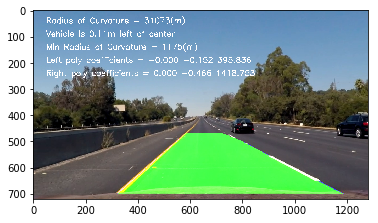

In [22]:
output = 'project_video_revised.mp4'
clip1 = VideoFileClip("project_video.mp4")
output_clip = clip1.fl_image(image_pipeline) #NOTE: this function expects color images!!
%time output_clip.write_videofile(output, audio=False)
